In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\Hisoka\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hisoka\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\Hisoka\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import matplotlib


# Tournament Section

In [3]:
#Read the Dataset
tour=pd.read_excel('dota_tournament.xlsx')
tour.head()

ID MATCH_ID  MAP                TOURNAMENT        TEAM     SIDE  \
0  001-1-D    001-1    1  The Chongqing Major 2019  Virtus.pro     dire   
1  001-1-R    001-1    1  The Chongqing Major 2019       EHOME  radiant   
2  001-2-R    001-2    2  The Chongqing Major 2019  Virtus.pro  radiant   
3  001-2-D    001-2    2  The Chongqing Major 2019       EHOME     dire   
4  001-3-R    001-3    3  The Chongqing Major 2019  Virtus.pro  radiant   

   SCORE RESULT DURATION             HERO_1             HERO_2  \
0    7.0   LOSE    27:50         Juggernaut         Grimstroke   
1   25.0    WIN    27:50          Dark Seer  Outworld Devourer   
2   20.0    WIN    23:03  Outworld Devourer        Beastmaster   
3    9.0   LOSE    23:03        Drow Ranger             Huskar   
4   37.0    WIN    49:39         Juggernaut         Tidehunter   

             HERO_3               HERO_4       HERO_5  
0  Nature's Prophet                 Sven       Medusa  
1            Visage               Jakiro  Elder Titan  
2            Magnus           Juggernaut         Lich  
3  Nature's Prophet  Keeper of the Light         Tiny  
4            Rubick  Keeper of the Light       Medusa

In [4]:
#Add a new column 'DRAFT' that combines all the heroes
tour['DRAFT']=tour[['HERO_1','HERO_2','HERO_3','HERO_4','HERO_5']].values.tolist()

In [5]:
#Print first five rows
tour.head()

ID MATCH_ID  MAP                TOURNAMENT        TEAM     SIDE  \
0  001-1-D    001-1    1  The Chongqing Major 2019  Virtus.pro     dire   
1  001-1-R    001-1    1  The Chongqing Major 2019       EHOME  radiant   
2  001-2-R    001-2    2  The Chongqing Major 2019  Virtus.pro  radiant   
3  001-2-D    001-2    2  The Chongqing Major 2019       EHOME     dire   
4  001-3-R    001-3    3  The Chongqing Major 2019  Virtus.pro  radiant   

   SCORE RESULT DURATION             HERO_1             HERO_2  \
0    7.0   LOSE    27:50         Juggernaut         Grimstroke   
1   25.0    WIN    27:50          Dark Seer  Outworld Devourer   
2   20.0    WIN    23:03  Outworld Devourer        Beastmaster   
3    9.0   LOSE    23:03        Drow Ranger             Huskar   
4   37.0    WIN    49:39         Juggernaut         Tidehunter   

             HERO_3               HERO_4       HERO_5  \
0  Nature's Prophet                 Sven       Medusa   
1            Visage               Jakiro  Elder Titan   
2            Magnus           Juggernaut         Lich   
3  Nature's Prophet  Keeper of the Light         Tiny   
4            Rubick  Keeper of the Light       Medusa   

                                               DRAFT  
0  [Juggernaut, Grimstroke, Nature's Prophet, Sve...  
1  [Dark Seer, Outworld Devourer, Visage, Jakiro,...  
2  [Outworld Devourer, Beastmaster, Magnus, Jugge...  
3  [Drow Ranger, Huskar, Nature's Prophet, Keeper...  
4  [Juggernaut, Tidehunter, Rubick, Keeper of the...

In [6]:
#data information
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          3532 non-null   object 
 1   MATCH_ID    3532 non-null   object 
 2   MAP         3532 non-null   int64  
 3   TOURNAMENT  3532 non-null   object 
 4   TEAM        3532 non-null   object 
 5   SIDE        3532 non-null   object 
 6   SCORE       3532 non-null   float64
 7   RESULT      3532 non-null   object 
 8   DURATION    3532 non-null   object 
 9   HERO_1      3532 non-null   object 
 10  HERO_2      3532 non-null   object 
 11  HERO_3      3532 non-null   object 
 12  HERO_4      3532 non-null   object 
 13  HERO_5      3532 non-null   object 
 14  DRAFT       3532 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 414.0+ KB


In [7]:
#Missing Values
tour.isnull().sum()

ID            0
MATCH_ID      0
MAP           0
TOURNAMENT    0
TEAM          0
SIDE          0
SCORE         0
RESULT        0
DURATION      0
HERO_1        0
HERO_2        0
HERO_3        0
HERO_4        0
HERO_5        0
DRAFT         0
dtype: int64

In [8]:
#Convert Score Column to Integer
tour['SCORE']=tour['SCORE'].astype(int)

In [9]:
tour.head()

ID MATCH_ID  MAP                TOURNAMENT        TEAM     SIDE  \
0  001-1-D    001-1    1  The Chongqing Major 2019  Virtus.pro     dire   
1  001-1-R    001-1    1  The Chongqing Major 2019       EHOME  radiant   
2  001-2-R    001-2    2  The Chongqing Major 2019  Virtus.pro  radiant   
3  001-2-D    001-2    2  The Chongqing Major 2019       EHOME     dire   
4  001-3-R    001-3    3  The Chongqing Major 2019  Virtus.pro  radiant   

   SCORE RESULT DURATION             HERO_1             HERO_2  \
0      7   LOSE    27:50         Juggernaut         Grimstroke   
1     25    WIN    27:50          Dark Seer  Outworld Devourer   
2     20    WIN    23:03  Outworld Devourer        Beastmaster   
3      9   LOSE    23:03        Drow Ranger             Huskar   
4     37    WIN    49:39         Juggernaut         Tidehunter   

             HERO_3               HERO_4       HERO_5  \
0  Nature's Prophet                 Sven       Medusa   
1            Visage               Jakiro  Elder Titan   
2            Magnus           Juggernaut         Lich   
3  Nature's Prophet  Keeper of the Light         Tiny   
4            Rubick  Keeper of the Light       Medusa   

                                               DRAFT  
0  [Juggernaut, Grimstroke, Nature's Prophet, Sve...  
1  [Dark Seer, Outworld Devourer, Visage, Jakiro,...  
2  [Outworld Devourer, Beastmaster, Magnus, Jugge...  
3  [Drow Ranger, Huskar, Nature's Prophet, Keeper...  
4  [Juggernaut, Tidehunter, Rubick, Keeper of the...

In [10]:
#Check Column types
tour.dtypes

ID            object
MATCH_ID      object
MAP            int64
TOURNAMENT    object
TEAM          object
SIDE          object
SCORE          int32
RESULT        object
DURATION      object
HERO_1        object
HERO_2        object
HERO_3        object
HERO_4        object
HERO_5        object
DRAFT         object
dtype: object

In [11]:
import matplotlib.pyplot as plt

def plott(df, n):
    # Increase resolution
    plt.rcParams['figure.dpi'] = 200

    # Use a style
    plt.style.use('ggplot')

    # Get the top 10 most occurred heroes in the 'HERO_n' column
    top_10_heroes = df[f'HERO_{n}'].value_counts().nlargest(10)

    # Sort in descending order
    top_10_heroes = top_10_heroes.sort_values(ascending=True)

    # Plot
    top_10_heroes.plot(kind='barh', figsize=(10, 5), color='blue', alpha=0.75)
    plt.title(f'Most Occurred Heroes in HERO_{n}', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Hero', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()


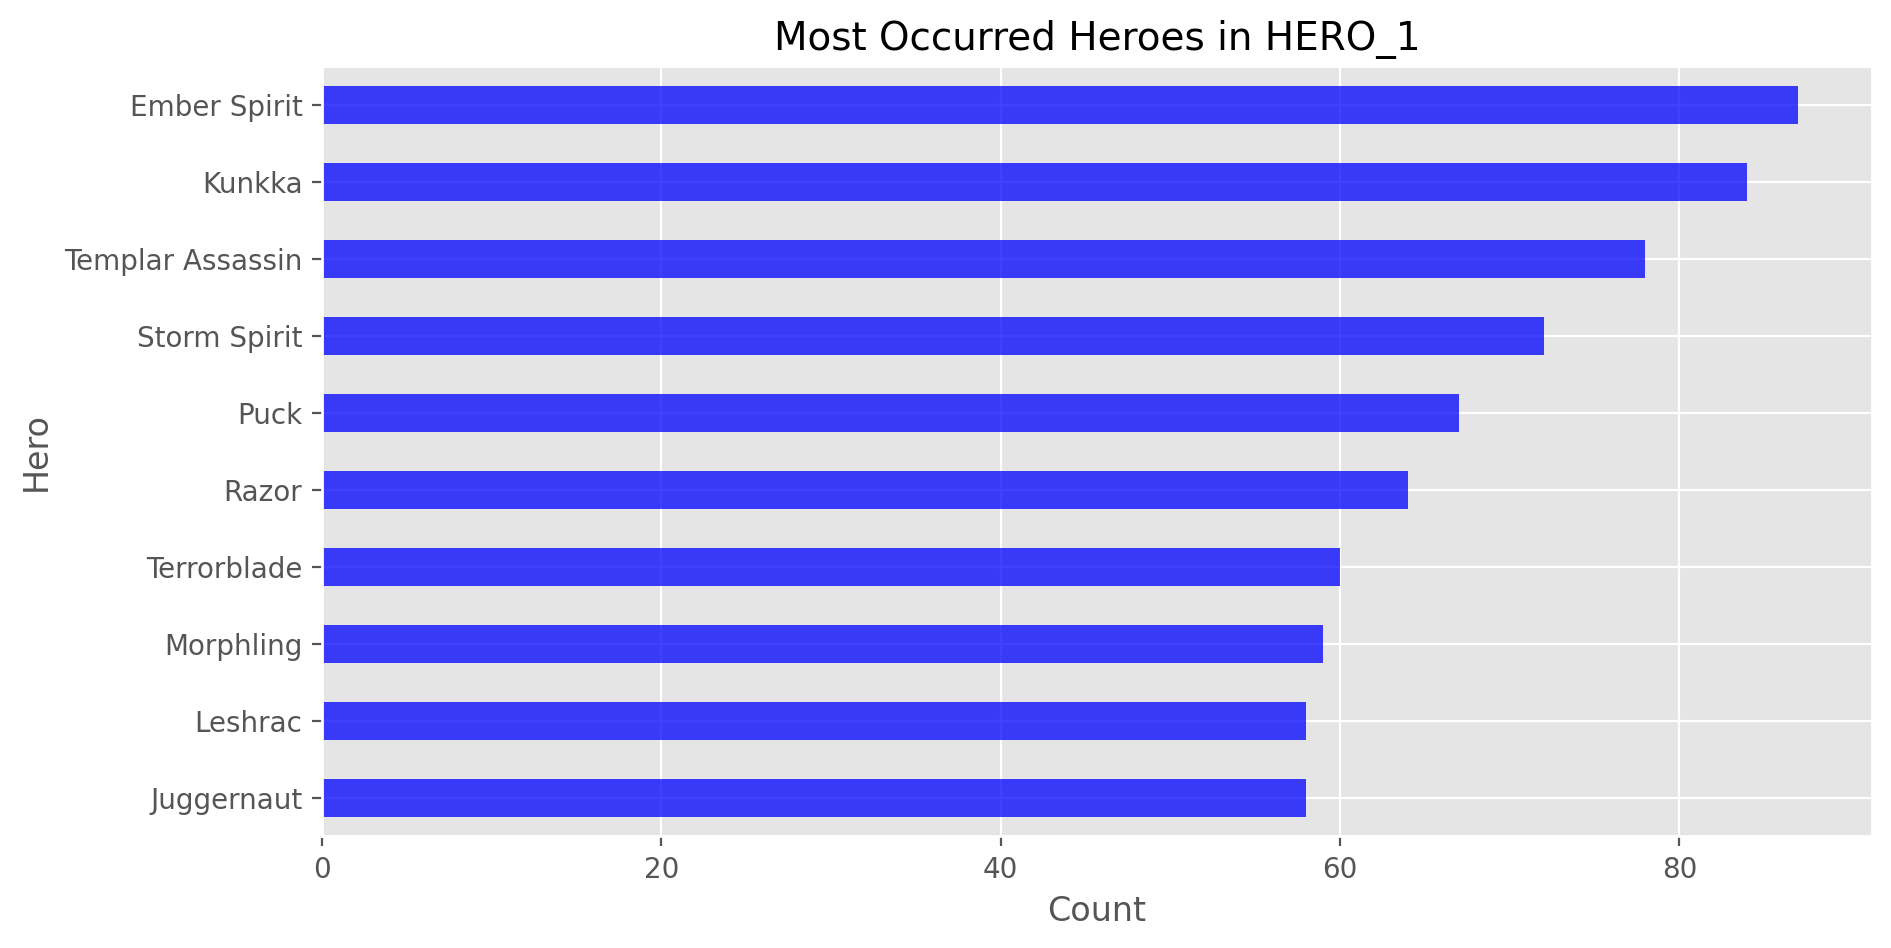

In [12]:
plott(tour,1)

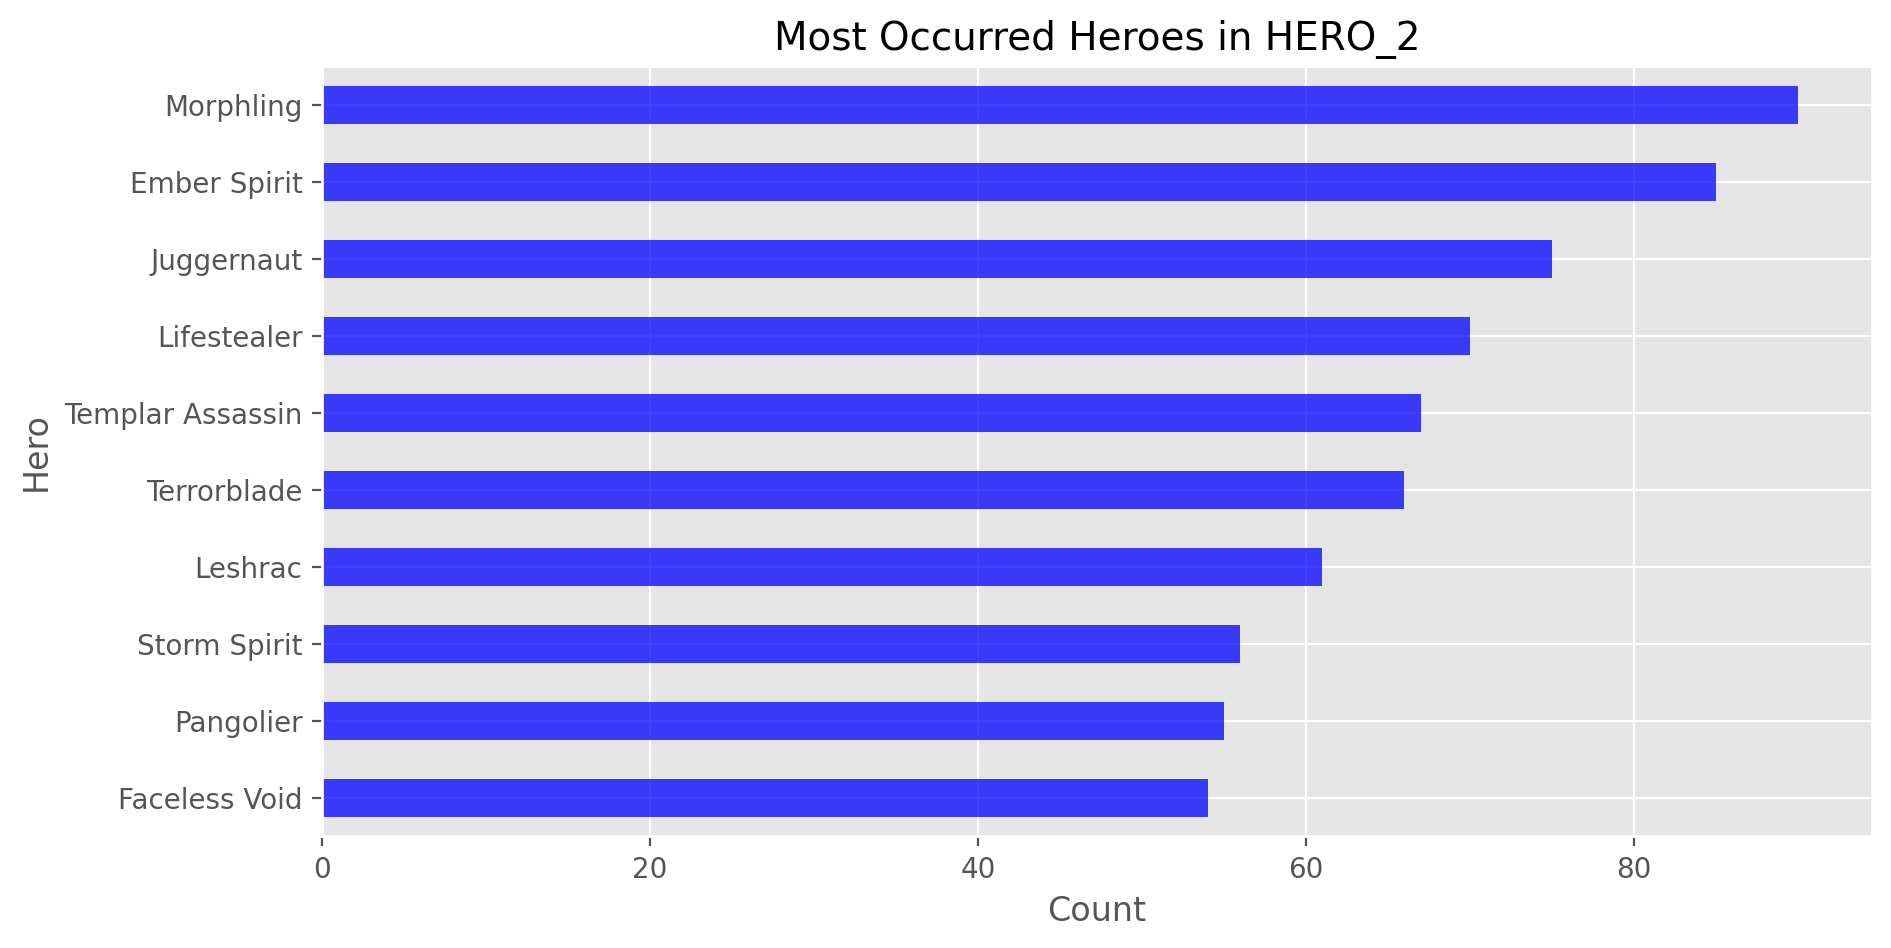

In [13]:
plott(tour,2)

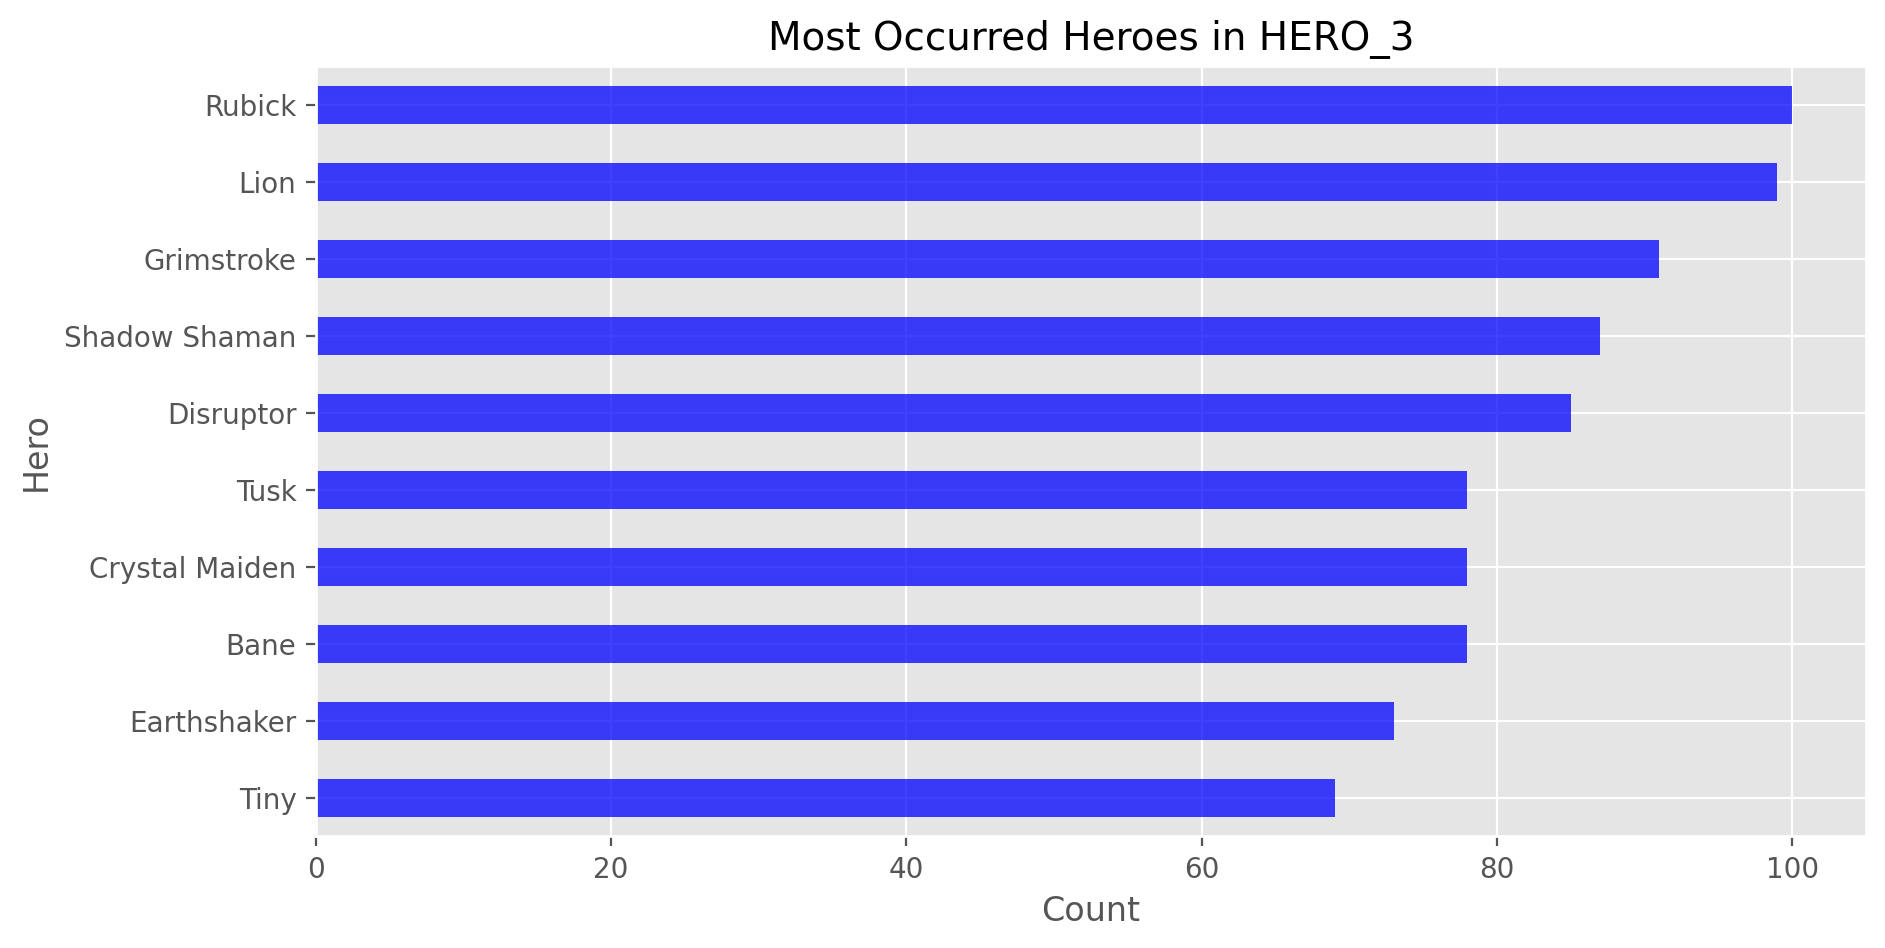

In [14]:
plott(tour,3)

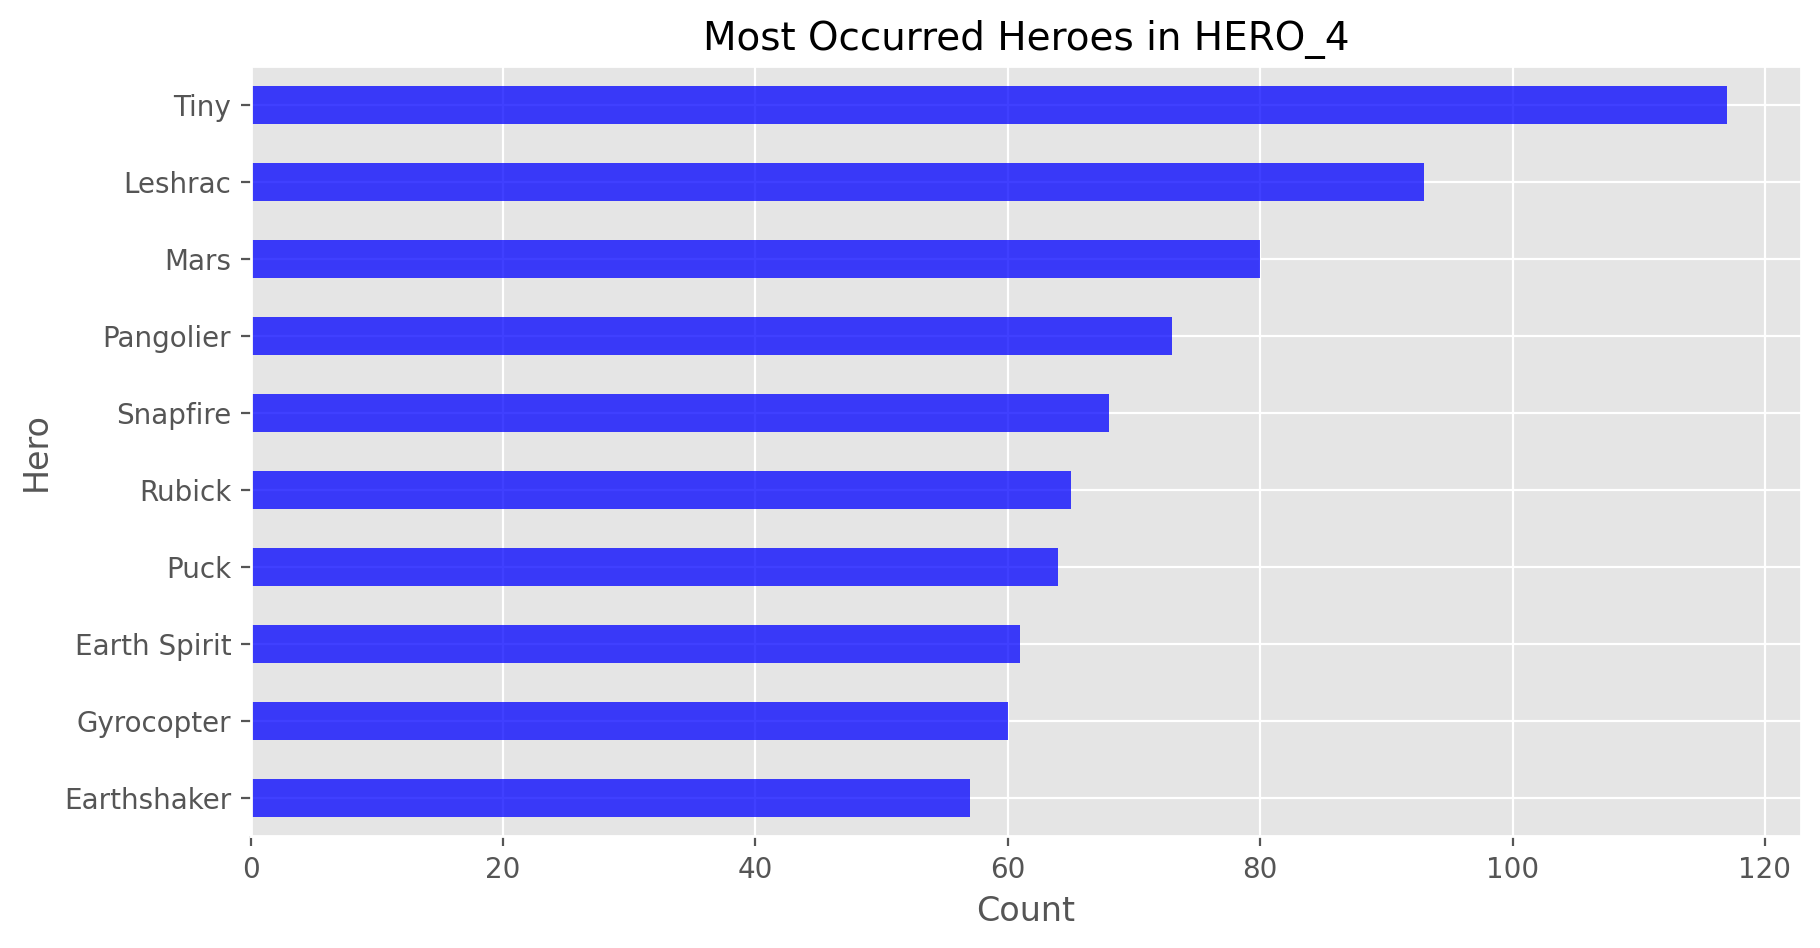

In [15]:
plott(tour,4)

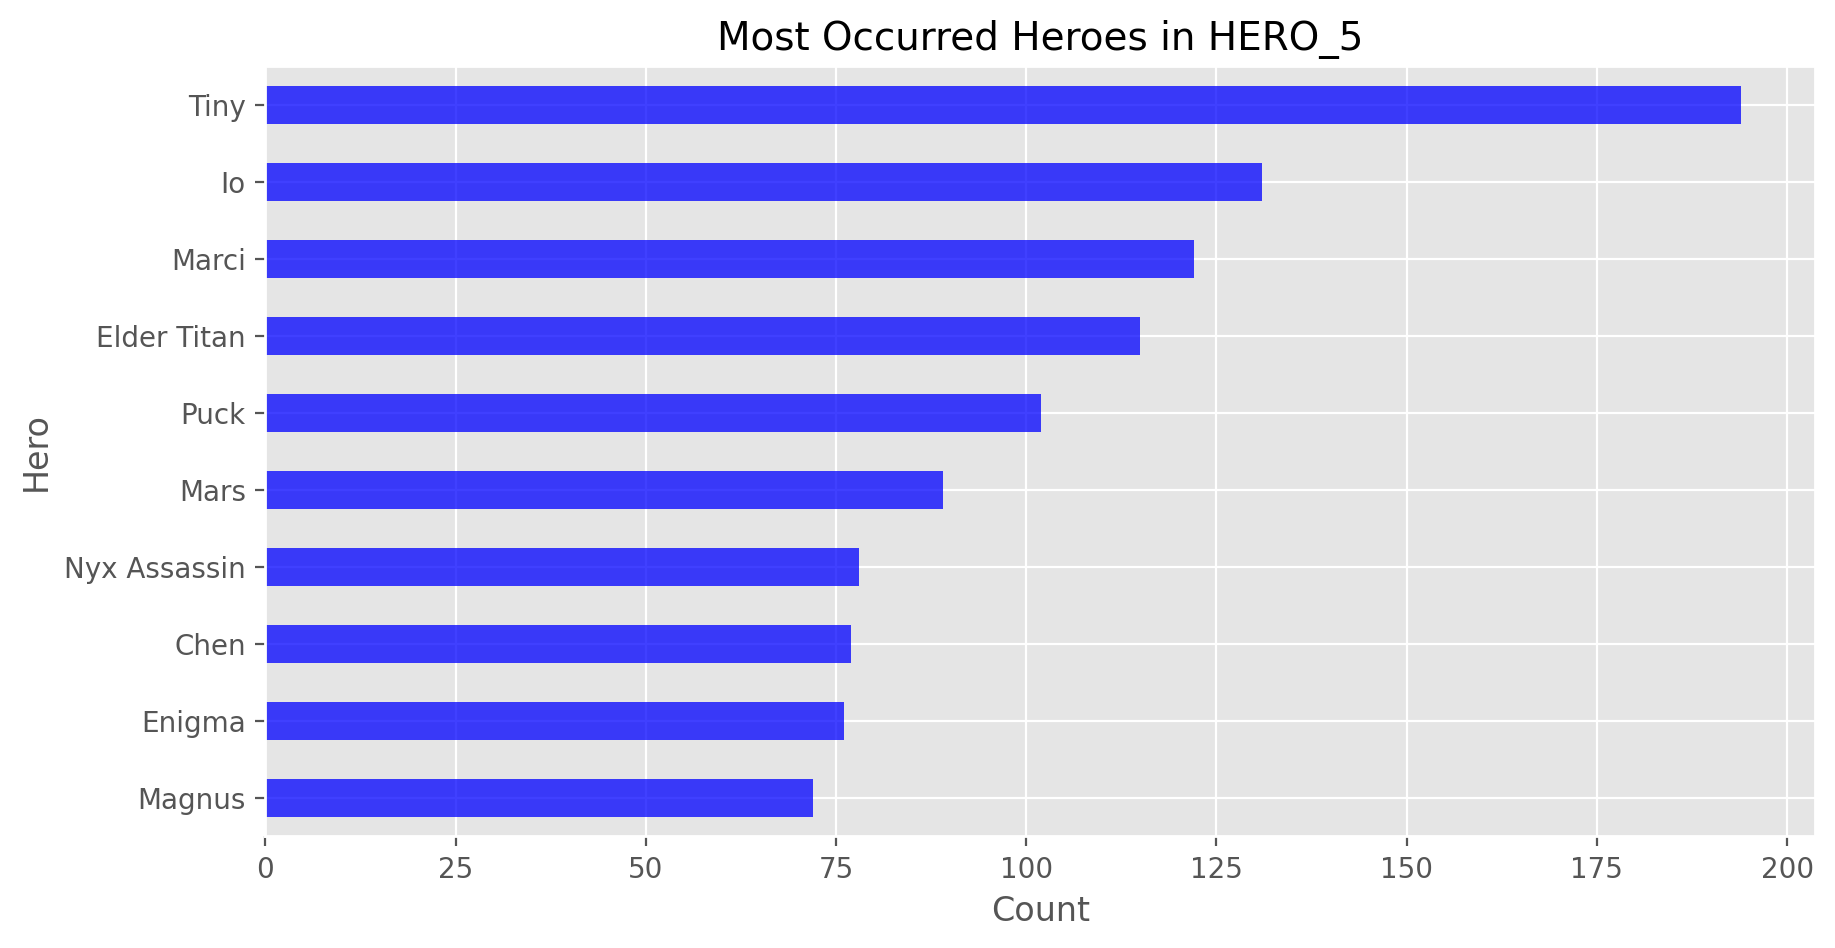

In [16]:
plott(tour,5)

In [17]:
# Create a unique identifier for each match
tour['MATCH_MAP_ID'] = tour['MATCH_ID'] + '-' + tour['MAP'].astype(str)

# Drop duplicate matches
tour_unique = tour.drop_duplicates(subset='MATCH_MAP_ID')

# Select only the 'TEAM', 'TOURNAMENT', and 'DURATION' columns
tour_selected = tour_unique[['TEAM', 'TOURNAMENT', 'DURATION']].copy()

# Add a dummy hour to each duration string and convert to timedelta format
tour_selected['DURATION'] = pd.to_timedelta('00:' + tour_selected['DURATION'])

# Convert 'DURATION' to total minutes
tour_selected['DURATION'] = tour_selected['DURATION'].dt.total_seconds() / 3600

# Aggregate data to get total duration for each team
team_duration = tour_selected.groupby('TEAM')['DURATION'].sum().reset_index()

# Select top 12 teams
top_teams = team_duration.sort_values(by='DURATION', ascending=False).head(12)

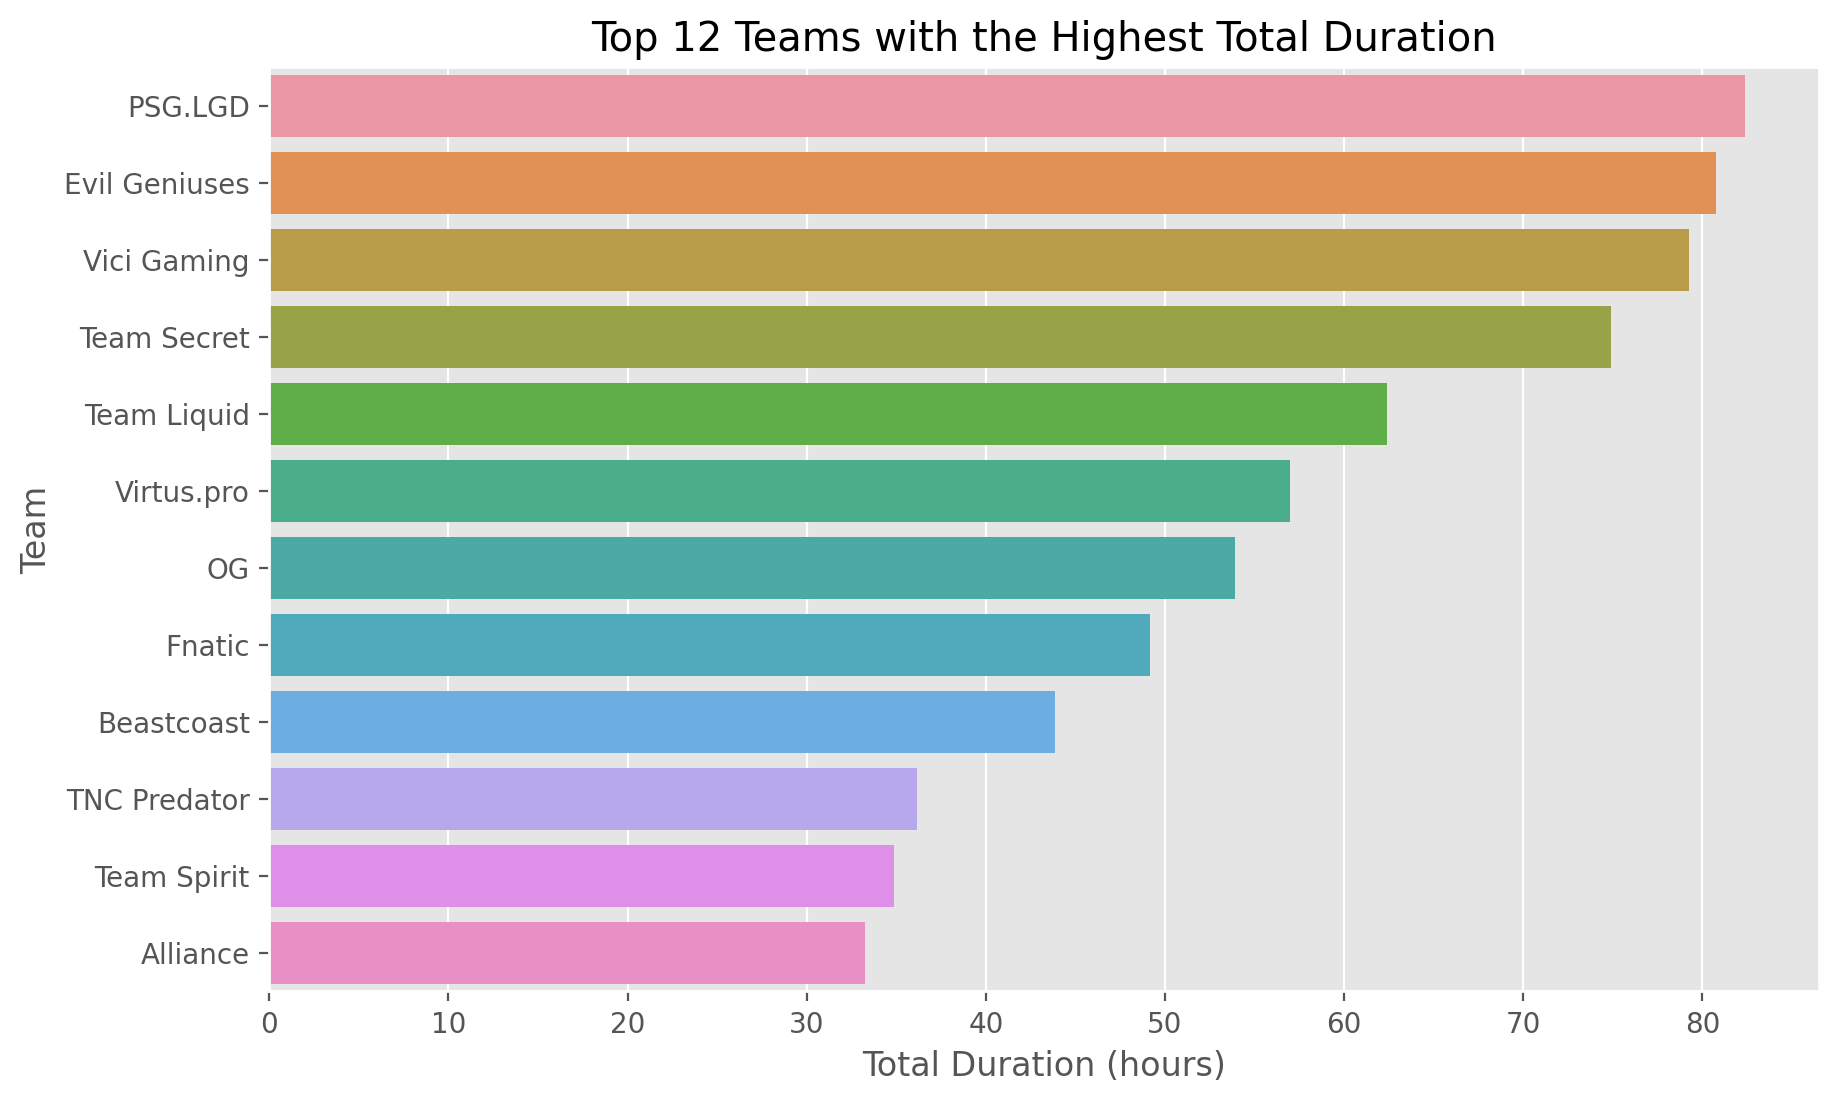

In [18]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DURATION', y='TEAM', data=top_teams, errorbar=None, order=top_teams['TEAM'])
plt.xlabel('Total Duration (hours)')
plt.ylabel('Team')
plt.title('Top 12 Teams with the Highest Total Duration')
plt.show()

In [19]:
# Create a DataFrame that maps each 'MATCH_ID' to the teams that participated
match_teams = tour.groupby('MATCH_ID')['TEAM'].apply(lambda x: ' vs '.join(x)).reset_index()

# Rename the 'TEAM' column to 'MATCH'
match_teams.rename(columns={'TEAM': 'MATCH'}, inplace=True)

# Merge 'match_teams' with 'tour' to add the 'MATCH' column to 'tour'
tour = pd.merge(tour, match_teams, on='MATCH_ID')

# Drop duplicate matches based on 'MATCH_ID'
tour_unique = tour.drop_duplicates(subset='MATCH_ID')

# Select only the 'MATCH', 'TOURNAMENT', and 'DURATION' columns
tour_final = tour_unique[['MATCH', 'TOURNAMENT', 'DURATION']]
tour_final.head()

MATCH                TOURNAMENT DURATION
0                 Virtus.pro vs EHOME  The Chongqing Major 2019    27:50
2                 Virtus.pro vs EHOME  The Chongqing Major 2019    23:03
4                 Virtus.pro vs EHOME  The Chongqing Major 2019    49:39
6  TNC Predator vs Chaos Esports Club  The Chongqing Major 2019    38:37
8  TNC Predator vs Chaos Esports Club  The Chongqing Major 2019    22:04

In [20]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
tour_unique_copy = tour_unique.copy()

# Convert 'DURATION' to timedelta format
tour_unique_copy['DURATION'] = pd.to_timedelta('00:' + tour_unique_copy['DURATION'])

# Convert 'DURATION' to total minutes
tour_unique_copy['DURATION'] = tour_unique_copy['DURATION'].dt.total_seconds() / 60

# Sort matches by 'DURATION'
matches_sorted = tour_unique_copy.sort_values(by='DURATION', ascending=False)

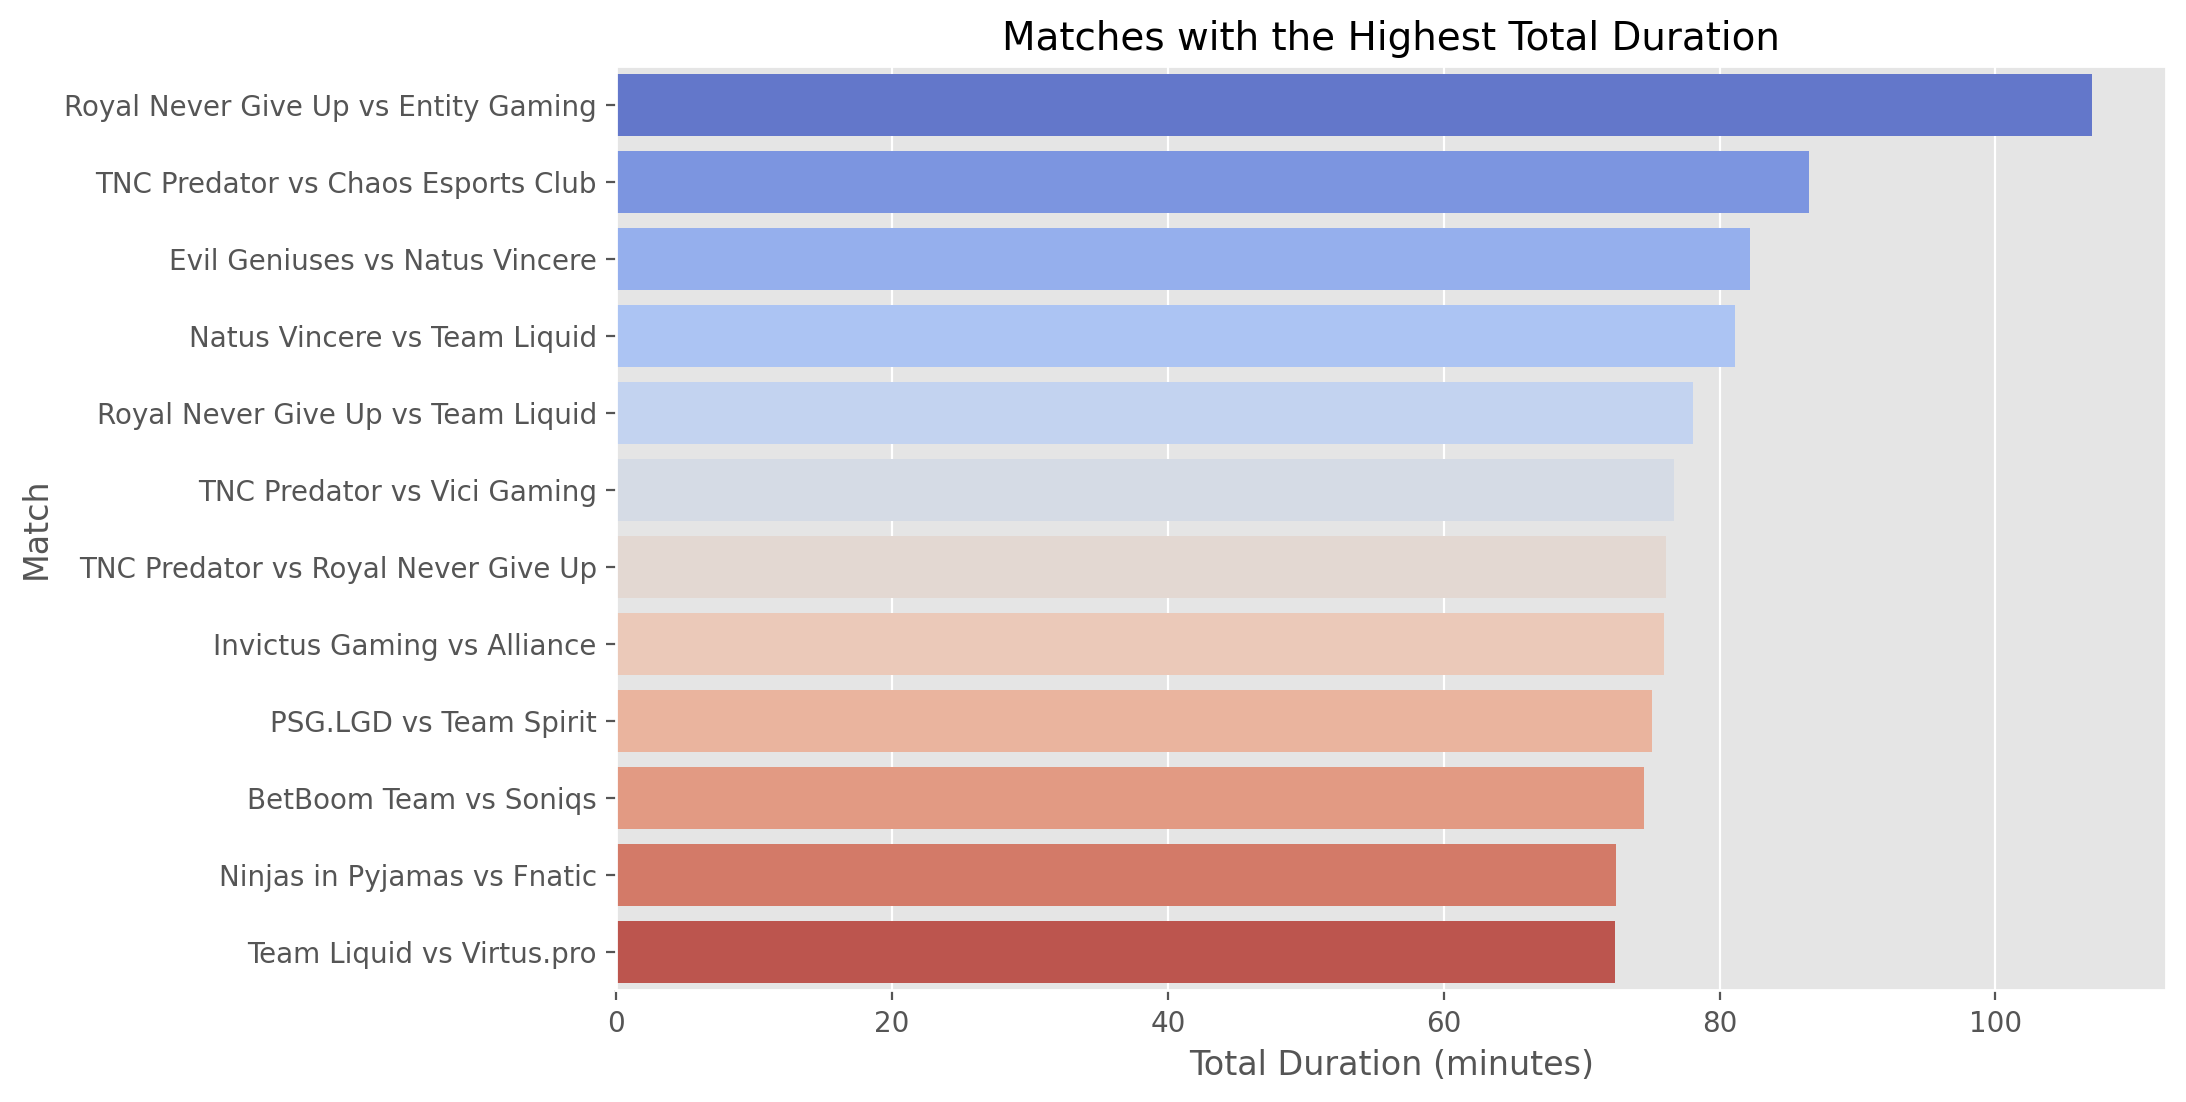

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('ggplot')

# Create bar plot
sns.barplot(x='DURATION', y='MATCH', data=matches_sorted.head(12), errorbar=None, palette='coolwarm')

plt.xlabel('Total Duration (minutes)', fontsize=12)
plt.ylabel('Match', fontsize=12)
plt.title('Matches with the Highest Total Duration', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


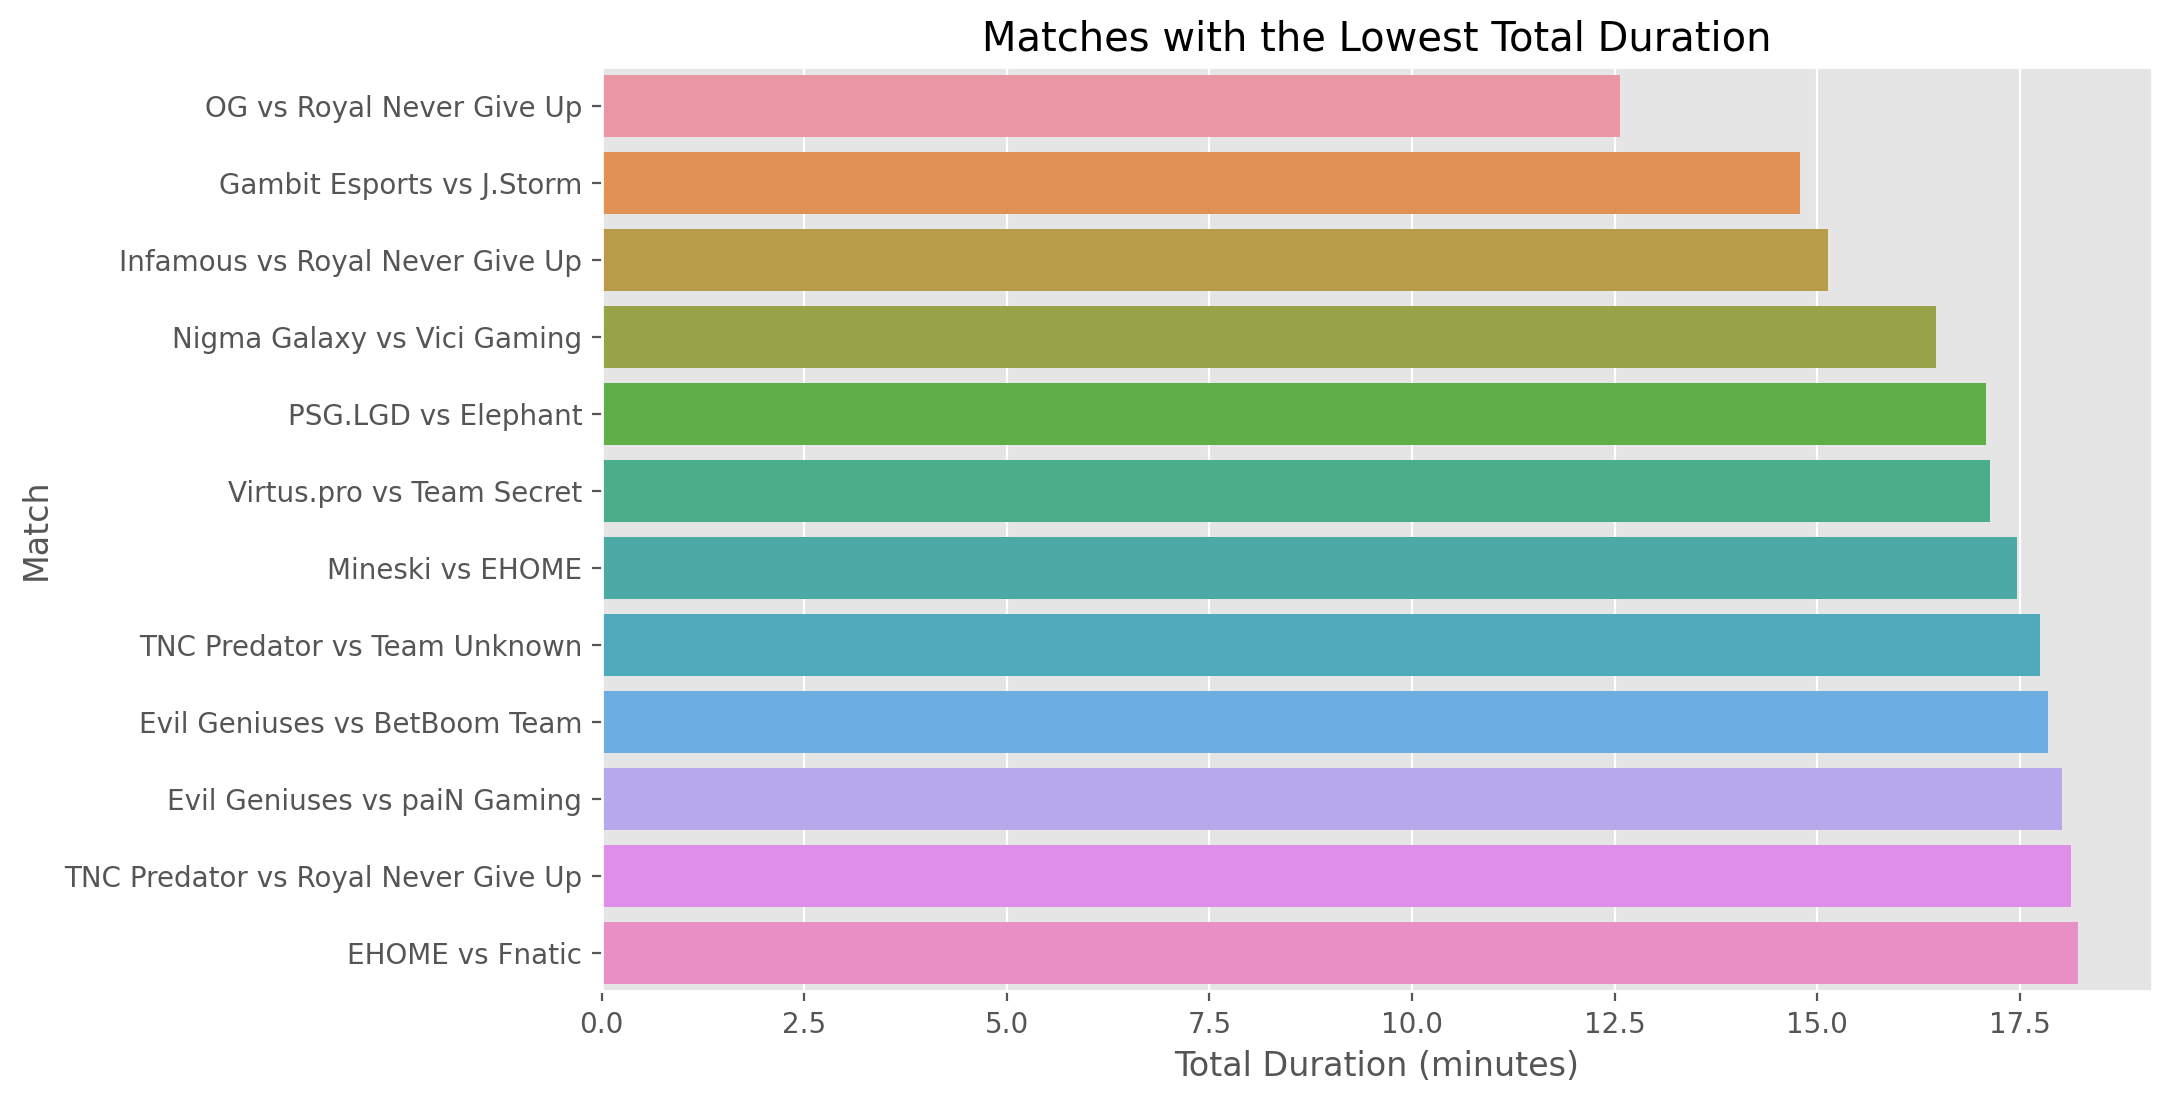

In [22]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
tour_unique_copy = tour_unique.copy()

# Convert 'DURATION' to timedelta format
tour_unique_copy['DURATION'] = pd.to_timedelta('00:' + tour_unique_copy['DURATION'])

# Convert 'DURATION' to total minutes
tour_unique_copy['DURATION'] = tour_unique_copy['DURATION'].dt.total_seconds() / 60

# Sort matches by 'DURATION' in ascending order
matches_sorted = tour_unique_copy.sort_values(by='DURATION', ascending=True)

# Create horizontal bar plot for the matches with the lowest total duration
plt.figure(figsize=(10, 6))
sns.barplot(x='DURATION', y='MATCH', data=matches_sorted.head(12), errorbar=None)
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Match')
plt.title('Matches with the Lowest Total Duration')
plt.show()

In [23]:
# Extract match and map information from 'MATCH_ID'
tour['MATCH'] = tour['MATCH_ID'].str.split('-').str[0]
tour['MAP'] = tour['MATCH_ID'].str.split('-').str[1]

# Count number of matches and maps for each team
team_counts = tour.groupby('TEAM').agg({'MATCH': 'nunique', 'MAP': 'count'}).reset_index()

# Rename columns for clarity
team_counts.rename(columns={'MATCH': 'NUM_MATCHES', 'MAP': 'NUM_MAPS'}, inplace=True)

# Sort teams by number of matches
team_counts_sorted = team_counts.sort_values(by='NUM_MATCHES', ascending=False)

# Select top 12 teams
top_teams = team_counts_sorted.head(12)

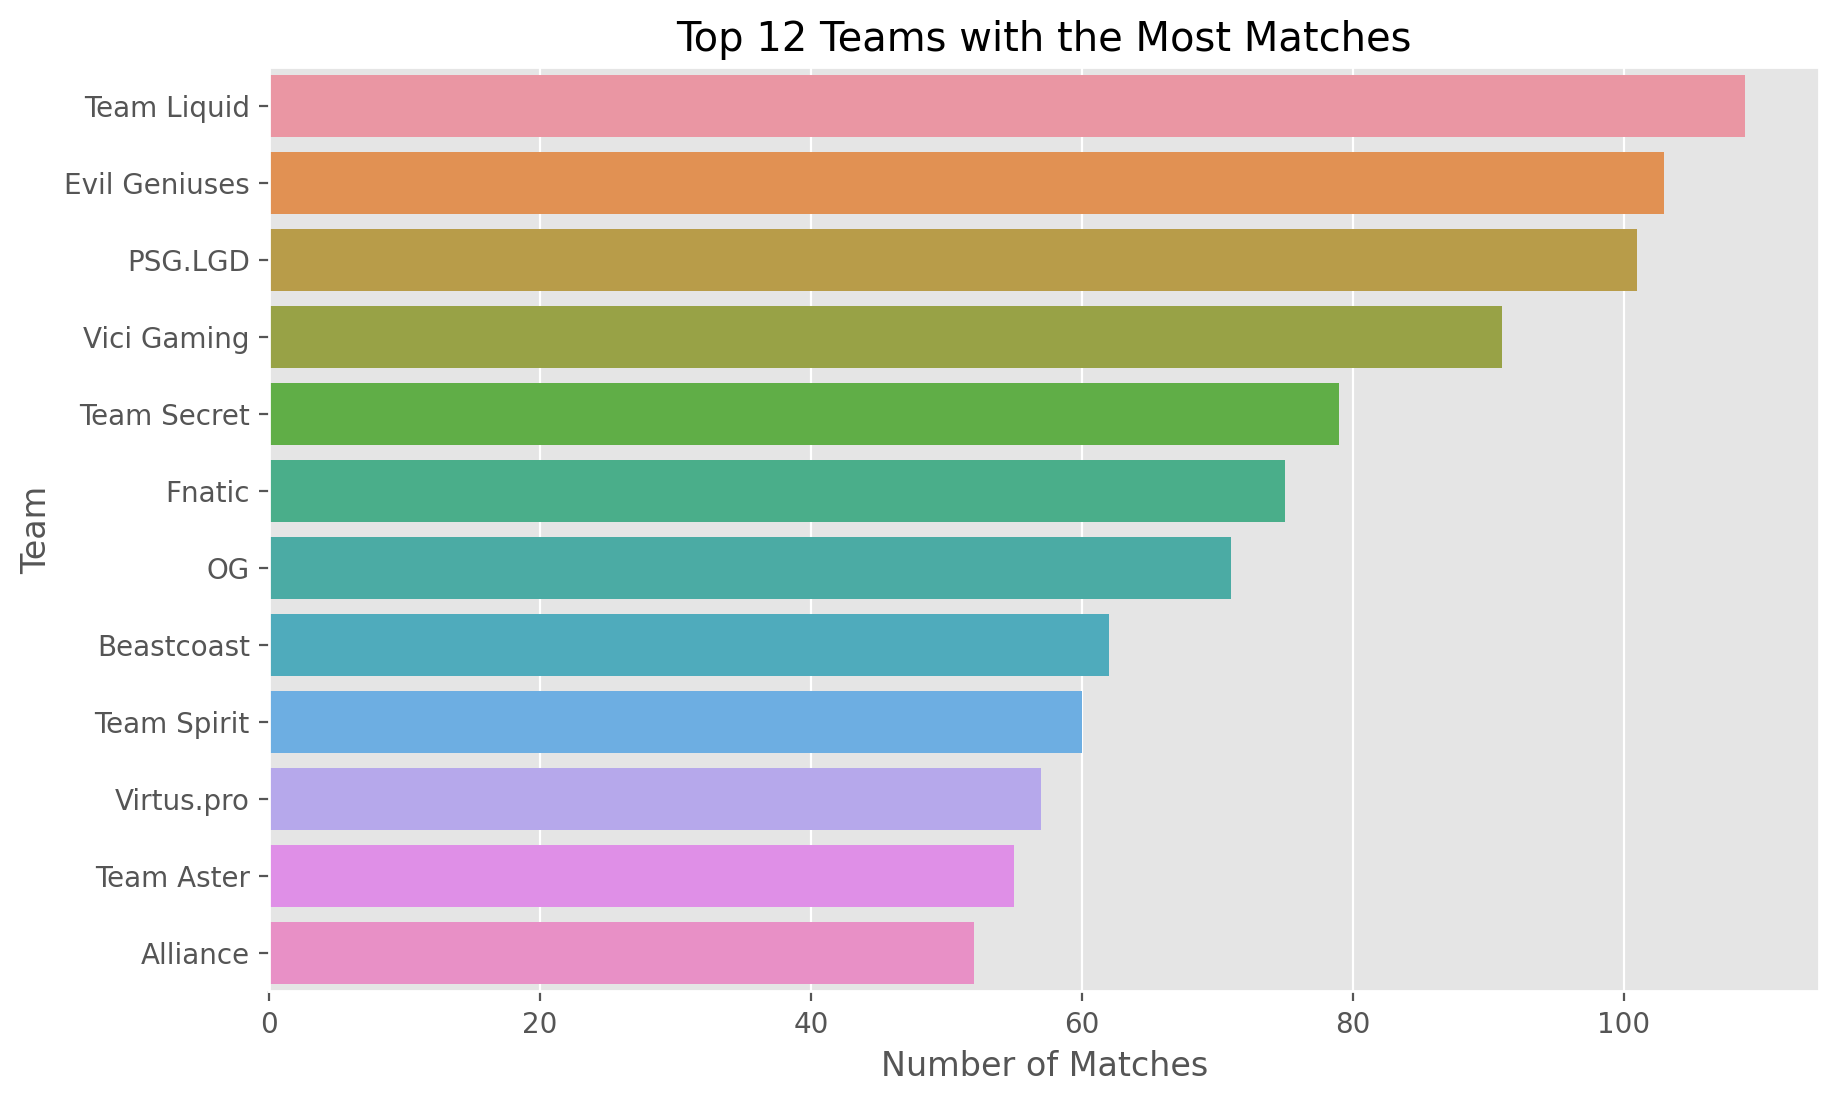

In [24]:
# Create bar plot for number of matches
plt.figure(figsize=(10, 6))
sns.barplot(x='NUM_MATCHES', y='TEAM', data=top_teams, errorbar=None, order=top_teams['TEAM'])
plt.xlabel('Number of Matches')
plt.ylabel('Team')
plt.title('Top 12 Teams with the Most Matches')
plt.show()

In [25]:
# Sort teams by number of maps
team_counts_sorted_maps = team_counts.sort_values(by='NUM_MAPS', ascending=False)

# Select top 12 teams
top_teams_maps = team_counts_sorted_maps.head(12)

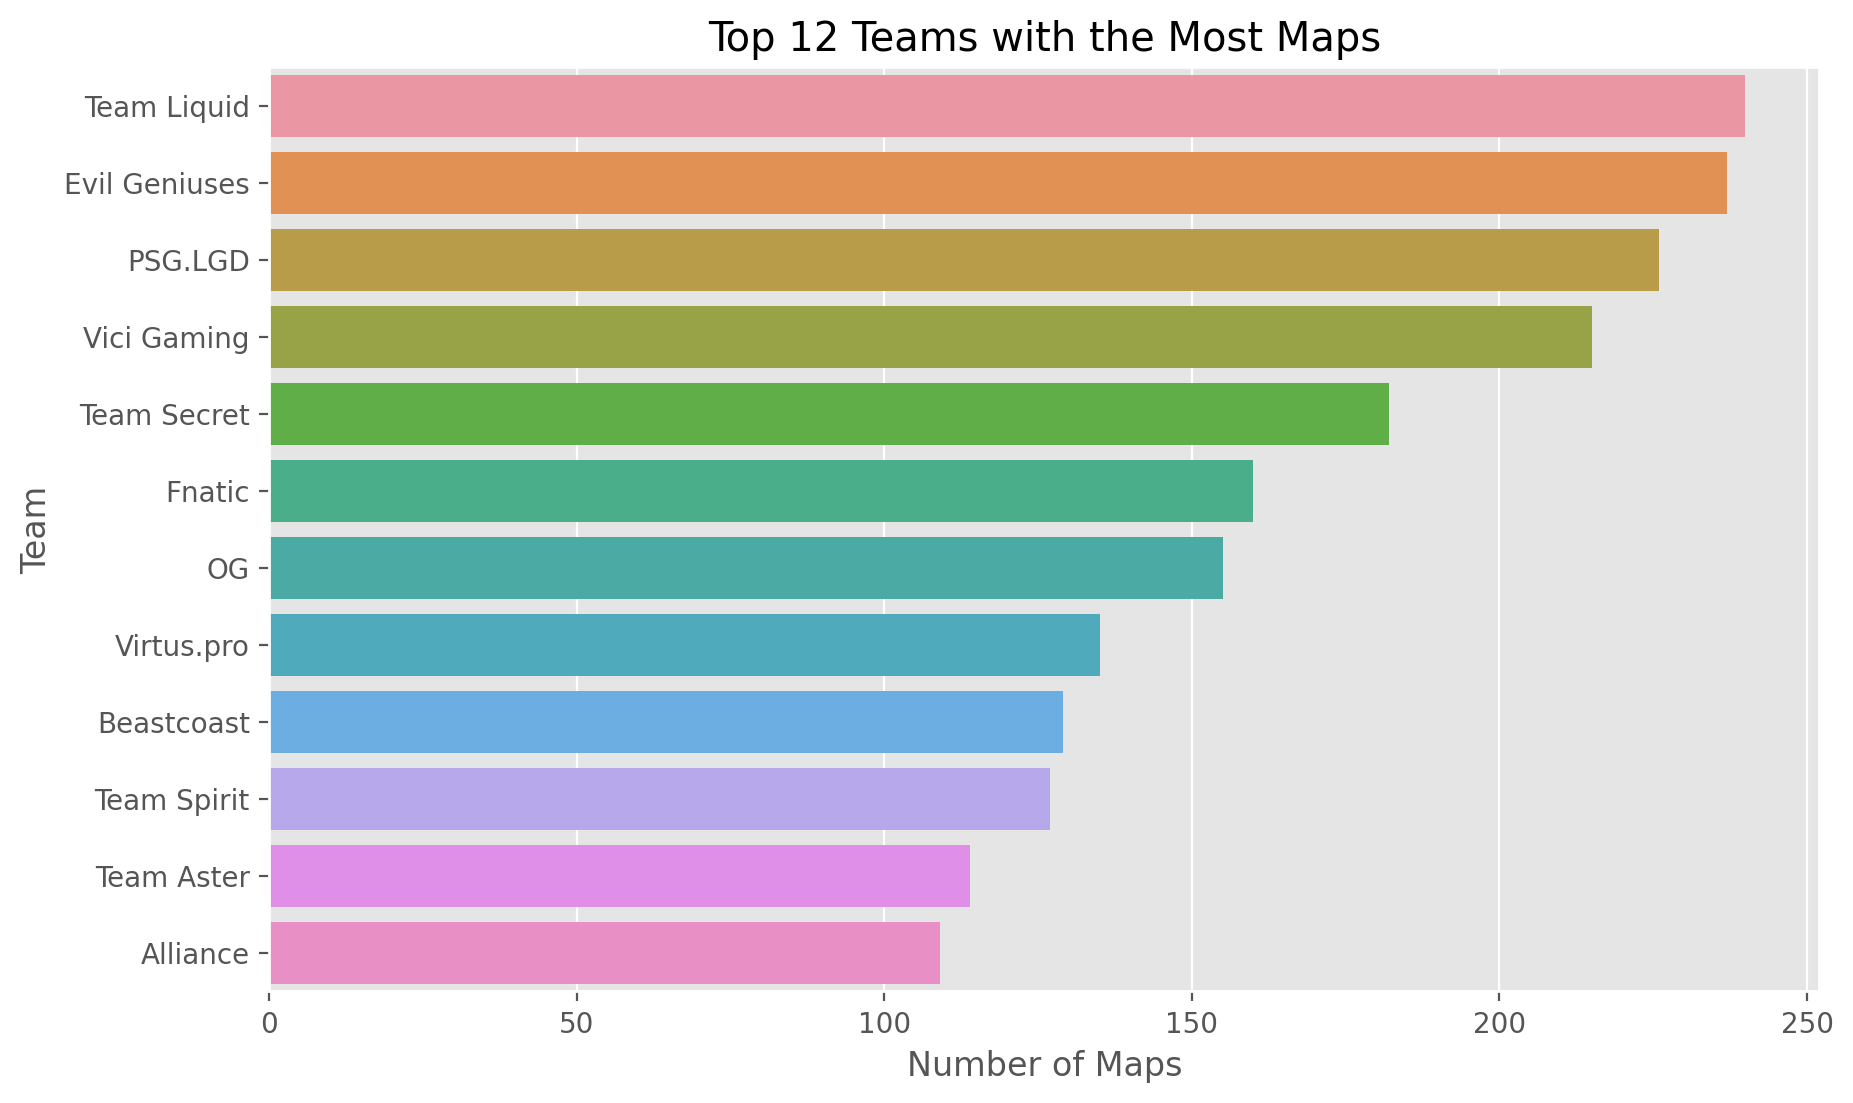

In [26]:
# Create bar plot for number of maps
plt.figure(figsize=(10, 6))
sns.barplot(x='NUM_MAPS', y='TEAM', data=top_teams_maps, errorbar=None, order=top_teams_maps['TEAM'])
plt.xlabel('Number of Maps')
plt.ylabel('Team')
plt.title('Top 12 Teams with the Most Maps')
plt.show()

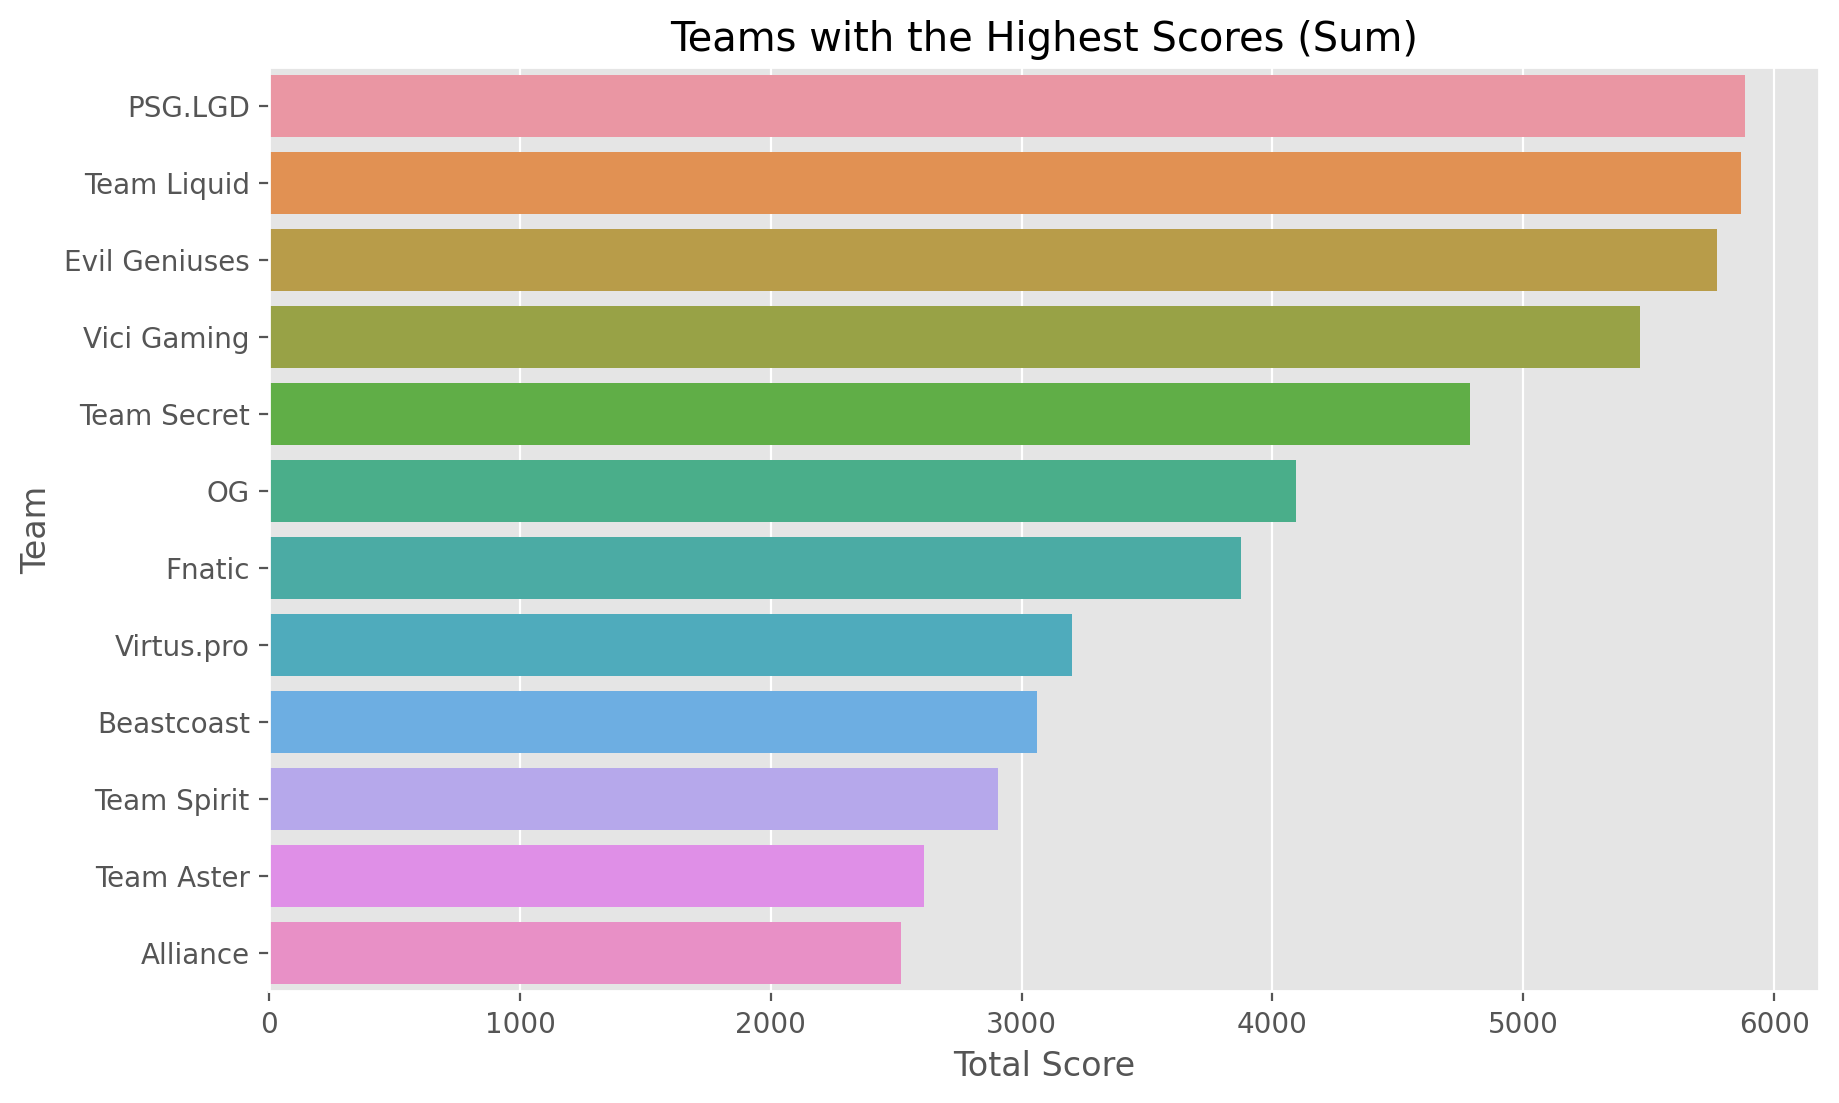

In [27]:
# Teams with the highest scores as a sum
team_scores = tour.groupby('TEAM')['SCORE'].sum().sort_values(ascending=False).head(12)
plt.figure(figsize=(10, 6))
sns.barplot(x=team_scores.values, y=team_scores.index)
plt.title('Teams with the Highest Scores (Sum)')
plt.xlabel('Total Score')
plt.ylabel('Team')
plt.show()

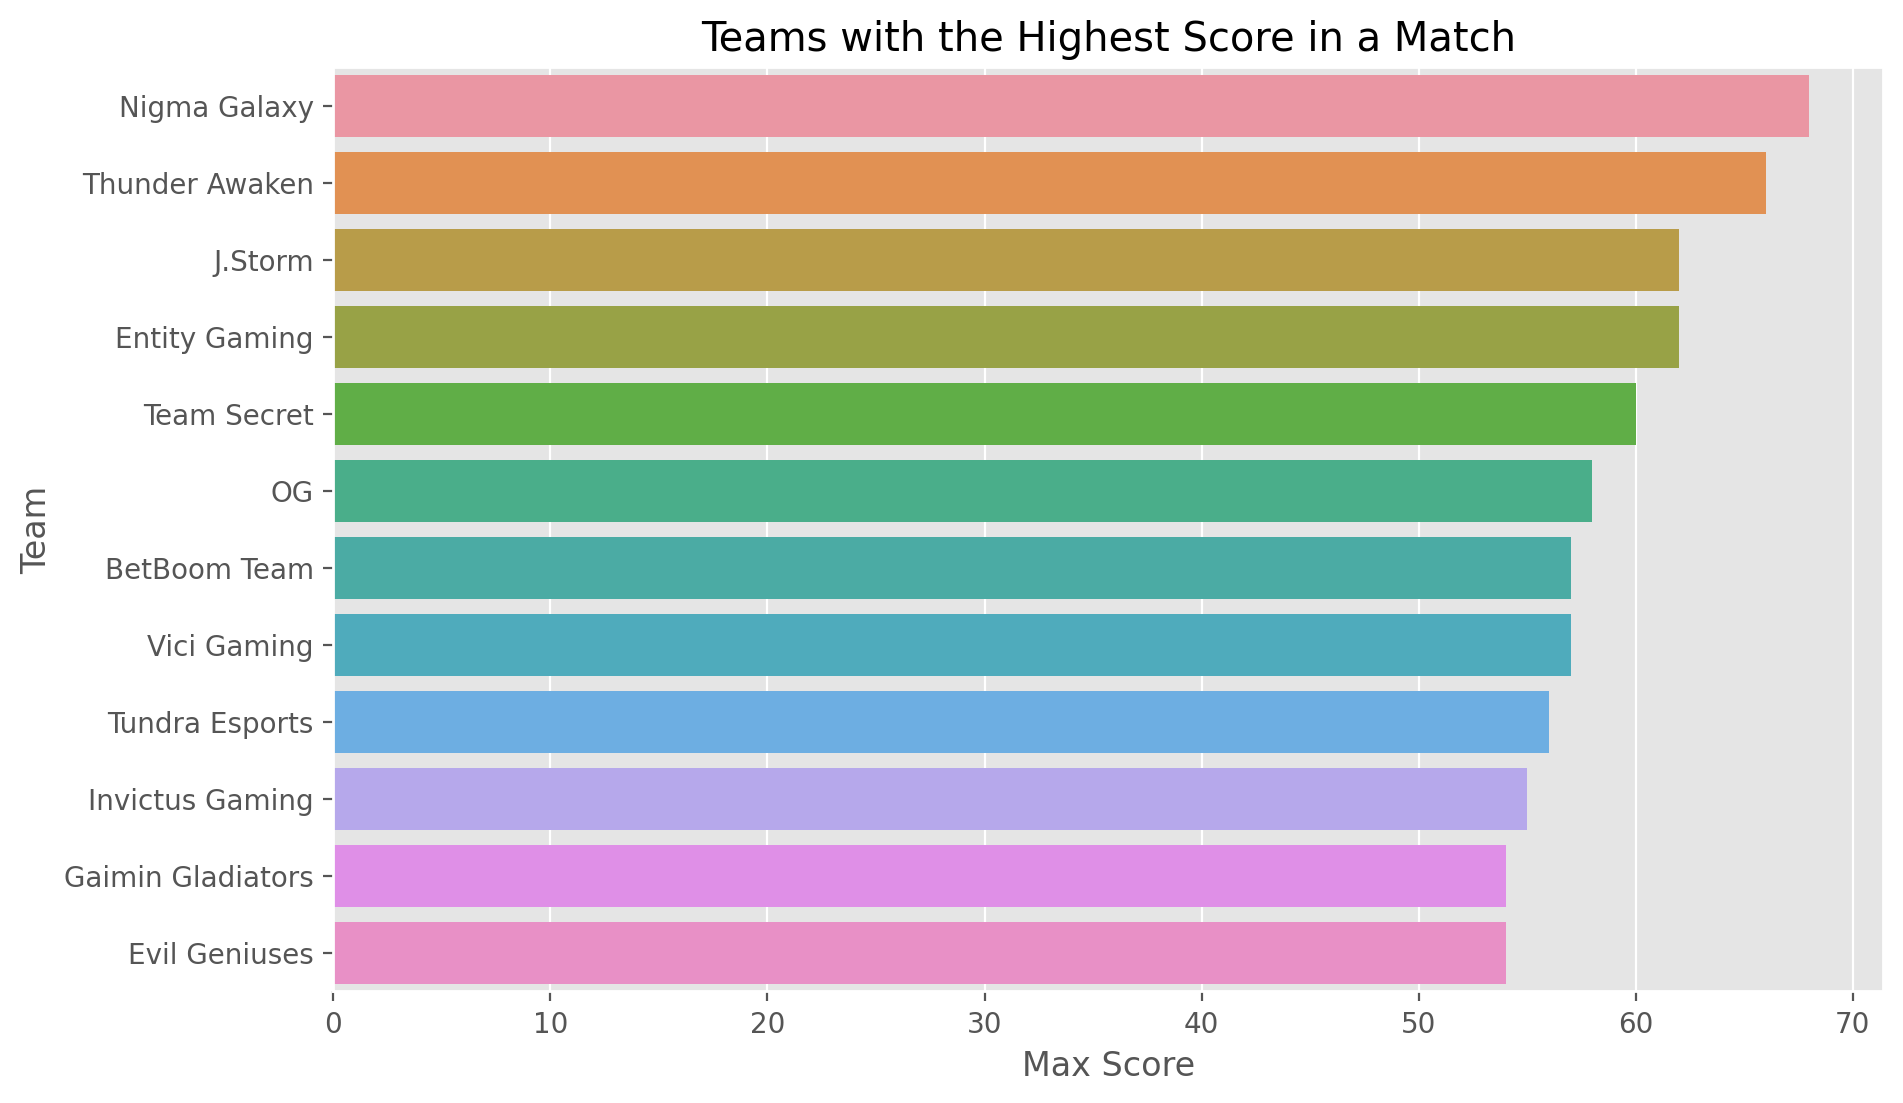

In [28]:
#Teams with the Highest Score in a Match
team_max_scores = tour.groupby('TEAM')['SCORE'].max().sort_values(ascending=False).head(12)
plt.figure(figsize=(10, 6))
sns.barplot(x=team_max_scores.values, y=team_max_scores.index)
plt.title('Teams with the Highest Score in a Match')
plt.xlabel('Max Score')
plt.ylabel('Team')
plt.show()

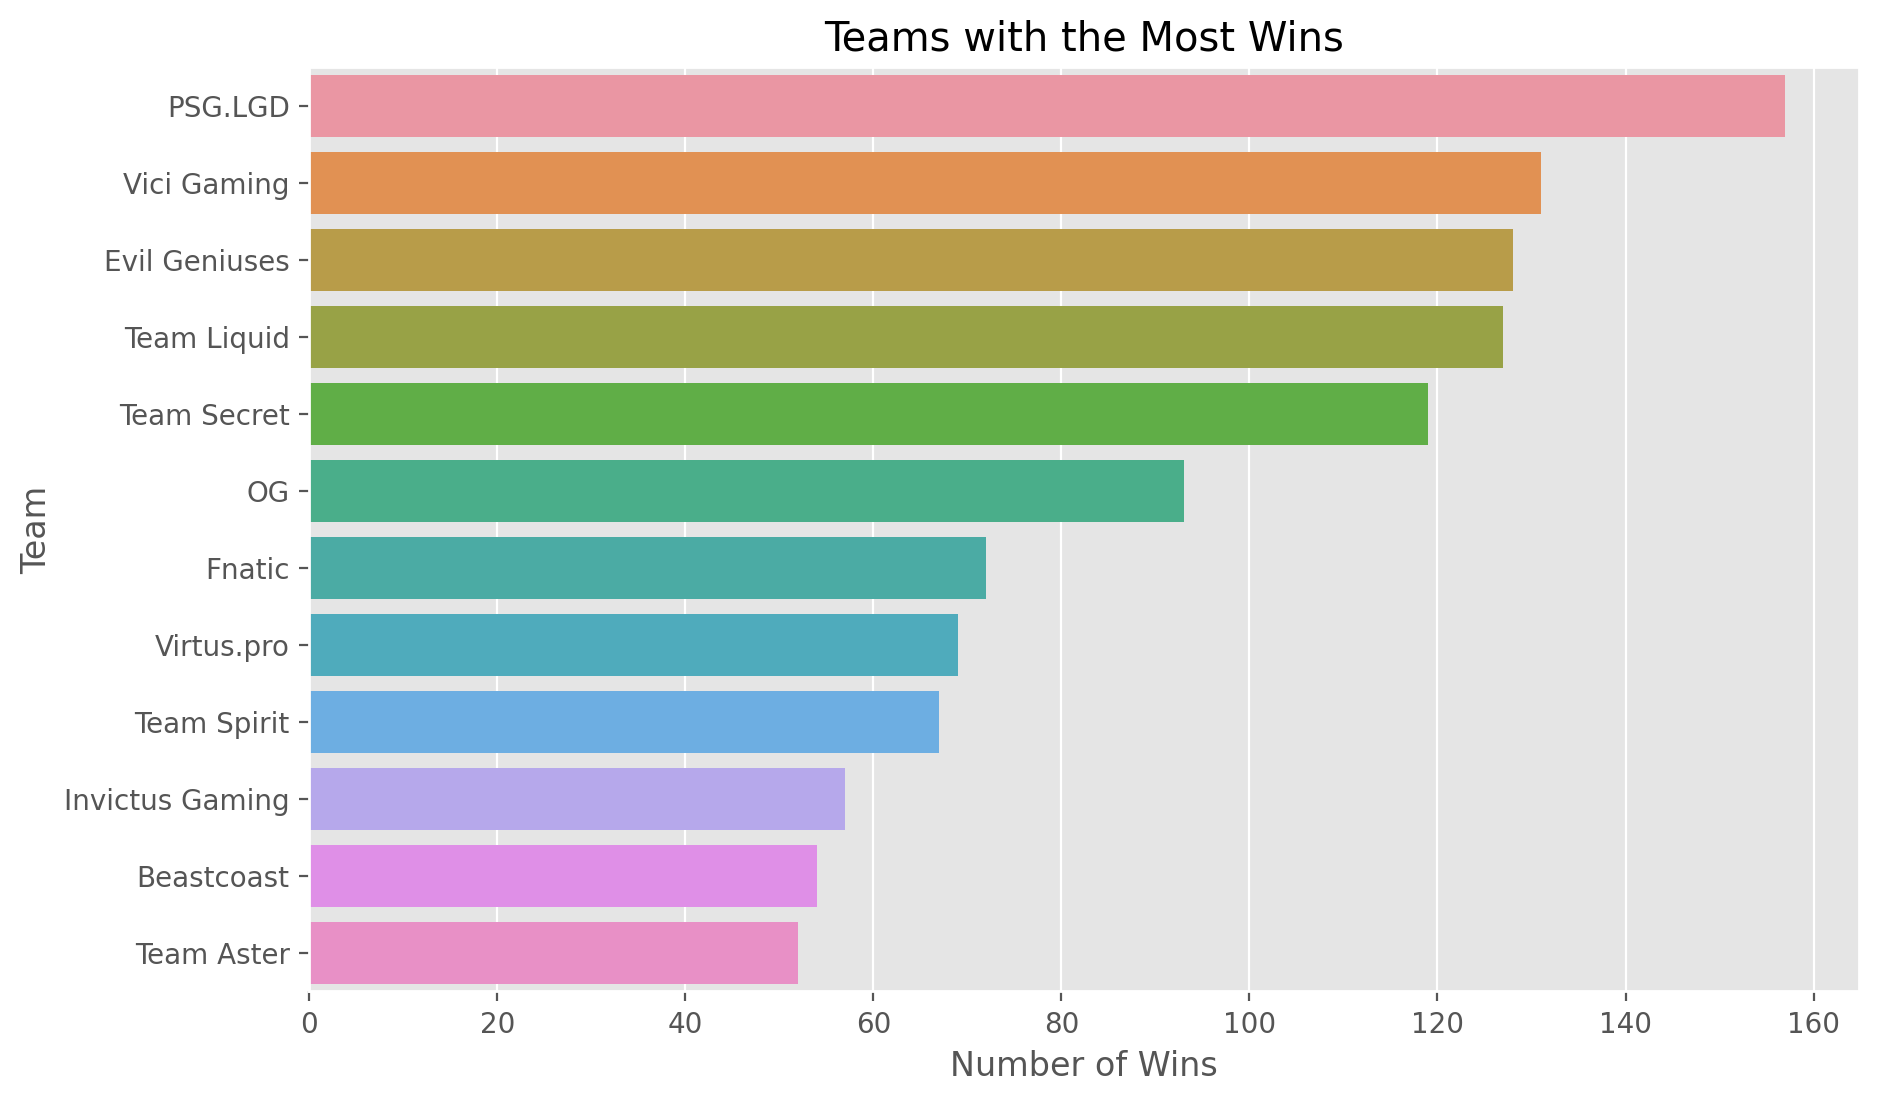

In [29]:
#Most Wins
team_wins = tour[tour['RESULT'] == 'WIN'].groupby('TEAM').size().sort_values(ascending=False).head(12)
plt.figure(figsize=(10, 6))
sns.barplot(x=team_wins.values, y=team_wins.index)
plt.title('Teams with the Most Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()

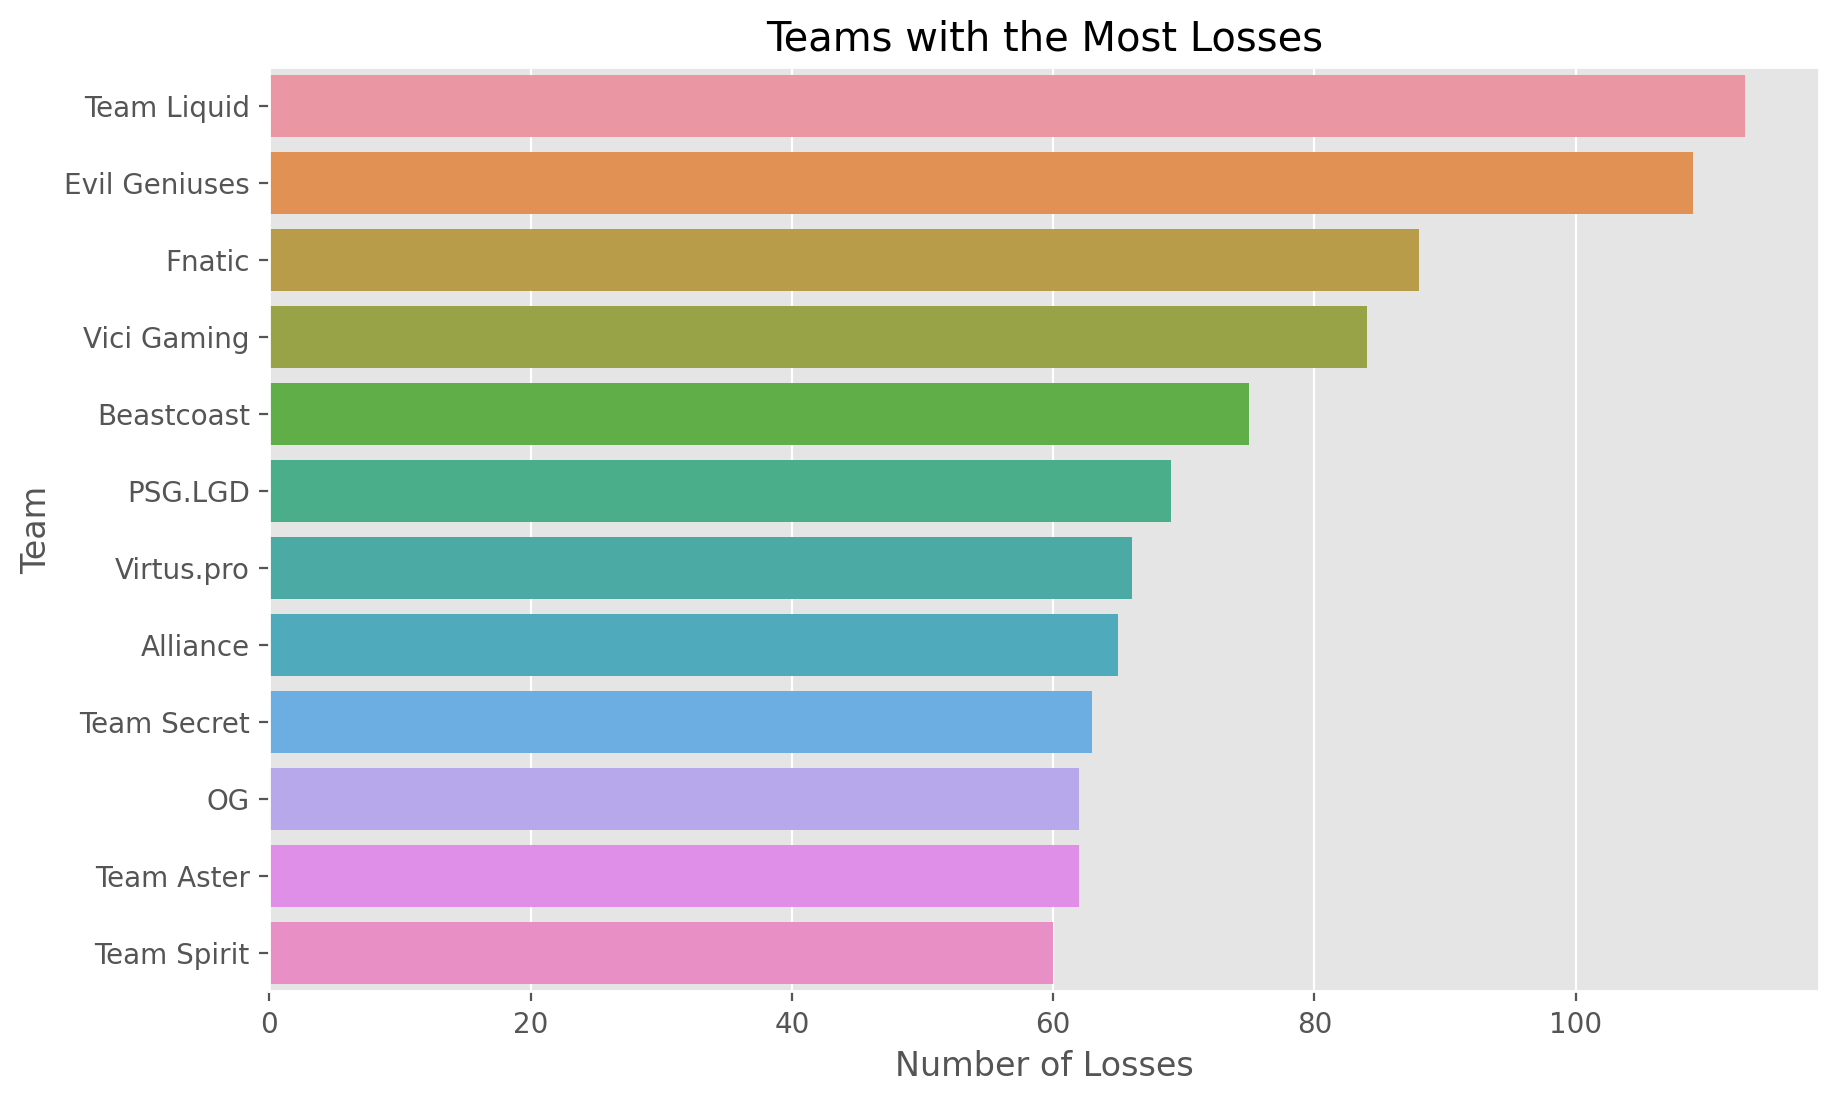

In [30]:
#Most Losses
team_losses = tour[tour['RESULT'] == 'LOSE'].groupby('TEAM').size().sort_values(ascending=False).head(12)
plt.figure(figsize=(10, 6))
sns.barplot(x=team_losses.values, y=team_losses.index)
plt.title('Teams with the Most Losses')
plt.xlabel('Number of Losses')
plt.ylabel('Team')
plt.show()

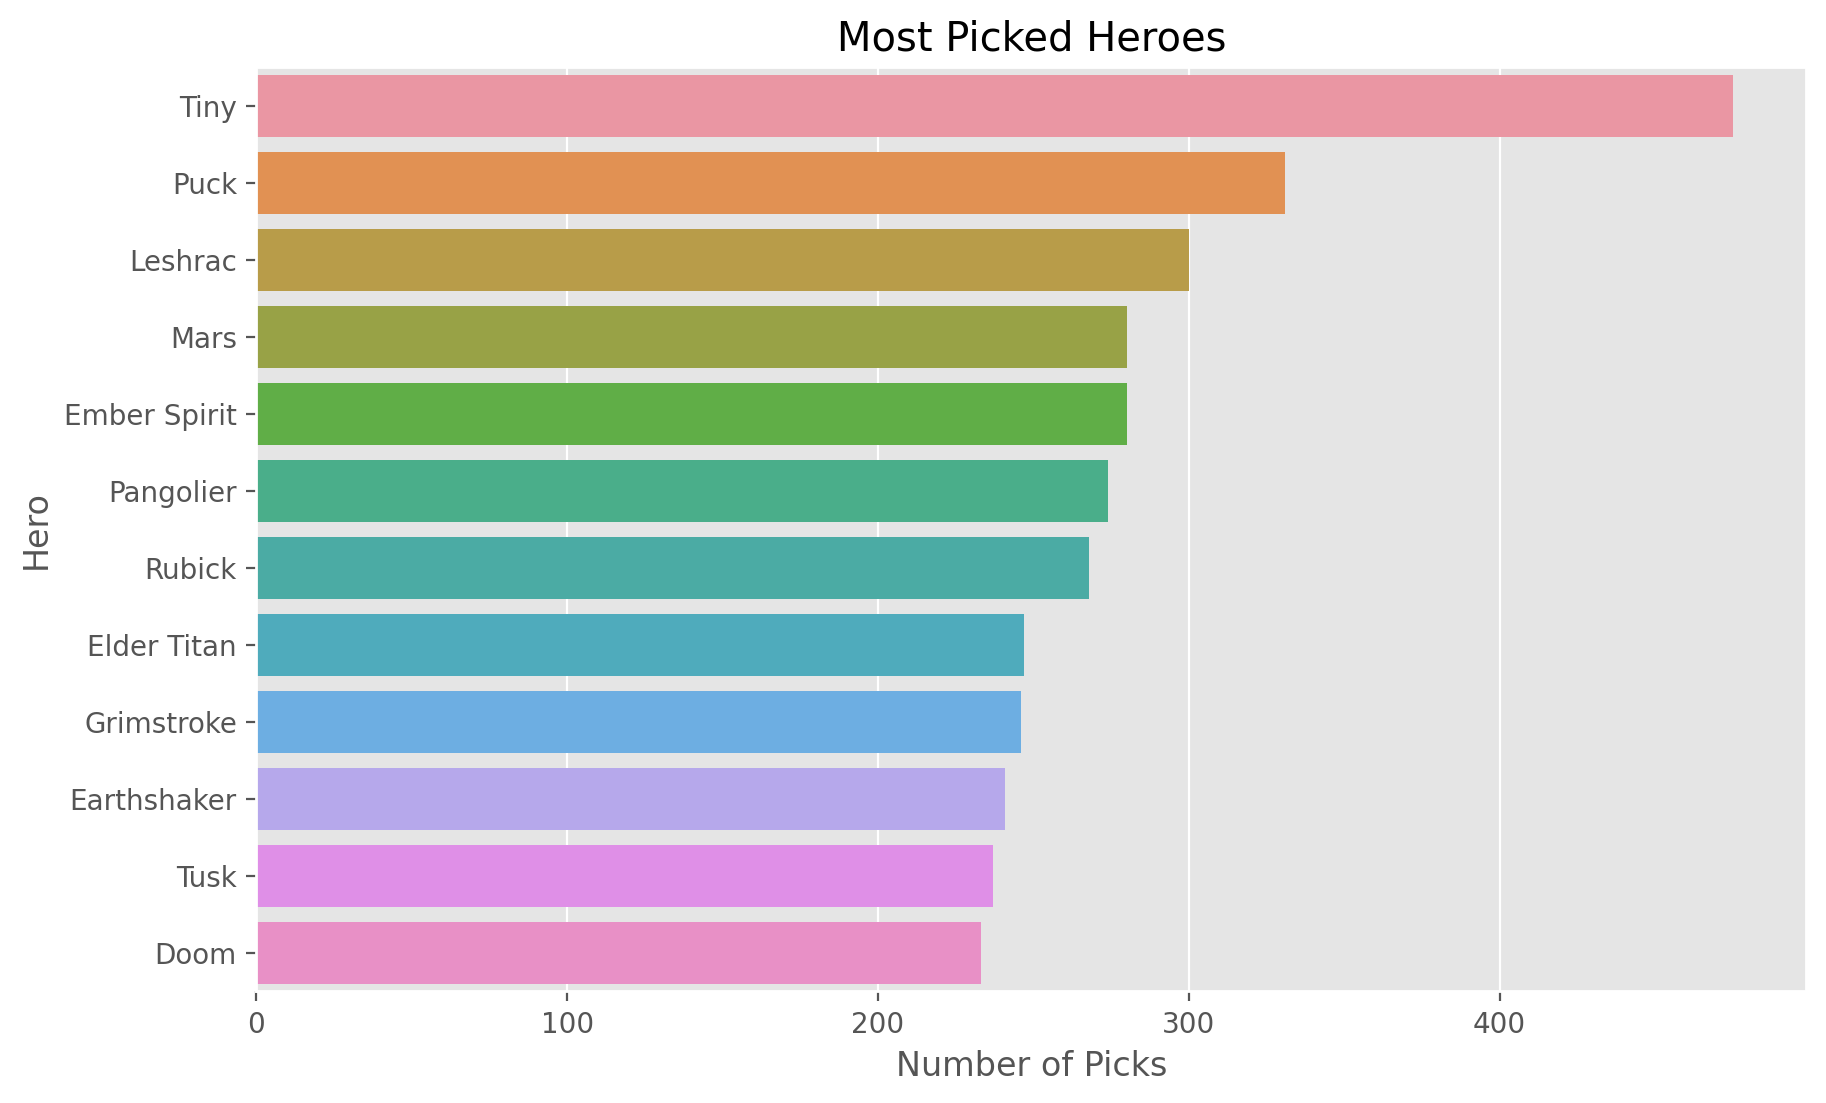

In [31]:
#Most Picked
heroes = pd.concat([tour['HERO_1'], tour['HERO_2'], tour['HERO_3'], tour['HERO_4'], tour['HERO_5']])
hero_counts = heroes.value_counts().head(12)
plt.figure(figsize=(10, 6))
sns.barplot(x=hero_counts.values, y=hero_counts.index)
plt.title('Most Picked Heroes')
plt.xlabel('Number of Picks')
plt.ylabel('Hero')
plt.show()

In [32]:
# Create separate dataframes for wins and losses
wins = tour[tour['RESULT'] == 'WIN']
losses = tour[tour['RESULT'] == 'LOSE']

# Count number of wins and losses for each team
win_counts = wins['TEAM'].value_counts().reset_index()
loss_counts = losses['TEAM'].value_counts().reset_index()

# Rename columns for clarity
win_counts.columns = ['TEAM', 'NUM_WINS']
loss_counts.columns = ['TEAM', 'NUM_LOSSES']

# Merge win_counts and loss_counts
team_counts = pd.merge(win_counts, loss_counts, on='TEAM', how='outer')

# Fill missing values with 0
team_counts[['NUM_WINS', 'NUM_LOSSES']] = team_counts[['NUM_WINS', 'NUM_LOSSES']].fillna(0)

# Calculate win-loss differential for each team
team_counts['WIN_LOSS_DIFF'] = team_counts['NUM_WINS'] - team_counts['NUM_LOSSES']

# Sort teams by win-loss differential
team_diff_sorted = team_counts.sort_values(by='WIN_LOSS_DIFF', ascending=False)

# Select top 10 teams
top_teams_diff = team_diff_sorted.head(10)

# Select bottom 10 teams
bottom_teams_diff = team_diff_sorted.tail(10)

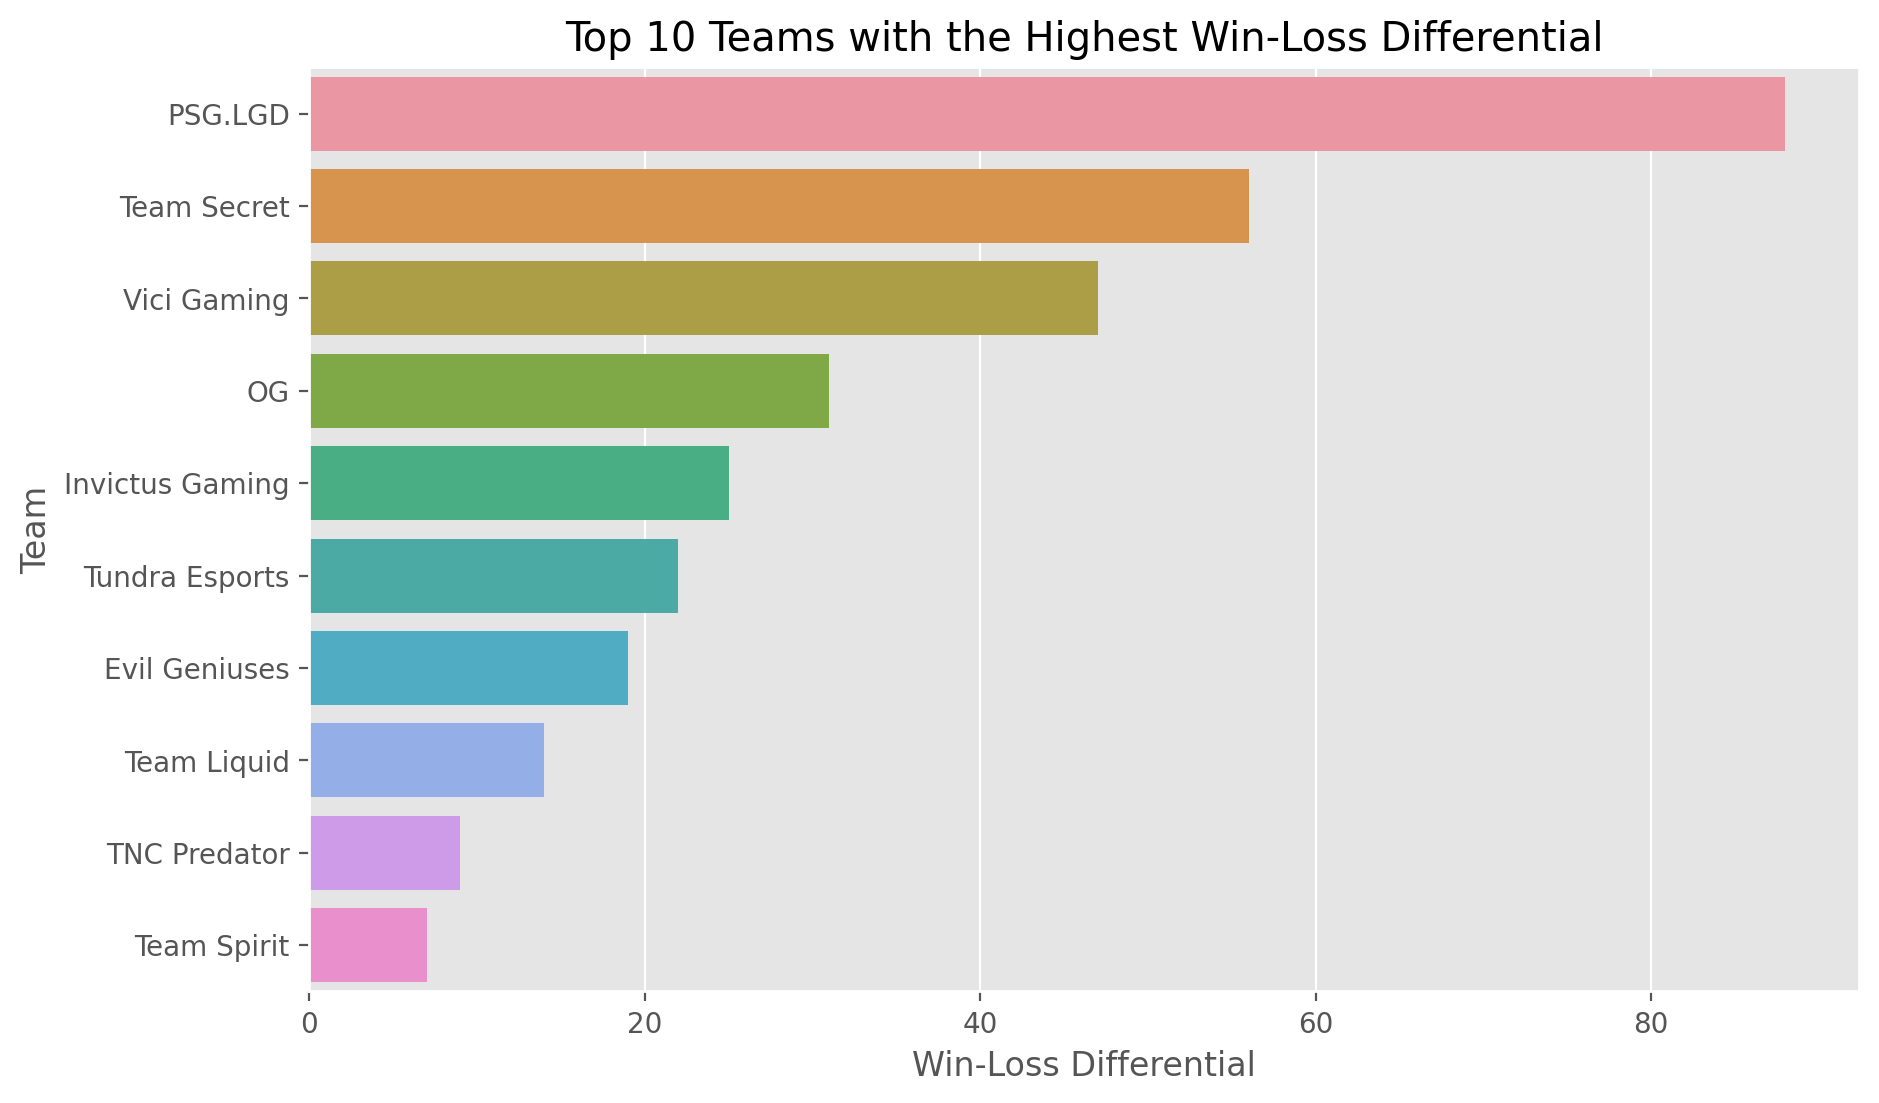

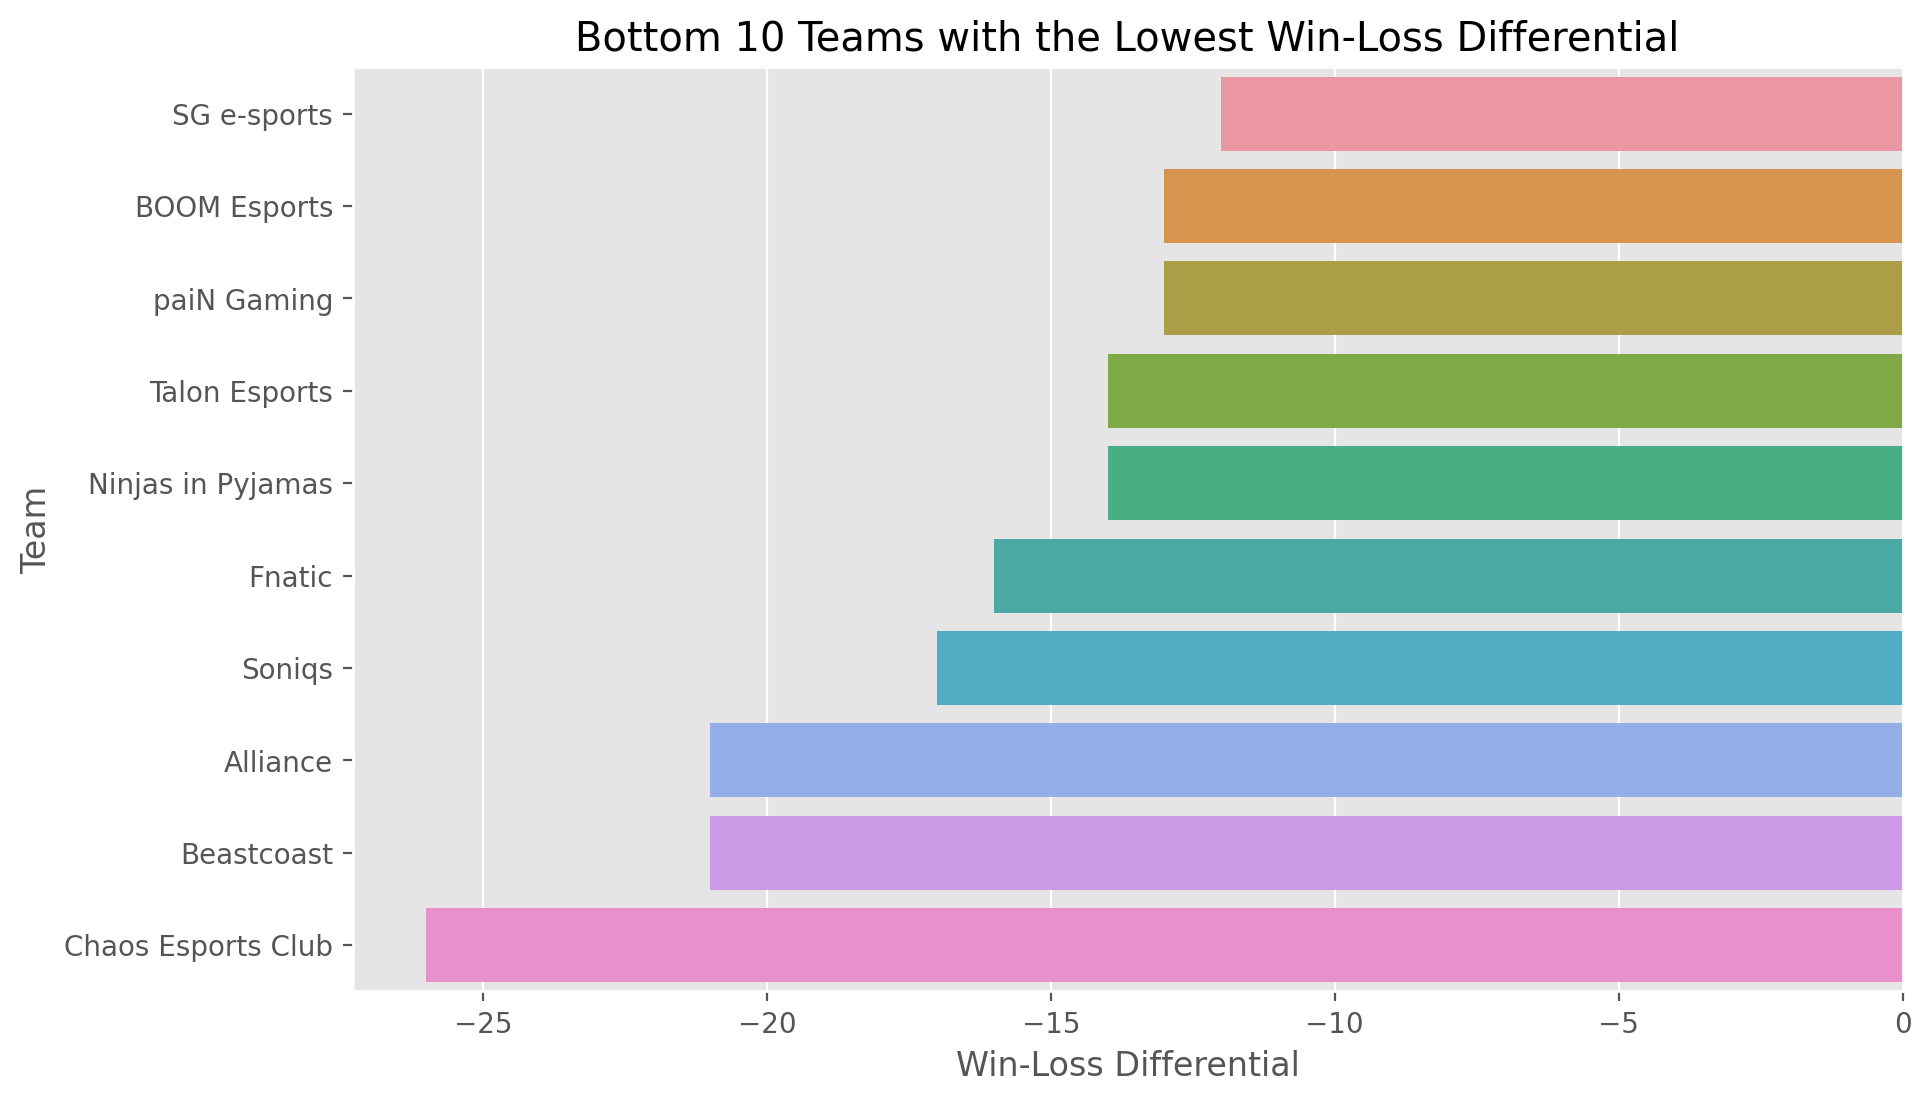

In [33]:
# Create bar plot for top 10 teams
plt.figure(figsize=(10, 6))
sns.barplot(x='WIN_LOSS_DIFF', y='TEAM', data=top_teams_diff, errorbar=None, order=top_teams_diff['TEAM'])
plt.title('Top 10 Teams with the Highest Win-Loss Differential')
plt.xlabel('Win-Loss Differential')
plt.ylabel('Team')
plt.show()

# Create bar plot for bottom 10 teams
plt.figure(figsize=(10, 6))
sns.barplot(x='WIN_LOSS_DIFF', y='TEAM', data=bottom_teams_diff, errorbar=None, order=bottom_teams_diff['TEAM'])
plt.title('Bottom 10 Teams with the Lowest Win-Loss Differential')
plt.xlabel('Win-Loss Differential')
plt.ylabel('Team')
plt.show()

In [34]:
# Calculate total score for each team
team_scores_sum = tour.groupby('TEAM')['SCORE'].sum().sort_values(ascending=False)

# Calculate max score for each team in a match
team_scores_max = tour.groupby('TEAM')['SCORE'].max().sort_values(ascending=False)

# Select top 10 and bottom 10 teams for total score
top_teams_scores_sum = team_scores_sum.head(10)
bottom_teams_scores_sum = team_scores_sum.tail(10)

# Select top 10 and bottom 10 teams for max score in a match
top_teams_scores_max = team_scores_max.head(10)
bottom_teams_scores_max = team_scores_max.tail(10)

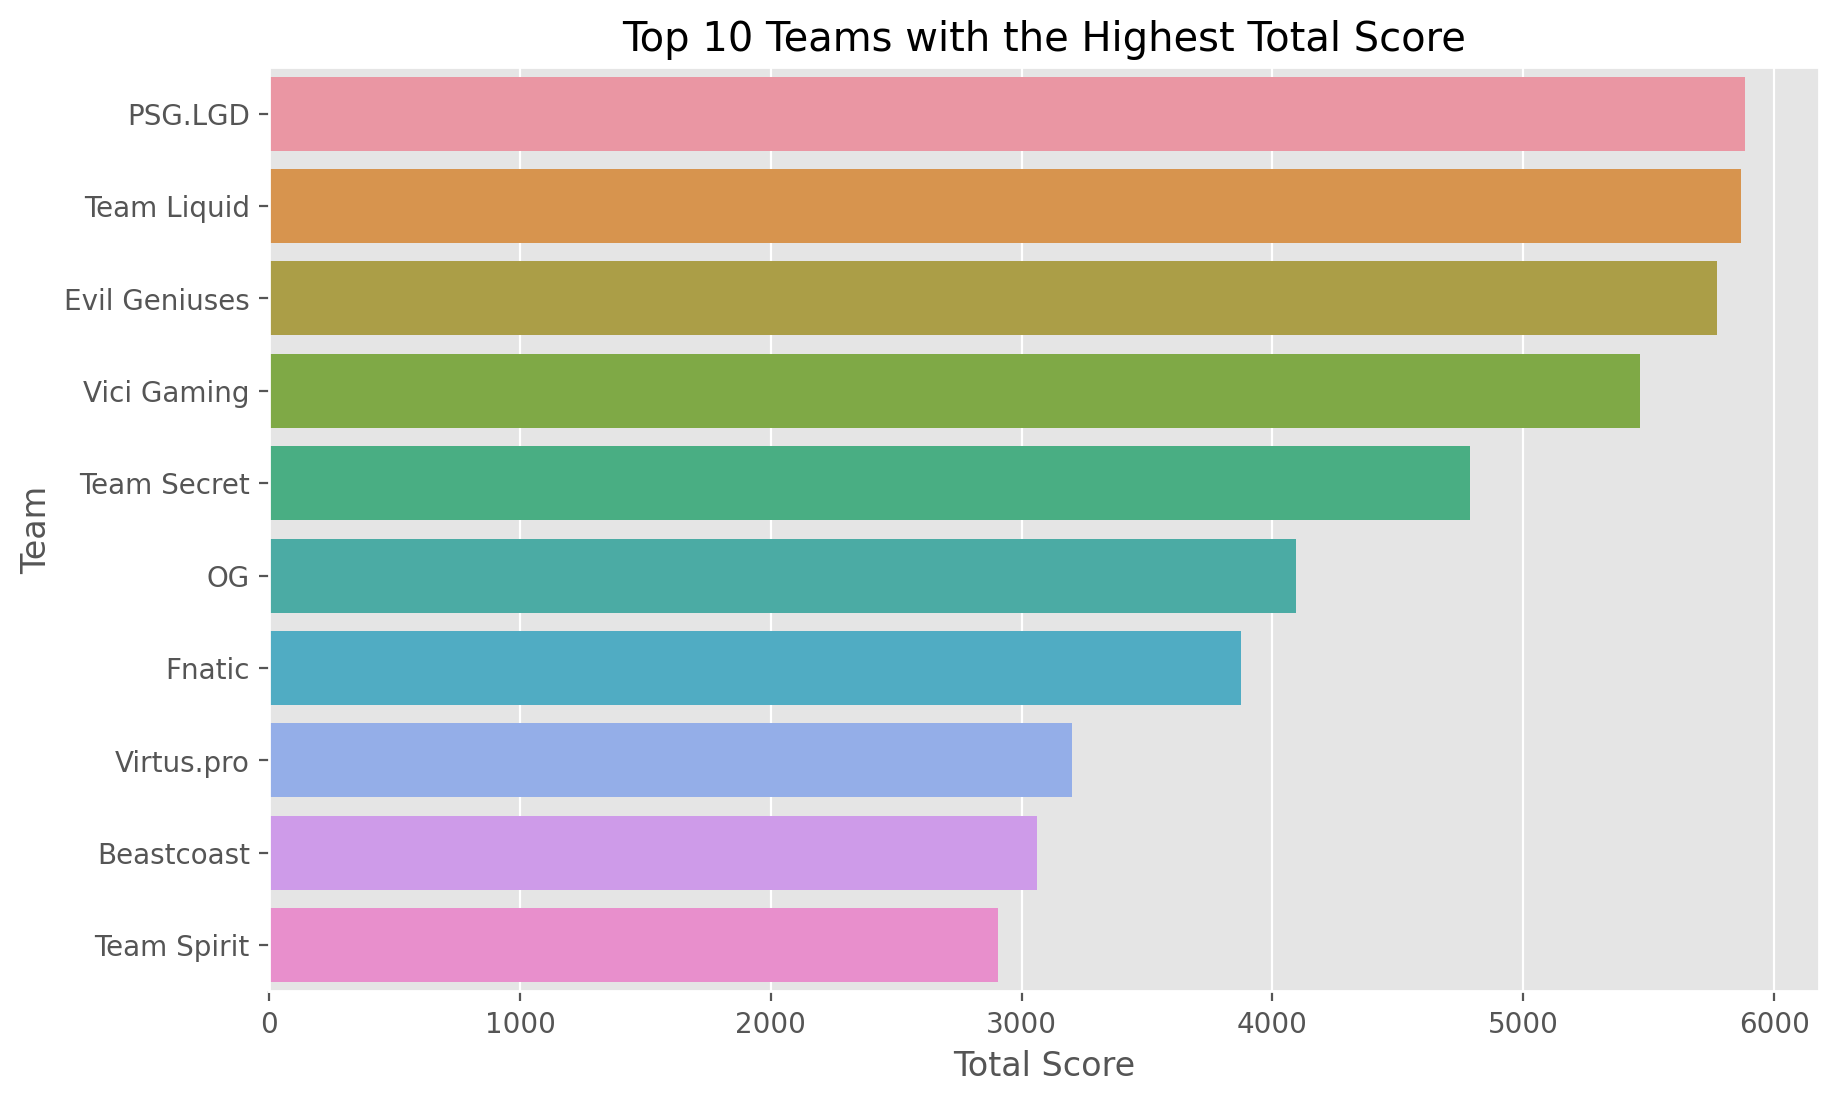

In [35]:
# Create bar plot for top 10 teams in total score
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams_scores_sum.values, y=top_teams_scores_sum.index)
plt.title('Top 10 Teams with the Highest Total Score')
plt.xlabel('Total Score')
plt.ylabel('Team')
plt.show()

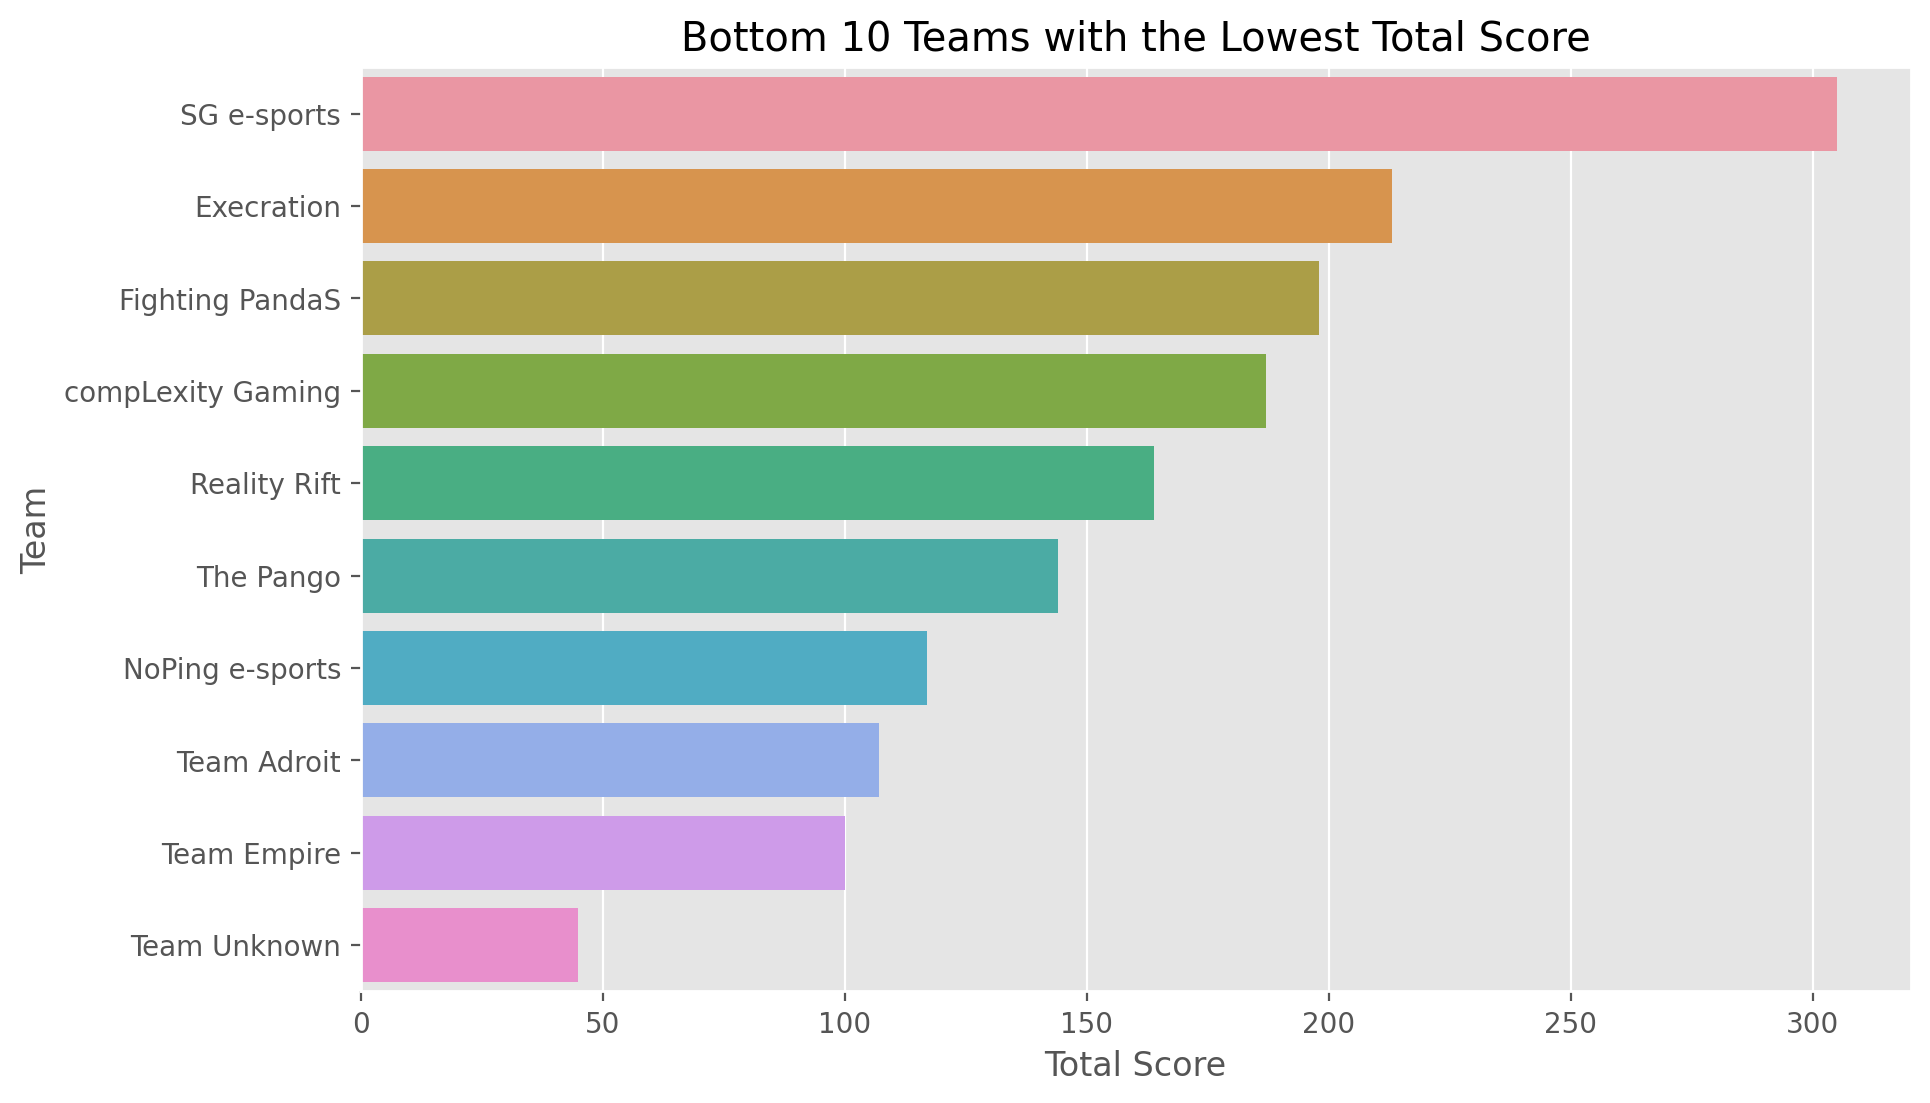

In [36]:
# Create bar plot for bottom 10 teams in total score
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_teams_scores_sum.values, y=bottom_teams_scores_sum.index)
plt.title('Bottom 10 Teams with the Lowest Total Score')
plt.xlabel('Total Score')
plt.ylabel('Team')
plt.show()

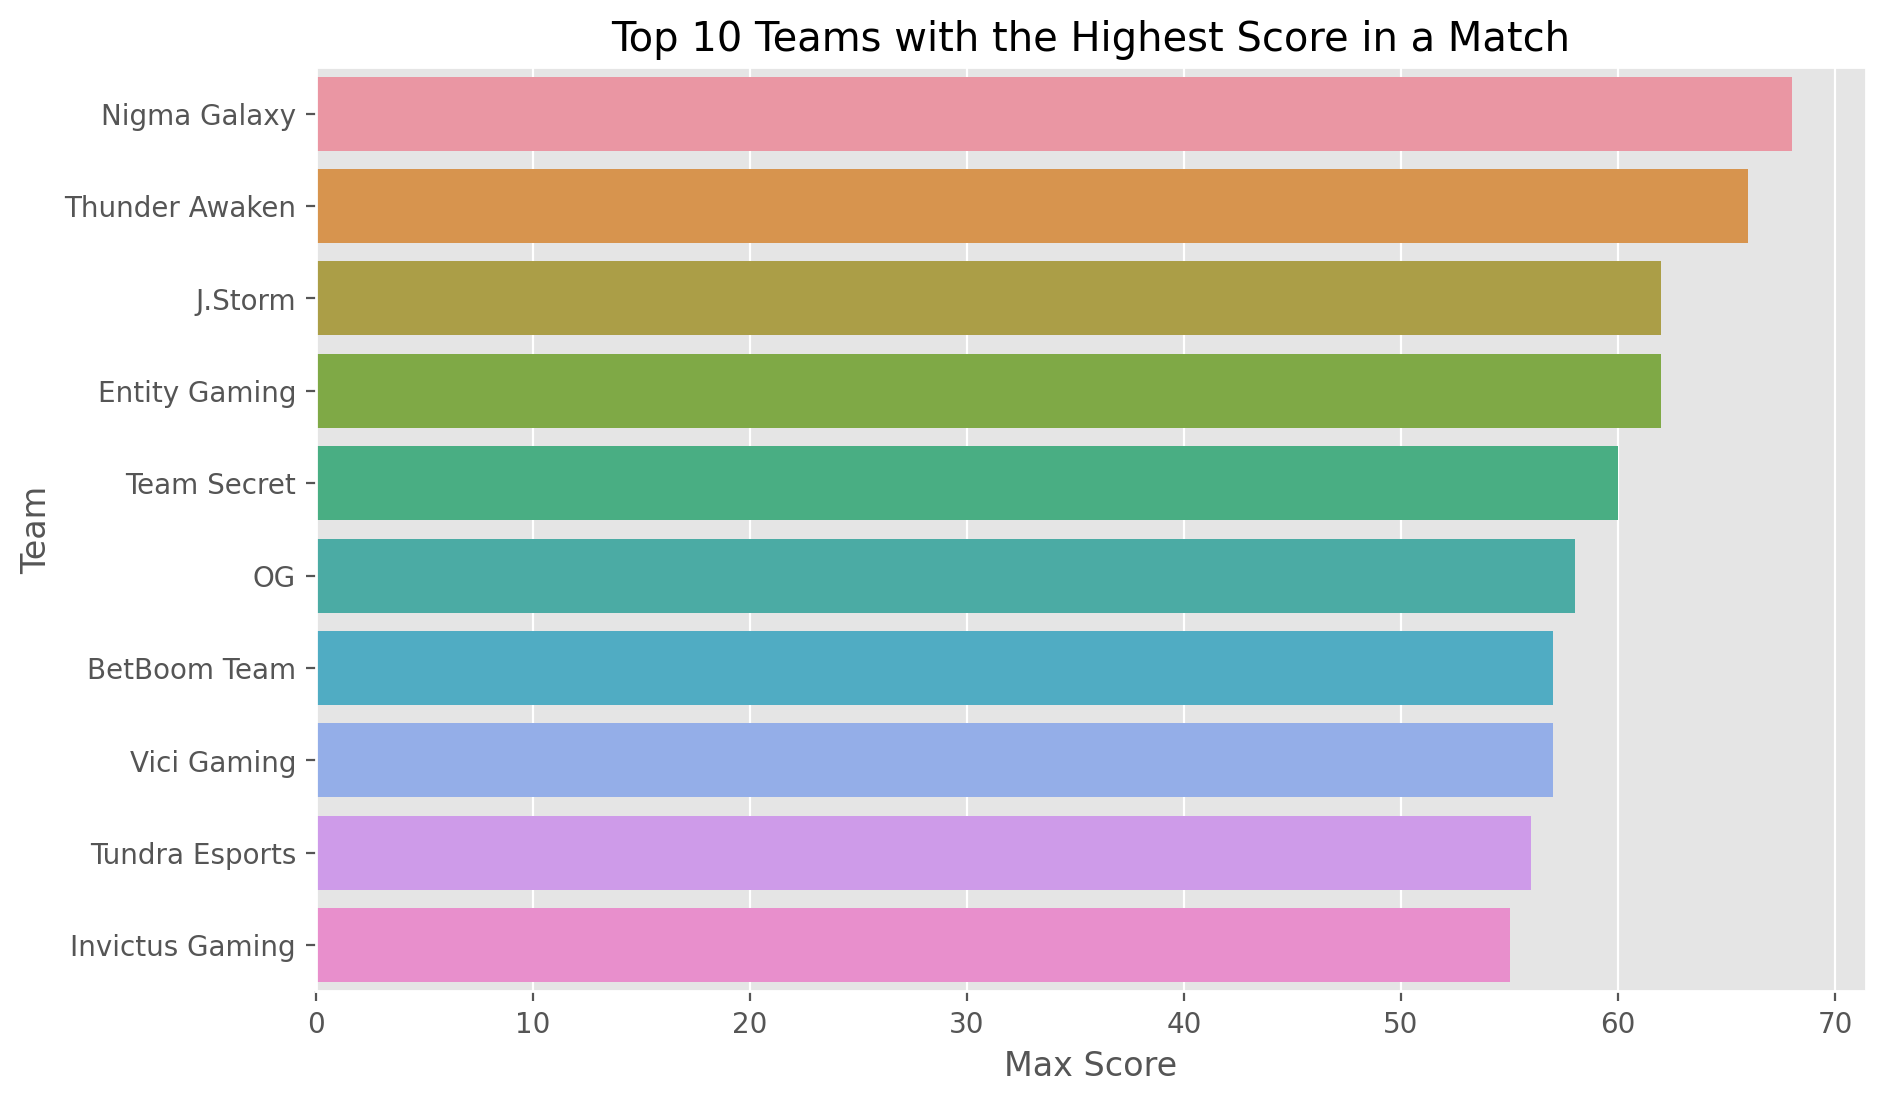

In [37]:
# Create bar plot for top 10 teams in max score
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams_scores_max.values, y=top_teams_scores_max.index)
plt.title('Top 10 Teams with the Highest Score in a Match')
plt.xlabel('Max Score')
plt.ylabel('Team')
plt.show()

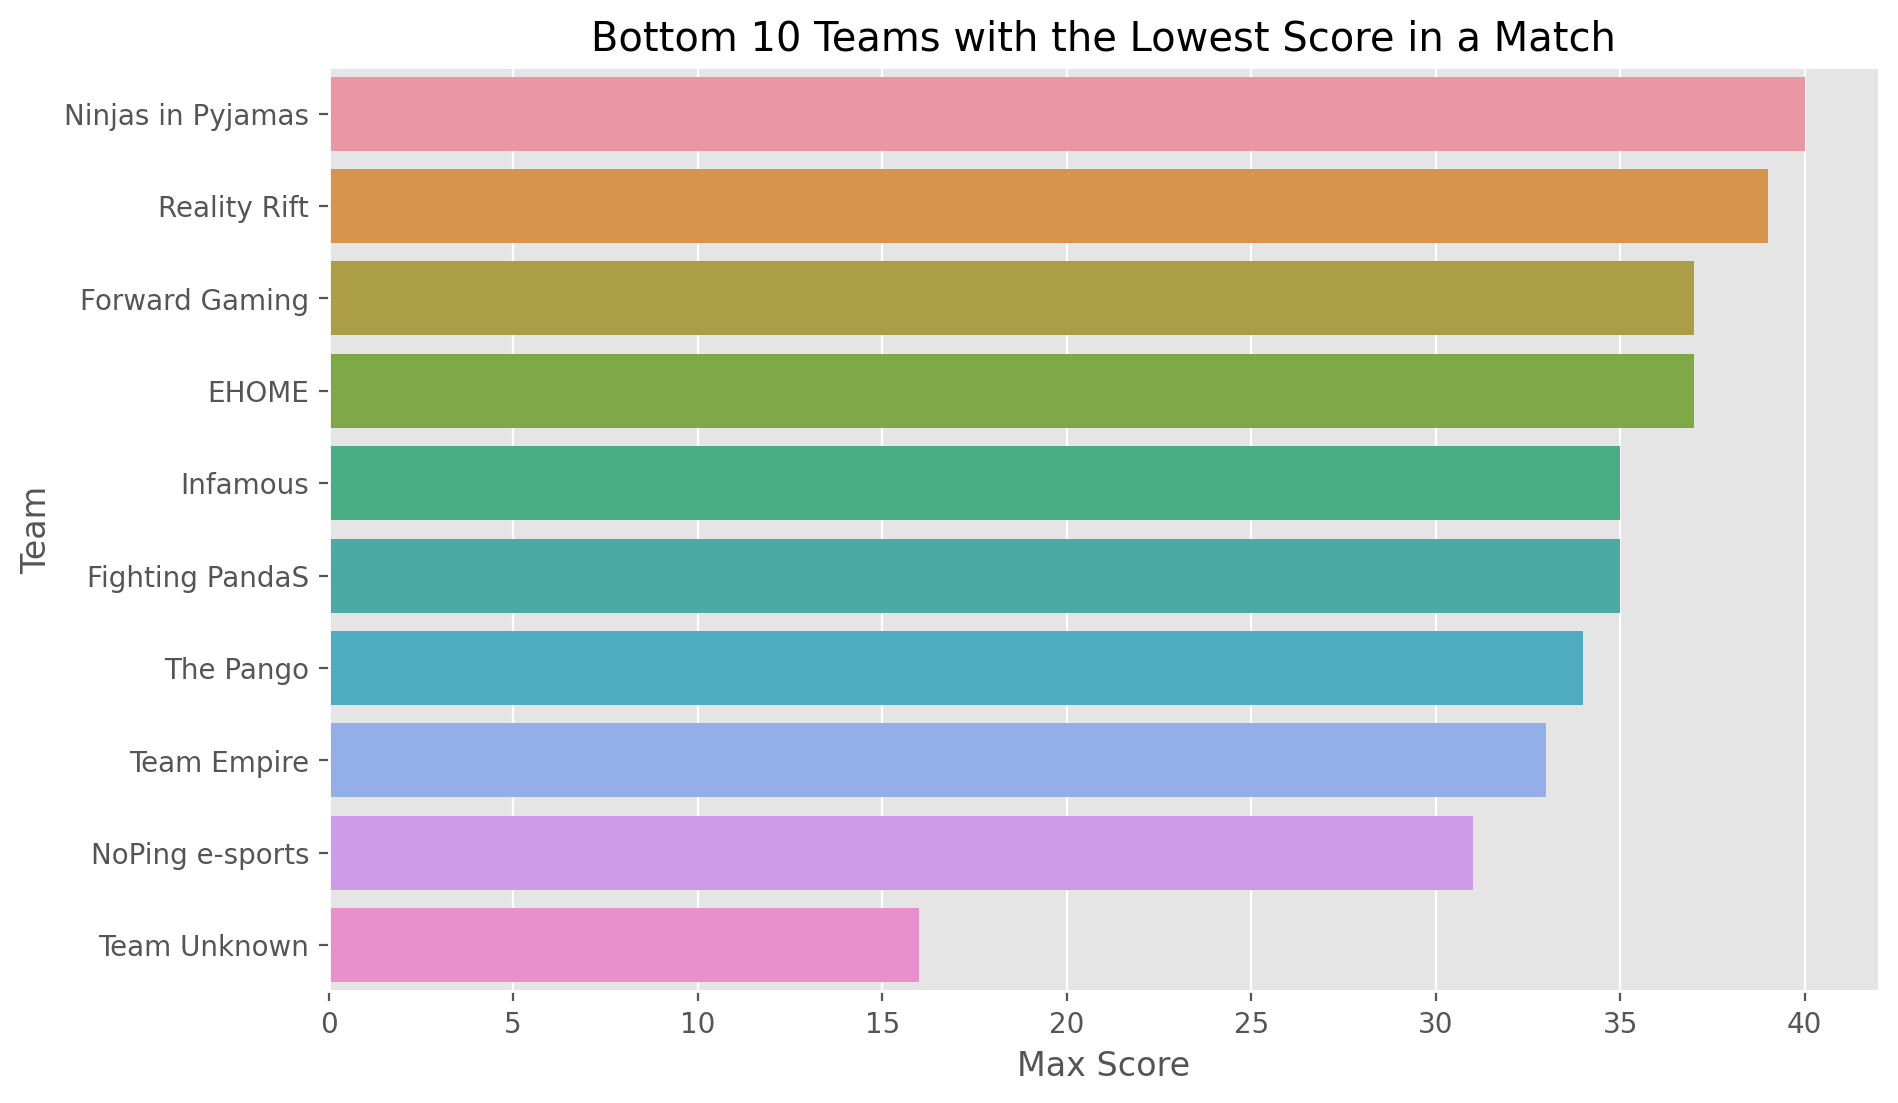

In [38]:
# Create bar plot for bottom 10 teams in max score
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_teams_scores_max.values, y=bottom_teams_scores_max.index)
plt.title('Bottom 10 Teams with the Lowest Score in a Match')
plt.xlabel('Max Score')
plt.ylabel('Team')
plt.show()

# Prizes Section

In [39]:
#Read the Dataset
prize=pd.read_excel('dota_prizes.xlsx')

In [40]:
#Print First 5 rows
prize.head()

Tournament  Place           Team   Prize
0  The Chongqing Major 2019      1    Team Secret  350000
1  The Chongqing Major 2019      2     Virtus.pro  170000
2  The Chongqing Major 2019      3  Evil Geniuses  100000
3  The Chongqing Major 2019      4        PSG.LGD   80000
4  The Chongqing Major 2019      5          EHOME   60000

In [41]:
#Print Number of Rows and Columns
prize.shape

(184, 4)

In [42]:
#Check Column Information
prize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tournament  184 non-null    object
 1   Place       184 non-null    int64 
 2   Team        184 non-null    object
 3   Prize       184 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.9+ KB


In [43]:
#Check Number of Unique Values
prize.nunique()

Tournament    13
Place         20
Team          53
Prize         42
dtype: int64

In [44]:
#Description of Numeric Columns
prize.describe()

Place         Prize
count  184.000000  1.840000e+02
mean     8.217391  5.504279e+05
std      4.934159  1.959798e+06
min      1.000000  1.000000e+04
25%      4.000000  1.500000e+04
50%      8.000000  6.000000e+04
75%     12.000000  3.500000e+05
max     20.000000  1.820830e+07

In [45]:
#Total Prize from each Tournament
total_prize=prize['Prize'].groupby(prize['Tournament']).sum()

In [46]:
def format_prize(value):
    # Convert the prize value to millions and round to 2 decimal places
    return f'{round(value / 1_000_000, 2)}M'

In [47]:
# Sort the total prize money in descending order
sorted_prizes = total_prize.sort_values(ascending=False)

# Get the top 5 and bottom 5 tournaments
top_5 = sorted_prizes.head(5)

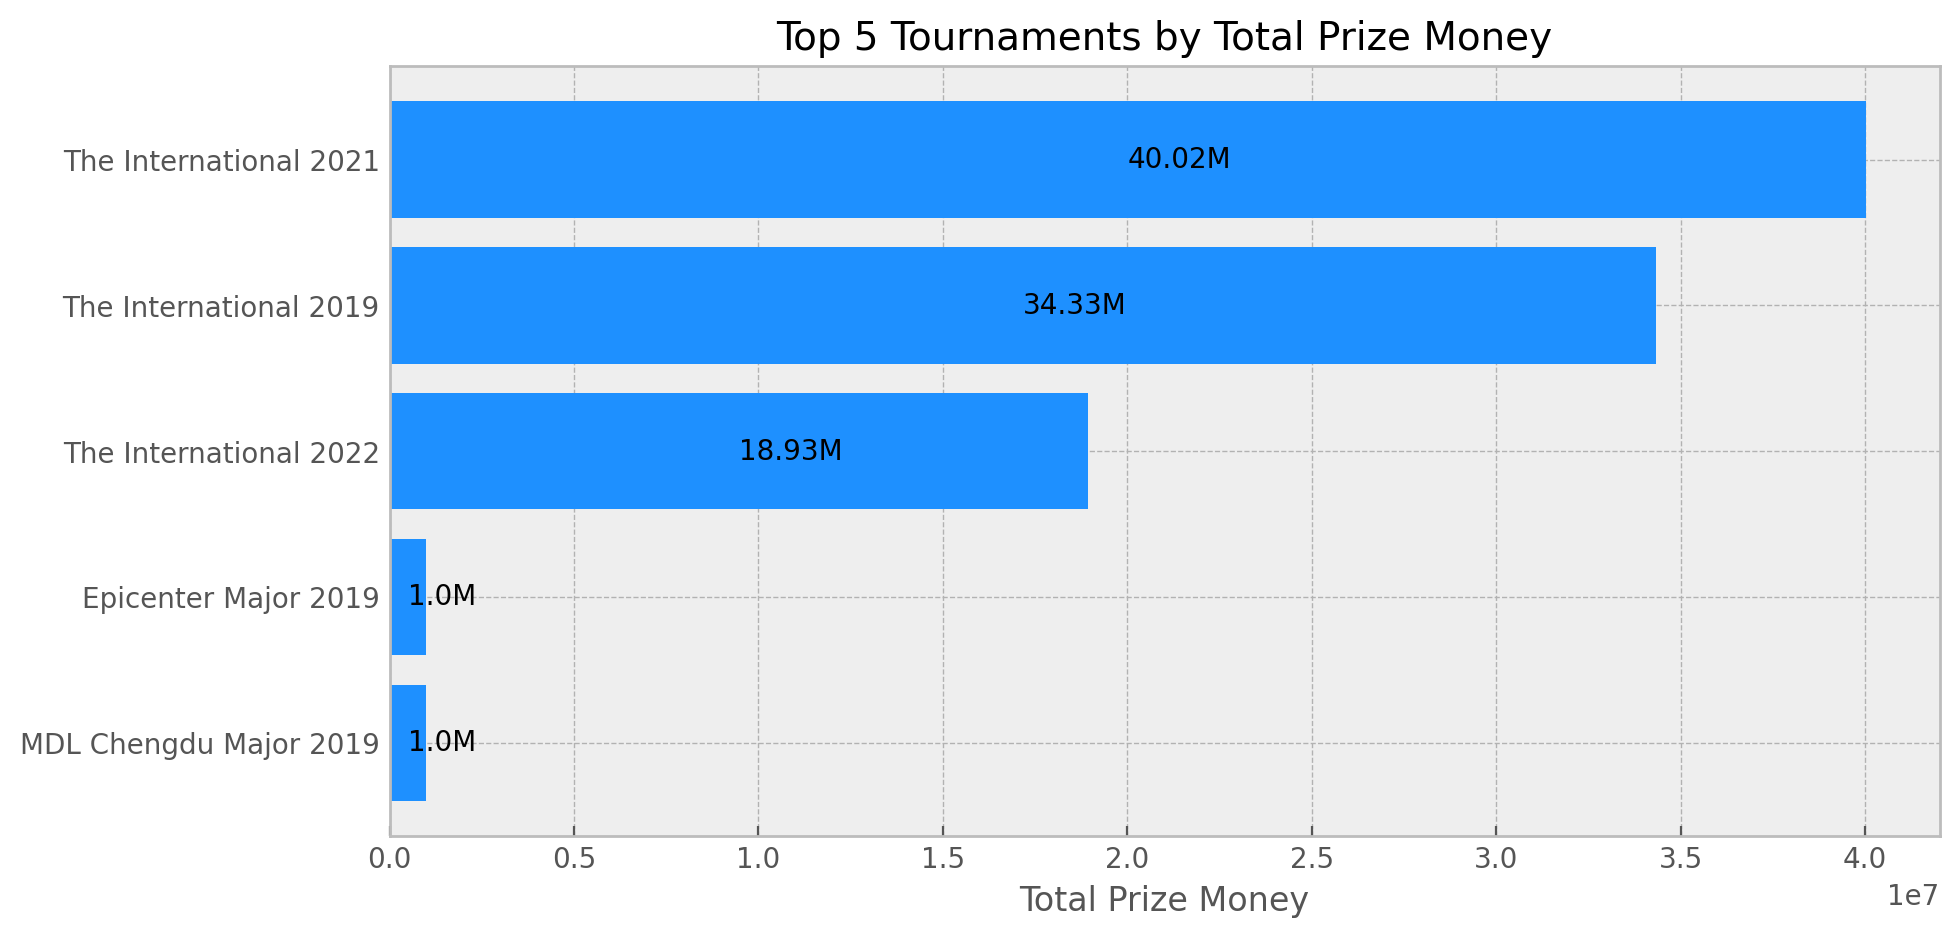

In [48]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('bmh')

# Plot the top 5 tournaments
plt.figure(figsize=(10,5))
bars = plt.barh(top_5.index, top_5.values, color='dodgerblue')
plt.xlabel('Total Prize Money', fontsize=12)
plt.title('Top 5 Tournaments by Total Prize Money', fontsize=14)
plt.xticks(np.arange(0, max(top_5.values)+1, step=5000000), fontsize=10)  # Set x-axis to display a tick every 5 million
for bar in bars:
    width = bar.get_width()
    plt.text(width - width/2, bar.get_y() + bar.get_height()/2, format_prize(width), va='center', color='black', fontsize=10)
plt.gca().invert_yaxis()
plt.yticks(fontsize=10)

plt.show()


In [49]:
#Get the Lowest 5 Tournaments
bottom_5 = sorted_prizes.tail(5)

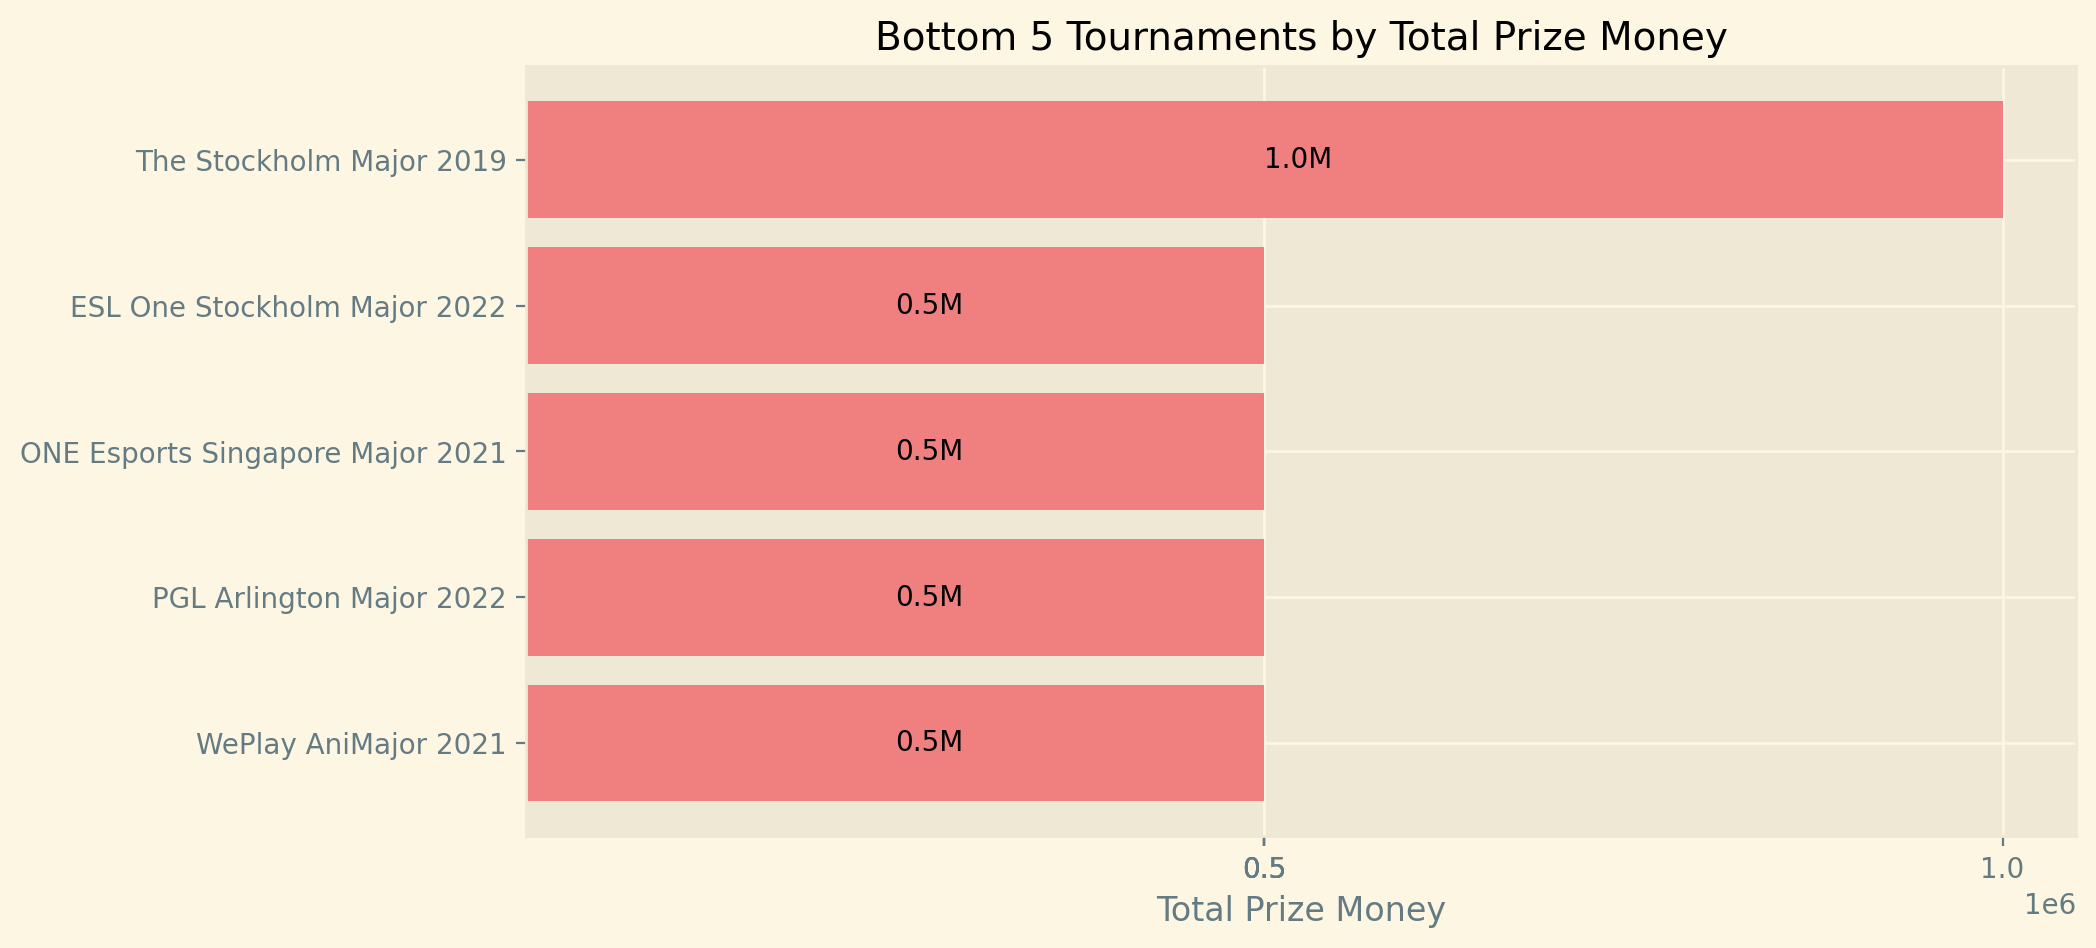

In [50]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('Solarize_Light2')

# Plot the bottom 5 tournaments
plt.figure(figsize=(10,5))
bars = plt.barh(bottom_5.index, bottom_5.values, color='lightcoral')
plt.xlabel('Total Prize Money', fontsize=12)
plt.title('Bottom 5 Tournaments by Total Prize Money', fontsize=14)
plt.xticks(bottom_5.values, fontsize=10)  # Set x-axis to display actual values
for bar in bars:
    width = bar.get_width()
    plt.text(width - width/2, bar.get_y() + bar.get_height()/2, format_prize(width), va='center', color='black', fontsize=10)
plt.gca().invert_yaxis()
plt.yticks(fontsize=10)

plt.show()


In [51]:
# Group by 'Team' and sum the 'Prize' values
team_prizes = prize.groupby('Team')['Prize'].sum()

# Sort the results in descending order
sorted_team_prizes = team_prizes.sort_values(ascending=False)

# Get the top 5 teams
top_5_teams = sorted_team_prizes.head(5)

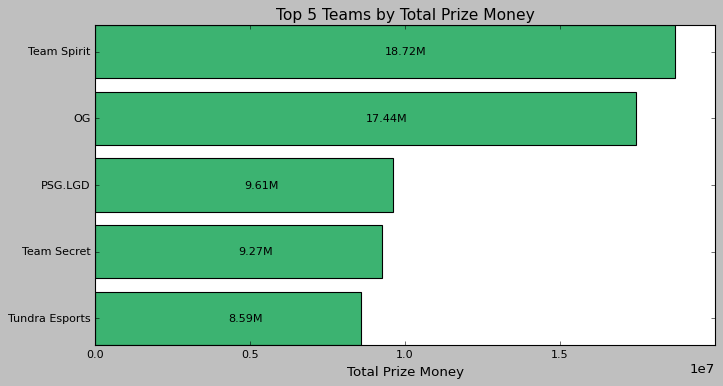

In [52]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('classic')

# Plot the top 5 teams
plt.figure(figsize=(10,5))
bars = plt.barh(top_5_teams.index, top_5_teams.values, color='mediumseagreen')
plt.xlabel('Total Prize Money', fontsize=12)
plt.title('Top 5 Teams by Total Prize Money', fontsize=14)
plt.xticks(np.arange(0, max(top_5_teams.values)+1, step=5000000), fontsize=10)  # Set x-axis to display a tick every 5 million
for bar in bars:
    width = bar.get_width()
    plt.text(width - width/2, bar.get_y() + bar.get_height()/2, format_prize(width), va='center', color='black', fontsize=10)
plt.gca().invert_yaxis()
plt.yticks(fontsize=10)

plt.show()


In [53]:
# Filter the data for 'Team Spirit'
team_spirit = prize[prize['Team'] == 'Team Spirit']

# Group by 'Tournament' and sum the 'Prize' values
tournament_prizes = prize.groupby('Tournament')['Prize'].sum()
team_spirit_prizes = team_spirit.groupby('Tournament')['Prize'].sum()

# Calculate the percentage of prize money that 'Team Spirit' won in each tournament
percentage = (team_spirit_prizes / tournament_prizes) * 100

# Drop NaN values
percentage = percentage.dropna()

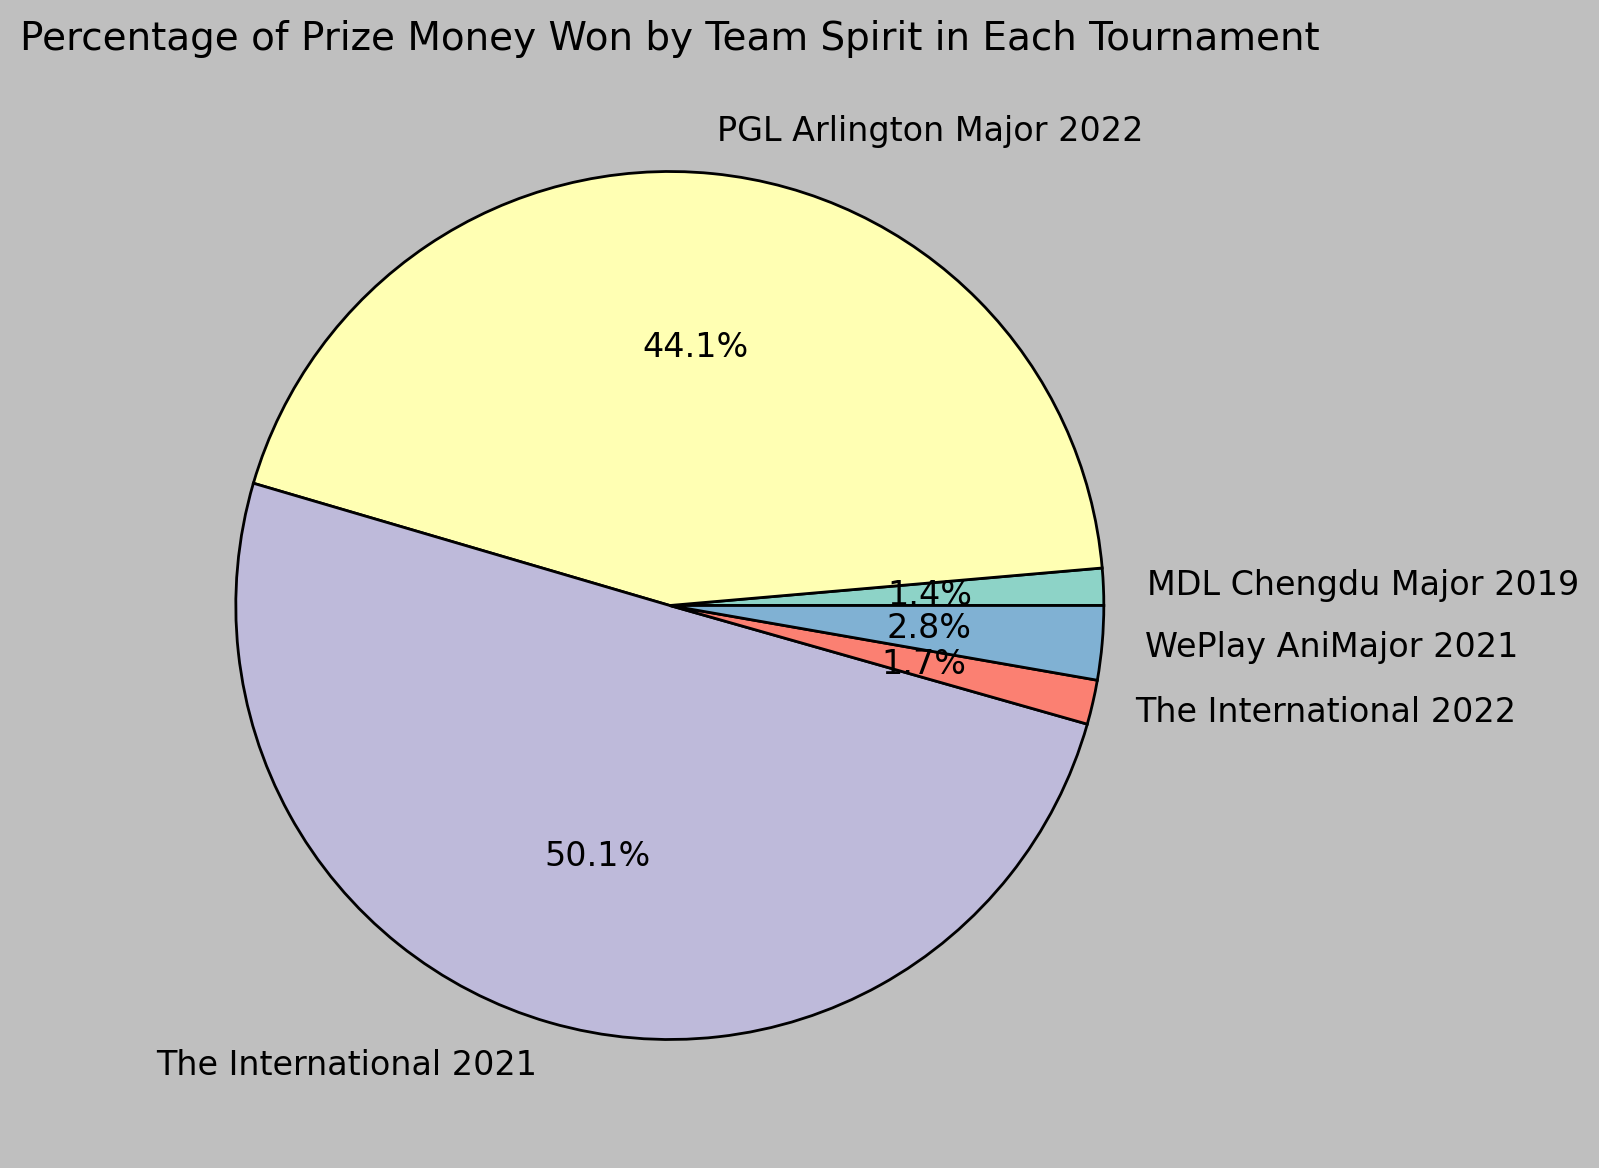

In [54]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('tableau-colorblind10')

# Plot the results
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', textprops={'fontsize': 10}, colors=plt.cm.Set3.colors)
plt.title('Percentage of Prize Money Won by Team Spirit in Each Tournament', fontsize=14)

# Increase the font size of the labels and the percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.show()


In [55]:
# Filter the data for 'Team Spirit'
OG = prize[prize['Team'] == 'OG']

# Group by 'Tournament' and sum the 'Prize' values
tournament_prizes = prize.groupby('Tournament')['Prize'].sum()
OG_prizes = OG.groupby('Tournament')['Prize'].sum()

# Calculate the percentage of prize money that 'Team Spirit' won in each tournament
percentage = (OG_prizes / tournament_prizes) * 100

# Drop NaN values
percentage = percentage.dropna()

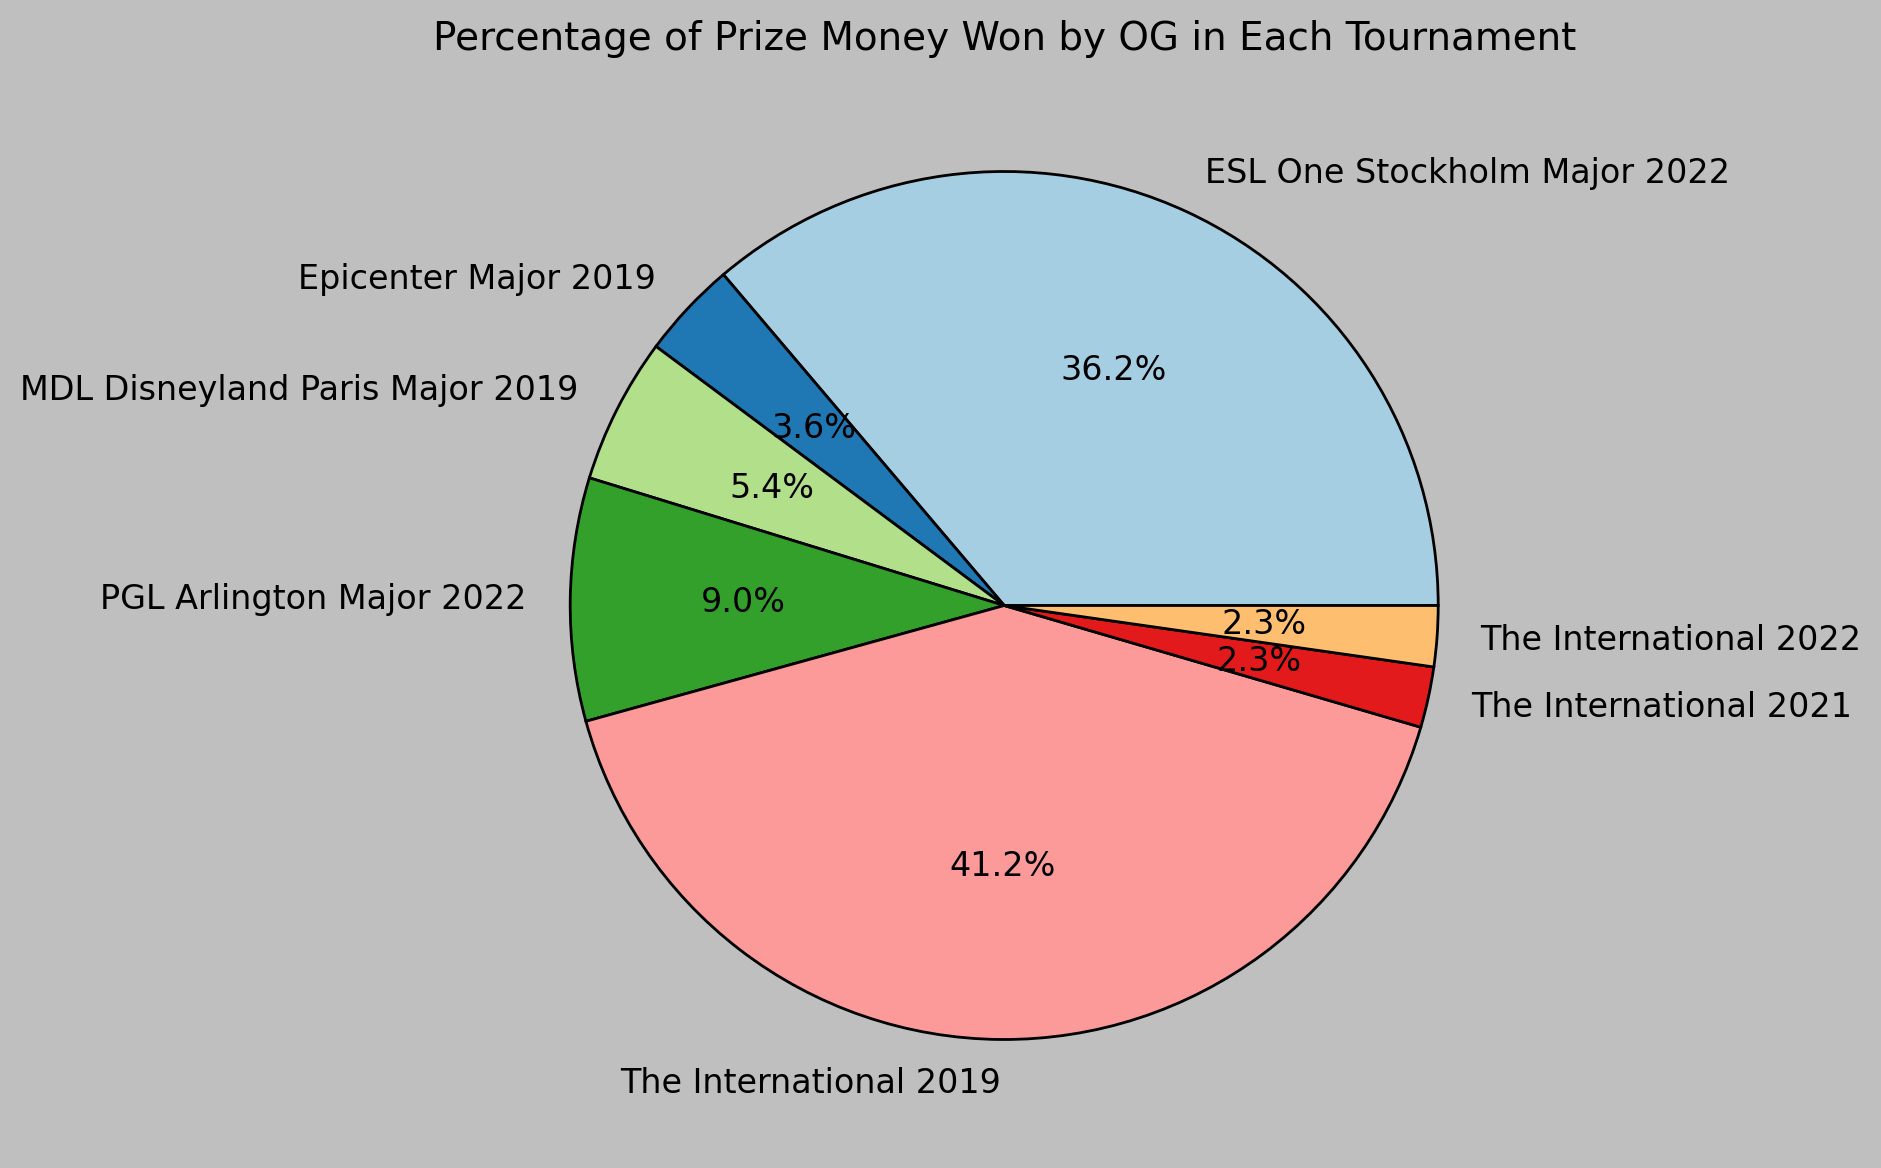

In [56]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('tableau-colorblind10')

# Plot the results
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', textprops={'fontsize': 10}, colors=plt.cm.Paired.colors)
plt.title('Percentage of Prize Money Won by OG in Each Tournament', fontsize=14)

# Increase the font size of the labels and the percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.show()


In [57]:
# Count the number of times each team has finished in first place
first_place_counts = prize[prize['Place'] == 1]['Team'].value_counts()

# Get the 5 teams with the most first place finishes
top_5_first_place = first_place_counts.head(5)

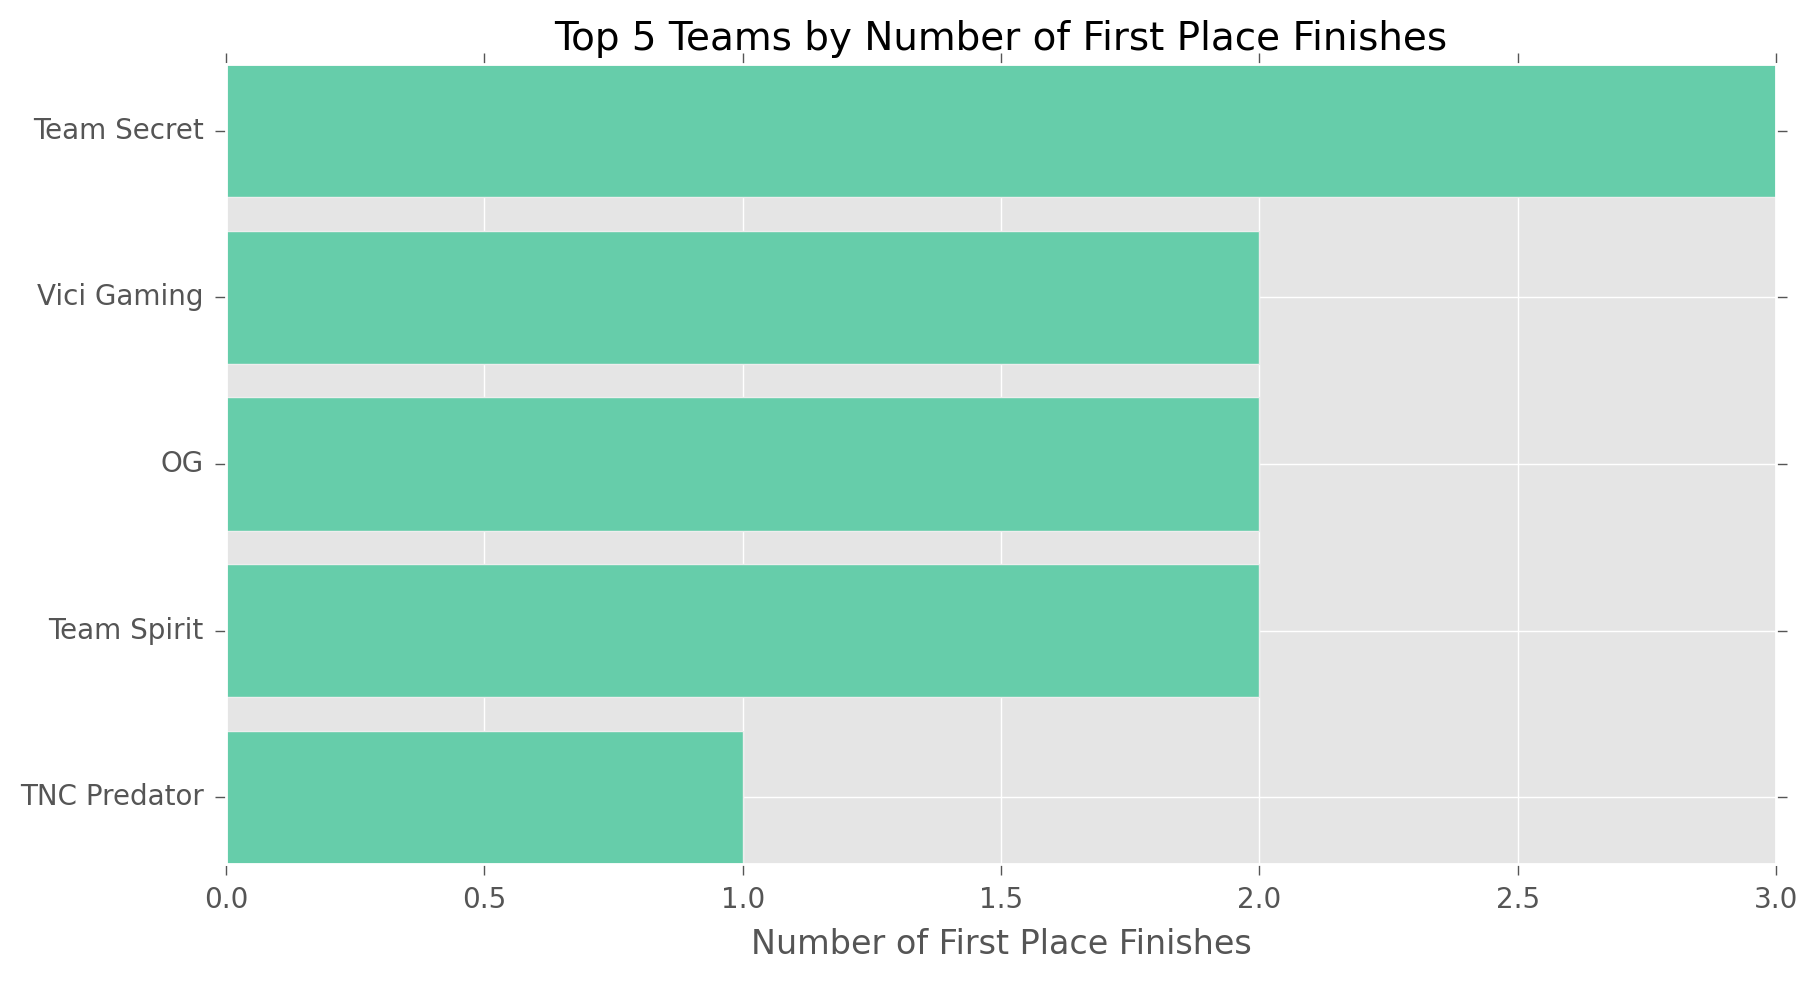

In [58]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('ggplot')

# Plot the results
plt.figure(figsize=(10,5))
bars = plt.barh(top_5_first_place.index, top_5_first_place.values, color='mediumaquamarine')
plt.xlabel('Number of First Place Finishes', fontsize=12)
plt.title('Top 5 Teams by Number of First Place Finishes', fontsize=14)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [59]:
# Count the number of times each team has finished in the top 3
top_3_counts = prize[prize['Place'] <= 3]['Team'].value_counts()

# Get the 5 teams with the most top 3 finishes
top_5_top_3 = top_3_counts.head(5)

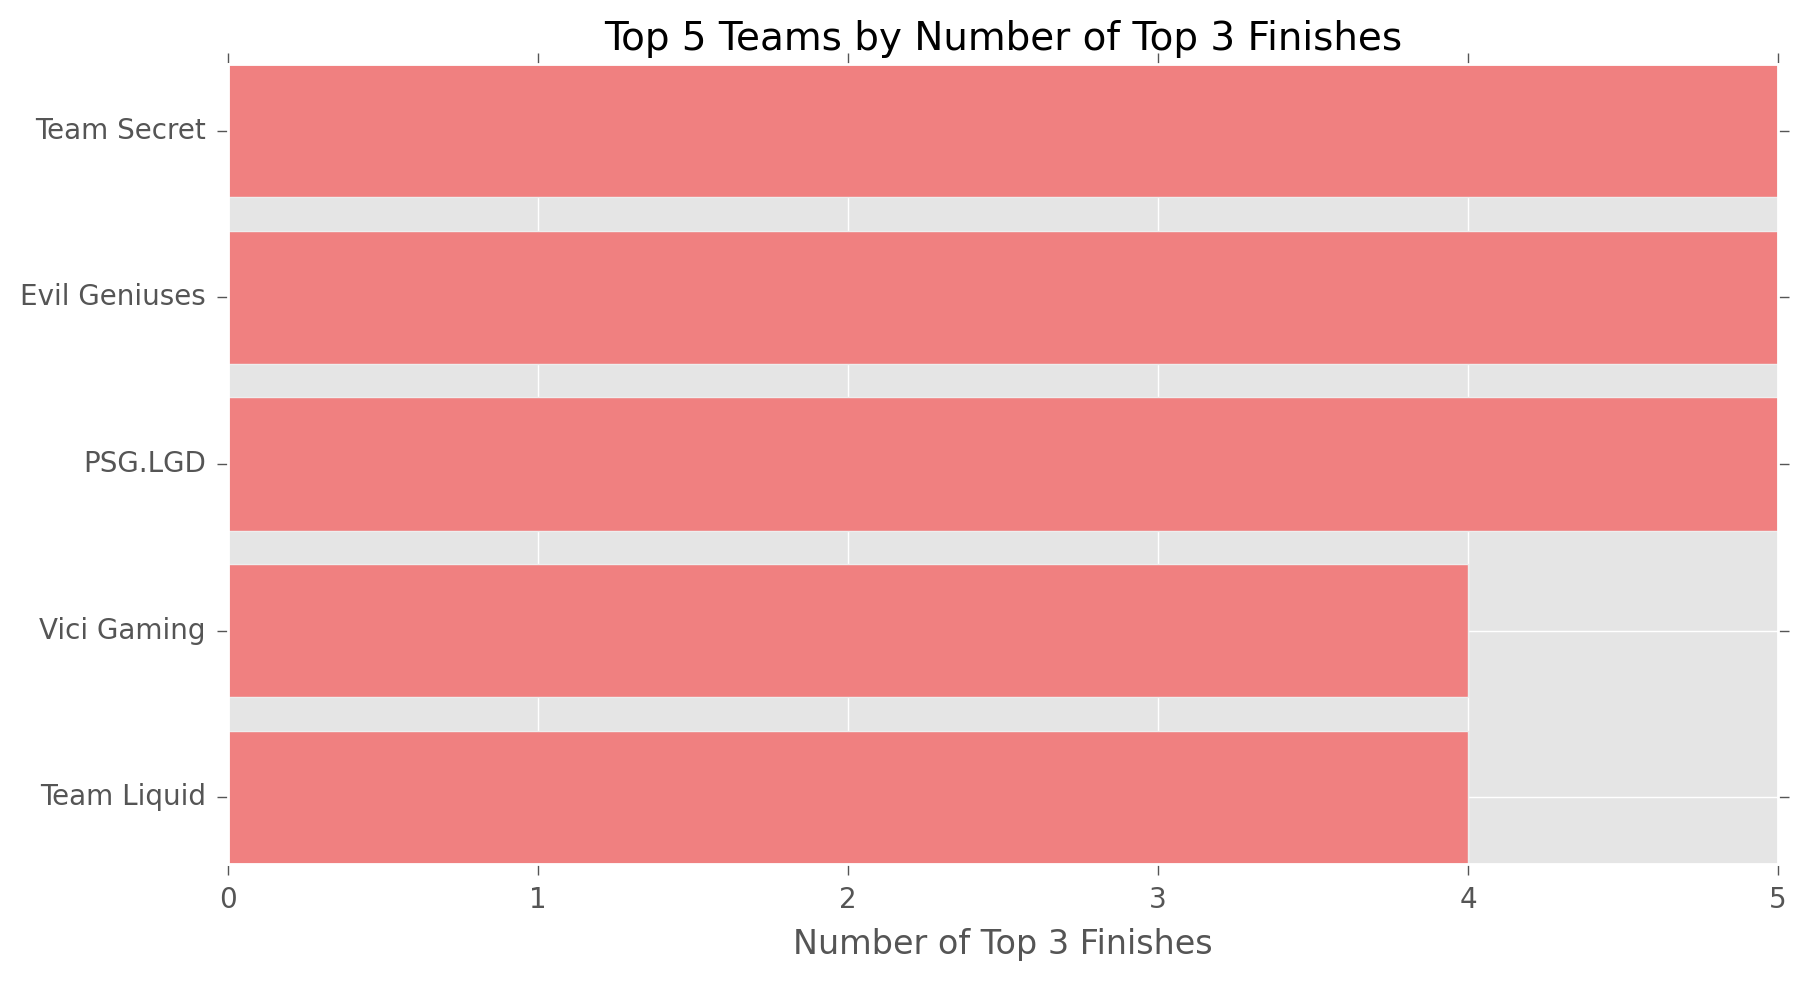

In [60]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('ggplot')

# Plot the results
plt.figure(figsize=(10,5))
bars = plt.barh(top_5_top_3.index, top_5_top_3.values, color='lightcoral')
plt.xlabel('Number of Top 3 Finishes', fontsize=12)
plt.title('Top 5 Teams by Number of Top 3 Finishes', fontsize=14)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [61]:
# Filter the data for 'Team Secret'
team_secret = prize[prize['Team'] == 'Team Secret']

# Count the number of times 'Team Secret' has finished in each place
place_counts = team_secret['Place'].value_counts()

# Calculate the number of tournaments 'Team Secret' did not participate in
non_participation = len(prize['Tournament'].unique()) - len(team_secret)

# Add non-participation to place_counts
place_counts = pd.concat([place_counts, pd.Series([non_participation], index=['Did not participate'])])

# Print the number of participations
print(f'Team Secret has participated in {len(team_secret)} tournaments.')

Team Secret has participated in 9 tournaments.


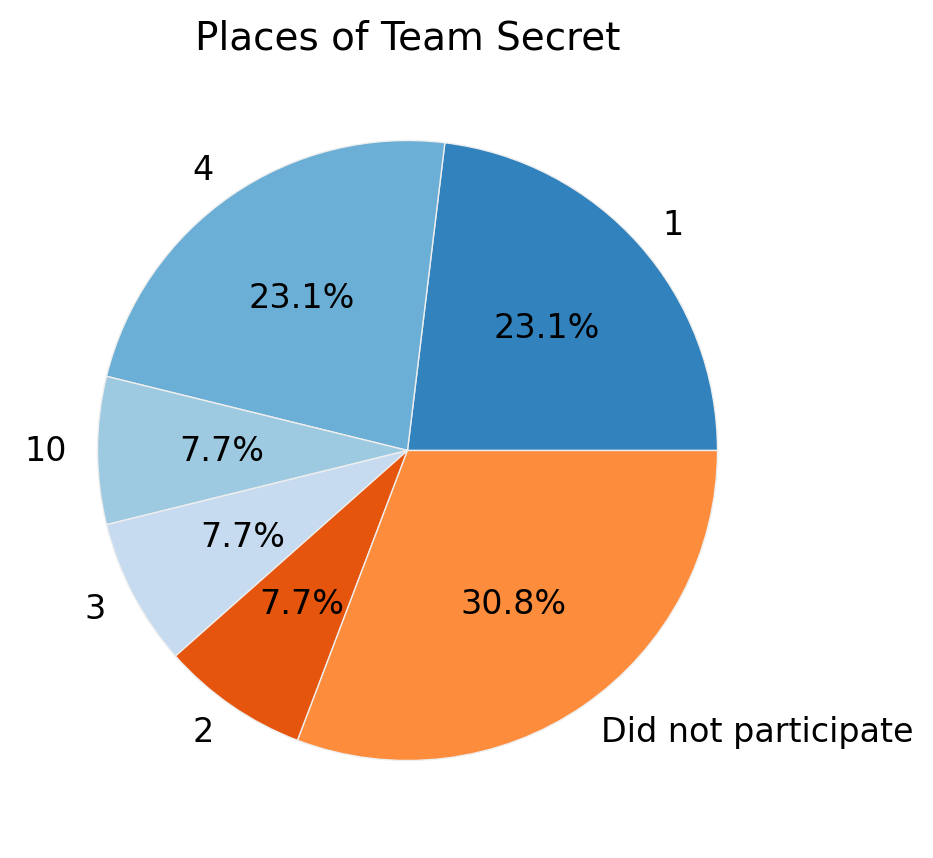

In [62]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('ggplot')

# Plot the results
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(place_counts, labels=place_counts.index, autopct='%1.1f%%', textprops={'fontsize': 10}, colors=plt.cm.tab20c.colors)
plt.title('Places of Team Secret', fontsize=14)

# Increase the font size of the labels and the percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.show()


In [63]:
# Filter the data for 'PSG.LGD'
psg_lgd = prize[prize['Team'] == 'PSG.LGD']

# Count the number of times 'PSG.LGD' has finished in each place
place_counts = psg_lgd['Place'].value_counts()

# Calculate the number of tournaments 'PSG.LGD' did not participate in
non_participation = len(prize['Tournament'].unique()) - len(psg_lgd)

# Add non-participation to place_counts
place_counts = pd.concat([place_counts, pd.Series([non_participation], index=['Did not participate'])])

# Print the number of participations
print(f'PSG.LGD has participated in {len(psg_lgd)} tournaments.')

PSG.LGD has participated in 10 tournaments.


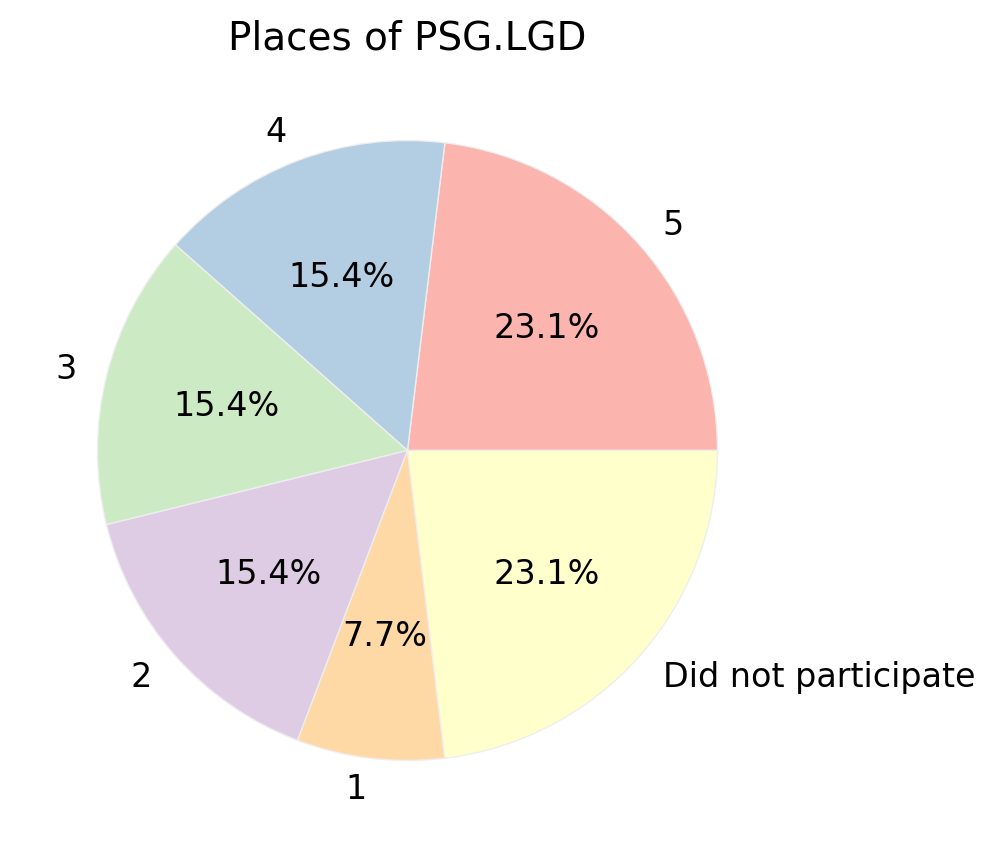

In [64]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('ggplot')

# Plot the results
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(place_counts, labels=place_counts.index, autopct='%1.1f%%', textprops={'fontsize': 10}, colors=plt.cm.Pastel1.colors)
plt.title('Places of PSG.LGD', fontsize=14)

# Increase the font size of the labels and the percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.show()


In [65]:
# Filter the data for 'Team Spirit'
team_spirit = prize[prize['Team'] == 'Team Spirit']

# Count the number of times 'Team Spirit' has finished in each place
place_counts = team_spirit['Place'].value_counts()

# Calculate the number of tournaments 'Team Spirit' did not participate in
non_participation = len(prize['Tournament'].unique()) - len(team_spirit)

# Add non-participation to place_counts
place_counts = pd.concat([place_counts, pd.Series([non_participation], index=['Did not participate'])])

# Print the number of participations
print(f'Team Spirit has participated in {len(team_spirit)} tournaments.')

Team Spirit has participated in 5 tournaments.


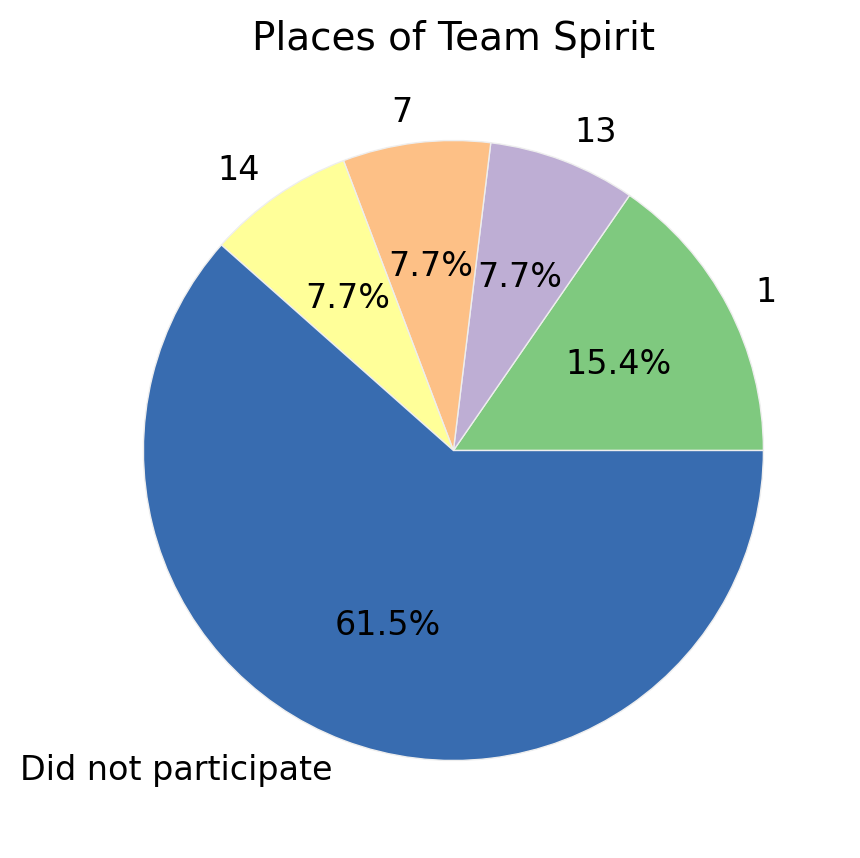

In [66]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('ggplot')

# Plot the results
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(place_counts, labels=place_counts.index, autopct='%1.1f%%', textprops={'fontsize': 10}, colors=plt.cm.Accent.colors)
plt.title('Places of Team Spirit', fontsize=14)

# Increase the font size of the labels and the percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.show()


In [67]:
# Filter the data for 'OG'
og = prize[prize['Team'] == 'OG']

# Count the number of times 'OG' has finished in each place
place_counts = og['Place'].value_counts()

# Calculate the number of tournaments 'OG' did not participate in
non_participation = len(prize['Tournament'].unique()) - len(og)

# Add non-participation to place_counts
place_counts = pd.concat([place_counts, pd.Series([non_participation], index=['Did not participate'])])

# Print the number of participations
print(f'OG has participated in {len(og)} tournaments.')

OG has participated in 7 tournaments.


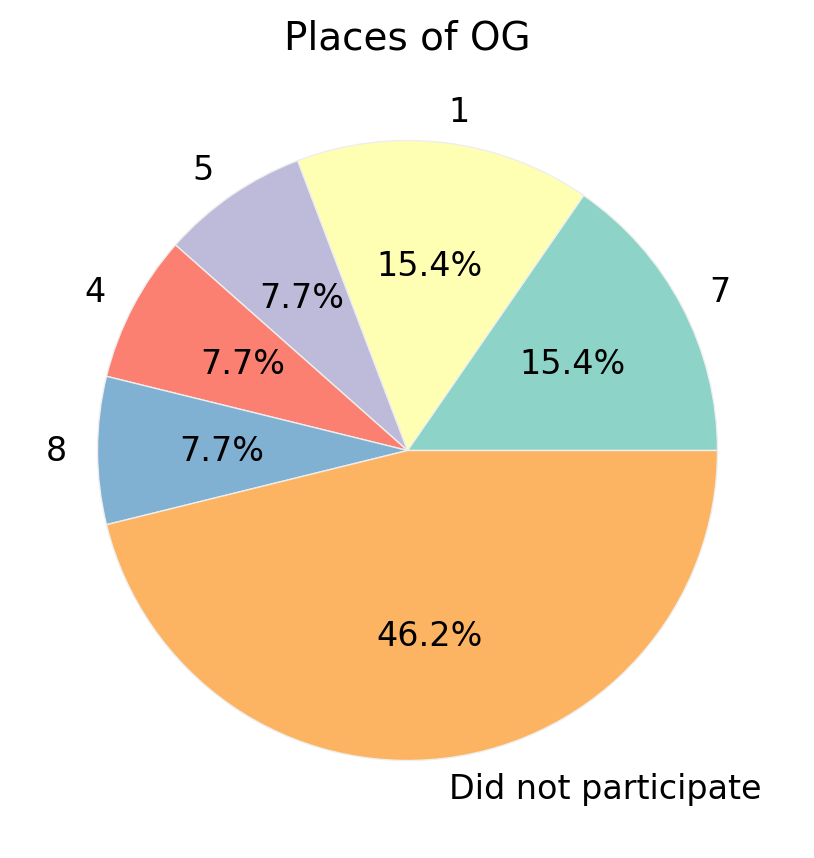

In [68]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('ggplot')

# Plot the results
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(place_counts, labels=place_counts.index, autopct='%1.1f%%', textprops={'fontsize': 10}, colors=plt.cm.Set3.colors)
plt.title('Places of OG', fontsize=14)

# Increase the font size of the labels and the percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.show()


# Matches Section

In [69]:
#Read the Dataset
matches=pd.read_excel('Matches.xlsx')

In [70]:
#show first 5 rows
matches.head()

ID MATCH_ID                TOURNAMENT  MAP        TEAM     SIDE  \
0  001-1-D    001-1  The Chongqing Major 2019    1  Virtus.pro     dire   
1  001-1-R    001-1  The Chongqing Major 2019    1       EHOME  radiant   
2  001-2-R    001-2  The Chongqing Major 2019    2  Virtus.pro  radiant   
3  001-2-D    001-2  The Chongqing Major 2019    2       EHOME     dire   
4  001-3-R    001-3  The Chongqing Major 2019    3  Virtus.pro  radiant   

   SCORE  WIN  DURATION  
0      7    0      1670  
1     25    1      1670  
2     20    1      1383  
3      9    0      1383  
4     37    1      2979

In [71]:
# Group by 'MATCH_ID' and create the 'Match' column
matches['Match'] = matches.groupby('MATCH_ID')['TEAM'].transform(lambda x: ' vs '.join(x.unique()))

# Create the 'Score' column
matches['Score'] = matches.groupby('MATCH_ID')['SCORE'].transform(lambda x: '-'.join(map(str, x)))

# Create the 'Win' column
matches['Win'] = matches.groupby('MATCH_ID')['WIN'].transform(lambda x: x.iloc[0])

# Drop duplicates
matches = matches.drop_duplicates(subset=['MATCH_ID'])

In [72]:
#print dataset information
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1766 entries, 0 to 3530
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1766 non-null   object
 1   MATCH_ID    1766 non-null   object
 2   TOURNAMENT  1766 non-null   object
 3   MAP         1766 non-null   int64 
 4   TEAM        1766 non-null   object
 5   SIDE        1766 non-null   object
 6   SCORE       1766 non-null   int64 
 7   WIN         1766 non-null   int64 
 8   DURATION    1766 non-null   int64 
 9   Match       1766 non-null   object
 10  Score       1766 non-null   object
 11  Win         1766 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 179.4+ KB


In [73]:
#print numerical columns descriptions
matches.describe()

MAP        SCORE          WIN     DURATION          Win
count  1766.000000  1766.000000  1766.000000  1766.000000  1766.000000
mean      1.650057    24.824462     0.528879  2310.356738     0.528879
std       0.695487    10.962041     0.499307   630.974659     0.499307
min       1.000000     1.000000     0.000000   754.000000     0.000000
25%       1.000000    16.000000     0.000000  1896.500000     0.000000
50%       2.000000    25.000000     1.000000  2226.000000     1.000000
75%       2.000000    32.000000     1.000000  2647.000000     1.000000
max       5.000000    68.000000     1.000000  6422.000000     1.000000

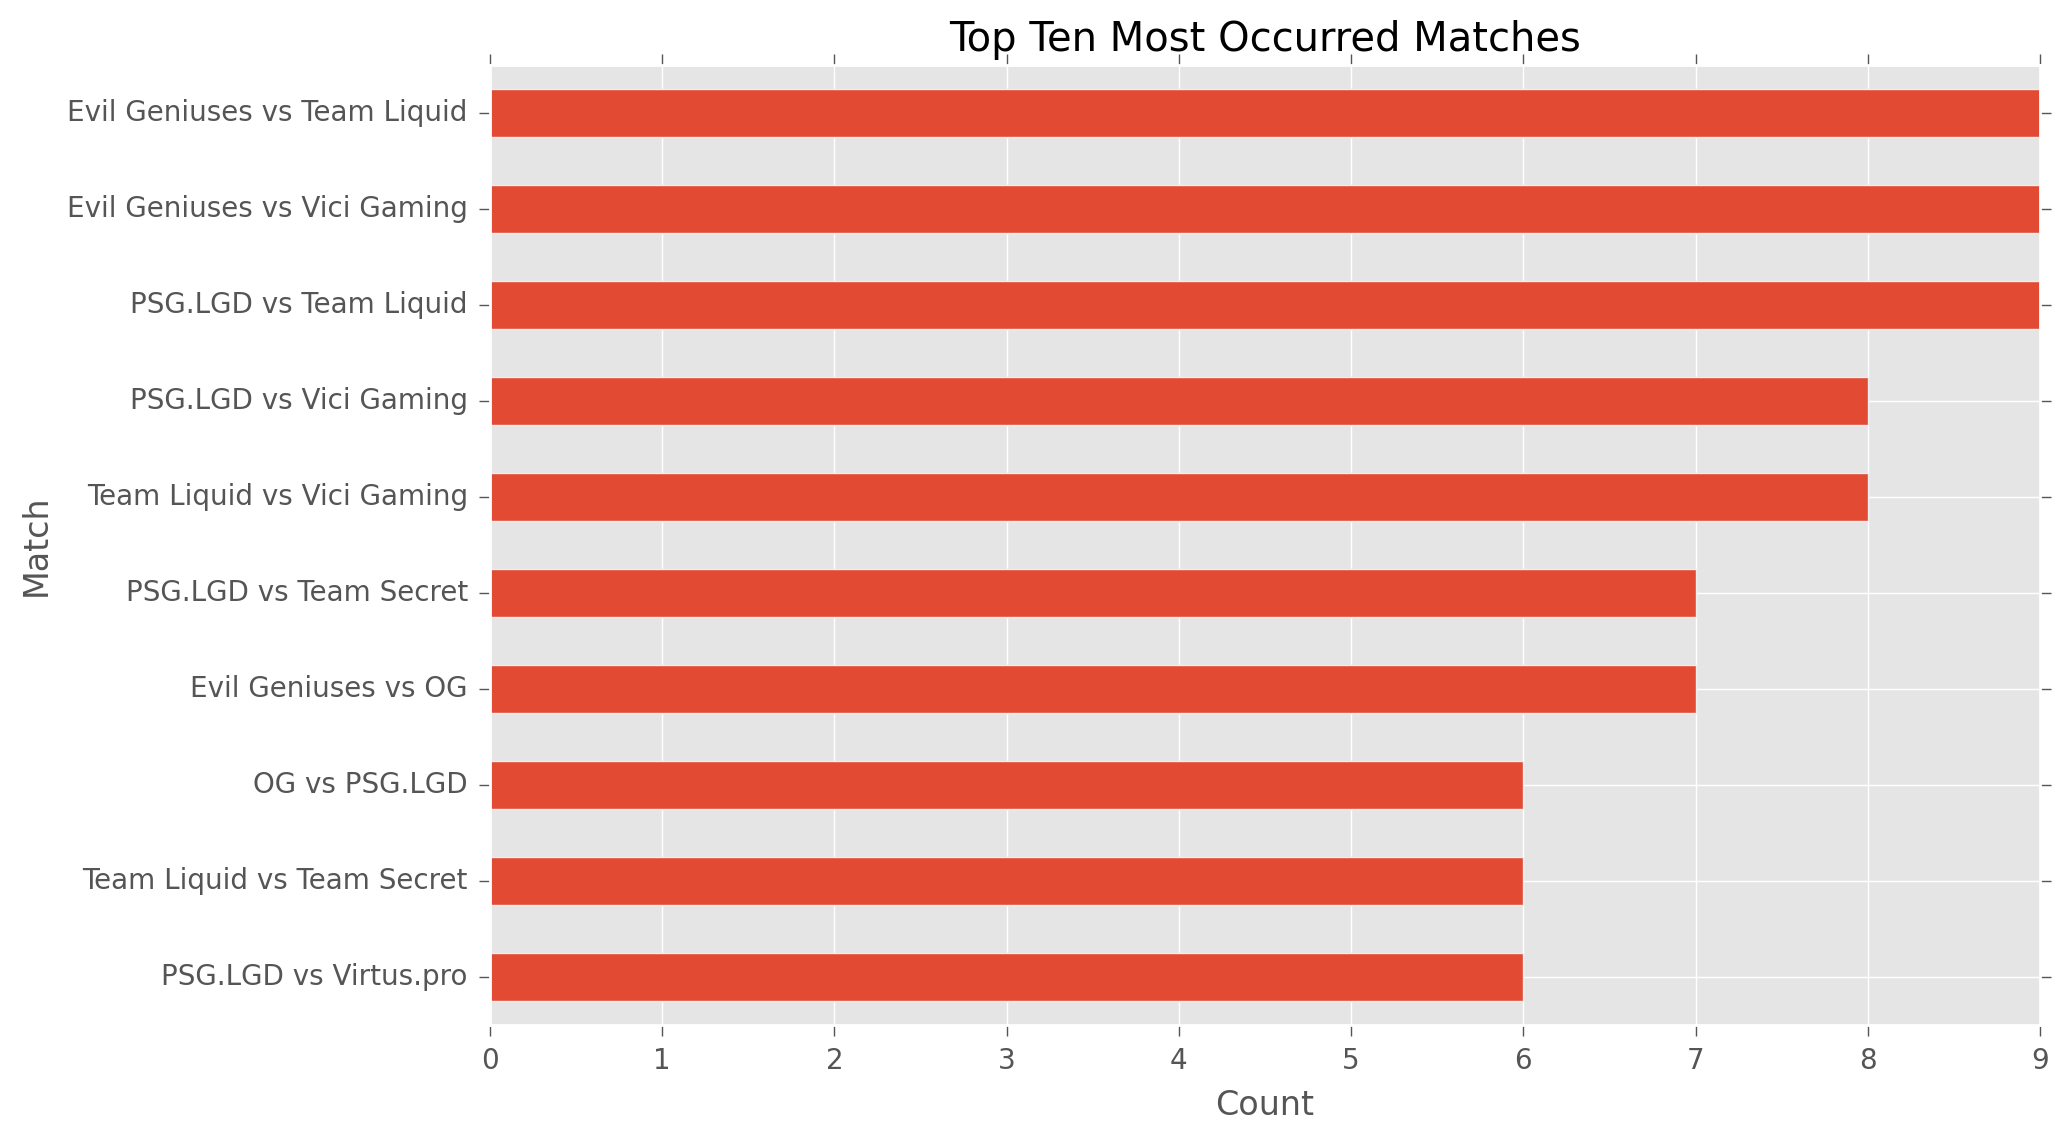

In [74]:
# Create a 'Teams' column with sorted team names to ensure 'Virtus.pro vs EHOME' equals 'EHOME vs Virtus.pro'
matches['Teams'] = matches['Match'].apply(lambda x: ' vs '.join(sorted(x.split(' vs '))))

# Filter the DataFrame to include only rows where 'MAP' is 1
matches_map1 = matches[matches['MAP'] == 1]

# Count the occurrence of each match
match_counts = matches_map1['Teams'].value_counts()

# Take only the top ten most occurred matches
top_ten_matches = match_counts[:10]

# Plot the top ten most occurred matches as a horizontal bar plot
plt.figure(figsize=(10,6))
top_ten_matches.sort_values().plot(kind='barh')  # Sort values in ascending order before plotting
plt.title('Top Ten Most Occurred Matches')
plt.xlabel('Count')
plt.ylabel('Match')
plt.show()

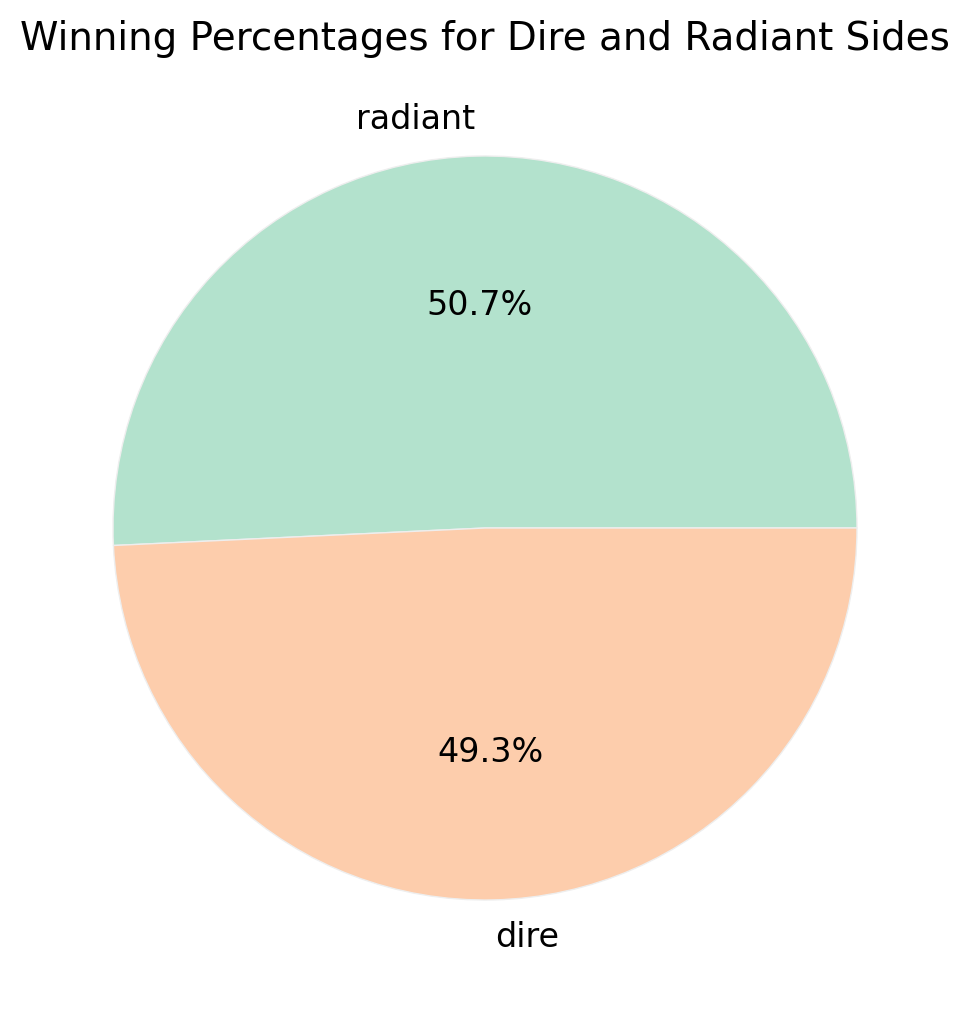

In [75]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('ggplot')

# Calculate the win counts for 'dire' and 'radiant' sides
win_counts = matches['SIDE'].where(matches['WIN']==1).value_counts()

# Calculate the win percentages
win_percentages = win_counts / win_counts.sum() * 100

# Plot the win percentages as a pie plot
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(win_percentages, labels=win_percentages.index, autopct='%1.1f%%', textprops={'fontsize': 10}, colors=plt.cm.Pastel2.colors)
plt.title('Winning Percentages for Dire and Radiant Sides', fontsize=14)
plt.ylabel('')  # Hide the y-axis label

# Increase the font size of the labels and the percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.show()


PSG.LGD vs Team Liquid          9
Evil Geniuses vs Vici Gaming    9
Evil Geniuses vs Team Liquid    9
Team Liquid vs Vici Gaming      8
PSG.LGD vs Vici Gaming          8
Evil Geniuses vs OG             7
PSG.LGD vs Team Secret          7
PSG.LGD vs Virtus.pro           6
Team Liquid vs Team Secret      6
OG vs PSG.LGD                   6
Name: Teams, dtype: int64


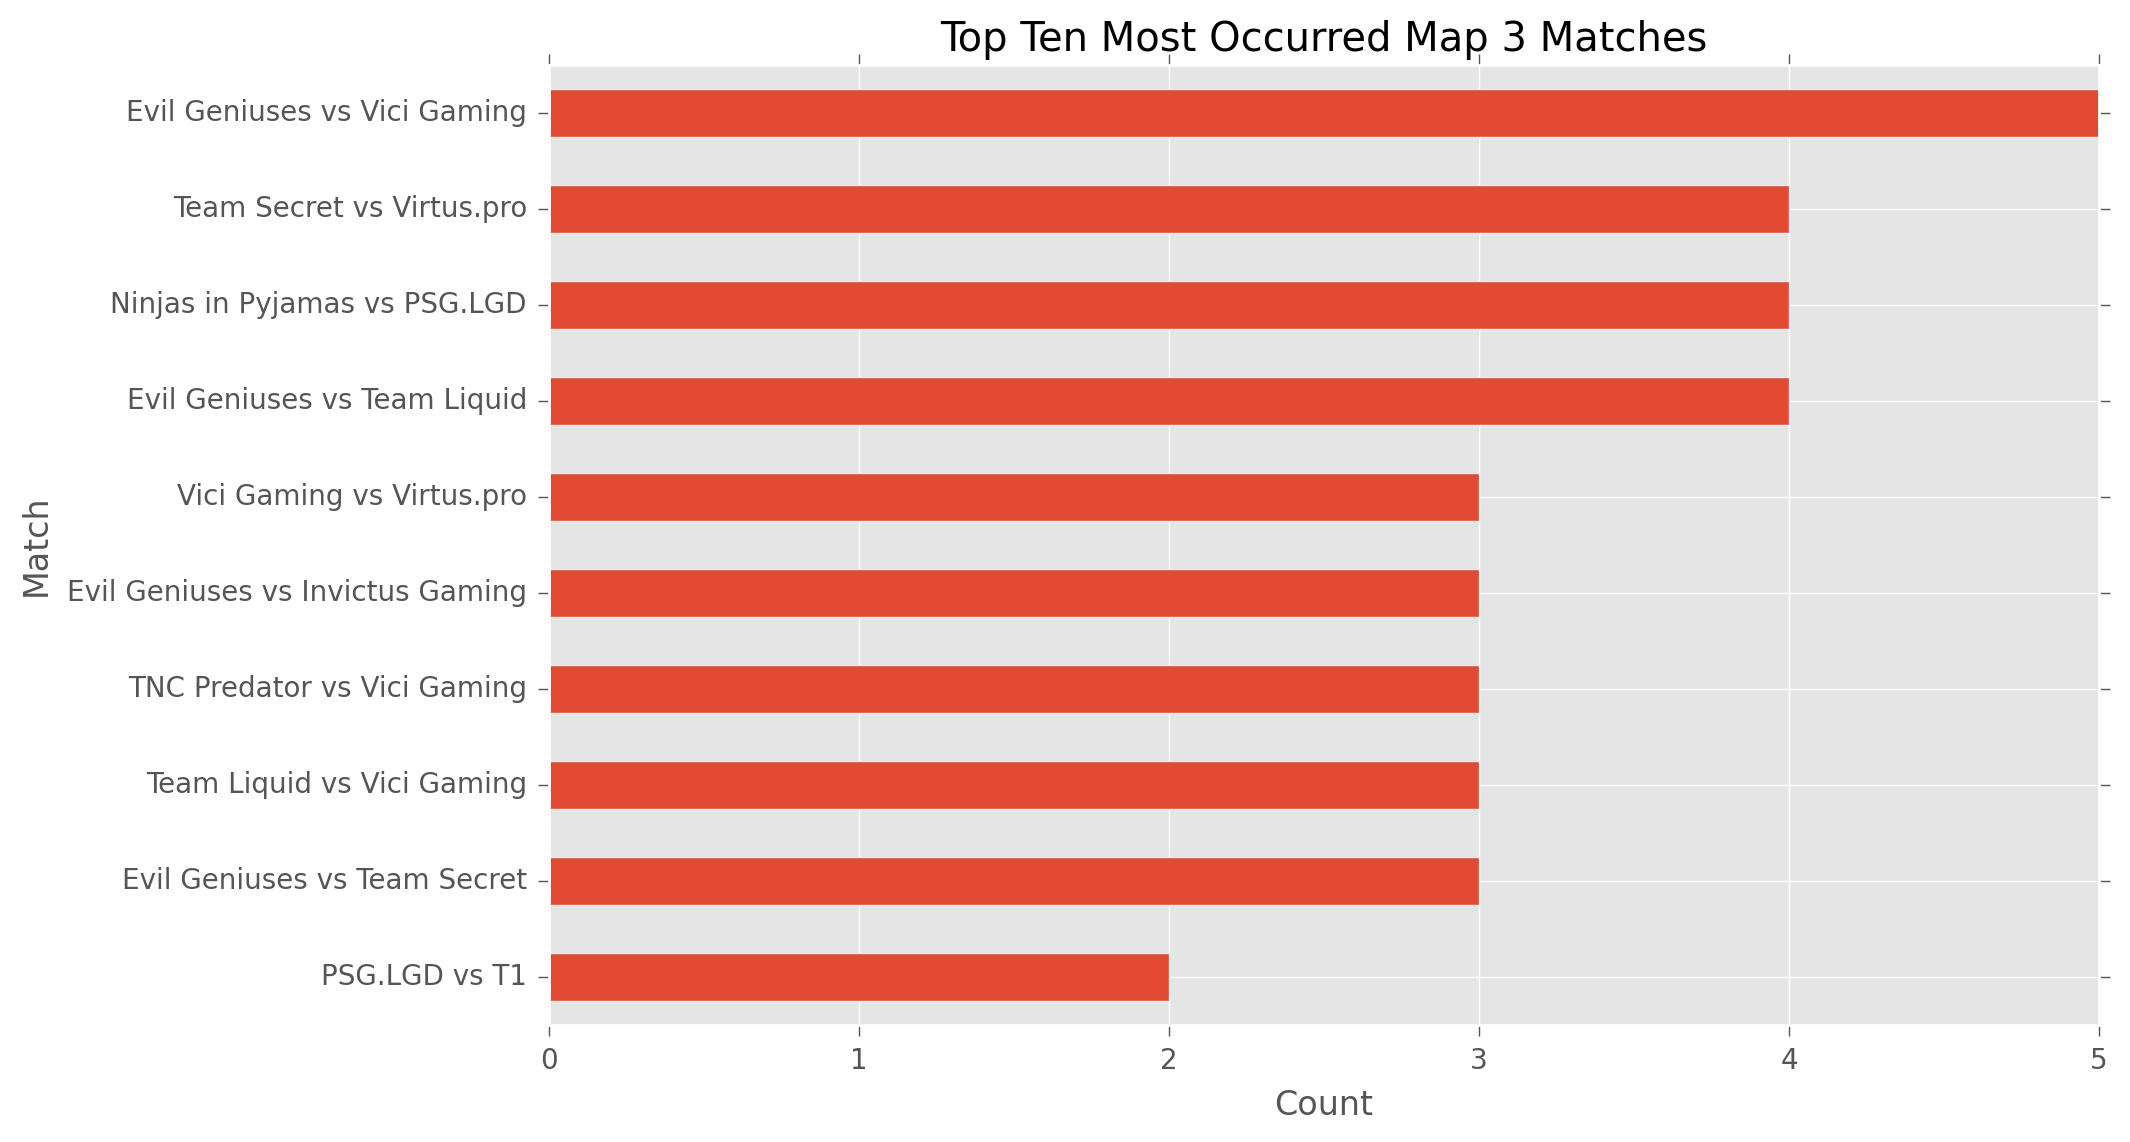

In [76]:
# Filter the DataFrame to include only rows where 'MAP' is 3
matches_map3 = matches[matches['MAP'] == 3]

# Count the occurrence of each match
match_counts = matches_map3['Teams'].value_counts()

# Take only the top ten most occurred matches
top_ten_matches3 = match_counts[:10]

# Print the top ten most occurred matches
print(top_ten_matches)
# Plot the top ten most occurred matches as a horizontal bar plot
plt.figure(figsize=(10,6))
top_ten_matches3.sort_values().plot(kind='barh')  # Sort values in ascending order before plotting
plt.title('Top Ten Most Occurred Map 3 Matches')
plt.xlabel('Count')
plt.ylabel('Match')
plt.show()

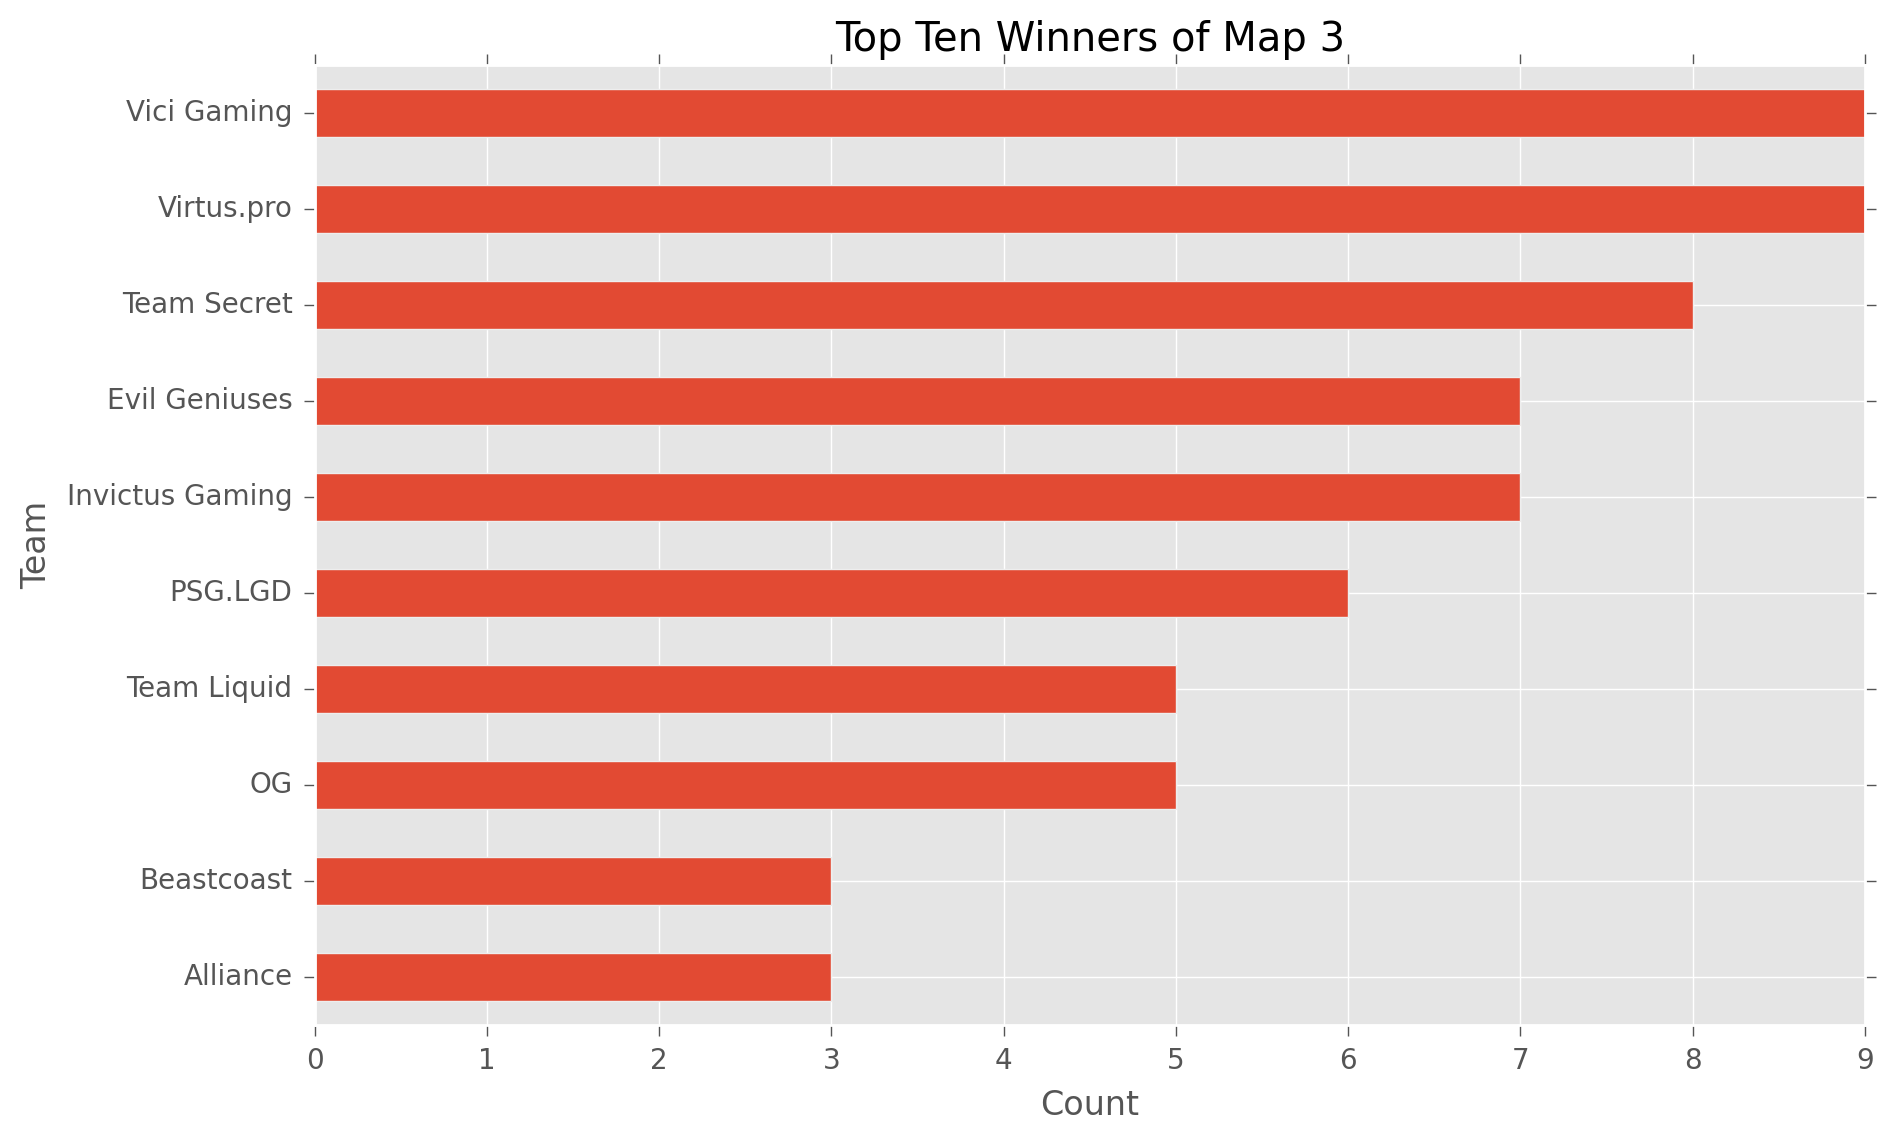

In [77]:
# Filter the DataFrame to include only rows where 'MAP' is 3 and 'WIN' is 1
winners_map3 = matches[(matches['MAP'] == 3) & (matches['WIN'] == 1)]

# Count the occurrence of each winner
winner_counts = winners_map3['TEAM'].value_counts()

# Take only the top ten most occurred winners
top_ten_winners = winner_counts[:10]

# Plot the top ten most occurred winners as a horizontal bar plot
plt.figure(figsize=(10,6))
top_ten_winners.sort_values().plot(kind='barh')  # Sort values in ascending order before plotting
plt.title('Top Ten Winners of Map 3')
plt.xlabel('Count')
plt.ylabel('Team')
plt.show()

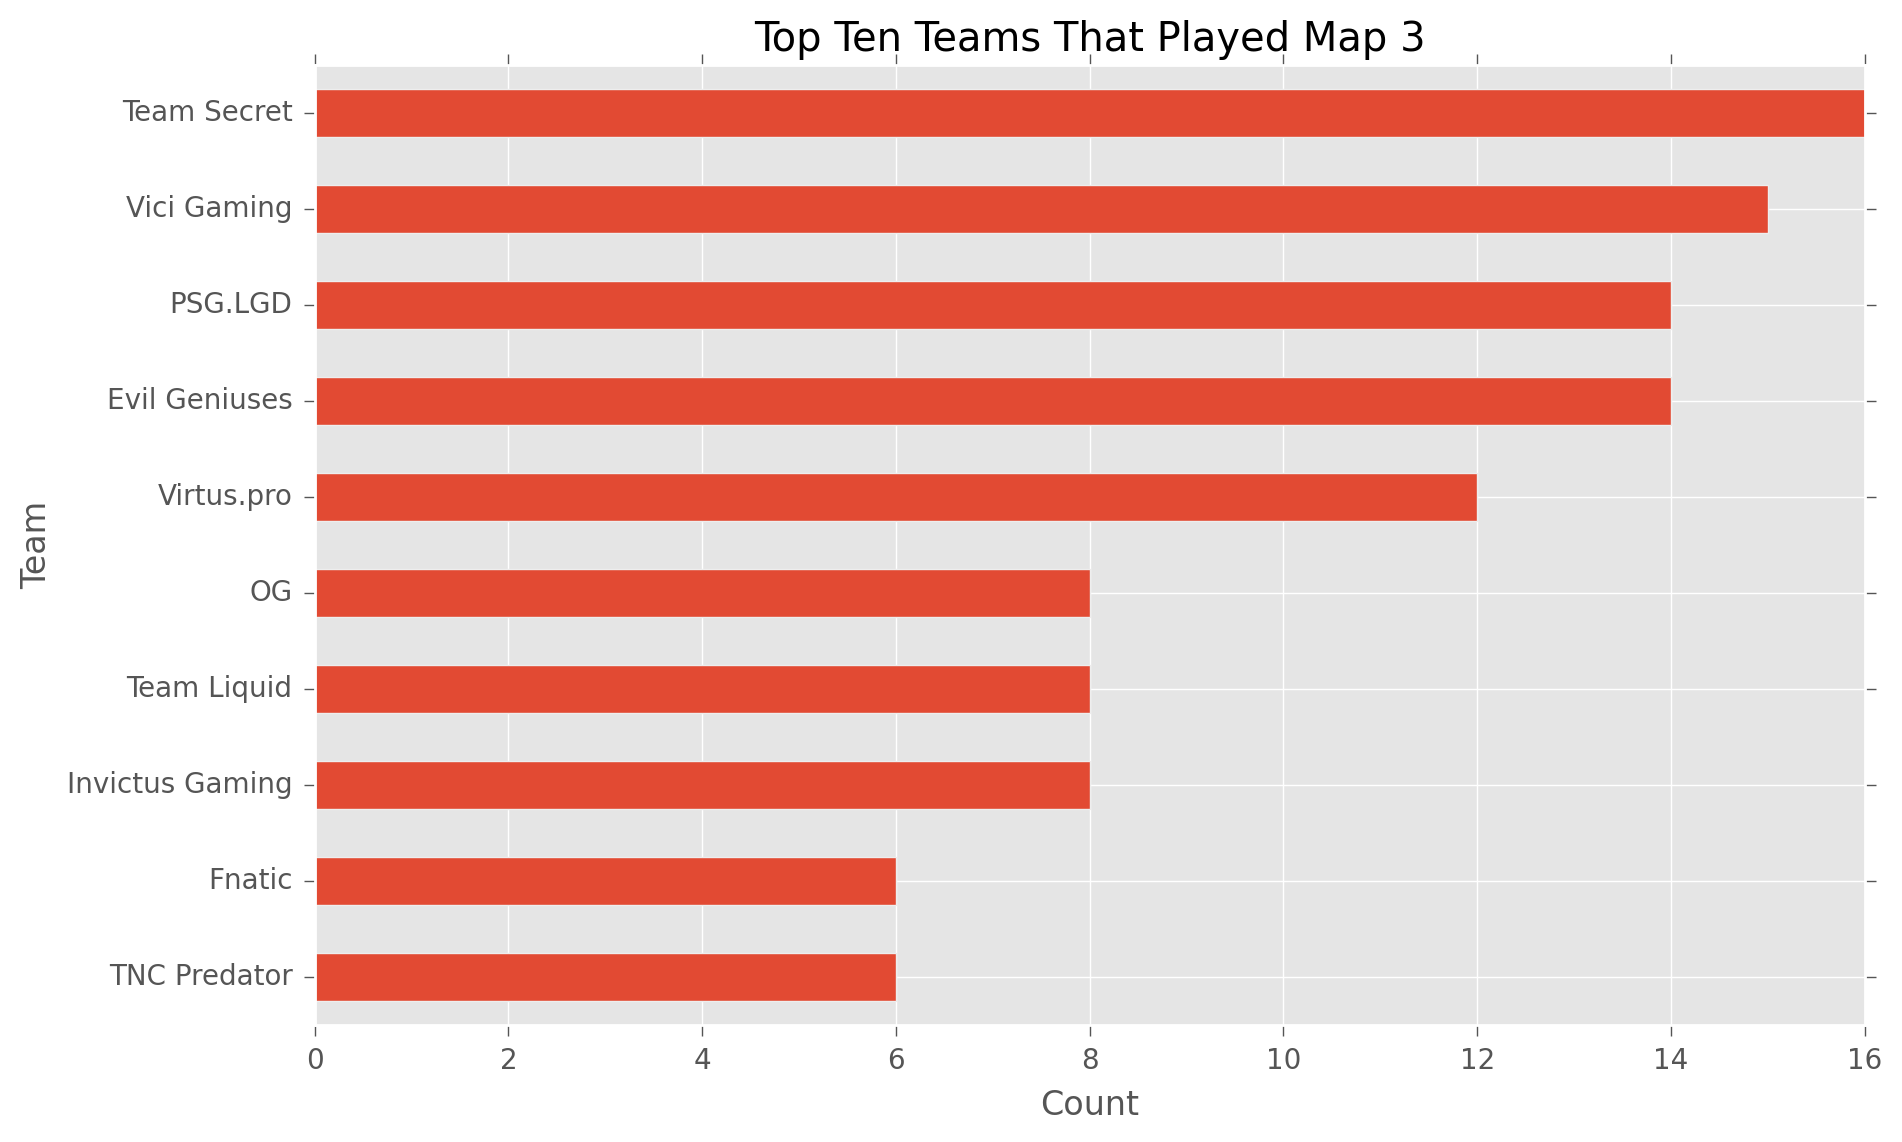

In [78]:
# Filter the DataFrame to include only rows where 'MAP' is 3
matches_map3 = matches[matches['MAP'] == 3]

# Count the occurrence of each team
team_counts = matches_map3['TEAM'].value_counts()

# Take only the top ten most occurred teams
top_ten_teams = team_counts[:10]

# Plot the top ten most occurred teams as a horizontal bar plot
plt.figure(figsize=(10,6))
top_ten_teams.sort_values().plot(kind='barh')  # Sort values in ascending order before plotting
plt.title('Top Ten Teams That Played Map 3')
plt.xlabel('Count')
plt.ylabel('Team')
plt.show()

In [79]:
#make duration values in minutes
matches['DURATION']=matches['DURATION']/60

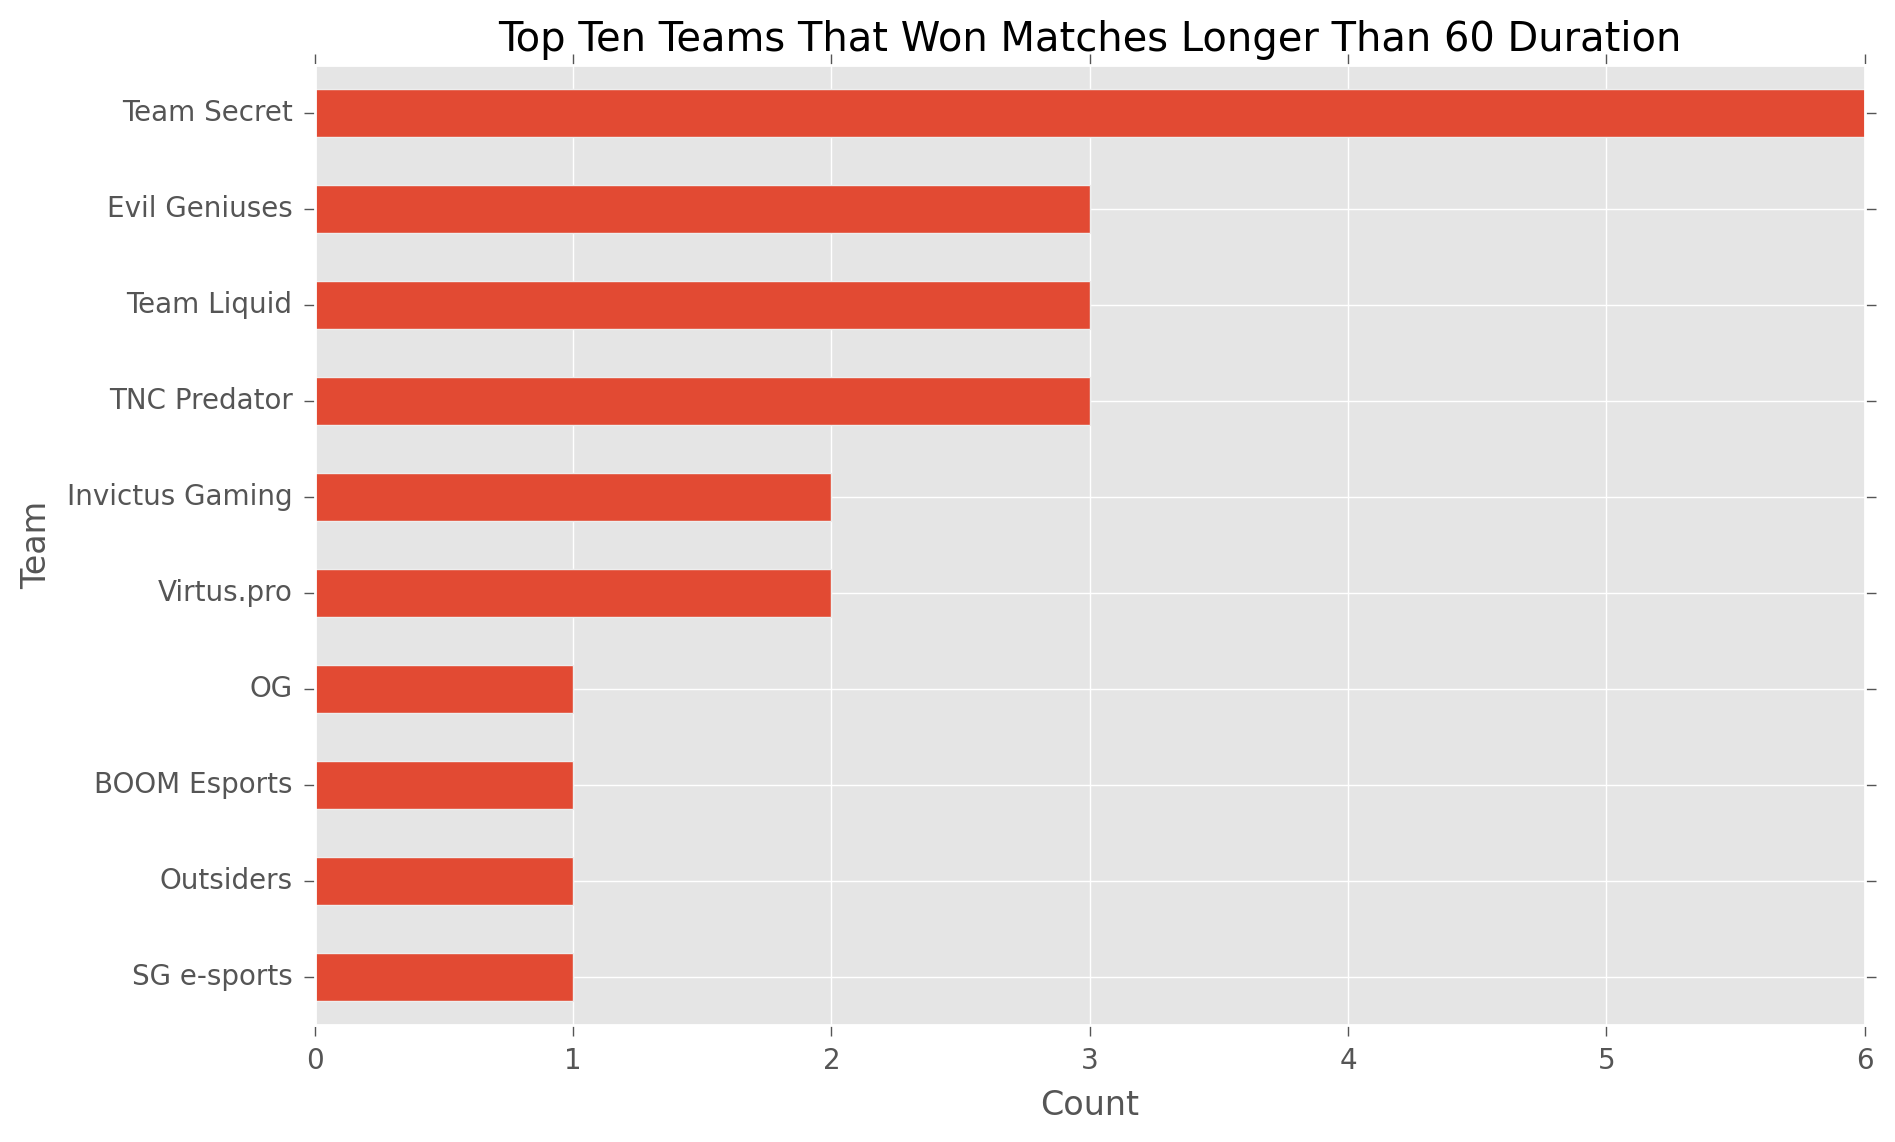

In [80]:
# Filter the DataFrame to include only rows where 'DURATION' is greater than 60 and 'WIN' is 1
long_matches = matches[(matches['DURATION'] > 60) & (matches['WIN'] == 1)]

# Count the occurrence of each winner
winner_counts = long_matches['TEAM'].value_counts()

# Take only the top ten most occurred winners
top_ten_winners = winner_counts[:10]

# Plot the top ten most occurred winners as a horizontal bar plot
plt.figure(figsize=(10,6))
top_ten_winners.sort_values().plot(kind='barh')  # Sort values in ascending order before plotting
plt.title('Top Ten Teams That Won Matches Longer Than 60 Duration')
plt.xlabel('Count')
plt.ylabel('Team')
plt.show()

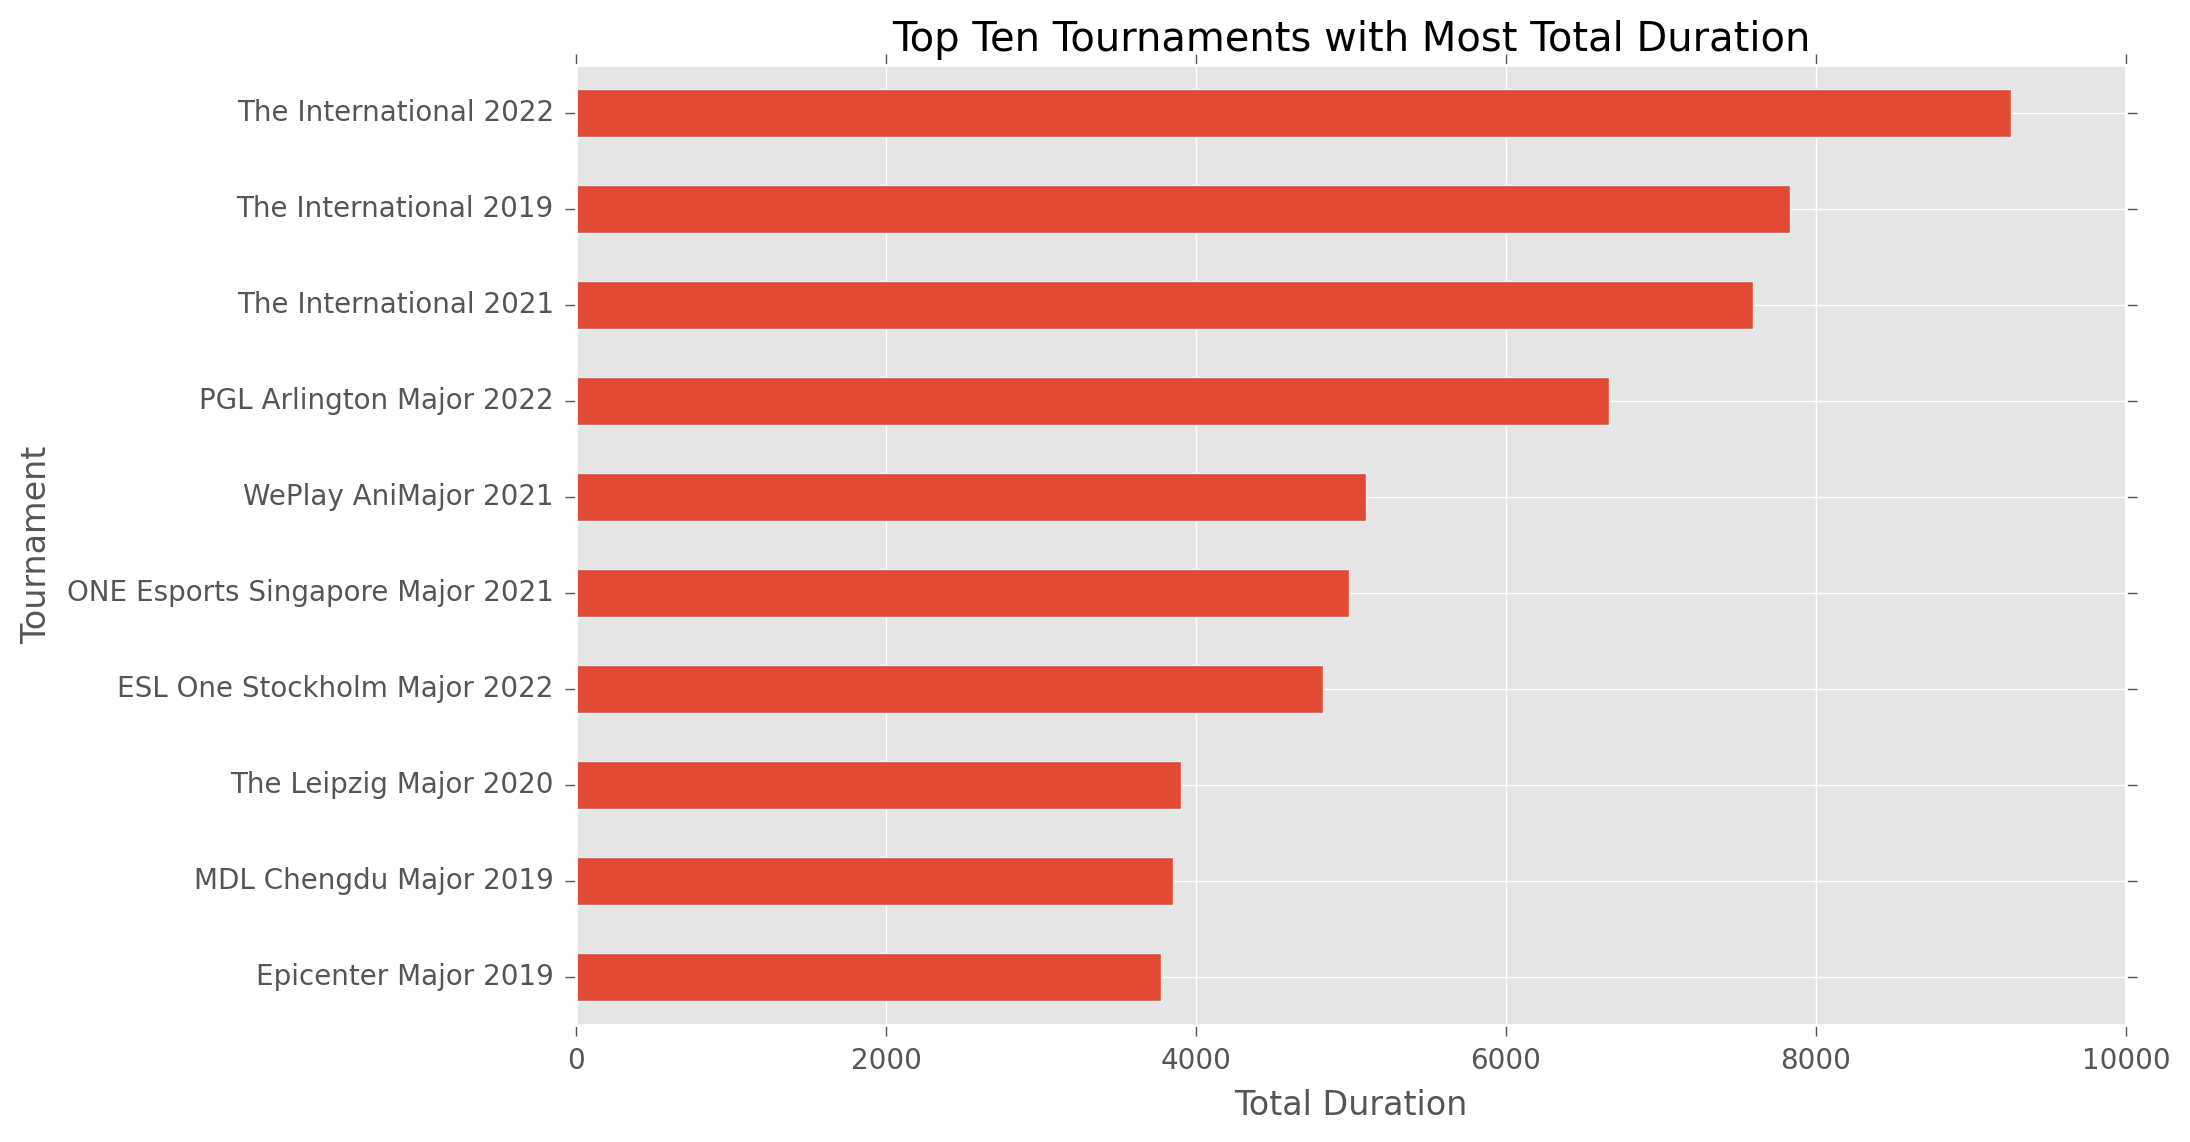

In [81]:
# Calculate the total duration for each tournament
tournament_durations = matches.groupby('TOURNAMENT')['DURATION'].sum()

# Take only the top ten tournaments with the most total duration
top_ten_tournaments = tournament_durations.nlargest(10)

# Plot the top ten tournaments as a horizontal bar plot
plt.figure(figsize=(10,6))
top_ten_tournaments.sort_values().plot(kind='barh')  # Sort values in ascending order before plotting
plt.title('Top Ten Tournaments with Most Total Duration')
plt.xlabel('Total Duration')
plt.ylabel('Tournament')
plt.show()

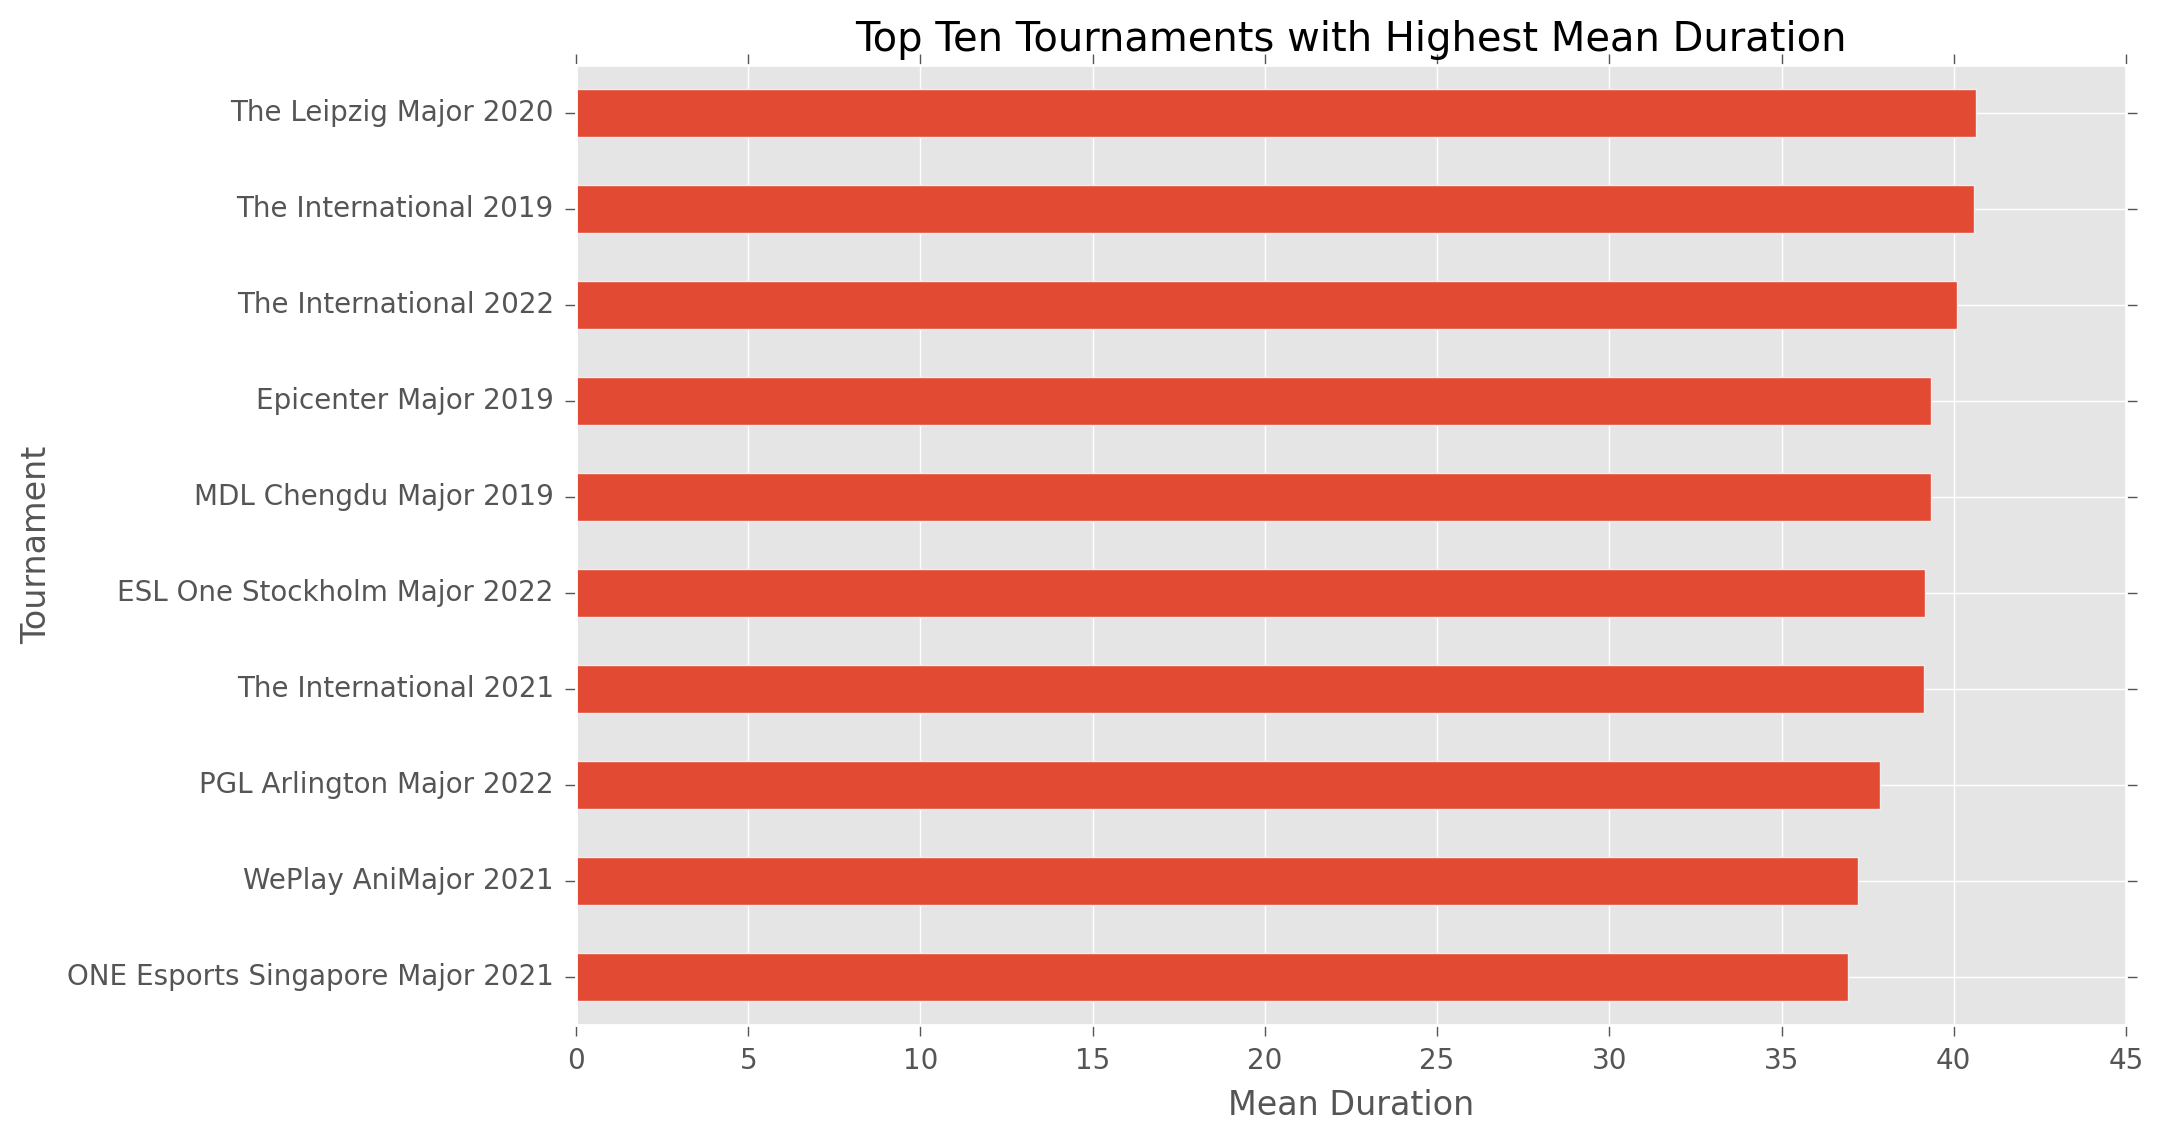

In [82]:
# Calculate the mean duration for each tournament
tournament_durations = matches.groupby('TOURNAMENT')['DURATION'].mean()

# Take only the top ten tournaments with the highest mean duration
top_ten_tournaments = tournament_durations.nlargest(10)

# Plot the top ten tournaments as a horizontal bar plot
plt.figure(figsize=(10,6))
top_ten_tournaments.sort_values().plot(kind='barh')  # Sort values in ascending order before plotting
plt.title('Top Ten Tournaments with Highest Mean Duration')
plt.xlabel('Mean Duration')
plt.ylabel('Tournament')
plt.show()

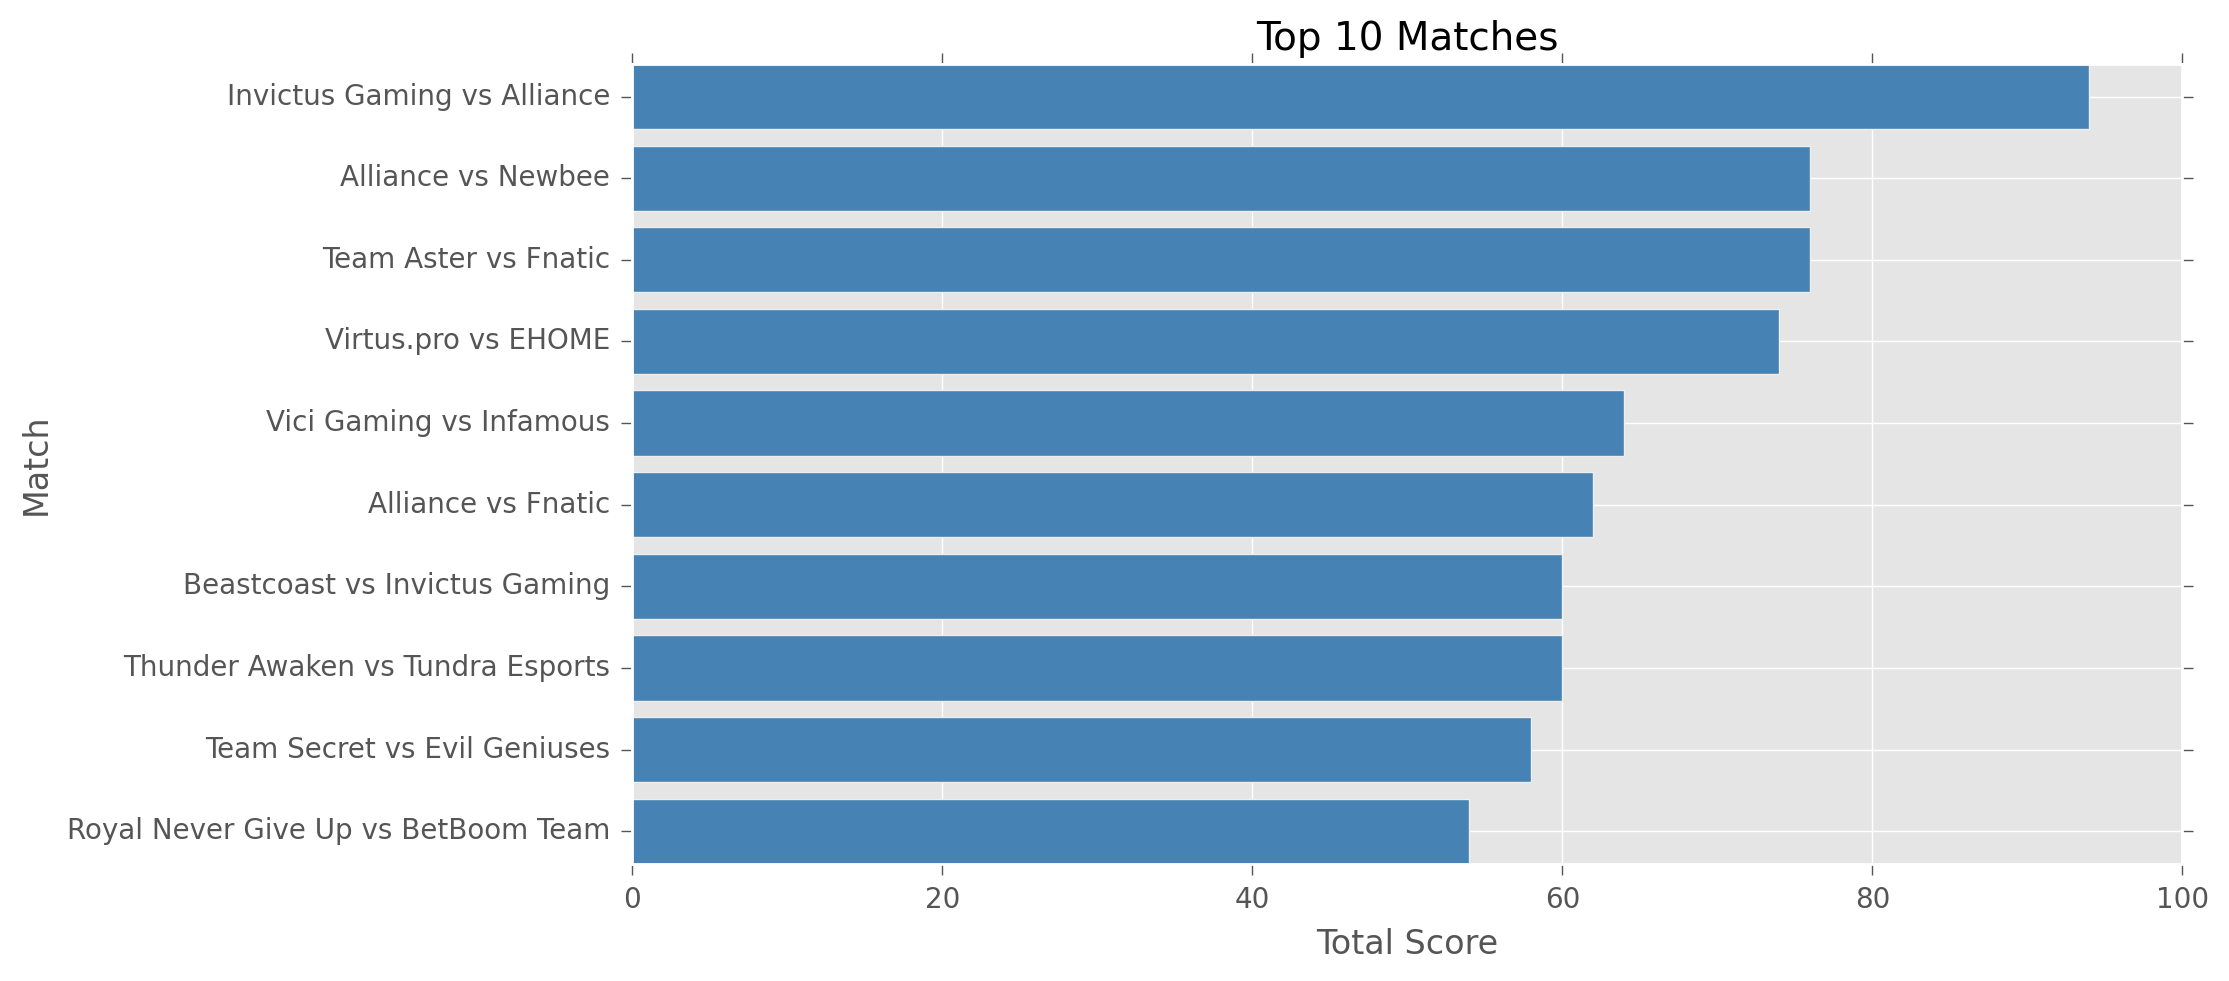

In [83]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('ggplot')

# Split the 'Score' column into two columns 'Team1_Score' and 'Team2_Score'
matches[['Team1_Score', 'Team2_Score']] = matches['Score'].str.split('-', expand=True).astype(int)

# Calculate the absolute difference and sum of the scores
matches['Score_Difference'] = abs(matches['Team1_Score'] - matches['Team2_Score'])
matches['Score_Sum'] = matches['Team1_Score'] + matches['Team2_Score']

# Filter matches where the duration is more than 45
matches = matches[matches['DURATION'] > 45]

# Sort the dataframe first by 'Score_Difference' and then by 'Score_Sum'
matches = matches.sort_values(by=['Score_Difference', 'Score_Sum'], ascending=[True, False])

# Get the top 10 matches
top_10_matches = matches.head(10)

# Plot the top 10 matches
plt.figure(figsize=(10, 5))
plt.barh(top_10_matches['Match'], top_10_matches['Score_Sum'], color='steelblue')
plt.xlabel('Total Score', fontsize=12)
plt.ylabel('Match', fontsize=12)
plt.title('Top 10 Matches', fontsize=14)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


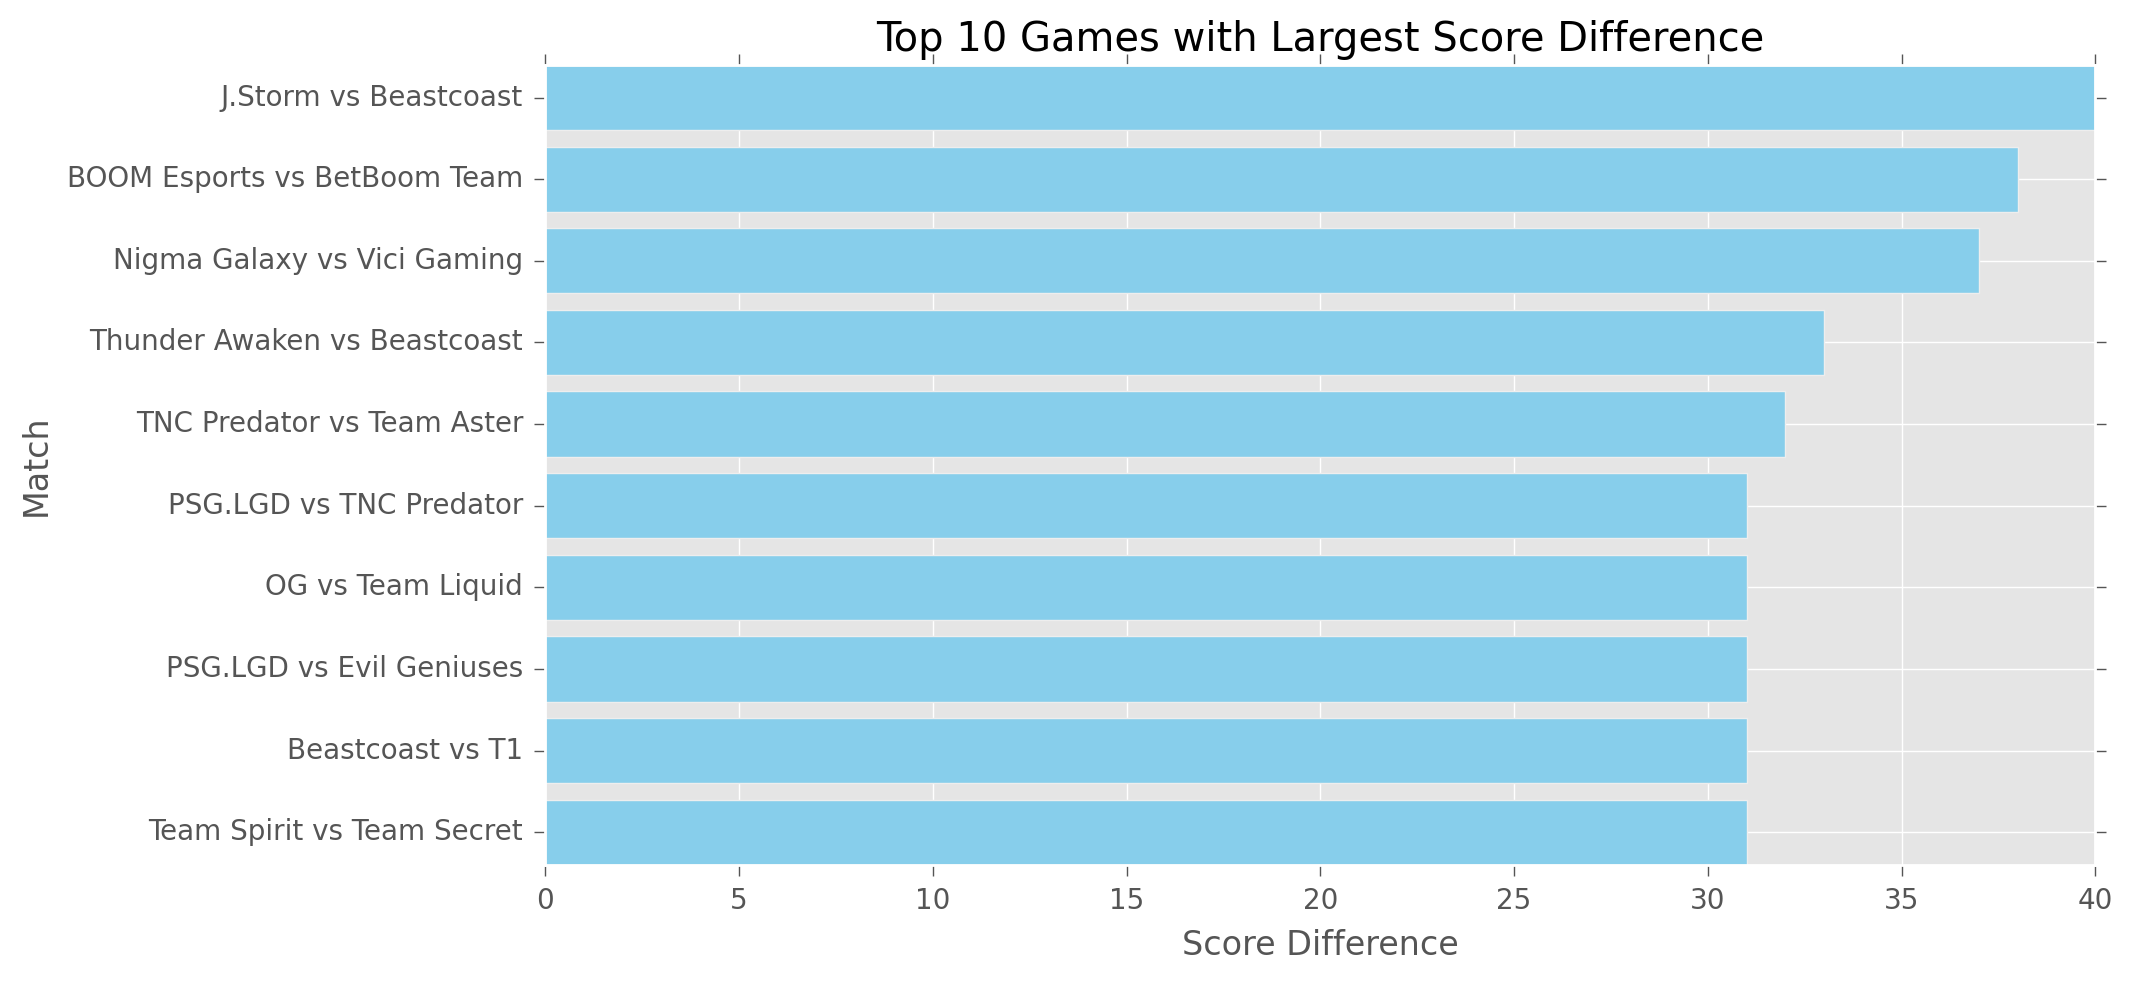

In [84]:
# Let's name the DataFrame 'games'
games = matches.copy()

# Split the 'Score' column into two columns 'Team1_Score' and 'Team2_Score'
games[['Team1_Score', 'Team2_Score']] = games['Score'].str.split('-', expand=True).astype(int)

# Calculate the absolute difference and sum of the scores
games['Score_Difference'] = abs(games['Team1_Score'] - games['Team2_Score'])
games['Score_Sum'] = games['Team1_Score'] + games['Team2_Score']

# Sort the dataframe by 'Score_Difference' in descending order
games = games.sort_values(by='Score_Difference', ascending=False)

# Get the top 10 matches
top_10_games = games.head(10)

# Plot the top 10 matches
plt.figure(figsize=(10, 5))
plt.barh(top_10_games['Match'], top_10_games['Score_Difference'], color='skyblue')
plt.xlabel('Score Difference')
plt.ylabel('Match')
plt.title('Top 10 Games with Largest Score Difference')
plt.gca().invert_yaxis()
plt.show()

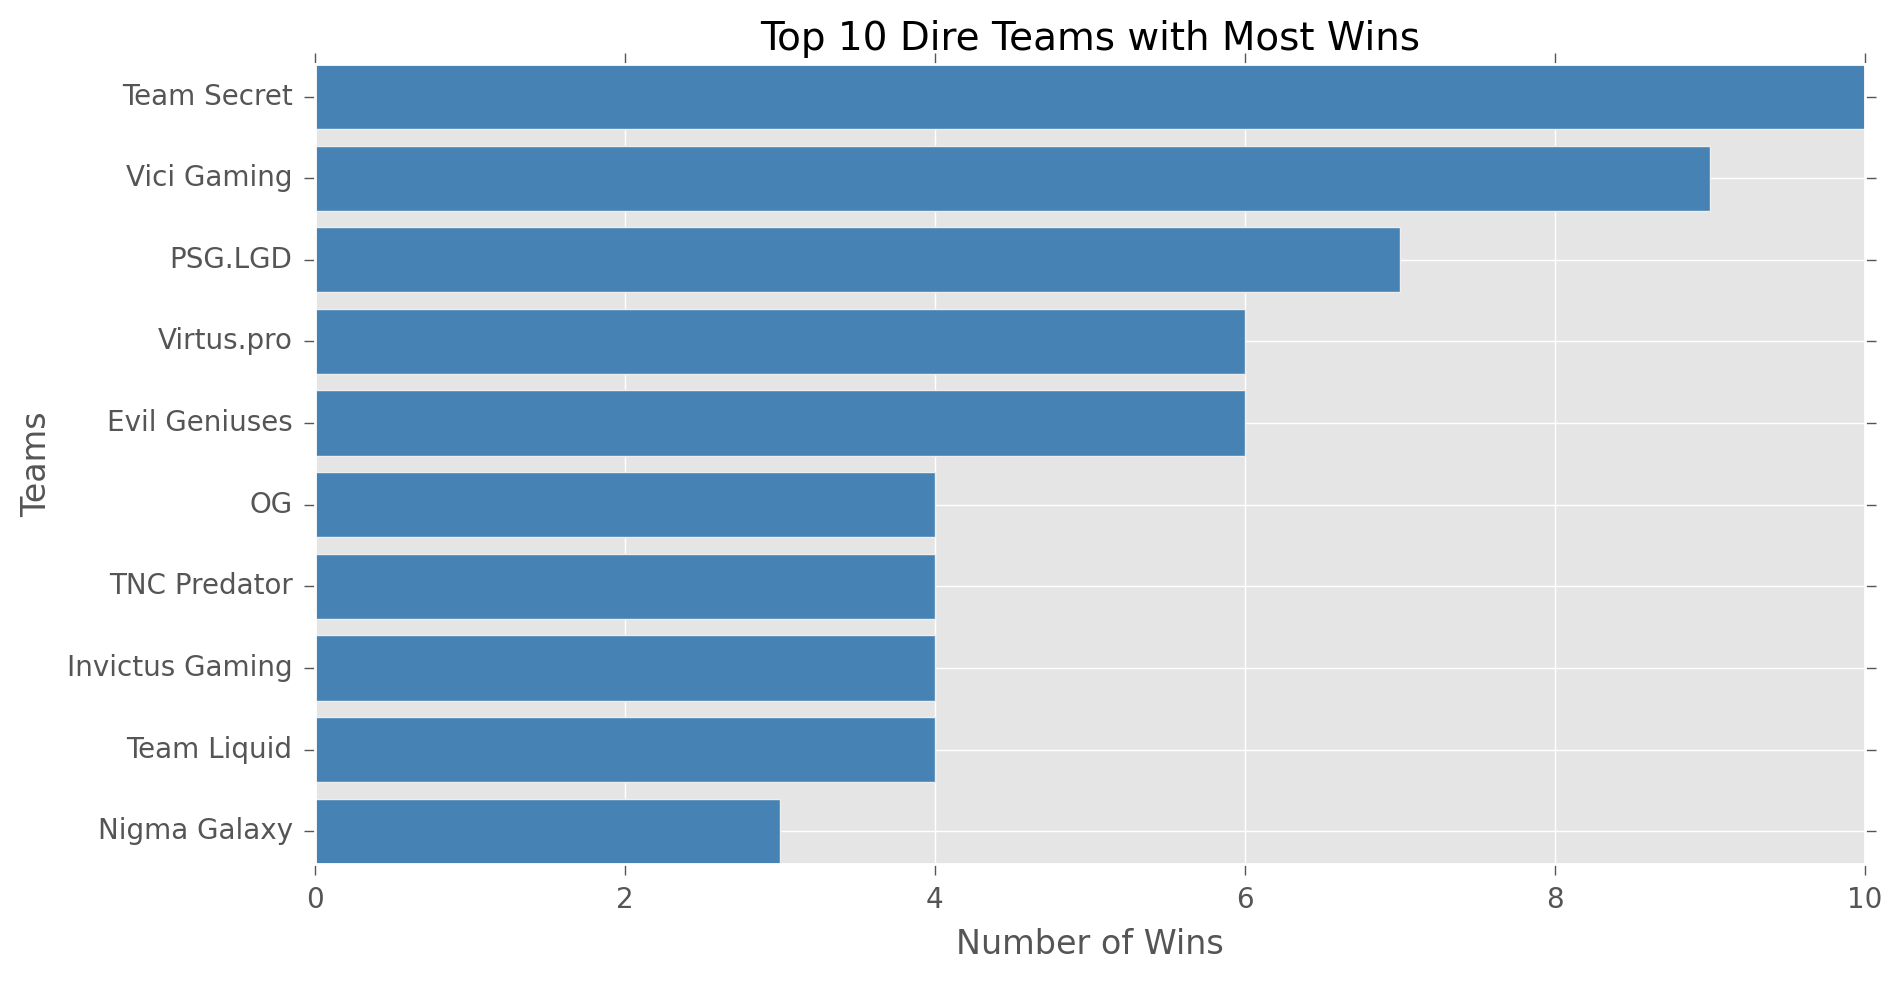

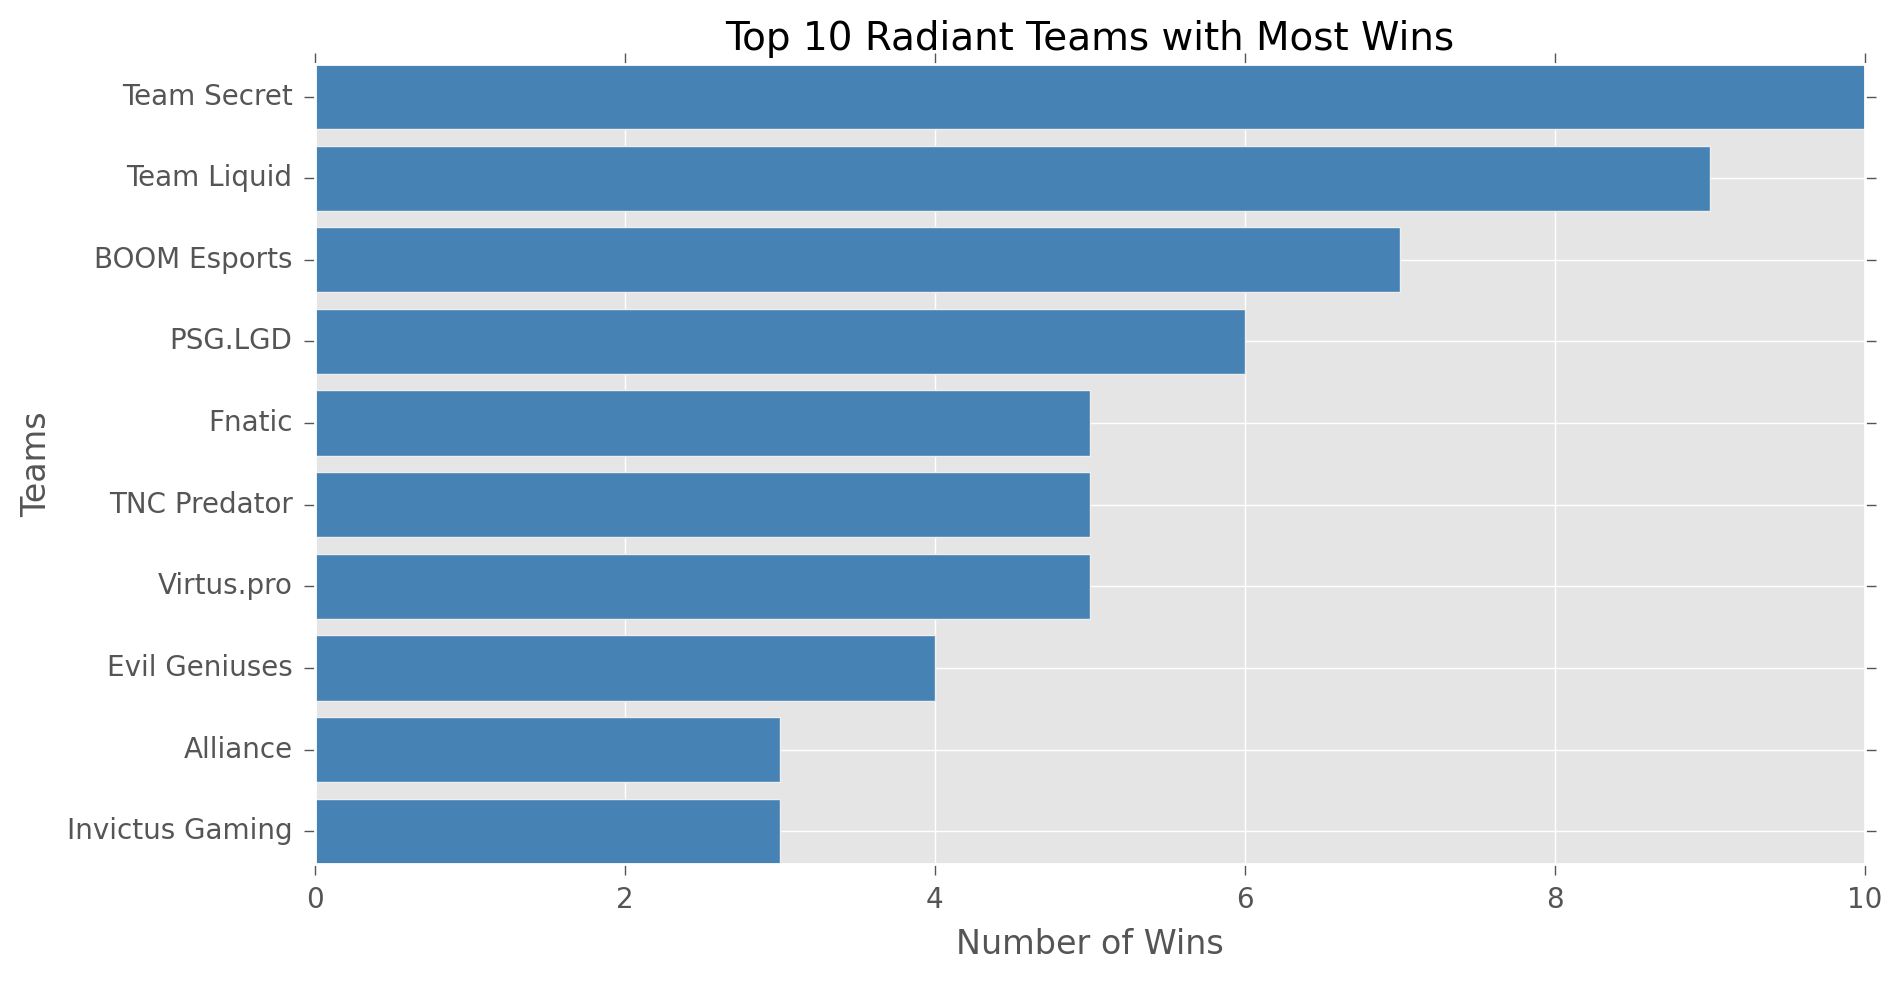

In [85]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('ggplot')

# Filter games where the side is 'dire' and the team won
dire_wins = games[(games['SIDE'] == 'dire') & (games['WIN'] == 1)]

# Get the top 10 'dire' teams with the most wins
top_10_dire_teams_wins = dire_wins['TEAM'].value_counts().head(10)

# Filter games where the side is 'radiant' and the team won
radiant_wins = games[(games['SIDE'] == 'radiant') & (games['WIN'] == 1)]

# Get the top 10 'radiant' teams with the most wins
top_10_radiant_teams_wins = radiant_wins['TEAM'].value_counts().head(10)

# Plot the top 10 'dire' teams with the most wins
plt.figure(figsize=(10, 5))
plt.barh(top_10_dire_teams_wins.index, top_10_dire_teams_wins.values, color='steelblue')
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Teams', fontsize=12)
plt.title('Top 10 Dire Teams with Most Wins', fontsize=14)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Plot the top 10 'radiant' teams with the most wins
plt.figure(figsize=(10, 5))
plt.barh(top_10_radiant_teams_wins.index, top_10_radiant_teams_wins.values, color='steelblue')
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Teams', fontsize=12)
plt.title('Top 10 Radiant Teams with Most Wins', fontsize=14)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Picks Section

In [86]:
#Read the Dataset
pick=pd.read_excel('picks.xlsx')

In [87]:
#show first 5 rows
pick.head()

ID     SIDE  PICK               HERO  WIN
0  001-1-D     dire     1         Juggernaut    0
1  001-1-R  radiant     1          Dark Seer    1
2  001-2-R  radiant     1  Outworld Devourer    1
3  001-2-D     dire     1        Drow Ranger    0
4  001-3-R  radiant     1         Juggernaut    1

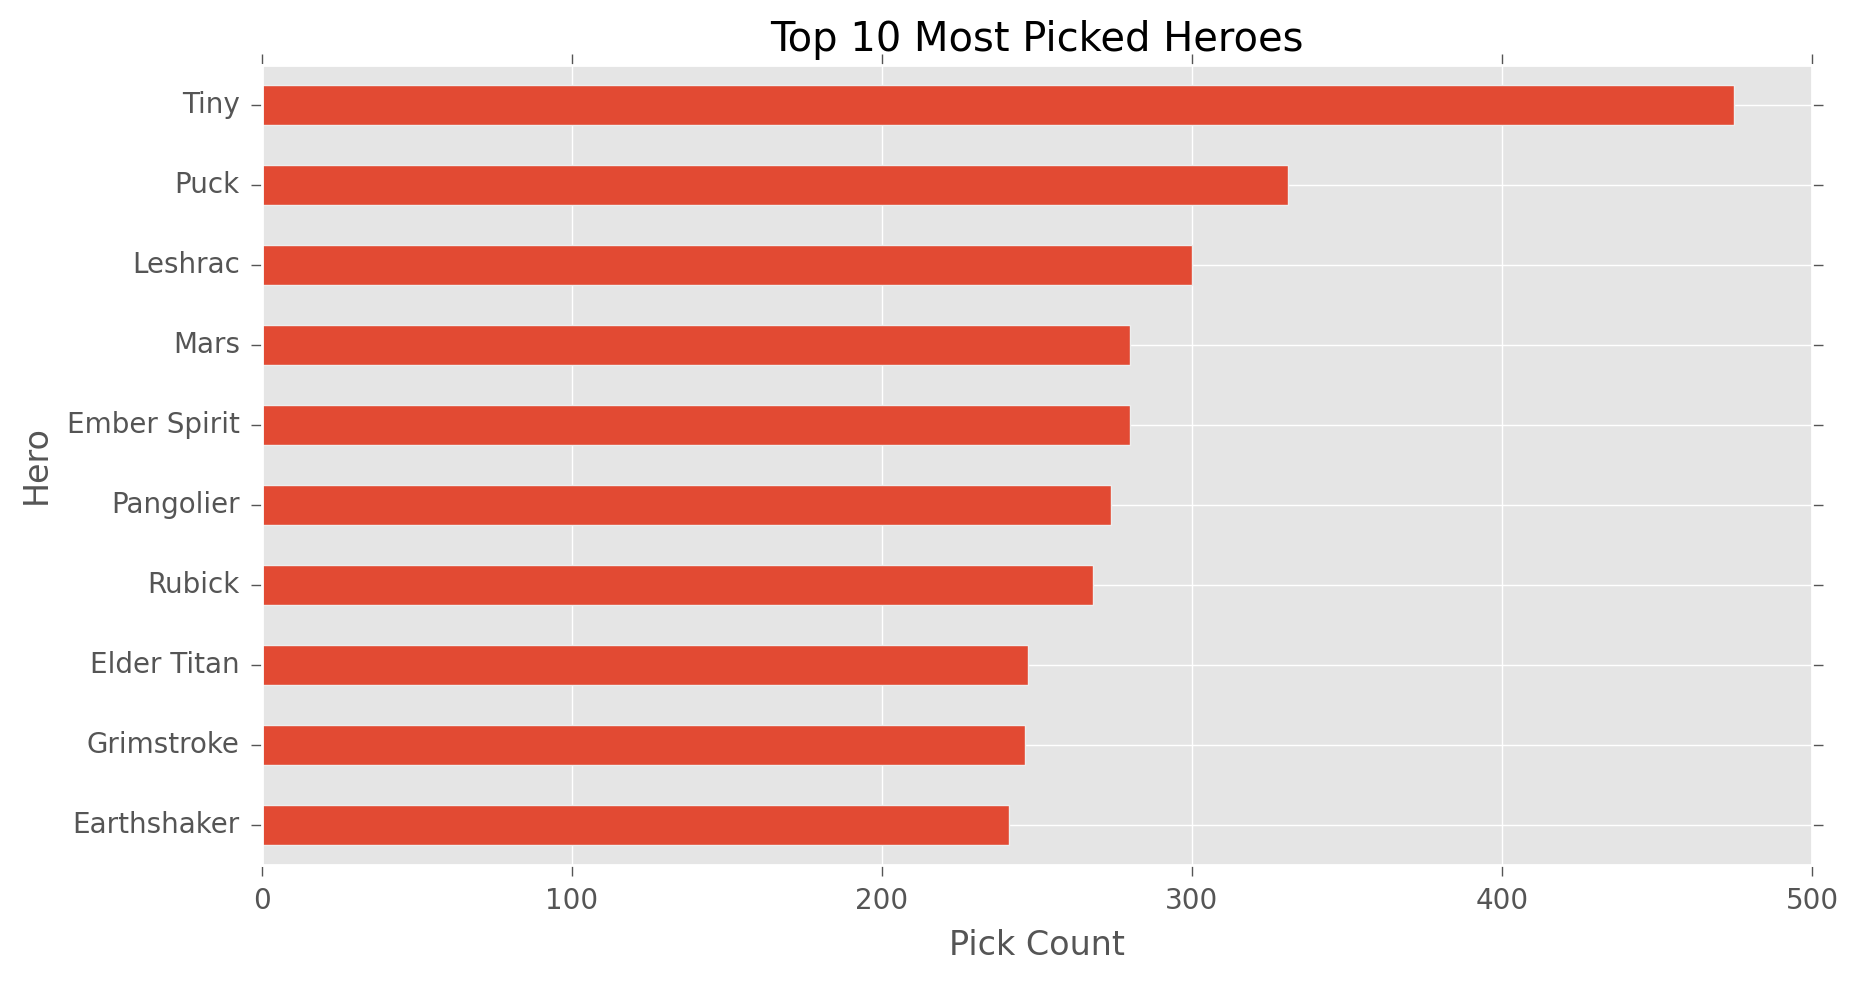

In [88]:
# Get the hero counts
hero_counts = pick['HERO'].value_counts()

# Get the top 10 most picked heroes
top_heroes = hero_counts[:10]

# Plot the most picked heroes
plt.figure(figsize=(10,5))
top_heroes.plot(kind='barh')
plt.title('Top 10 Most Picked Heroes')
plt.xlabel('Pick Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest count at the top
plt.show()

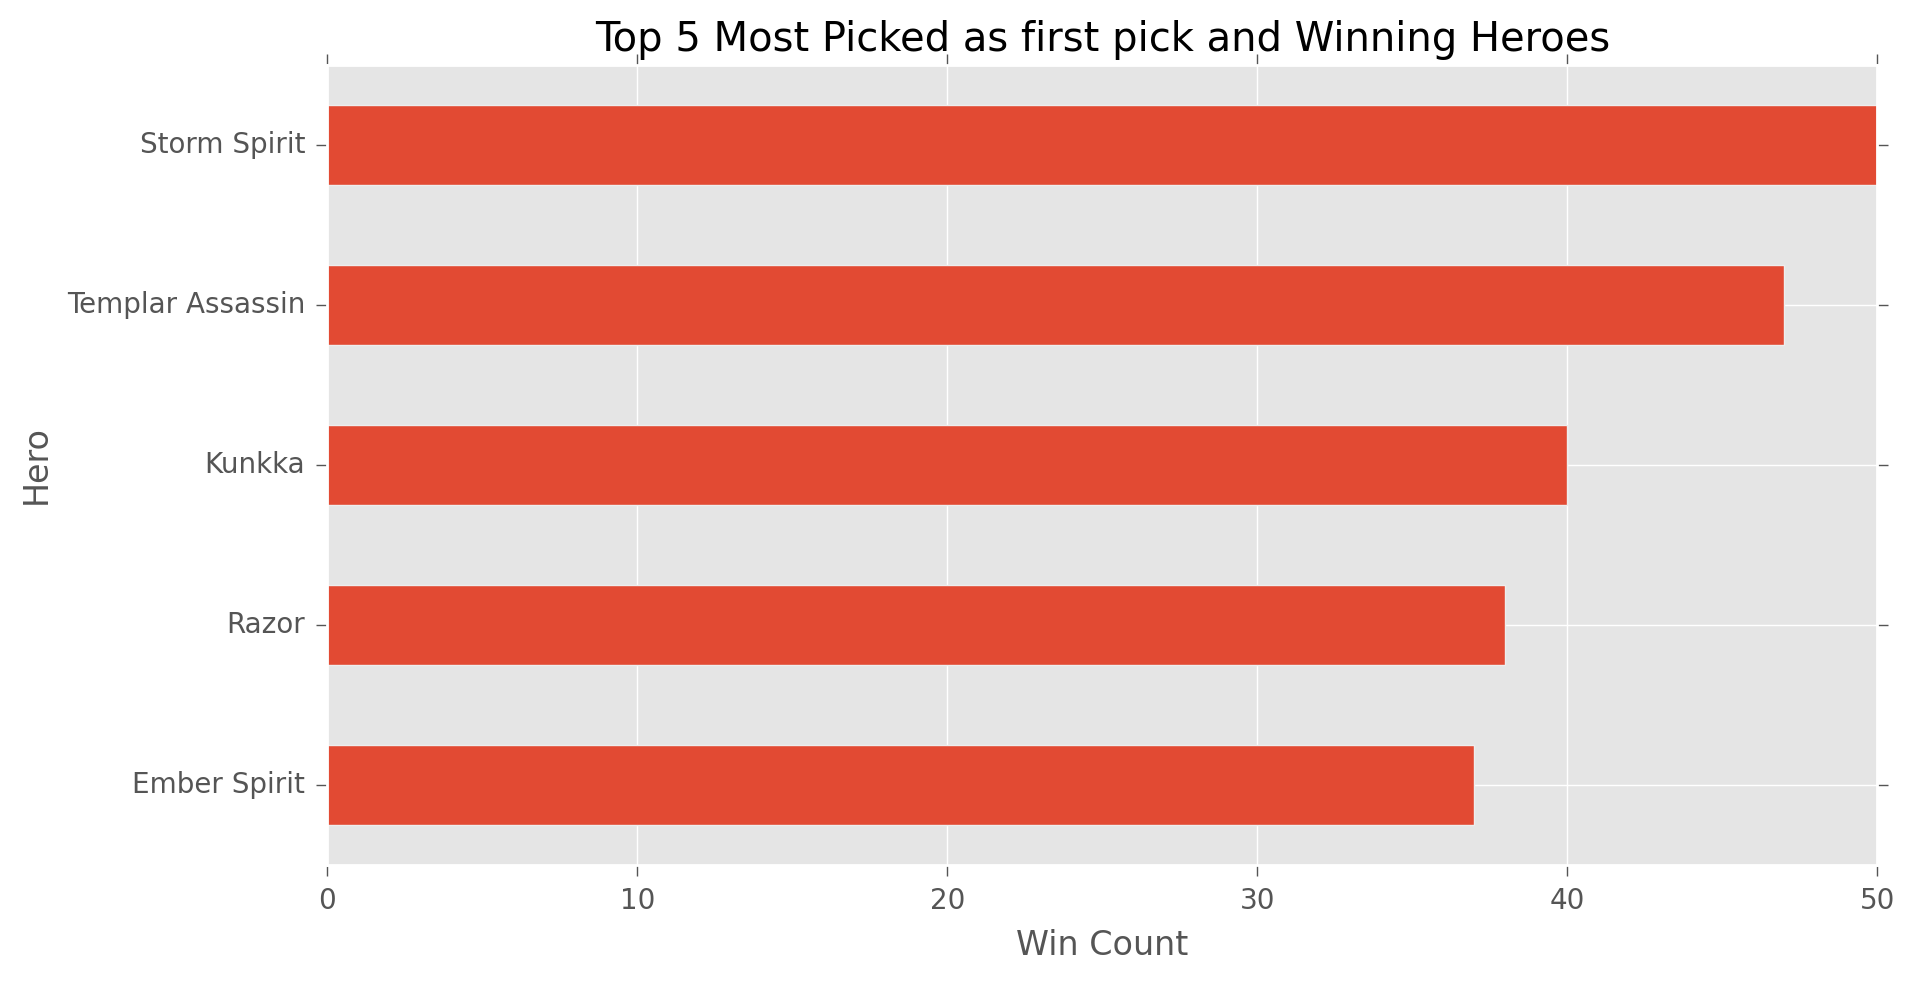

In [89]:
# Filter the data where PICK is 1 and WIN is true
winning_heroes = pick[(pick['PICK'] == 1) & (pick['WIN'] == 1)]

# Count the number of times each hero is picked and wins
winning_hero_counts = winning_heroes['HERO'].value_counts()

# Get the top 5 most picked and winning heroes
top_winning_heroes = winning_hero_counts[:5]

# Plot the most picked and winning heroes
plt.figure(figsize=(10,5))
top_winning_heroes.plot(kind='barh')
plt.title('Top 5 Most Picked as first pick and Winning Heroes')
plt.xlabel('Win Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest count at the top
plt.show()

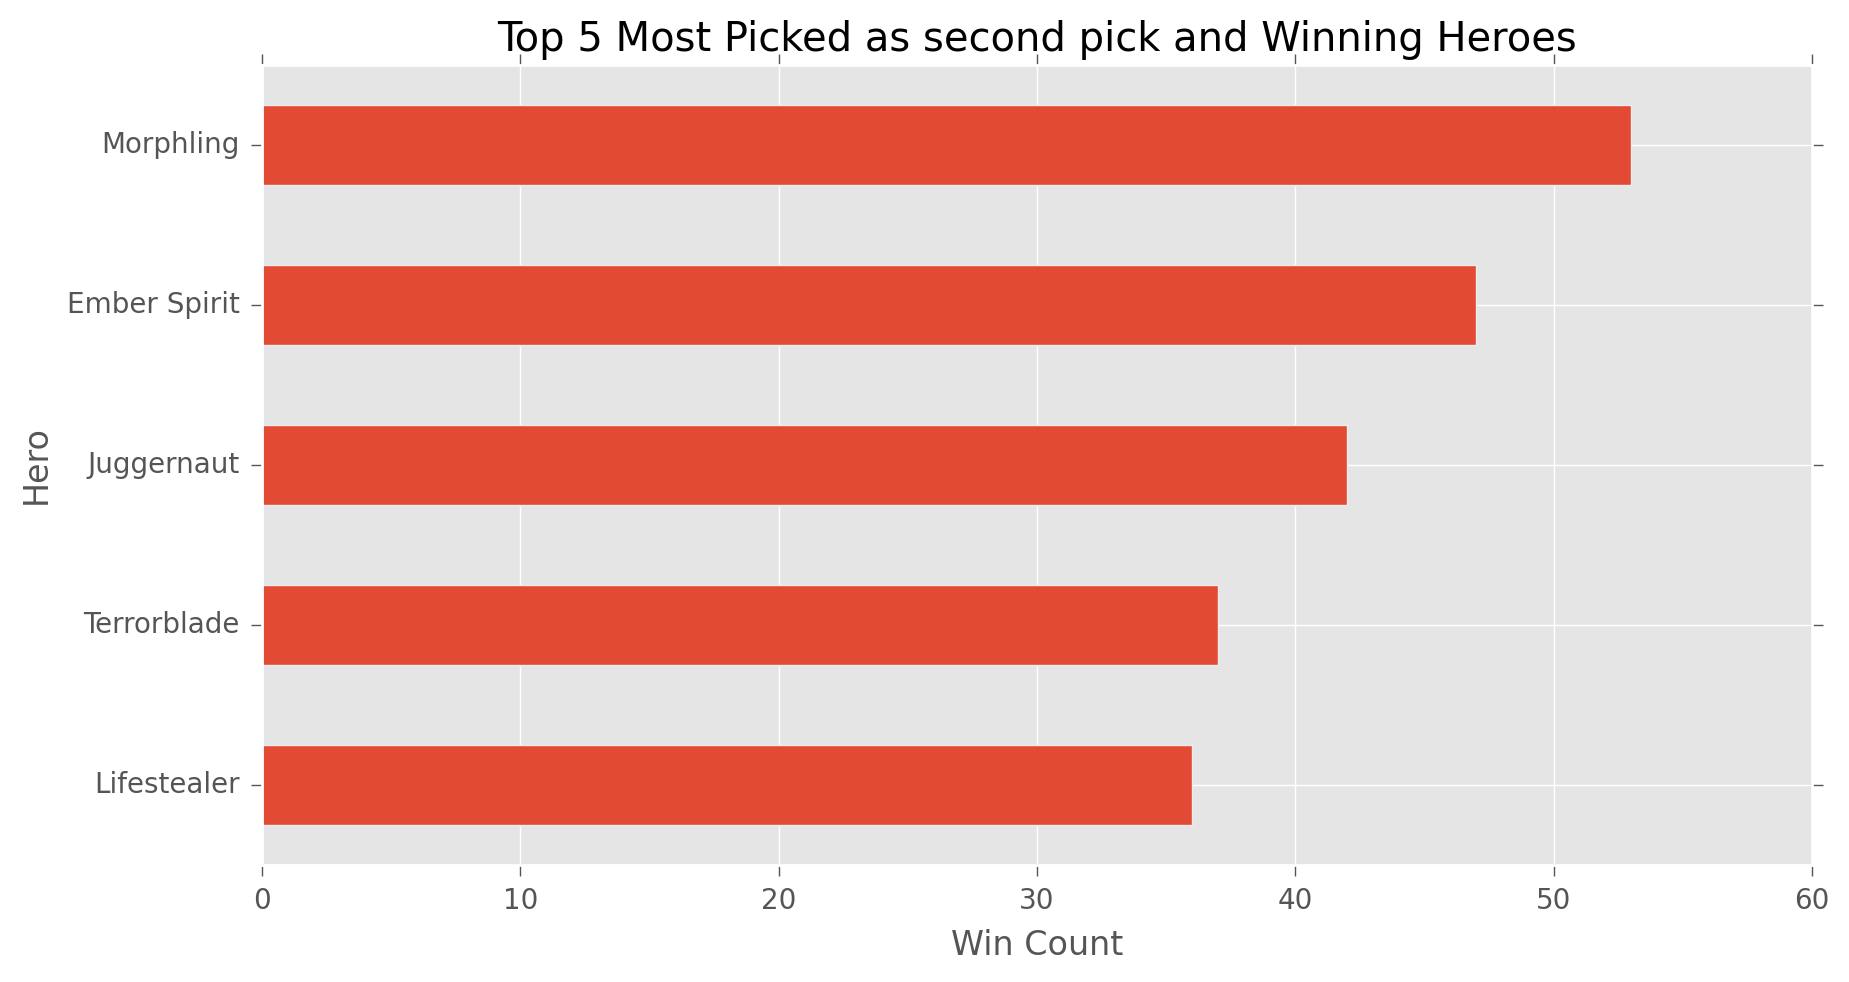

In [90]:
import matplotlib.pyplot as plt

# Filter the data where PICK is 2 and WIN is true
winning_heroes2 = pick[(pick['PICK'] == 2) & (pick['WIN'] == 1)]

# Count the number of times each hero is picked and wins
winning_hero_counts2 = winning_heroes2['HERO'].value_counts()

# Get the top 5 most picked and winning heroes
top_winning_heroes2 = winning_hero_counts2[:5]

# Plot the most picked and winning heroes
plt.figure(figsize=(10,5))
top_winning_heroes2.plot(kind='barh')
plt.title('Top 5 Most Picked as second pick and Winning Heroes')
plt.xlabel('Win Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest count at the top
plt.show()

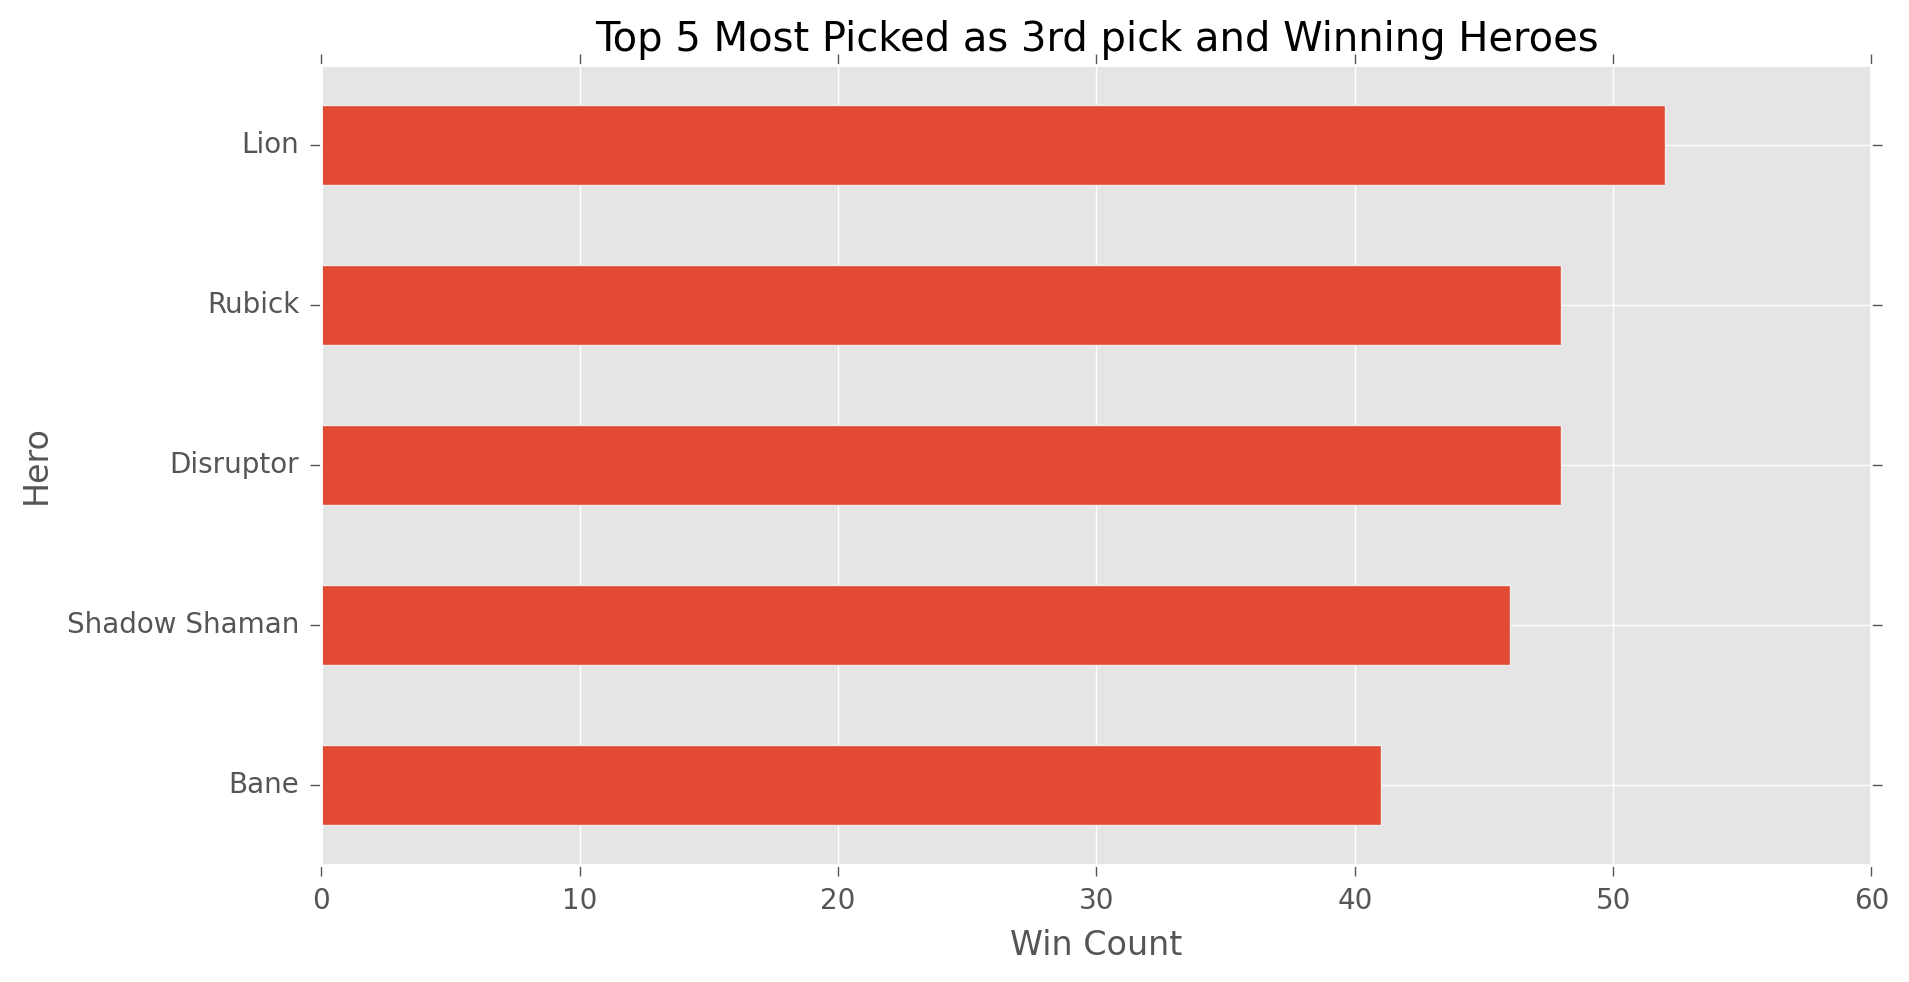

In [91]:
# Filter the data where PICK is 3 and WIN is true
winning_heroes3 = pick[(pick['PICK'] == 3) & (pick['WIN'] == 1)]

# Count the number of times each hero is picked and wins
winning_hero_counts3 = winning_heroes3['HERO'].value_counts()

# Get the top 5 most picked and winning heroes
top_winning_heroes3 = winning_hero_counts3[:5]

# Plot the most picked and winning heroes
plt.figure(figsize=(10,5))
top_winning_heroes3.plot(kind='barh')
plt.title('Top 5 Most Picked as 3rd pick and Winning Heroes')
plt.xlabel('Win Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest count at the top
plt.show()

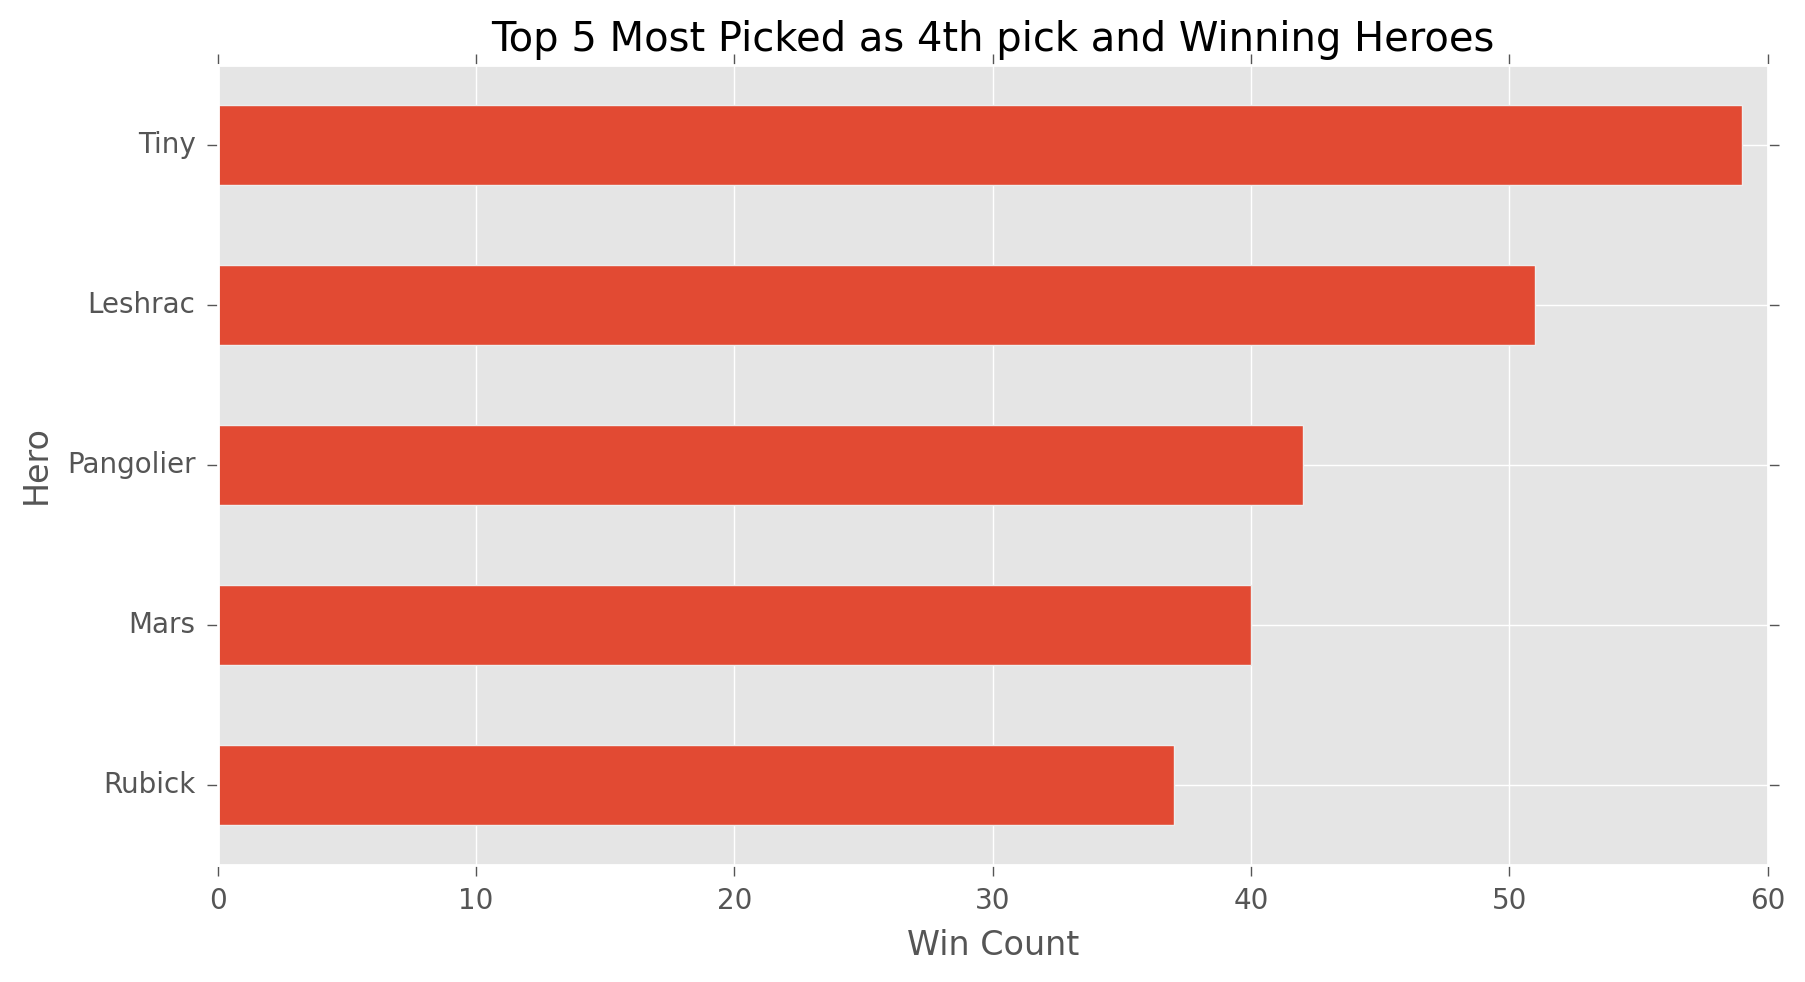

In [92]:
# Filter the data where PICK is 4 and WIN is true
winning_heroes4 = pick[(pick['PICK'] == 4) & (pick['WIN'] == 1)]

# Count the number of times each hero is picked and wins
winning_hero_counts4 = winning_heroes4['HERO'].value_counts()

# Get the top 5 most picked and winning heroes
top_winning_heroes4 = winning_hero_counts4[:5]

# Plot the most picked and winning heroes
plt.figure(figsize=(10,5))
top_winning_heroes4.plot(kind='barh')
plt.title('Top 5 Most Picked as 4th pick and Winning Heroes')
plt.xlabel('Win Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest count at the top
plt.show()

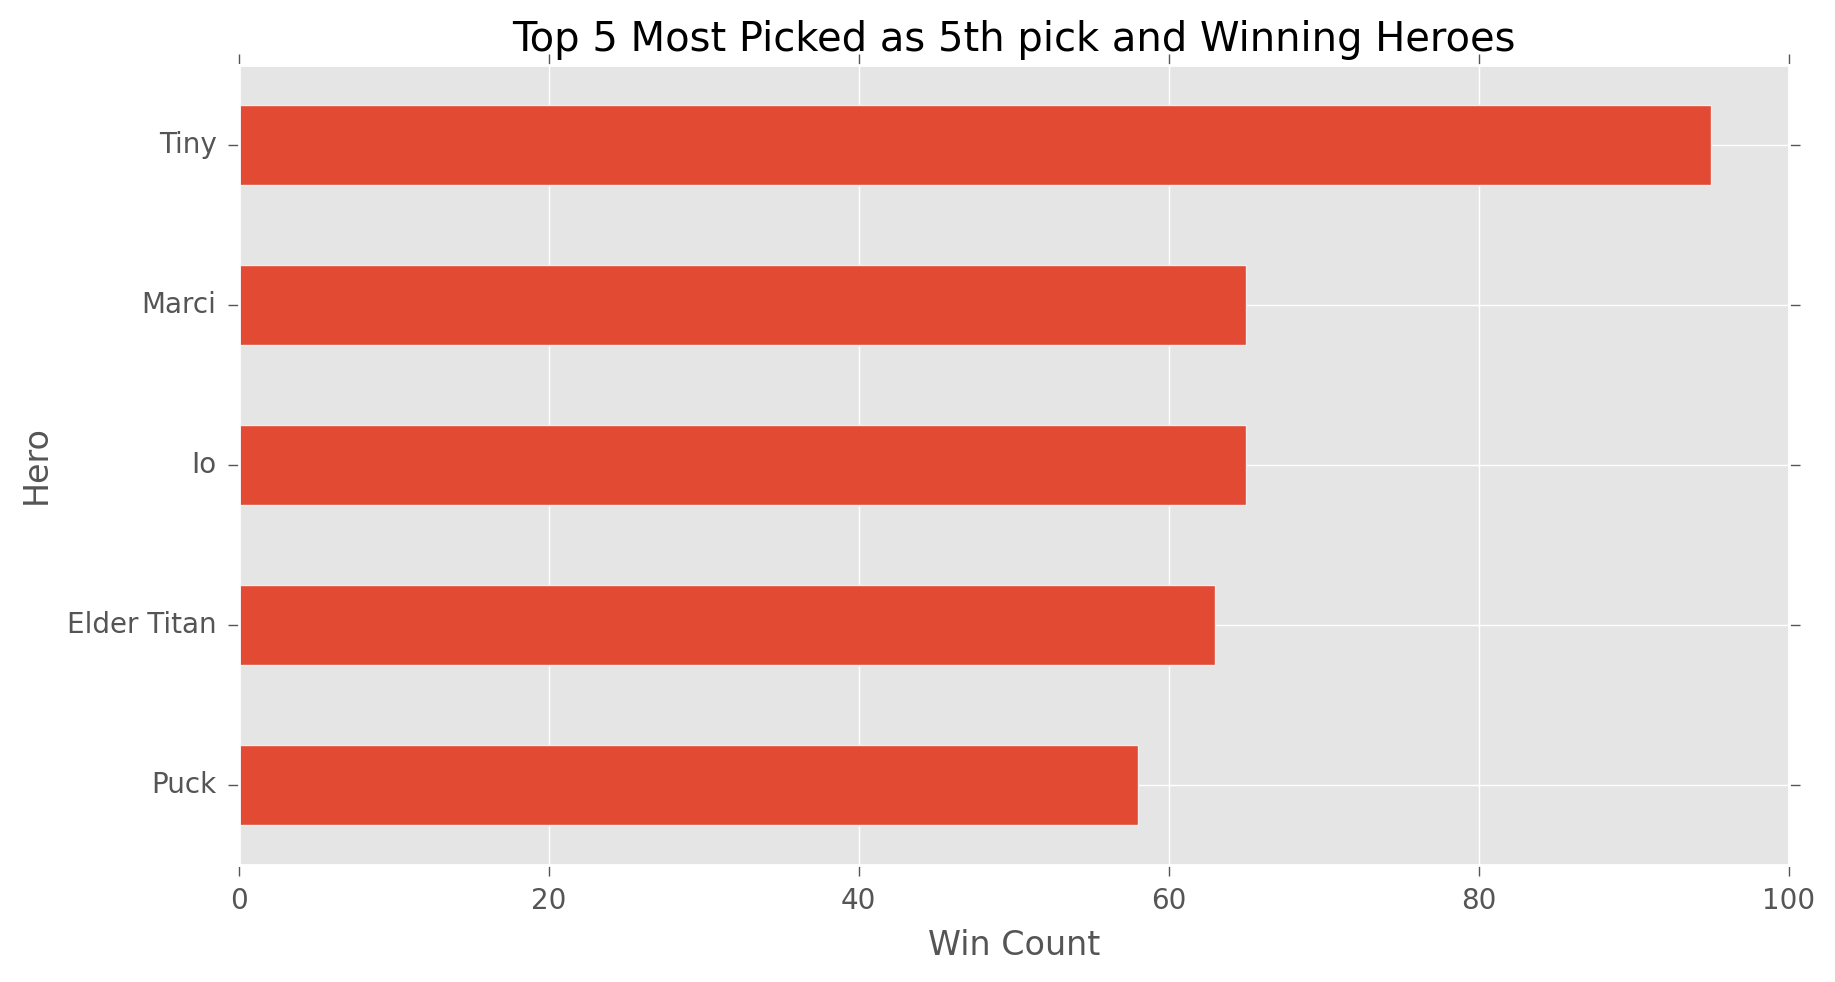

In [93]:
# Filter the data where PICK is 5 and WIN is true
winning_heroes5 = pick[(pick['PICK'] == 5) & (pick['WIN'] == 1)]

# Count the number of times each hero is picked and wins
winning_hero_counts5 = winning_heroes5['HERO'].value_counts()

# Get the top 5 most picked and winning heroes
top_winning_heroes5 = winning_hero_counts5[:5]

# Plot the most picked and winning heroes
plt.figure(figsize=(10,5))
top_winning_heroes5.plot(kind='barh')
plt.title('Top 5 Most Picked as 5th pick and Winning Heroes')
plt.xlabel('Win Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest count at the top
plt.show()


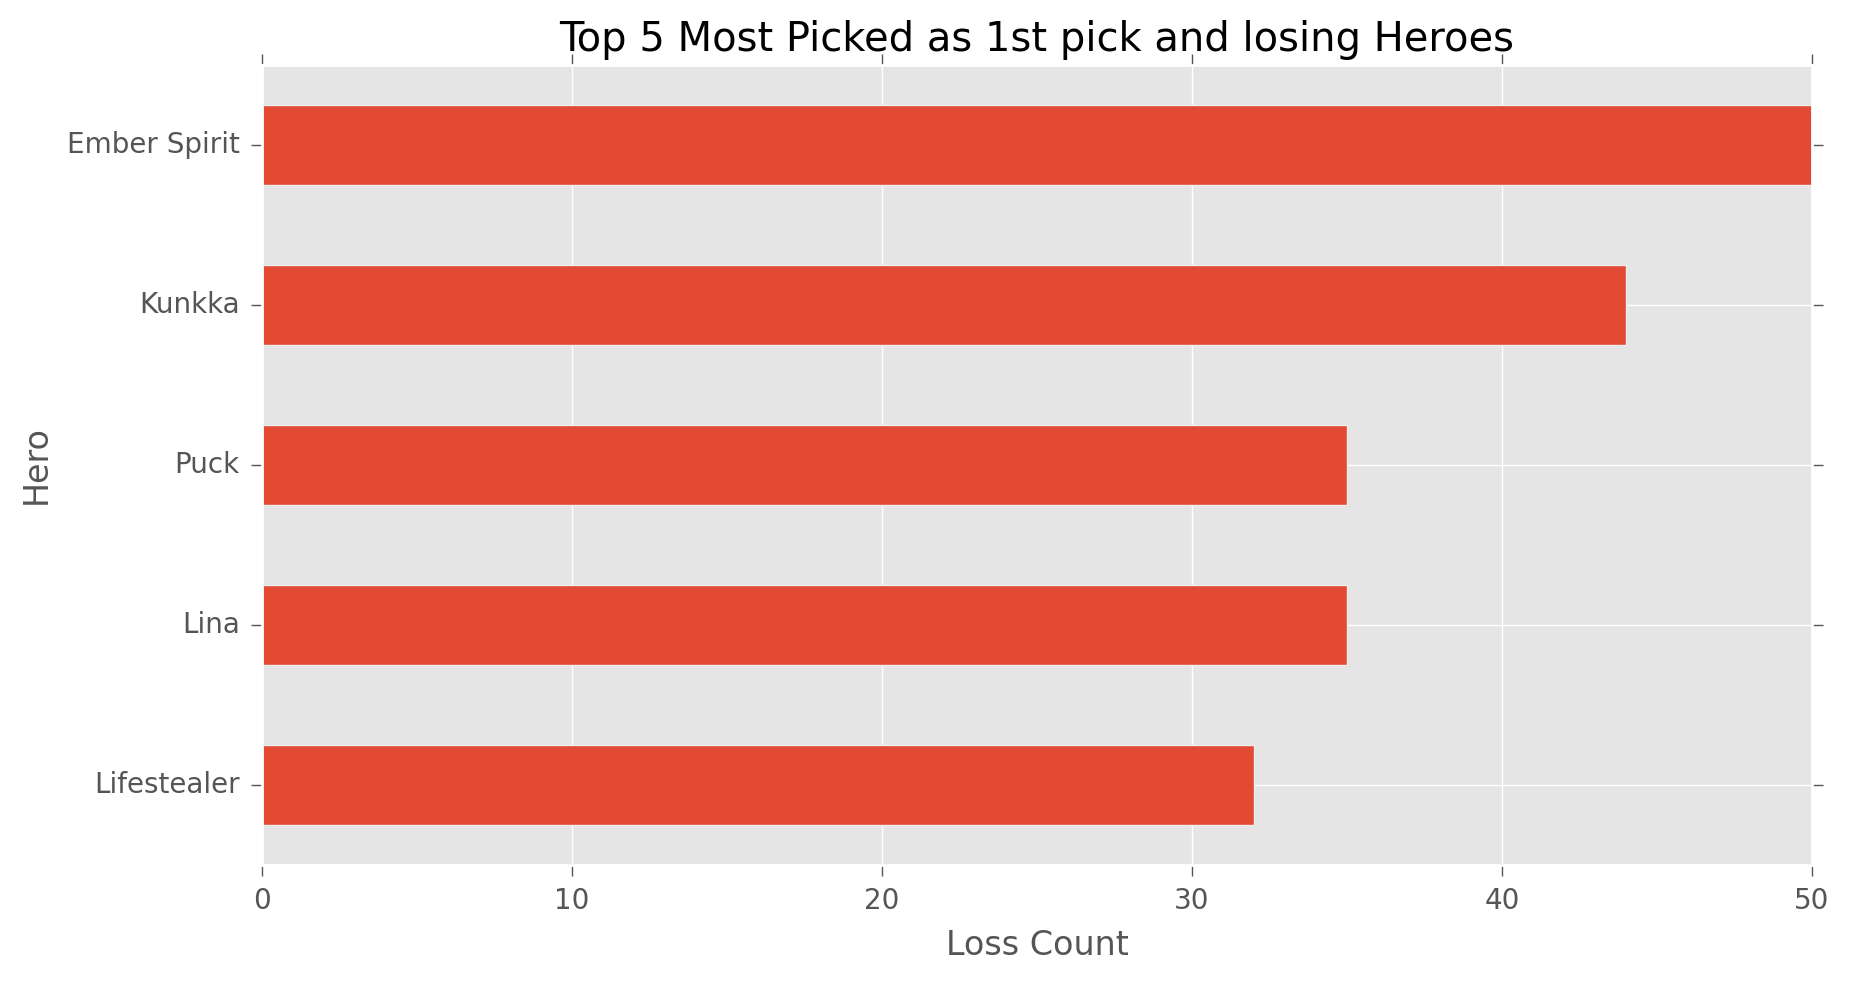

In [94]:
# Filter the data where PICK is 1 and WIN is False
losing_heroes = pick[(pick['PICK'] == 1) & (pick['WIN'] == 0)]

# Count the number of times each hero is picked and loses
losing_hero_counts = losing_heroes['HERO'].value_counts()

# Get the top 5 most picked and losing heroes
top_losing_heroes = losing_hero_counts[:5]

# Plot the most picked and losing heroes
plt.figure(figsize=(10,5))
top_losing_heroes.plot(kind='barh')
plt.title('Top 5 Most Picked as 1st pick and losing Heroes')
plt.xlabel('Loss Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest count at the top
plt.show()

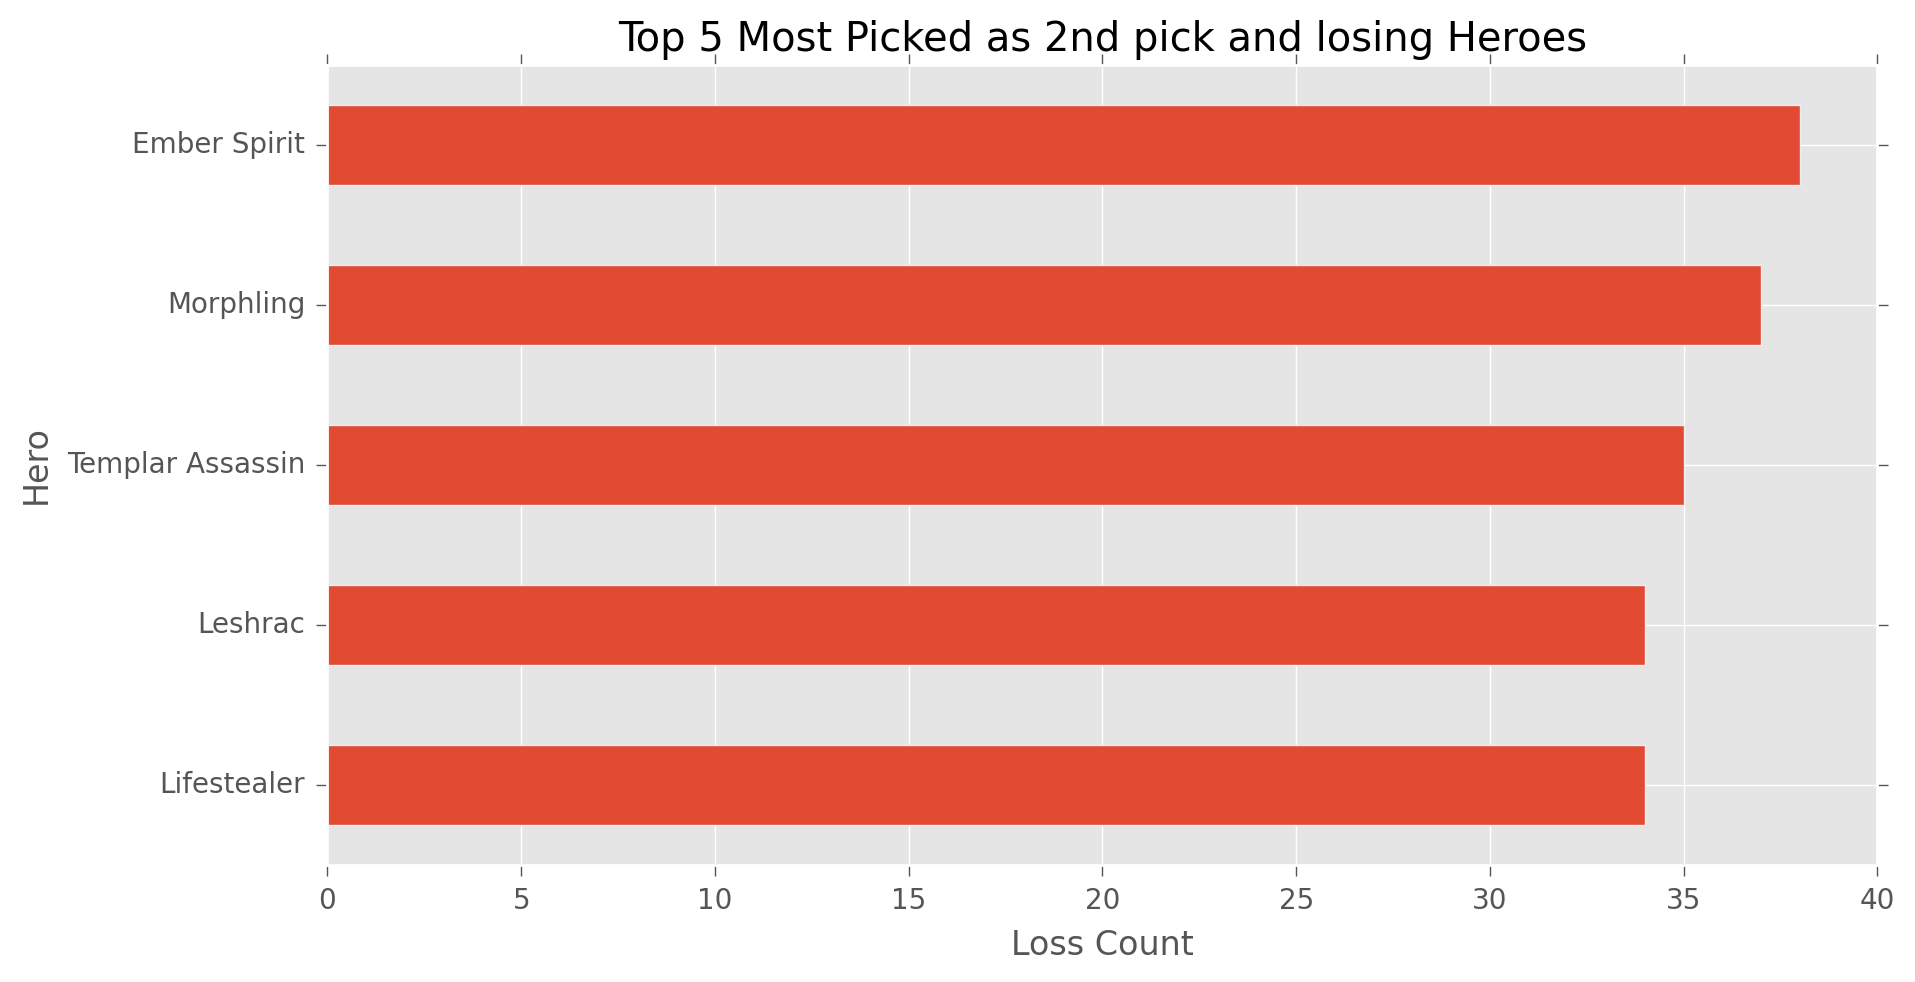

In [95]:
# Filter the data where PICK is 2 and WIN is False
losing_heroes2 = pick[(pick['PICK'] == 2) & (pick['WIN'] == 0)]

# Count the number of times each hero is picked and loses
losing_hero_counts2 = losing_heroes2['HERO'].value_counts()

# Get the top 5 most picked and lsoing heroes
top_losing_heroes2 = losing_hero_counts2[:5]

# Plot the most picked and losing heroes
plt.figure(figsize=(10,5))
top_losing_heroes2.plot(kind='barh')
plt.title('Top 5 Most Picked as 2nd pick and losing Heroes')
plt.xlabel('Loss Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest count at the top
plt.show()

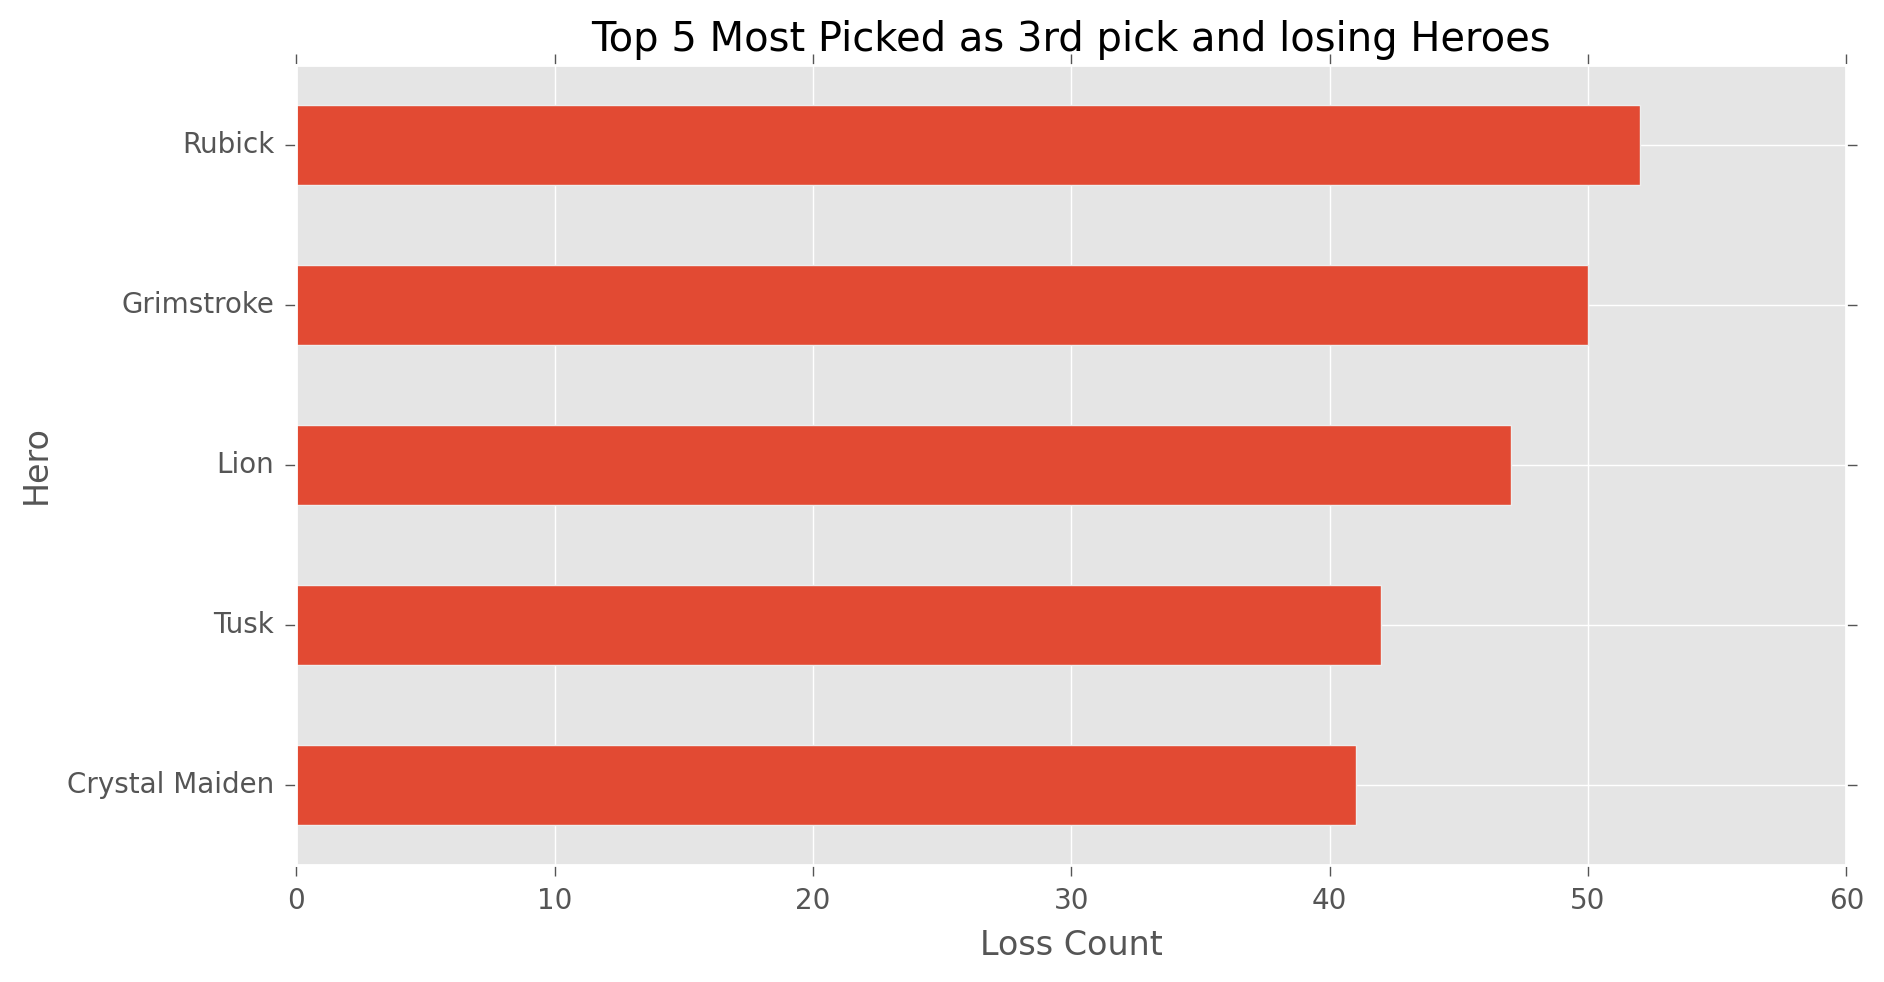

In [96]:
# Filter the data where PICK is 3 and WIN is False
losing_heroes3 = pick[(pick['PICK'] == 3) & (pick['WIN'] == 0)]

# Count the number of times each hero is picked and lsoes
losing_hero_counts3 = losing_heroes3['HERO'].value_counts()

# Get the top 5 most picked and losing heroes
top_losing_heroes3 = losing_hero_counts3[:5]

# Plot the most picked and losing heroes
plt.figure(figsize=(10,5))
top_losing_heroes3.plot(kind='barh')
plt.title('Top 5 Most Picked as 3rd pick and losing Heroes')
plt.xlabel('Loss Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest count at the top
plt.show()

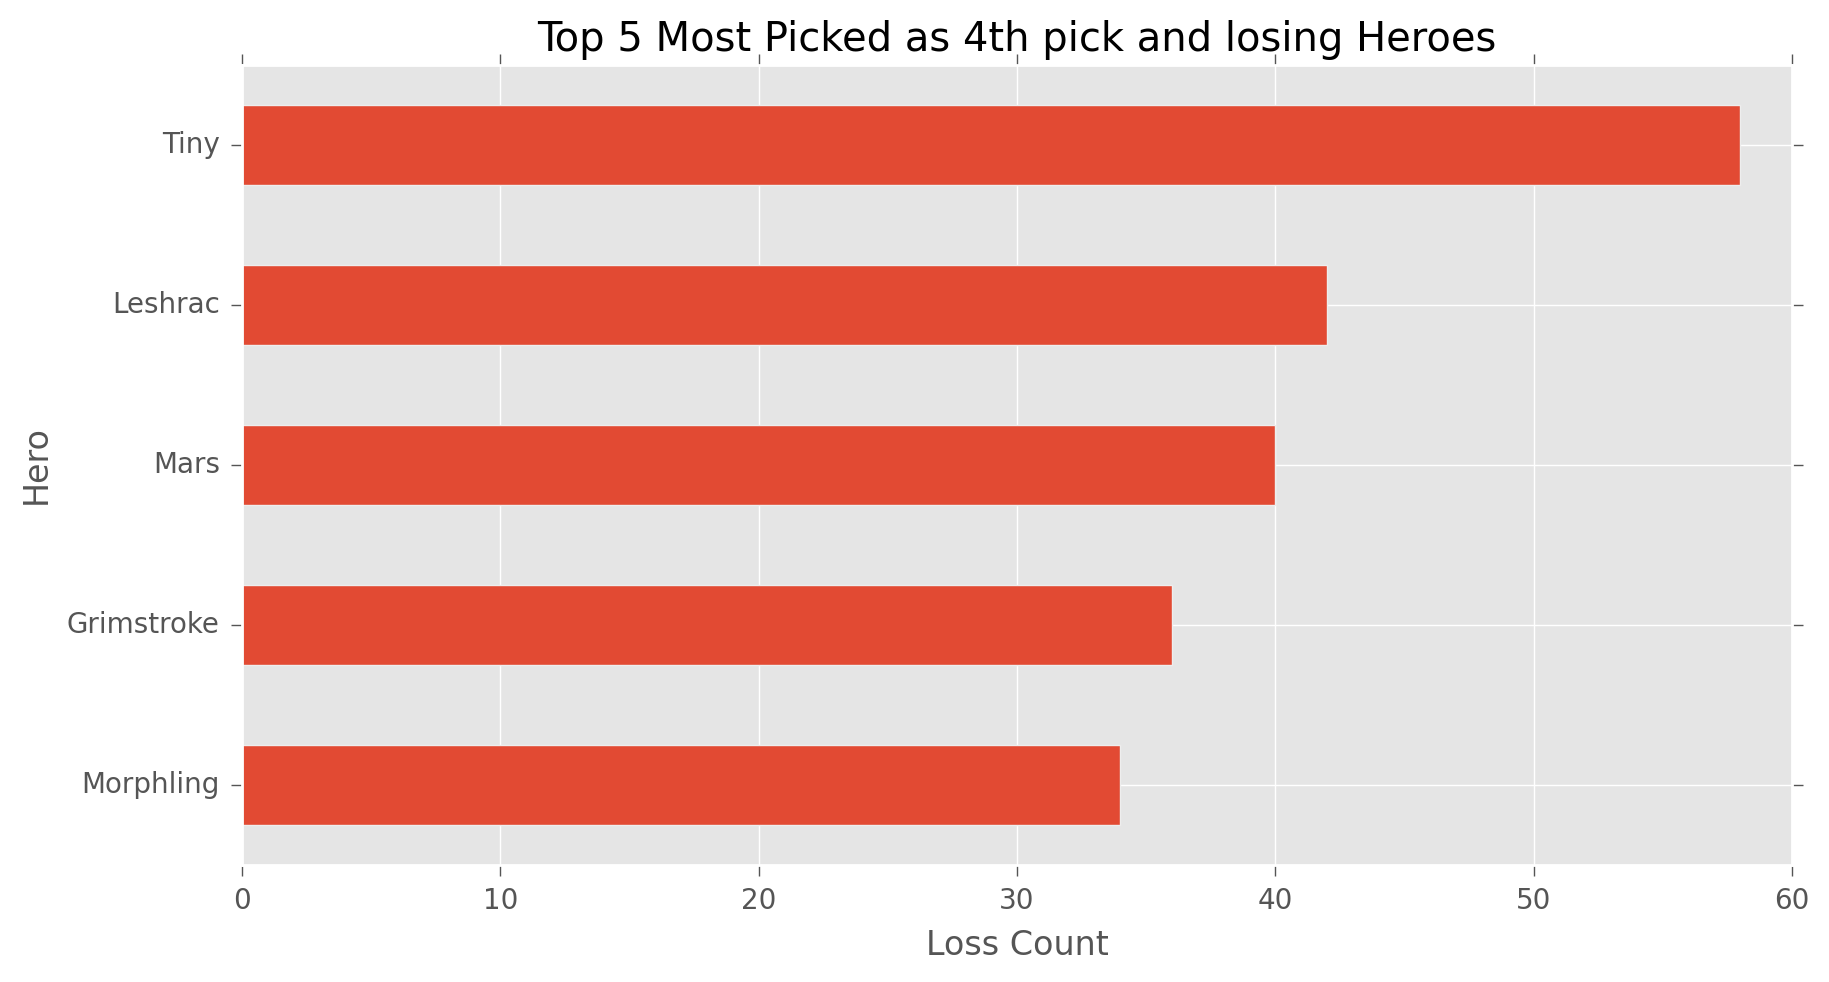

In [97]:
# Filter the data where PICK is 4 and WIN is False
losing_heroes4 = pick[(pick['PICK'] == 4) & (pick['WIN'] == 0)]

# Count the number of times each hero is picked and loses
losing_hero_counts4 = losing_heroes4['HERO'].value_counts()

# Get the top 5 most picked and losing heroes
top_losing_heroes4 = losing_hero_counts4[:5]

# Plot the most picked and losing heroes
plt.figure(figsize=(10,5))
top_losing_heroes4.plot(kind='barh')
plt.title('Top 5 Most Picked as 4th pick and losing Heroes')
plt.xlabel('Loss Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest count at the top
plt.show()

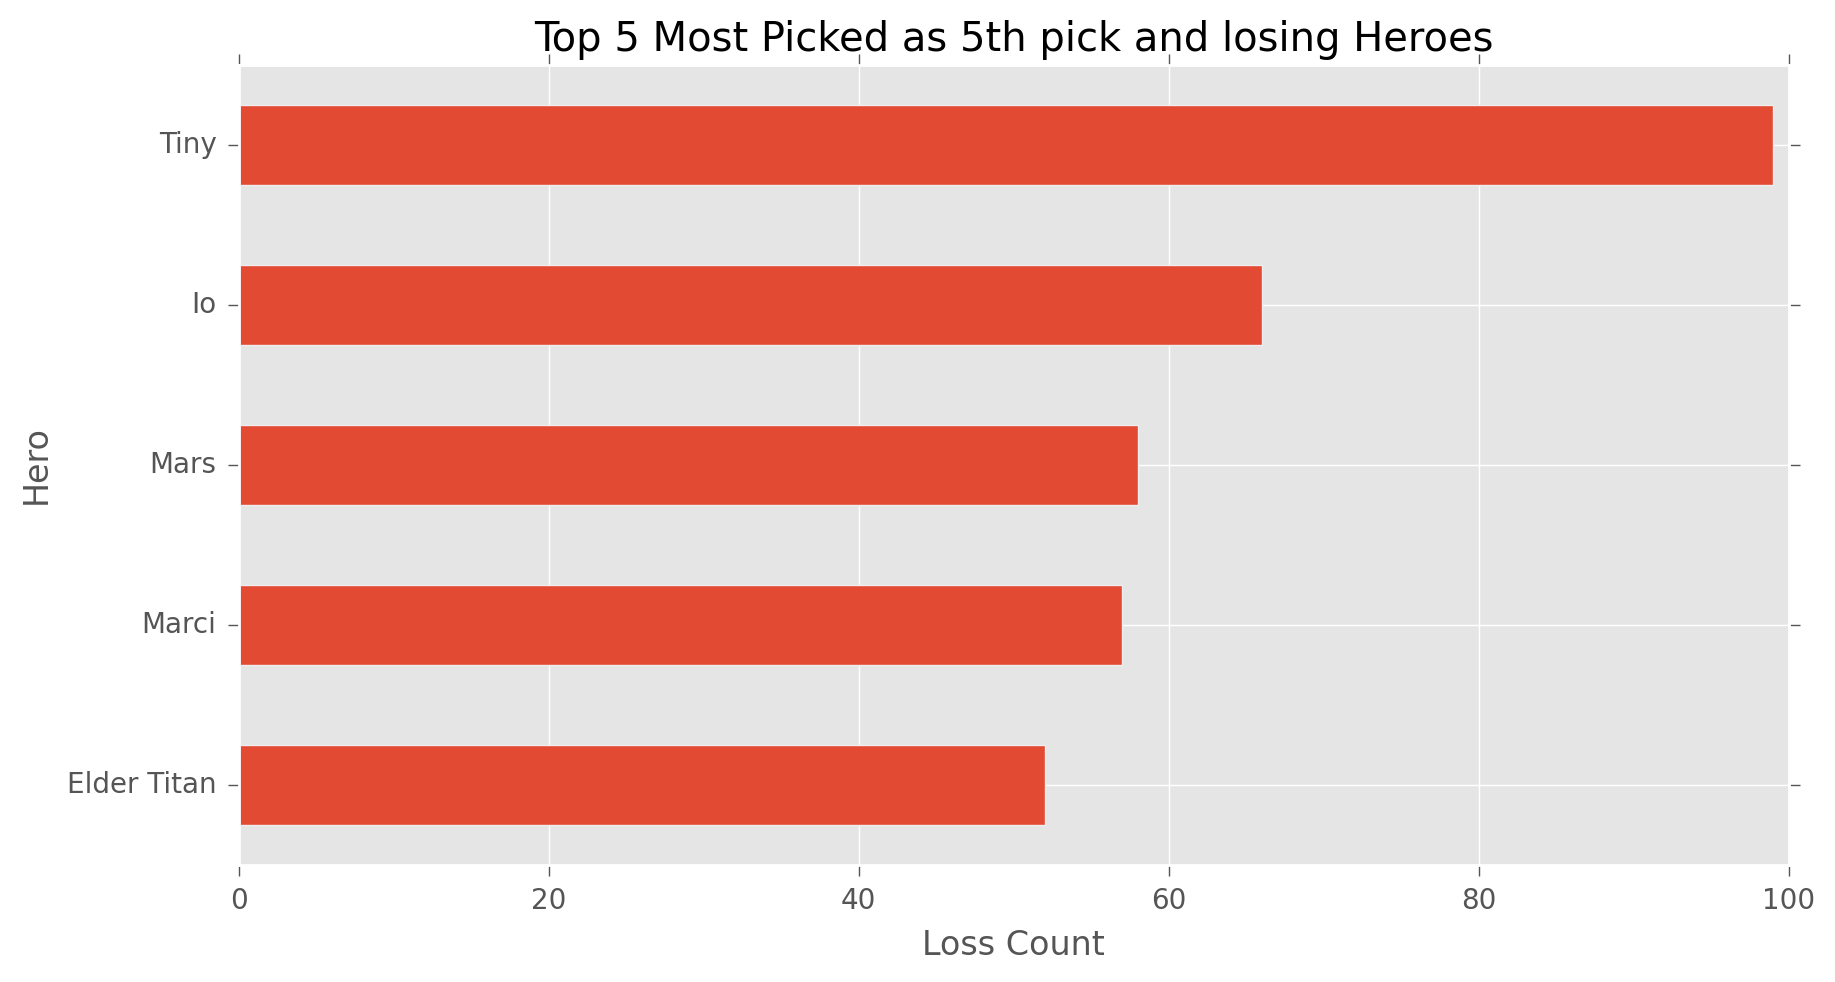

In [98]:
# Filter the data where PICK is 5 and WIN is False
losing_heroes5 = pick[(pick['PICK'] == 5) & (pick['WIN'] == 0)]

# Count the number of times each hero is picked and wins
losing_hero_counts5 = losing_heroes5['HERO'].value_counts()

# Get the top 5 most picked and winning heroes
top_losing_heroes5 = losing_hero_counts5[:5]

# Plot the most picked and winning heroes
plt.figure(figsize=(10,5))
top_losing_heroes5.plot(kind='barh')
plt.title('Top 5 Most Picked as 5th pick and losing Heroes')
plt.xlabel('Loss Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest count at the top
plt.show()

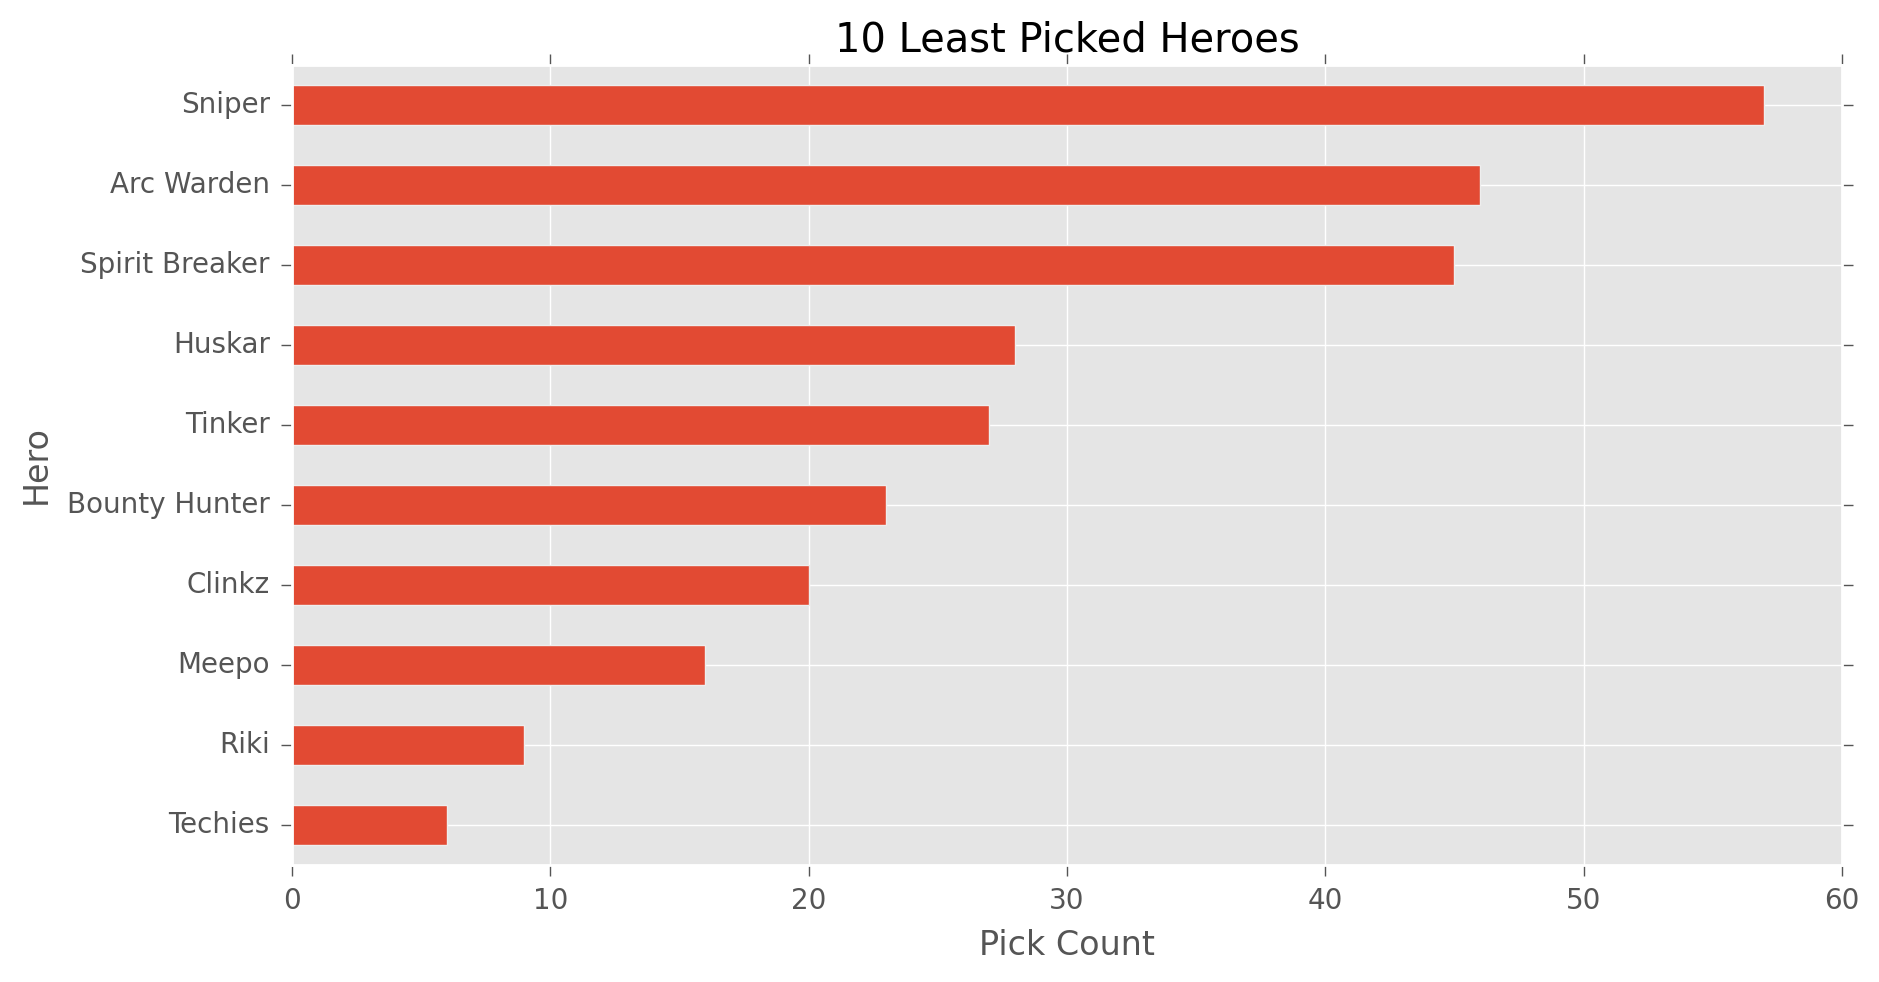

In [99]:
# Count the number of times each hero is picked
hero_counts = pick['HERO'].value_counts()

# Get the 10 least picked heroes
least_picked_heroes = hero_counts[-10:]

# Plot the least picked heroes
plt.figure(figsize=(10,5))
least_picked_heroes.plot(kind='barh')
plt.title('10 Least Picked Heroes')
plt.xlabel('Pick Count')
plt.ylabel('Hero')
plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the lowest count at the top
plt.show()

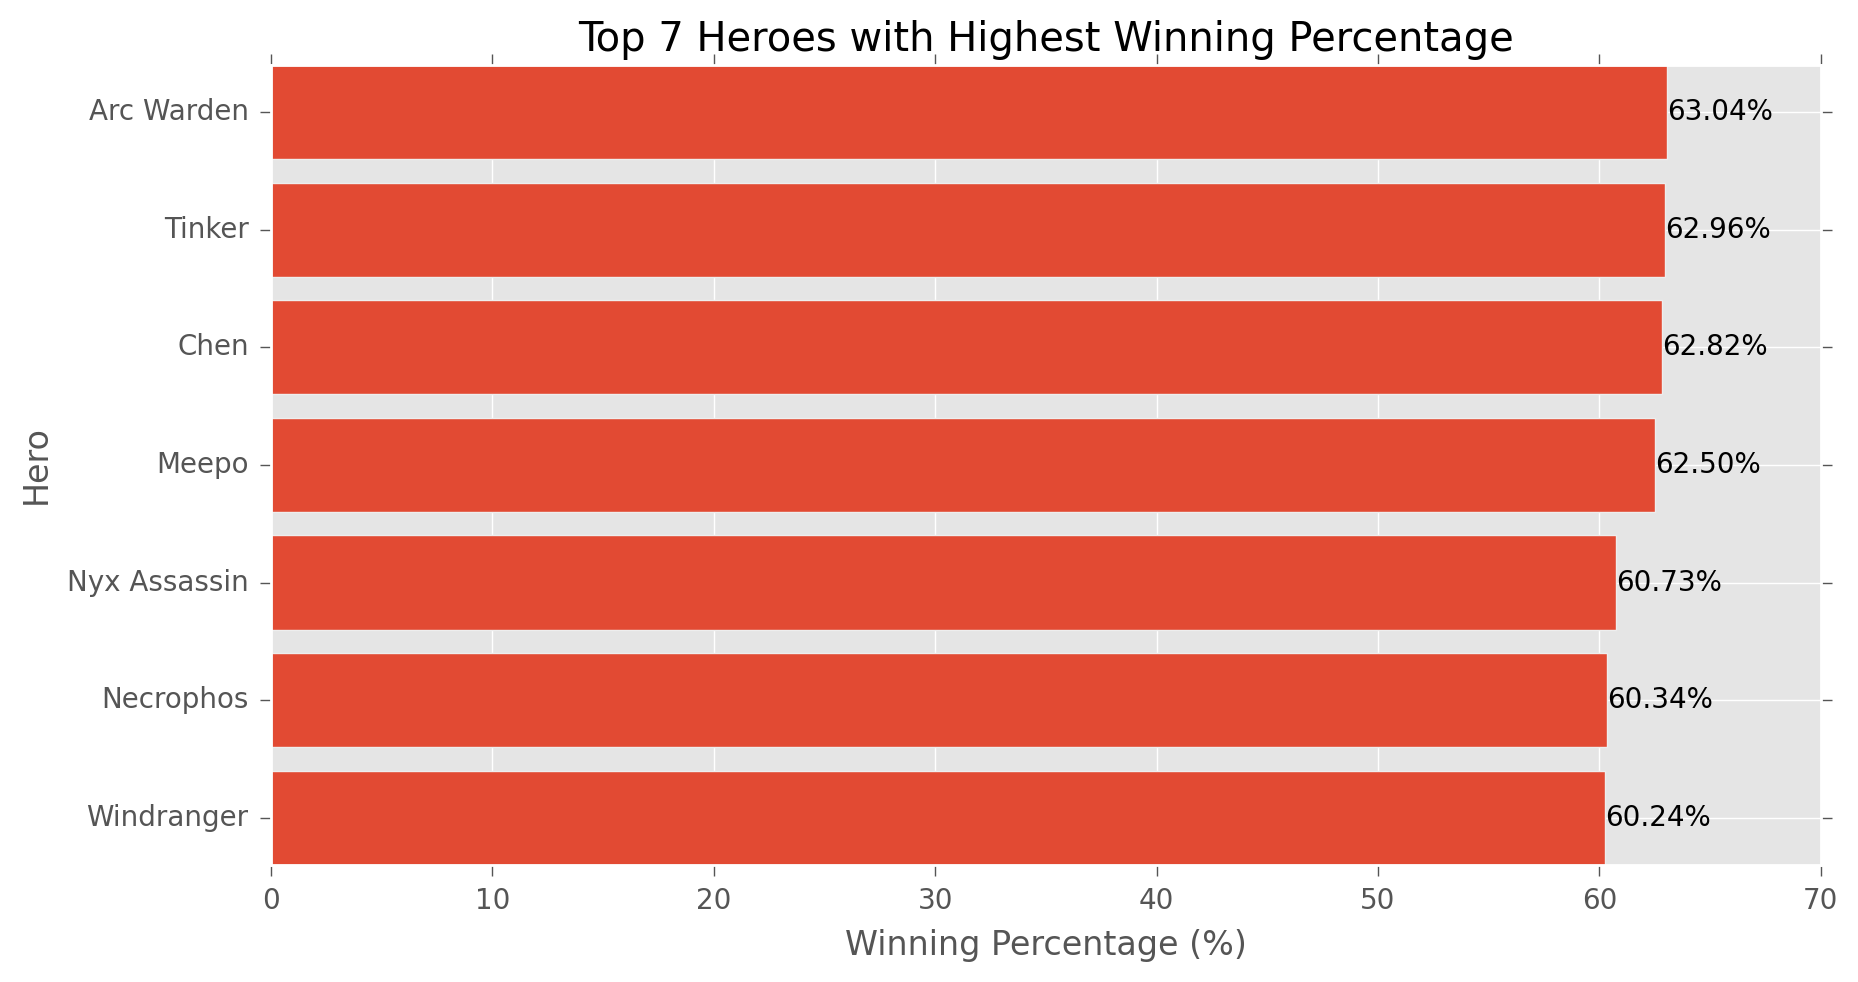

In [100]:
# Count the number of times each hero is picked
pick_counts = pick['HERO'].value_counts()

# Filter the data where WIN is true
winning_heroes = pick[pick['WIN'] == 1]

# Count the number of times each hero wins
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / pick_counts) * 100

# Sort the heroes by winning percentage and get the top 7
sorted_heroes = win_percentages.sort_values(ascending=False)[:7]

# Plot the heroes with the highest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Top 7 Heroes with Highest Winning Percentage')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest percentage at the top
plt.show()

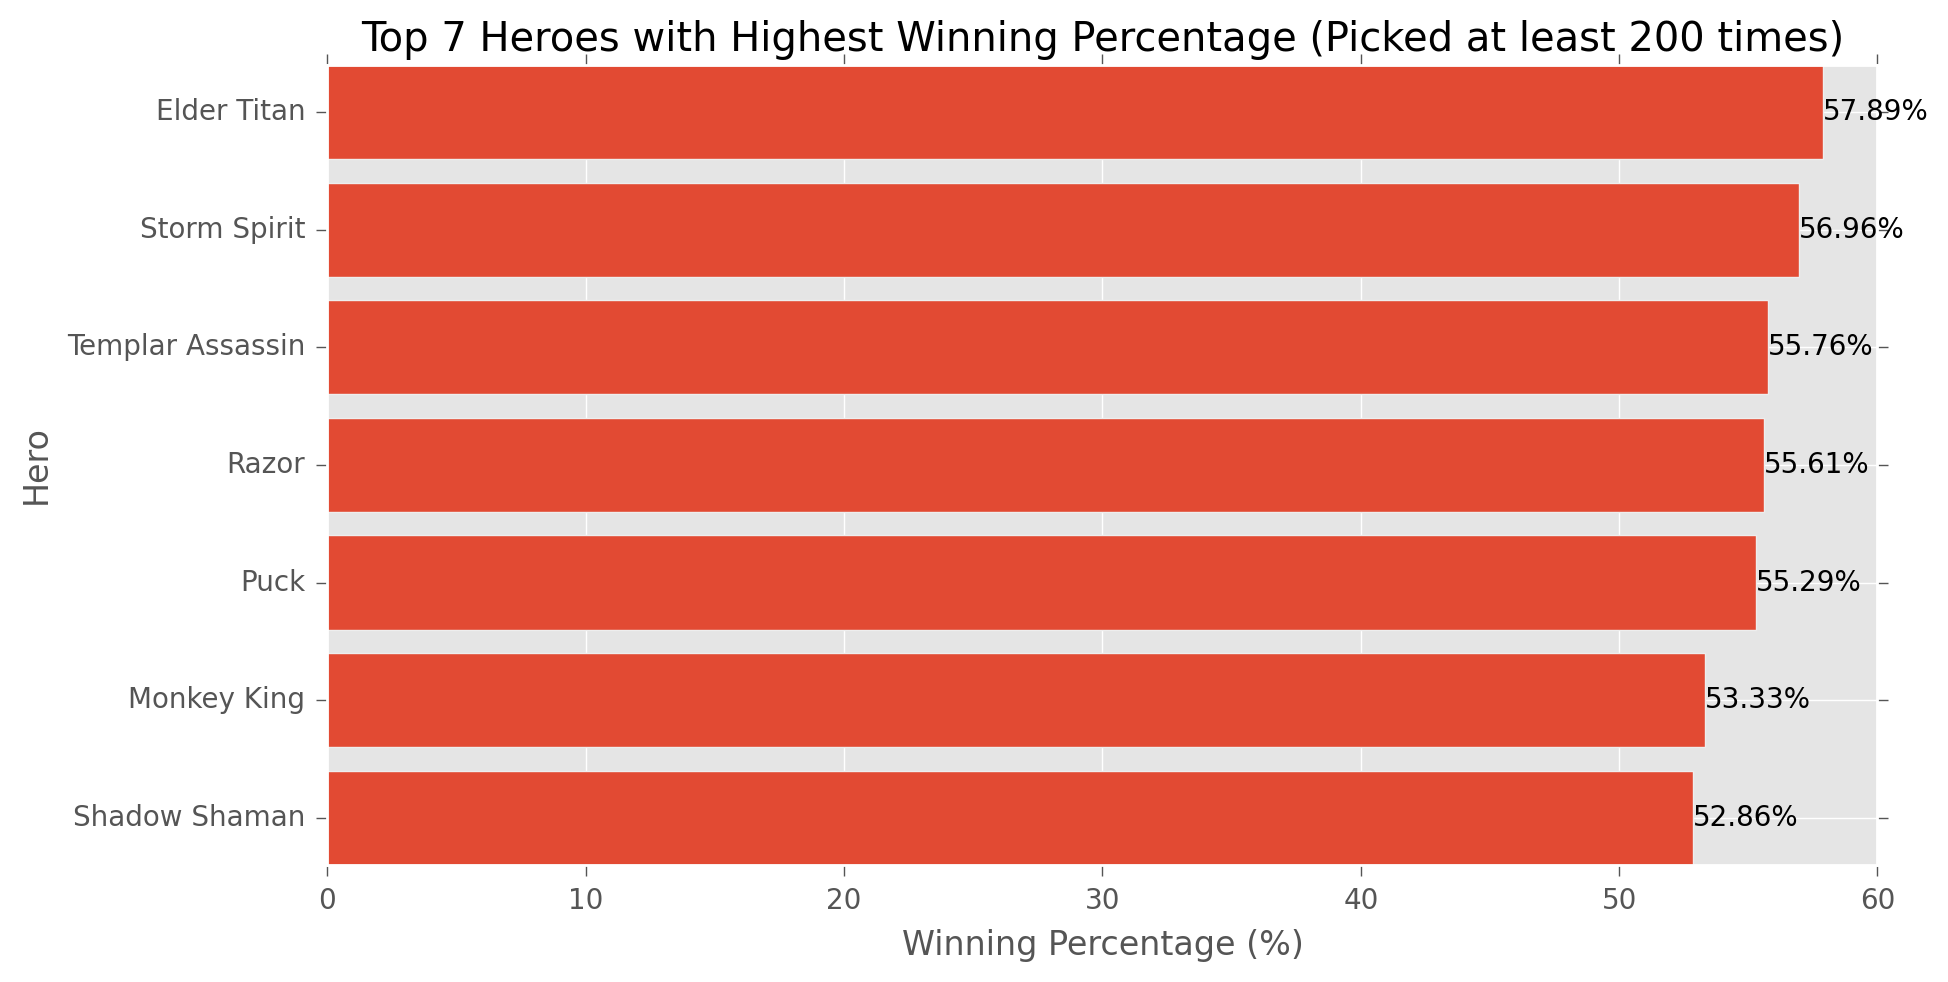

In [101]:
# Count the number of times each hero is picked
pick_counts = pick['HERO'].value_counts()

# Filter the heroes that have been picked at least 200 times
picked_heroes = pick_counts[pick_counts >= 200]

# Filter the data where WIN is true
winning_heroes = pick[(pick['HERO'].isin(picked_heroes.index)) & (pick['WIN'] == 1)]

# Count the number of times each hero wins
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the top 7
sorted_heroes = win_percentages.sort_values(ascending=False)[:7]

# Plot the heroes with the highest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Top 7 Heroes with Highest Winning Percentage (Picked at least 200 times)')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest percentage at the top
plt.show()

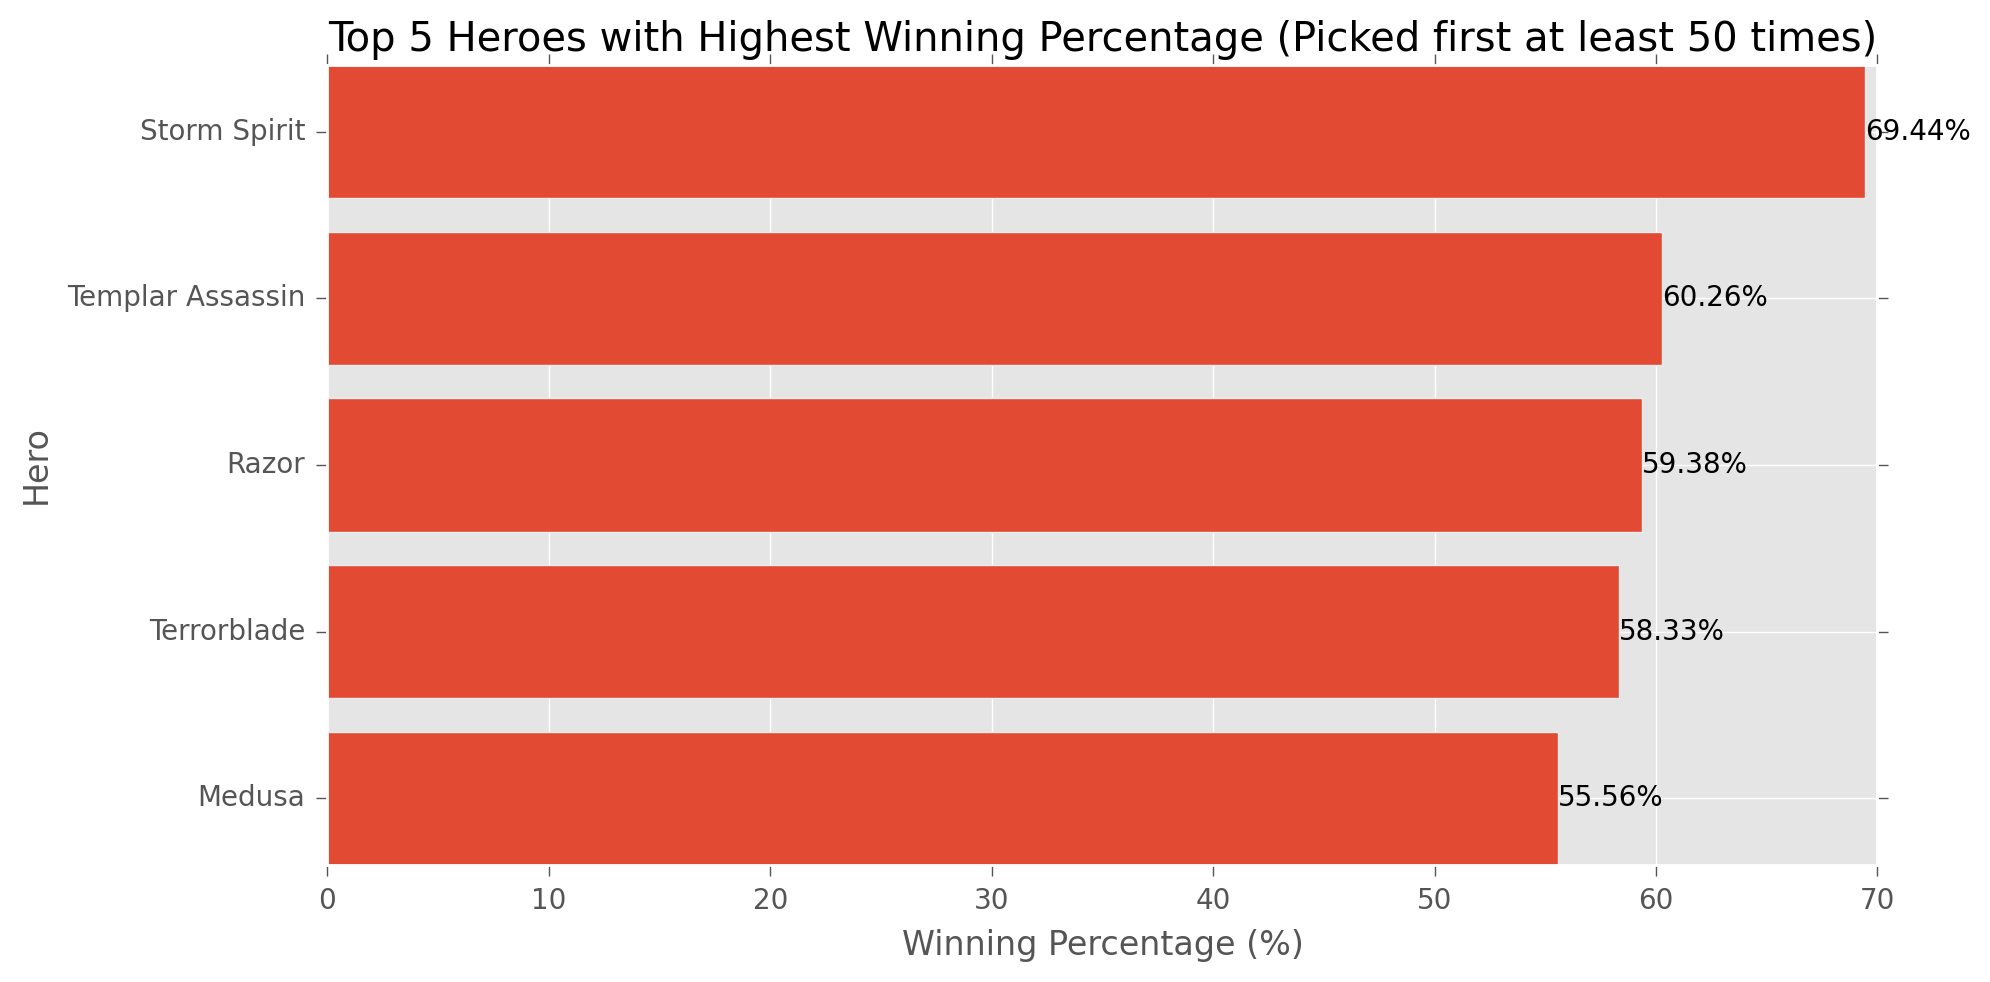

In [102]:
# Filter the data where PICK is 1
first_pick_heroes = pick[pick['PICK'] == 1]

# Count the number of times each hero is picked first
first_pick_counts = first_pick_heroes['HERO'].value_counts()

# Filter the heroes that have been picked first at least 50 times
picked_heroes = first_pick_counts[first_pick_counts >= 50]

# Filter the data where WIN is true
winning_heroes = first_pick_heroes[(first_pick_heroes['HERO'].isin(picked_heroes.index)) & (first_pick_heroes['WIN'] == 1)]

# Count the number of times each hero wins when picked first
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the top 5
sorted_heroes = win_percentages.sort_values(ascending=False)[:5]

# Plot the heroes with the highest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Top 5 Heroes with Highest Winning Percentage (Picked first at least 50 times)')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest percentage at the top
plt.show()

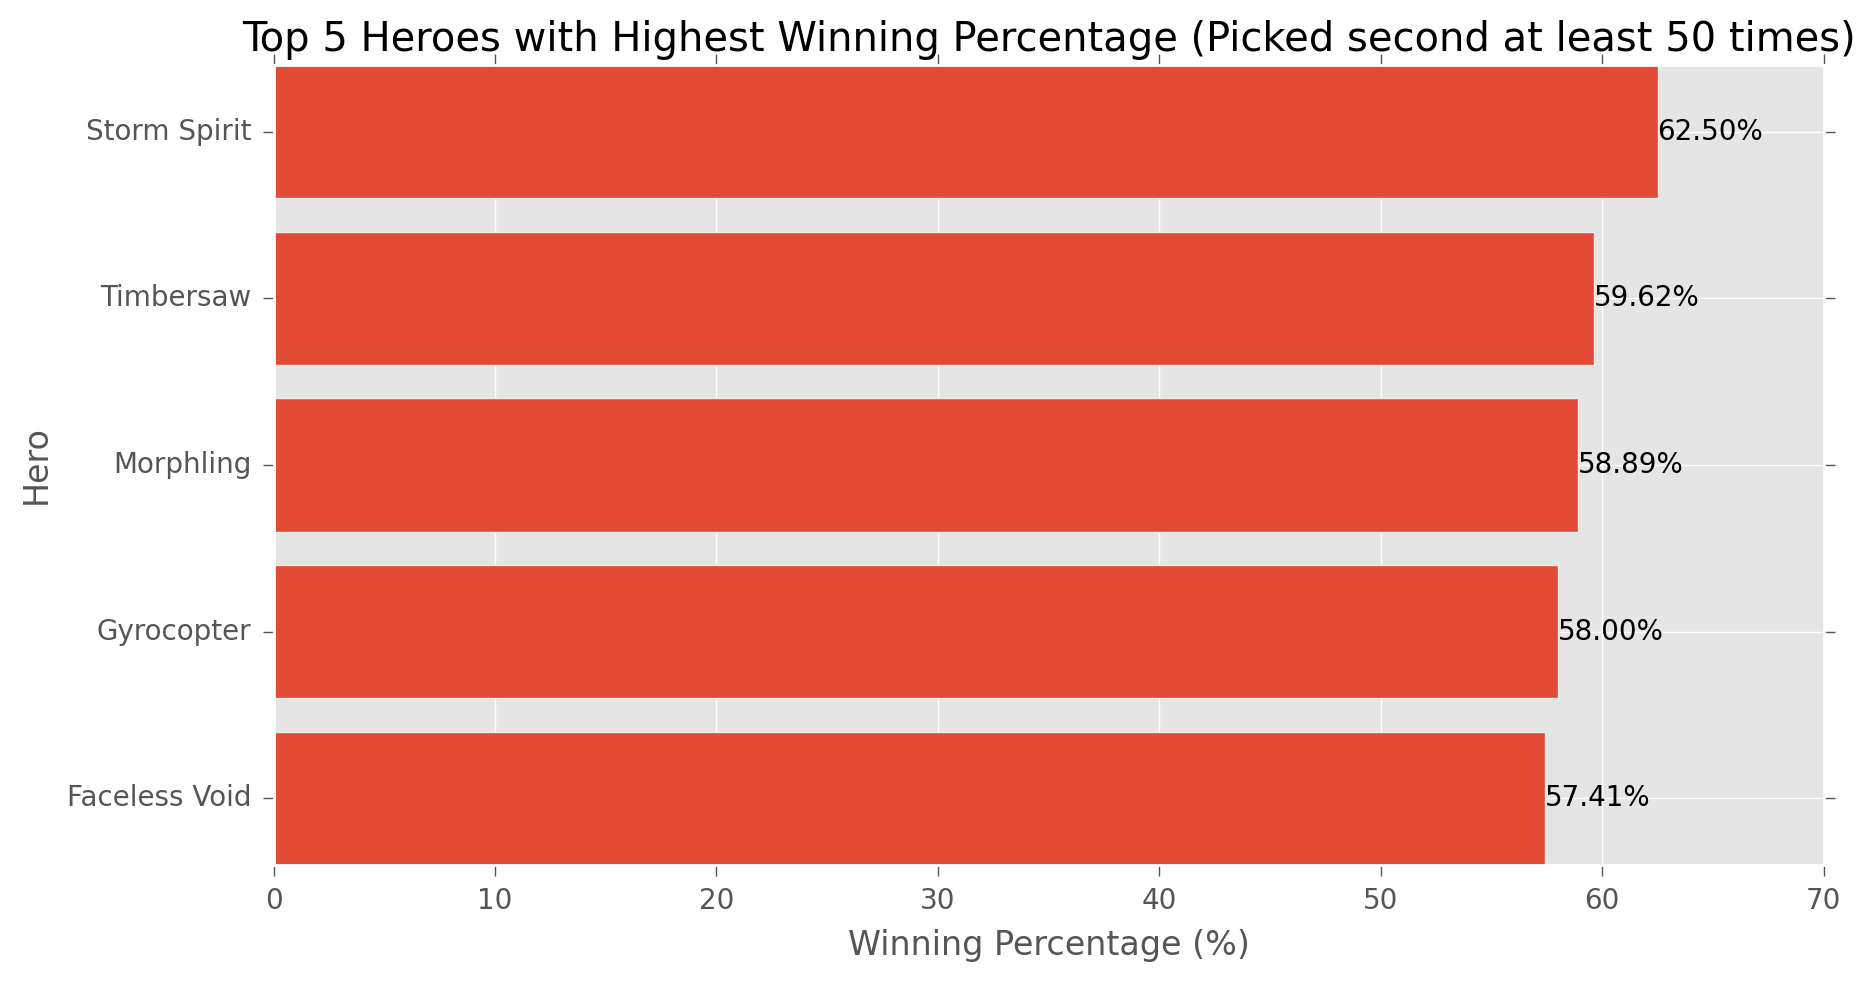

In [103]:
# Filter the data where PICK is 2
second_pick_heroes = pick[pick['PICK'] == 2]

# Count the number of times each hero is picked second
second_pick_counts = second_pick_heroes['HERO'].value_counts()

# Filter the heroes that have been picked second at least 50 times
picked_heroes = second_pick_counts[second_pick_counts >= 50]

# Filter the data where WIN is true
winning_heroes = second_pick_heroes[(second_pick_heroes['HERO'].isin(picked_heroes.index)) & (second_pick_heroes['WIN'] == 1)]

# Count the number of times each hero wins when picked second
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the top 5
sorted_heroes = win_percentages.sort_values(ascending=False)[:5]

# Plot the heroes with the highest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Top 5 Heroes with Highest Winning Percentage (Picked second at least 50 times)')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest percentage at the top
plt.show()

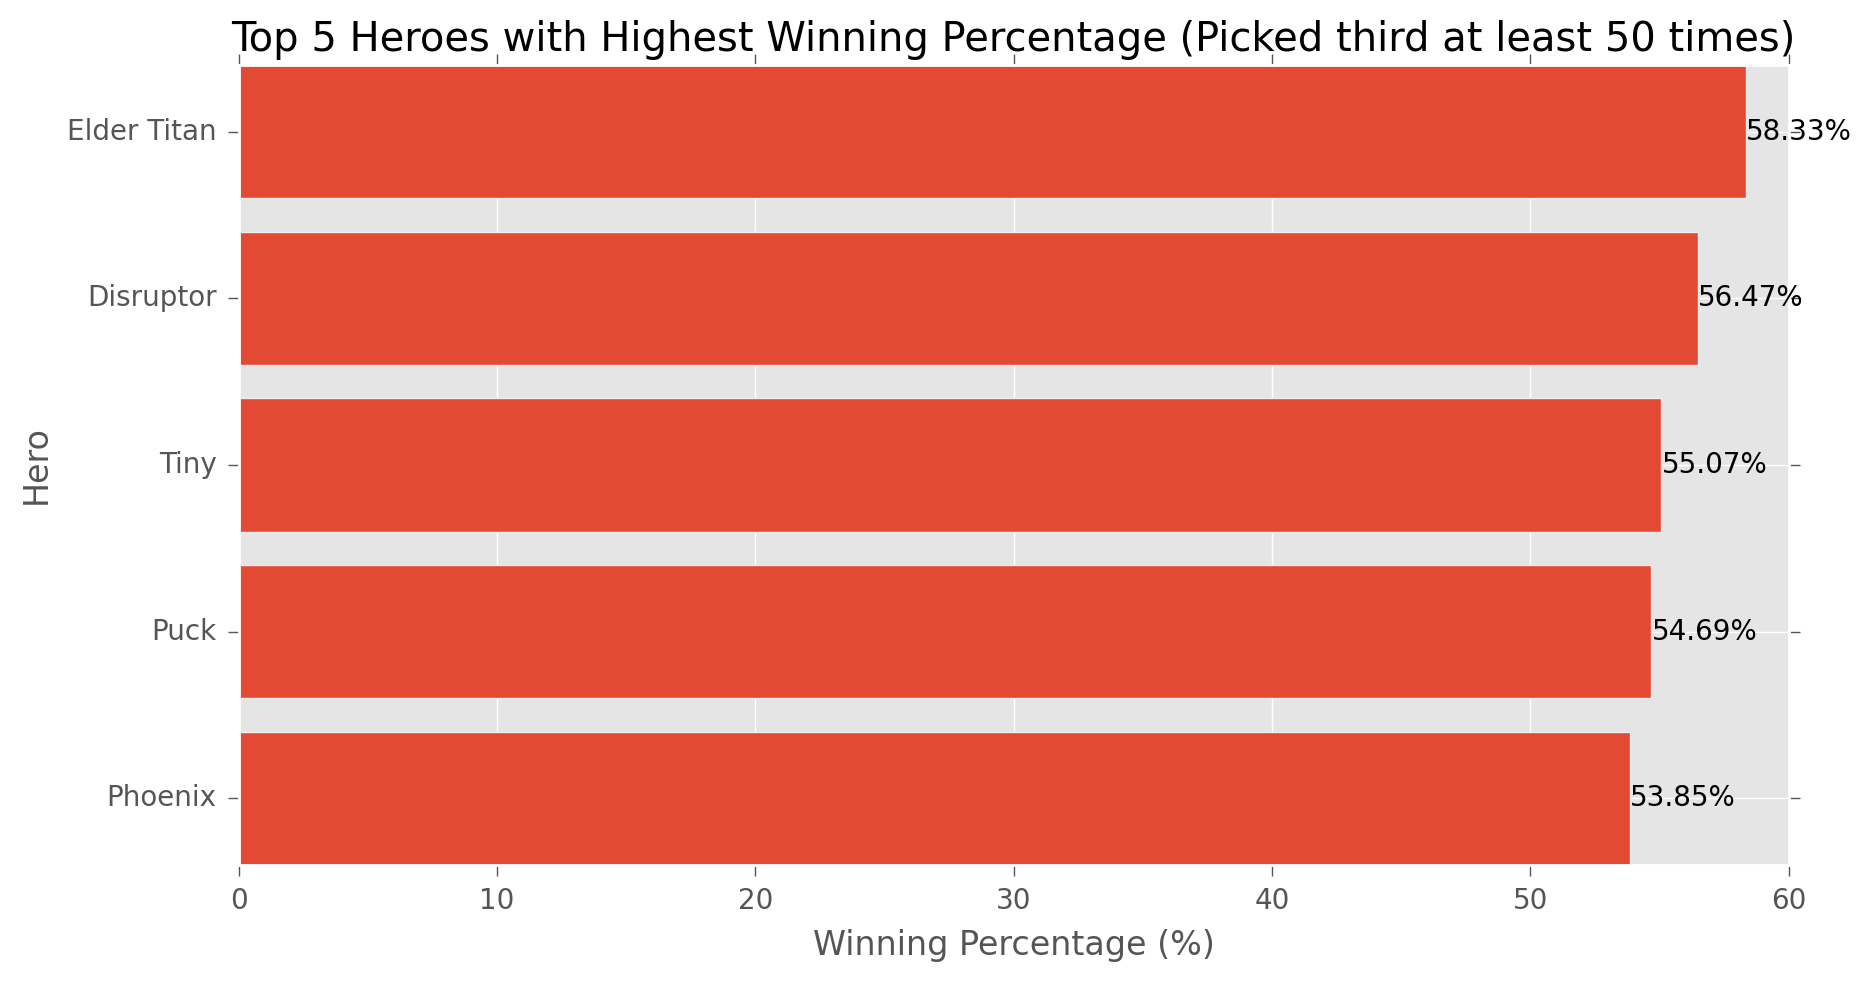

In [104]:
# Filter the data where PICK is 3
third_pick_heroes = pick[pick['PICK'] == 3]

# Count the number of times each hero is picked third
third_pick_counts = third_pick_heroes['HERO'].value_counts()

# Filter the heroes that have been picked third at least 50 times
picked_heroes = third_pick_counts[third_pick_counts >= 50]

# Filter the data where WIN is true
winning_heroes = third_pick_heroes[(third_pick_heroes['HERO'].isin(picked_heroes.index)) & (third_pick_heroes['WIN'] == 1)]

# Count the number of times each hero wins when picked third
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the top 5
sorted_heroes = win_percentages.sort_values(ascending=False)[:5]

# Plot the heroes with the highest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Top 5 Heroes with Highest Winning Percentage (Picked third at least 50 times)')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest percentage at the top
plt.show()


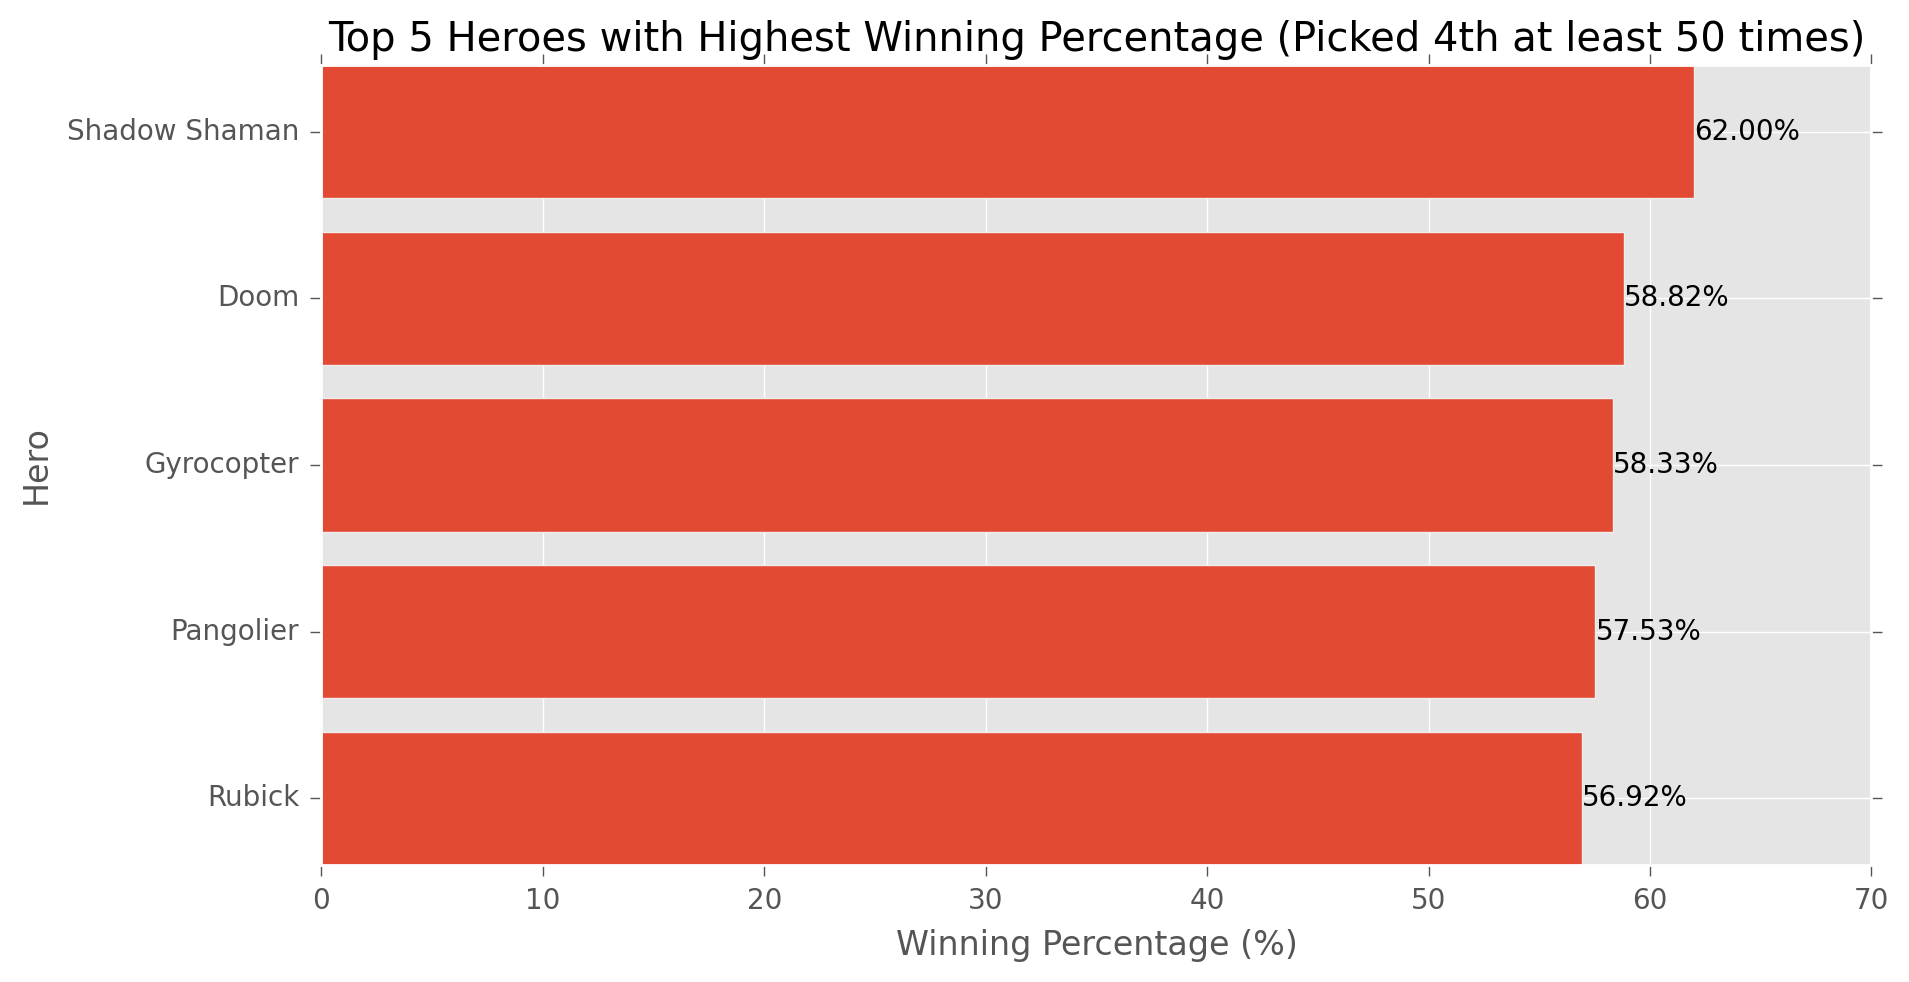

In [105]:
# Filter the data where PICK is 4
fourth_pick_heroes = pick[pick['PICK'] == 4]

# Count the number of times each hero is picked 4th
fourth_pick_counts = fourth_pick_heroes['HERO'].value_counts()

# Filter the heroes that have been picked fourth at least 50 times
picked_heroes = fourth_pick_counts[fourth_pick_counts >= 50]

# Filter the data where WIN is true
winning_heroes = fourth_pick_heroes[(fourth_pick_heroes['HERO'].isin(picked_heroes.index)) & (fourth_pick_heroes['WIN'] == 1)]

# Count the number of times each hero wins when picked fourth
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the top 5
sorted_heroes = win_percentages.sort_values(ascending=False)[:5]

# Plot the heroes with the highest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Top 5 Heroes with Highest Winning Percentage (Picked 4th at least 50 times)')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest percentage at the top
plt.show()

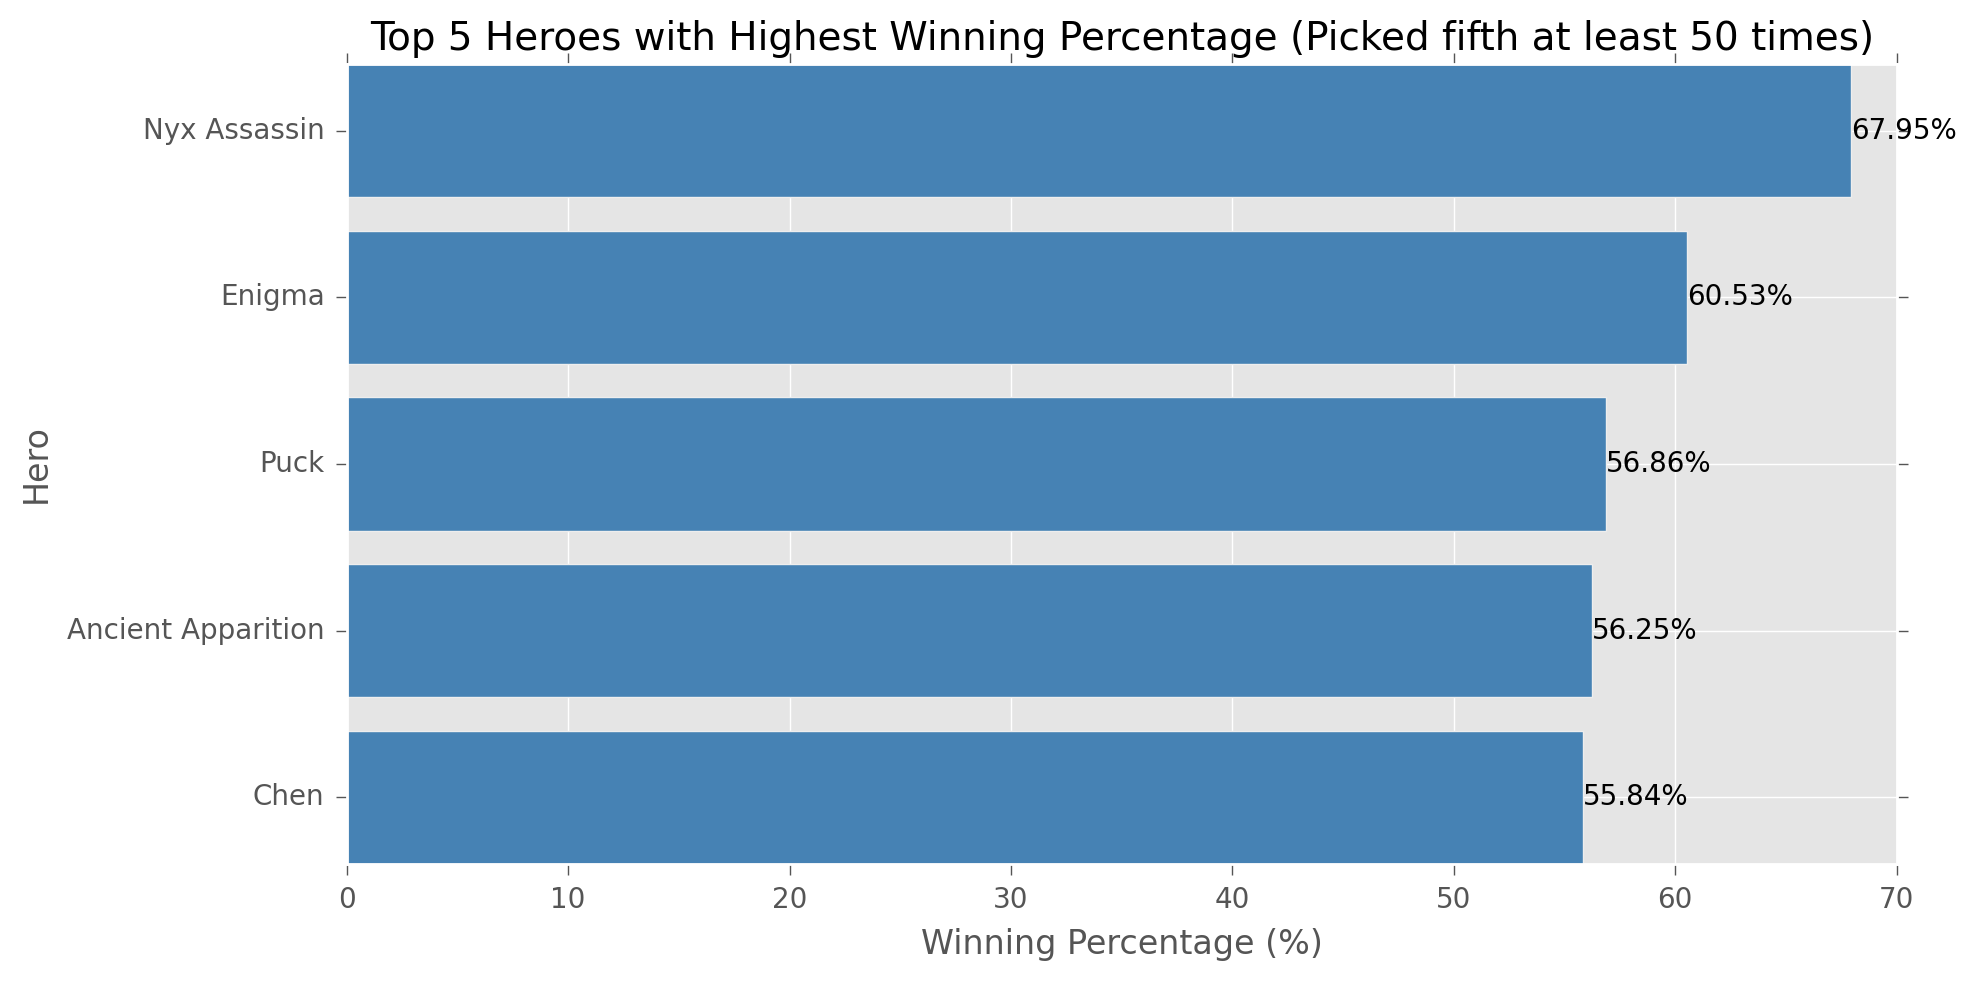

In [106]:
import matplotlib.pyplot as plt

# Increase resolution
plt.rcParams['figure.dpi'] = 200

# Use a built-in matplotlib style
plt.style.use('ggplot')

# Filter the data where PICK is 5
fifth_pick_heroes = pick[pick['PICK'] == 5]

# Count the number of times each hero is picked fifth
fifth_pick_counts = fifth_pick_heroes['HERO'].value_counts()

# Filter the heroes that have been picked fifth at least 50 times
picked_heroes = fifth_pick_counts[fifth_pick_counts >= 50]

# Filter the data where WIN is true
winning_heroes = fifth_pick_heroes[(fifth_pick_heroes['HERO'].isin(picked_heroes.index)) & (fifth_pick_heroes['WIN'] == 1)]

# Count the number of times each hero wins when picked fifth
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the top 5
sorted_heroes = win_percentages.sort_values(ascending=False)[:5]

# Plot the heroes with the highest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values, color='steelblue')
plt.title('Top 5 Heroes with Highest Winning Percentage (Picked fifth at least 50 times)', fontsize=14)
plt.xlabel('Winning Percentage (%)', fontsize=12)
plt.ylabel('Hero', fontsize=12)

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center', color='black', fontsize=10)

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the highest percentage at the top
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


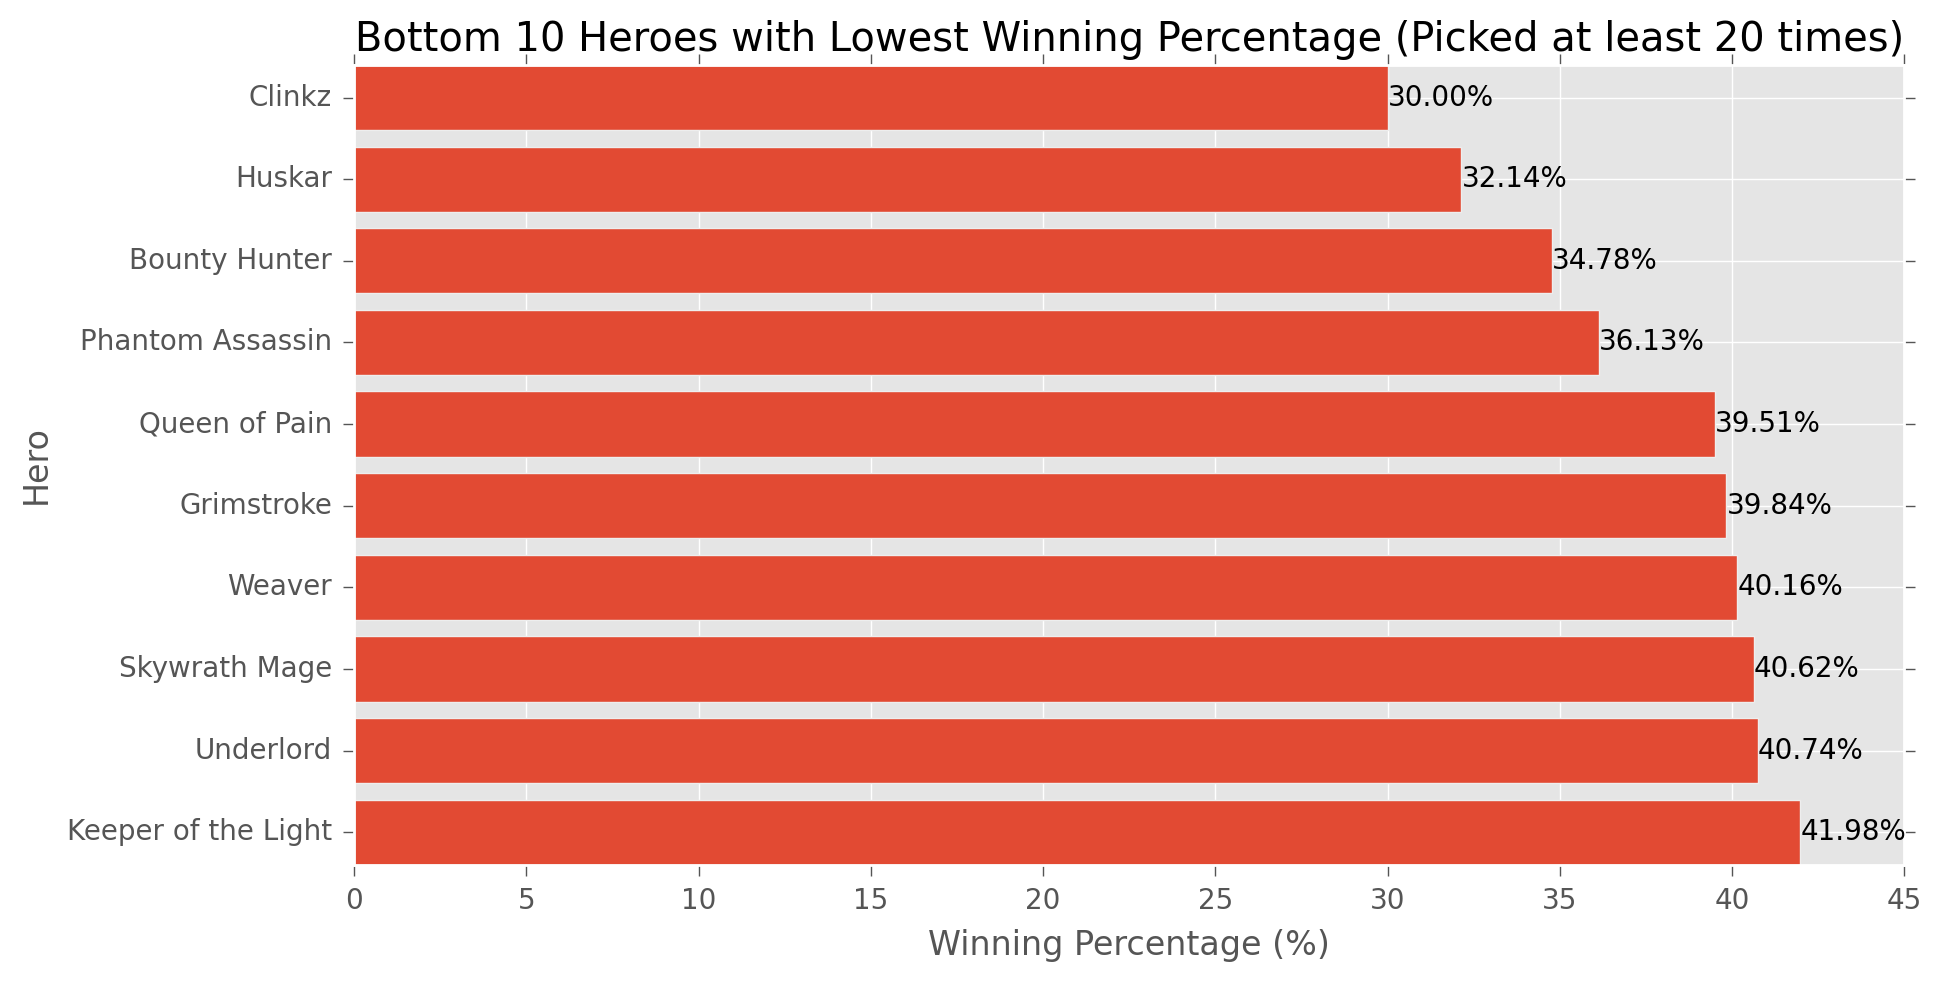

In [107]:
# Count the number of times each hero is picked
pick_counts = pick['HERO'].value_counts()

# Filter the heroes that have been picked at least 20 times
picked_heroes = pick_counts[pick_counts >= 20]

# Filter the data where WIN is true
winning_heroes = pick[(pick['HERO'].isin(picked_heroes.index)) & (pick['WIN'] == 1)]

# Count the number of times each hero wins
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the bottom 10
sorted_heroes = win_percentages.sort_values(ascending=True)[:10]

# Plot the heroes with the lowest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Bottom 10 Heroes with Lowest Winning Percentage (Picked at least 20 times)')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the lowest percentage at the top
plt.show()

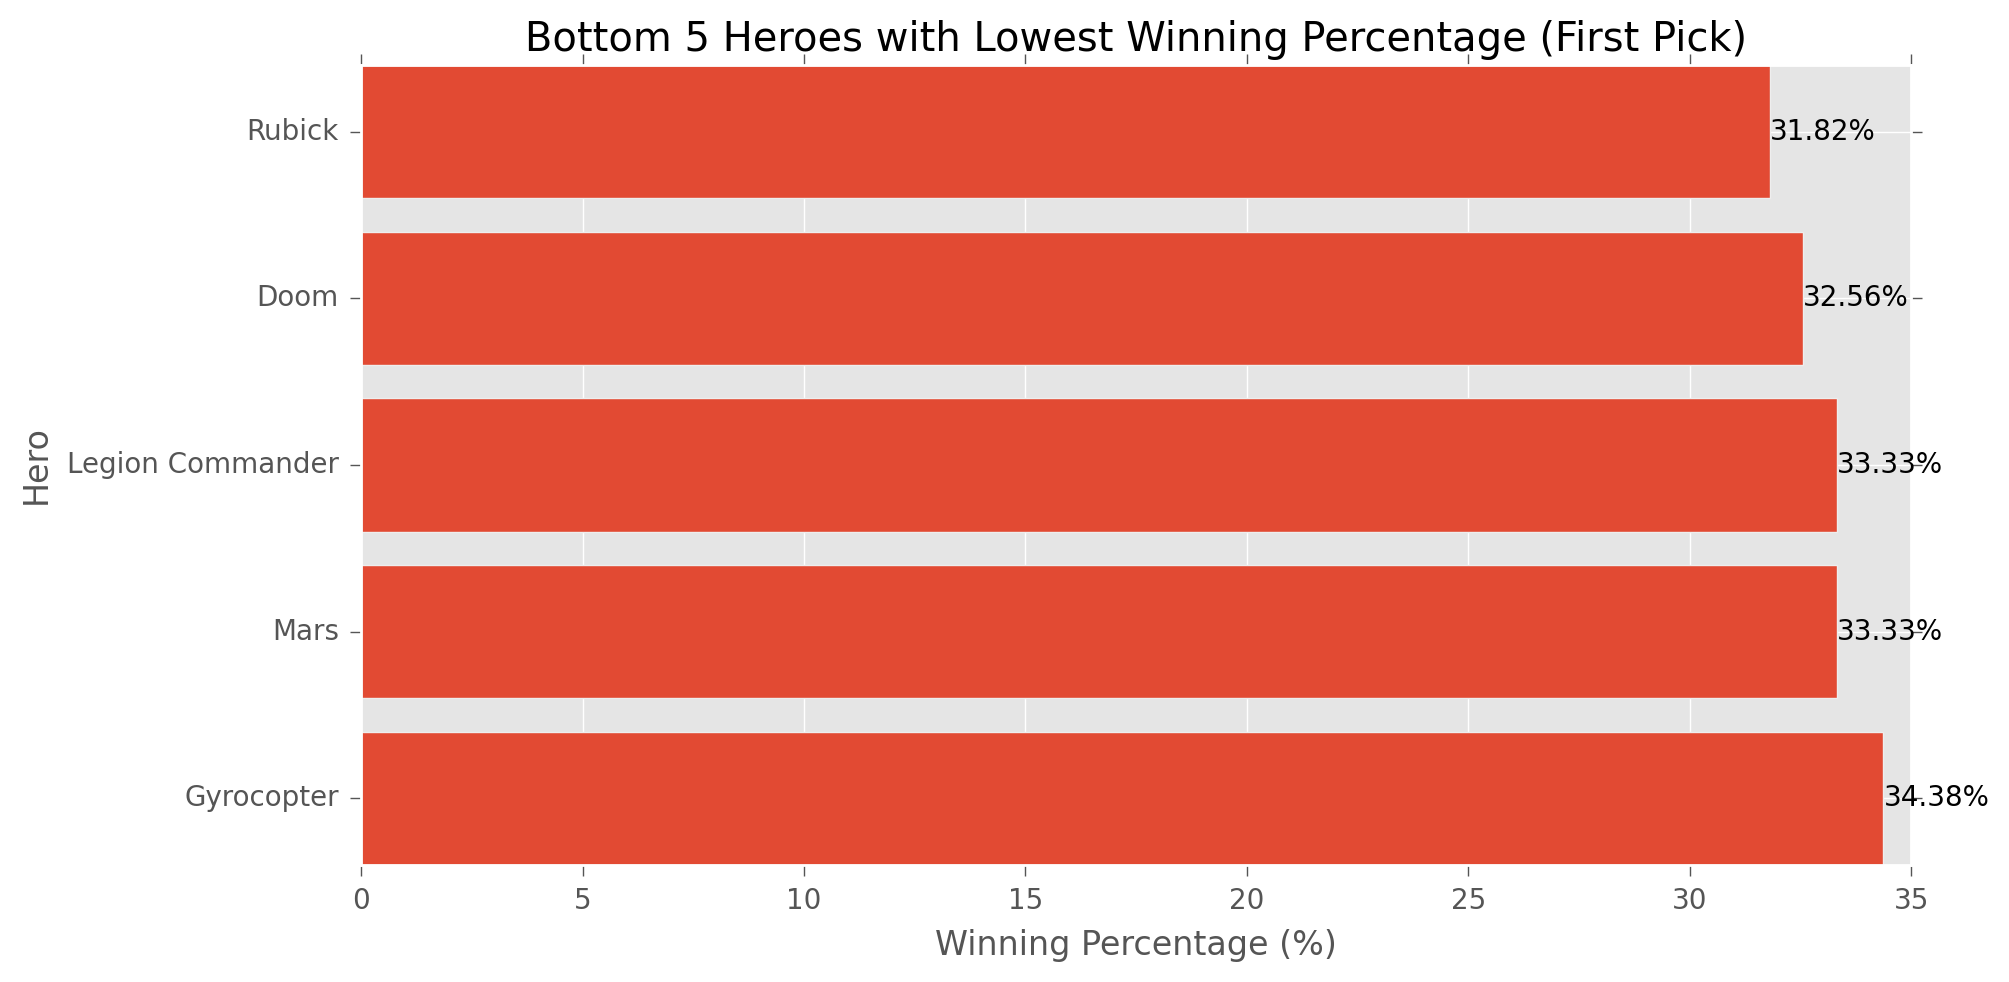

In [108]:
# Filter the data where PICK is 1
first_pick_heroes = pick[pick['PICK'] == 1]

# Count the number of times each hero is picked first
first_pick_counts = first_pick_heroes['HERO'].value_counts()

# Filter the heroes that have been picked first at least 20 times
picked_heroes = first_pick_counts[first_pick_counts >= 20]

# Filter the data where WIN is true
winning_heroes = first_pick_heroes[(first_pick_heroes['HERO'].isin(picked_heroes.index)) & (first_pick_heroes['WIN'] == 1)]

# Count the number of times each hero wins when picked first
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the bottom 5
sorted_heroes = win_percentages.sort_values(ascending=True)[:5]

# Plot the heroes with the lowest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Bottom 5 Heroes with Lowest Winning Percentage (First Pick)')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the lowest percentage at the top
plt.show()

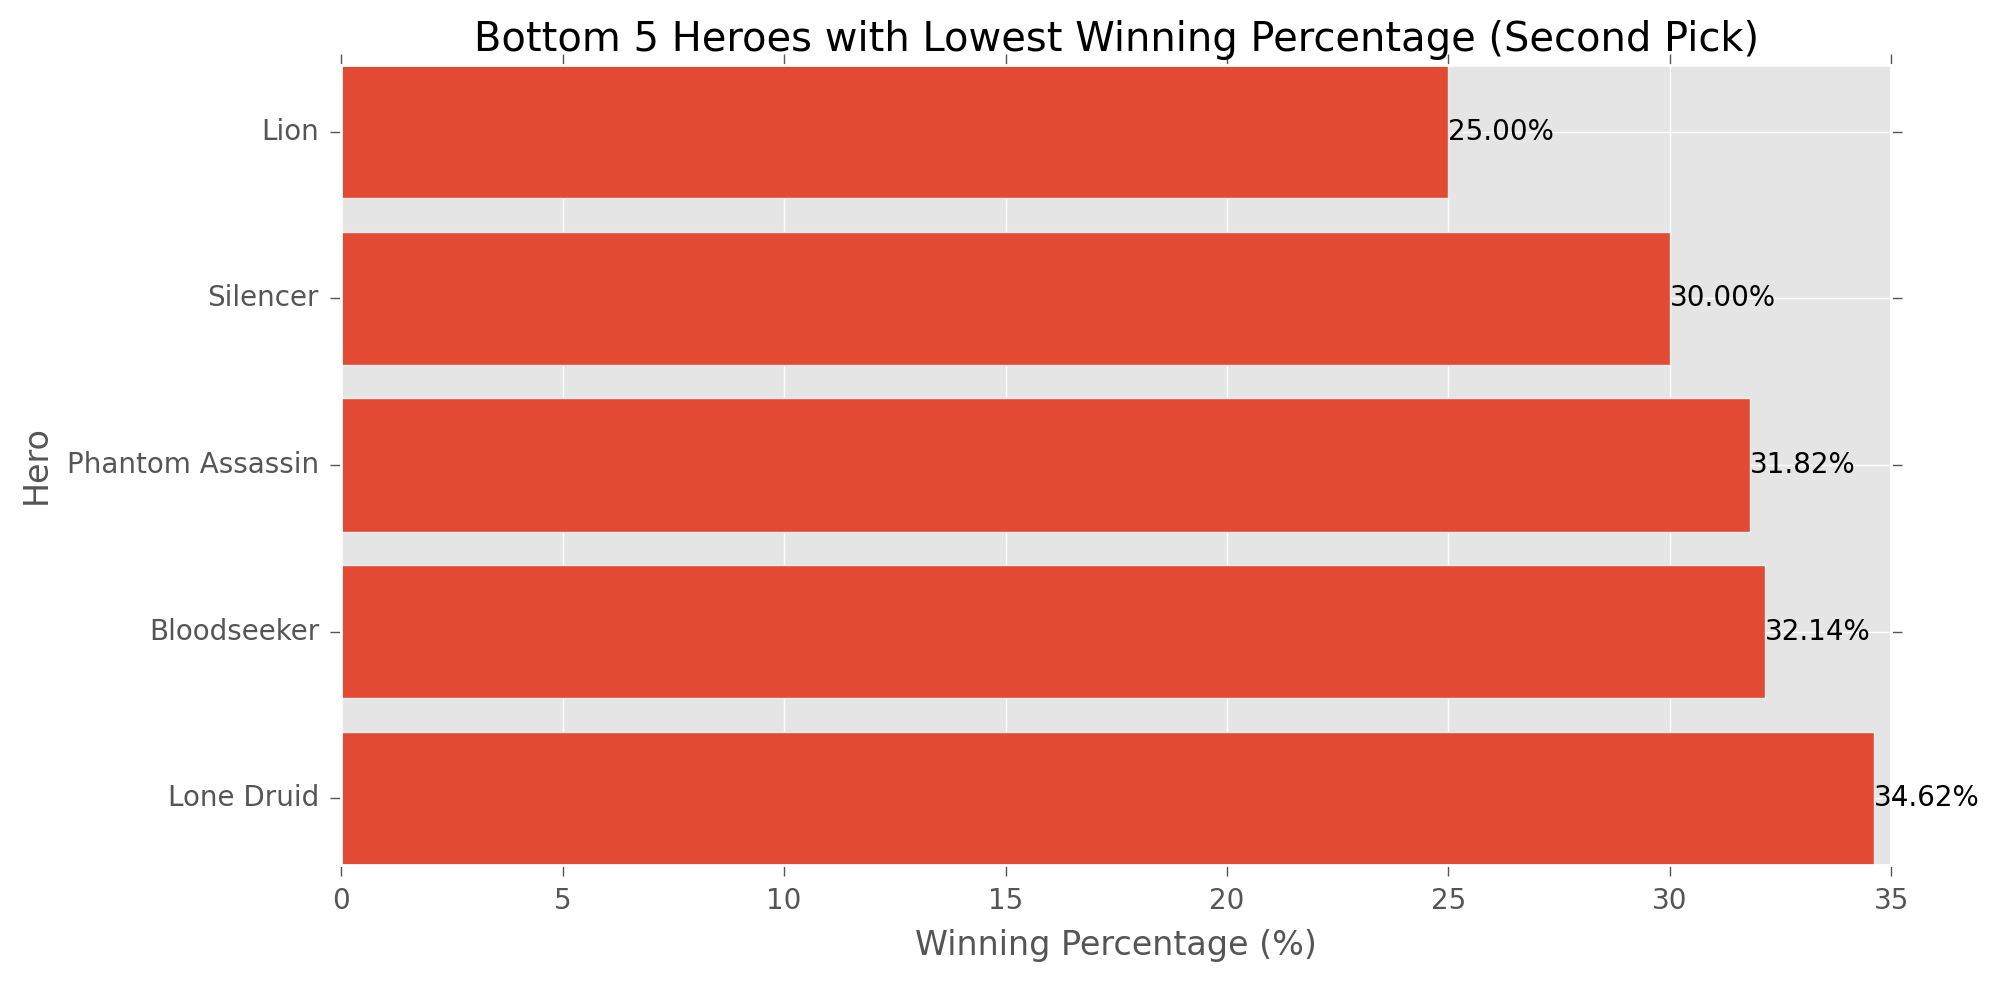

In [109]:
# Filter the data where PICK is 2
second_pick_heroes = pick[pick['PICK'] == 2]

# Count the number of times each hero is picked second
second_pick_counts = second_pick_heroes['HERO'].value_counts()

# Filter the heroes that have been picked second at least 20 times
picked_heroes = second_pick_counts[second_pick_counts >= 20]

# Filter the data where WIN is true
winning_heroes = second_pick_heroes[(second_pick_heroes['HERO'].isin(picked_heroes.index)) & (second_pick_heroes['WIN'] == 1)]

# Count the number of times each hero wins when picked second
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the bottom 5
sorted_heroes = win_percentages.sort_values(ascending=True)[:5]

# Plot the heroes with the lowest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Bottom 5 Heroes with Lowest Winning Percentage (Second Pick)')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the lowest percentage at the top
plt.show()


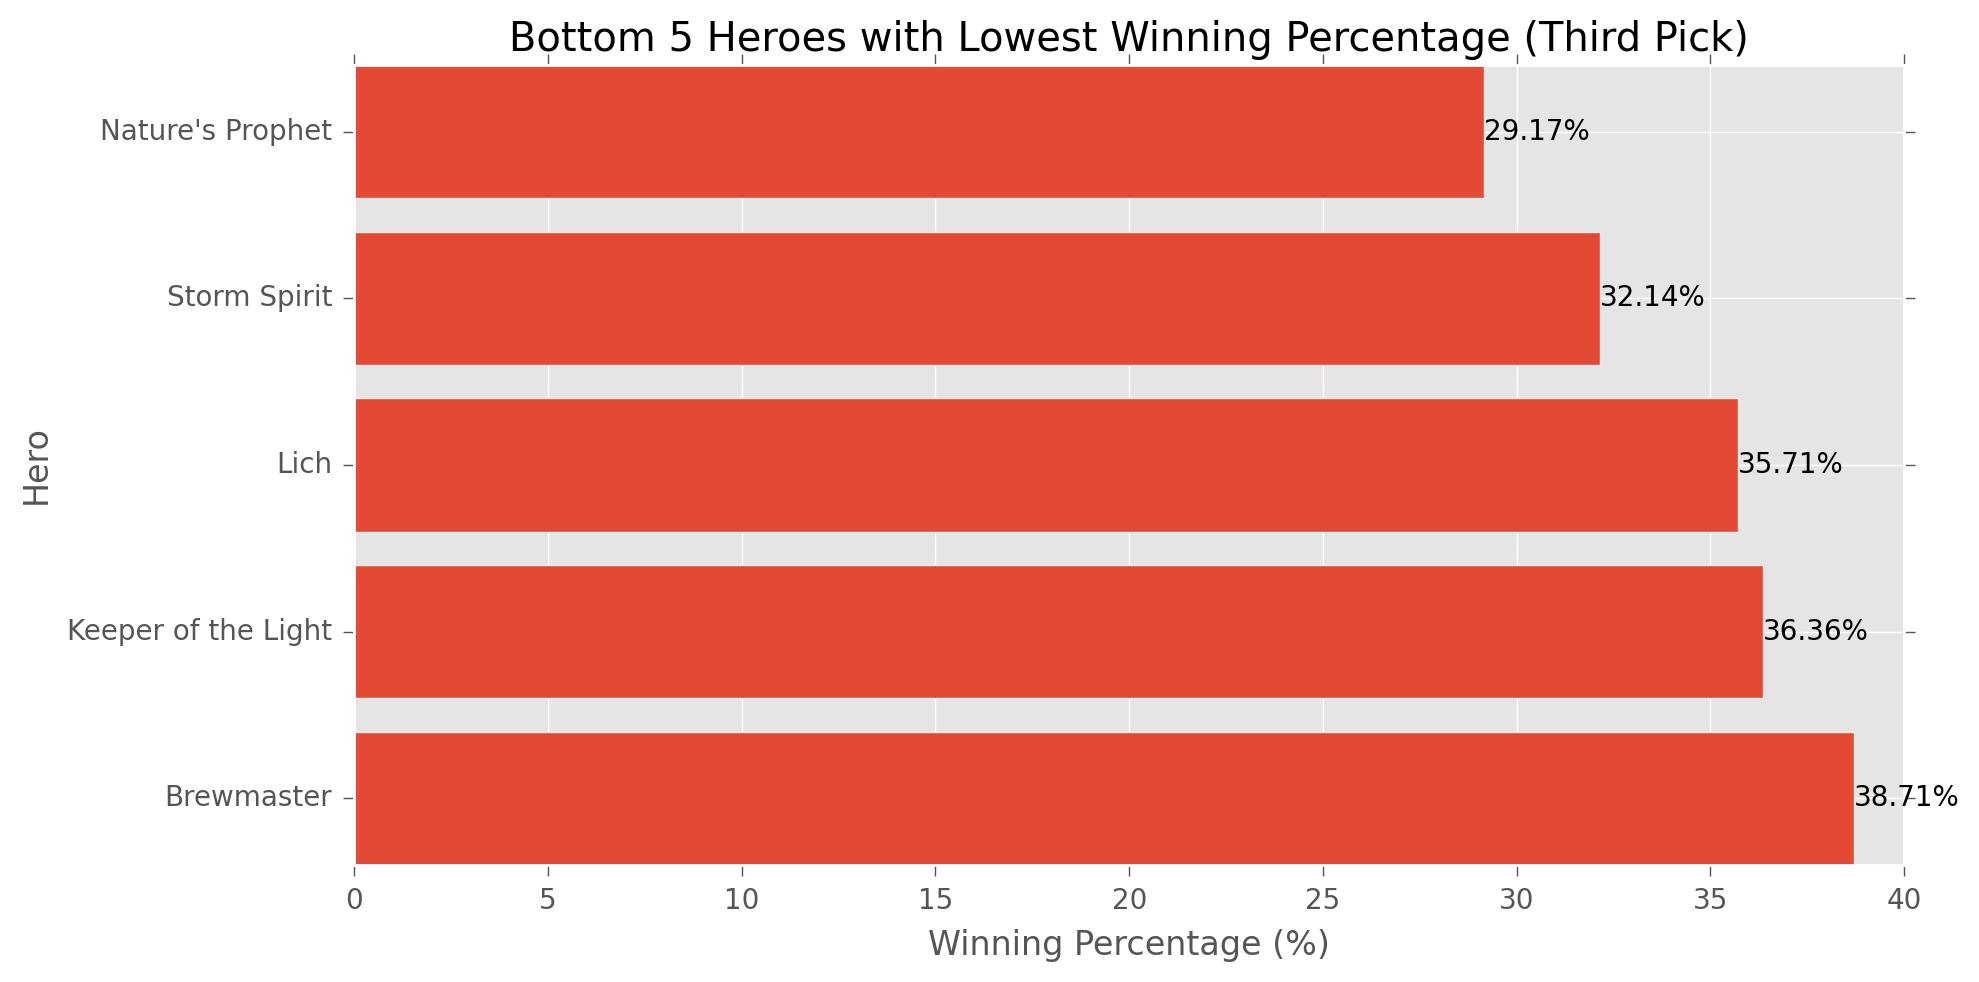

In [110]:
# Filter the data where PICK is 3
third_pick_heroes = pick[pick['PICK'] == 3]

# Count the number of times each hero is picked third
third_pick_counts = third_pick_heroes['HERO'].value_counts()

# Filter the heroes that have been picked third at least 20 times
picked_heroes = third_pick_counts[third_pick_counts >= 20]

# Filter the data where WIN is true
winning_heroes = third_pick_heroes[(third_pick_heroes['HERO'].isin(picked_heroes.index)) & (third_pick_heroes['WIN'] == 1)]

# Count the number of times each hero wins when picked third
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the bottom 5
sorted_heroes = win_percentages.sort_values(ascending=True)[:5]

# Plot the heroes with the lowest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Bottom 5 Heroes with Lowest Winning Percentage (Third Pick)')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the lowest percentage at the top
plt.show()

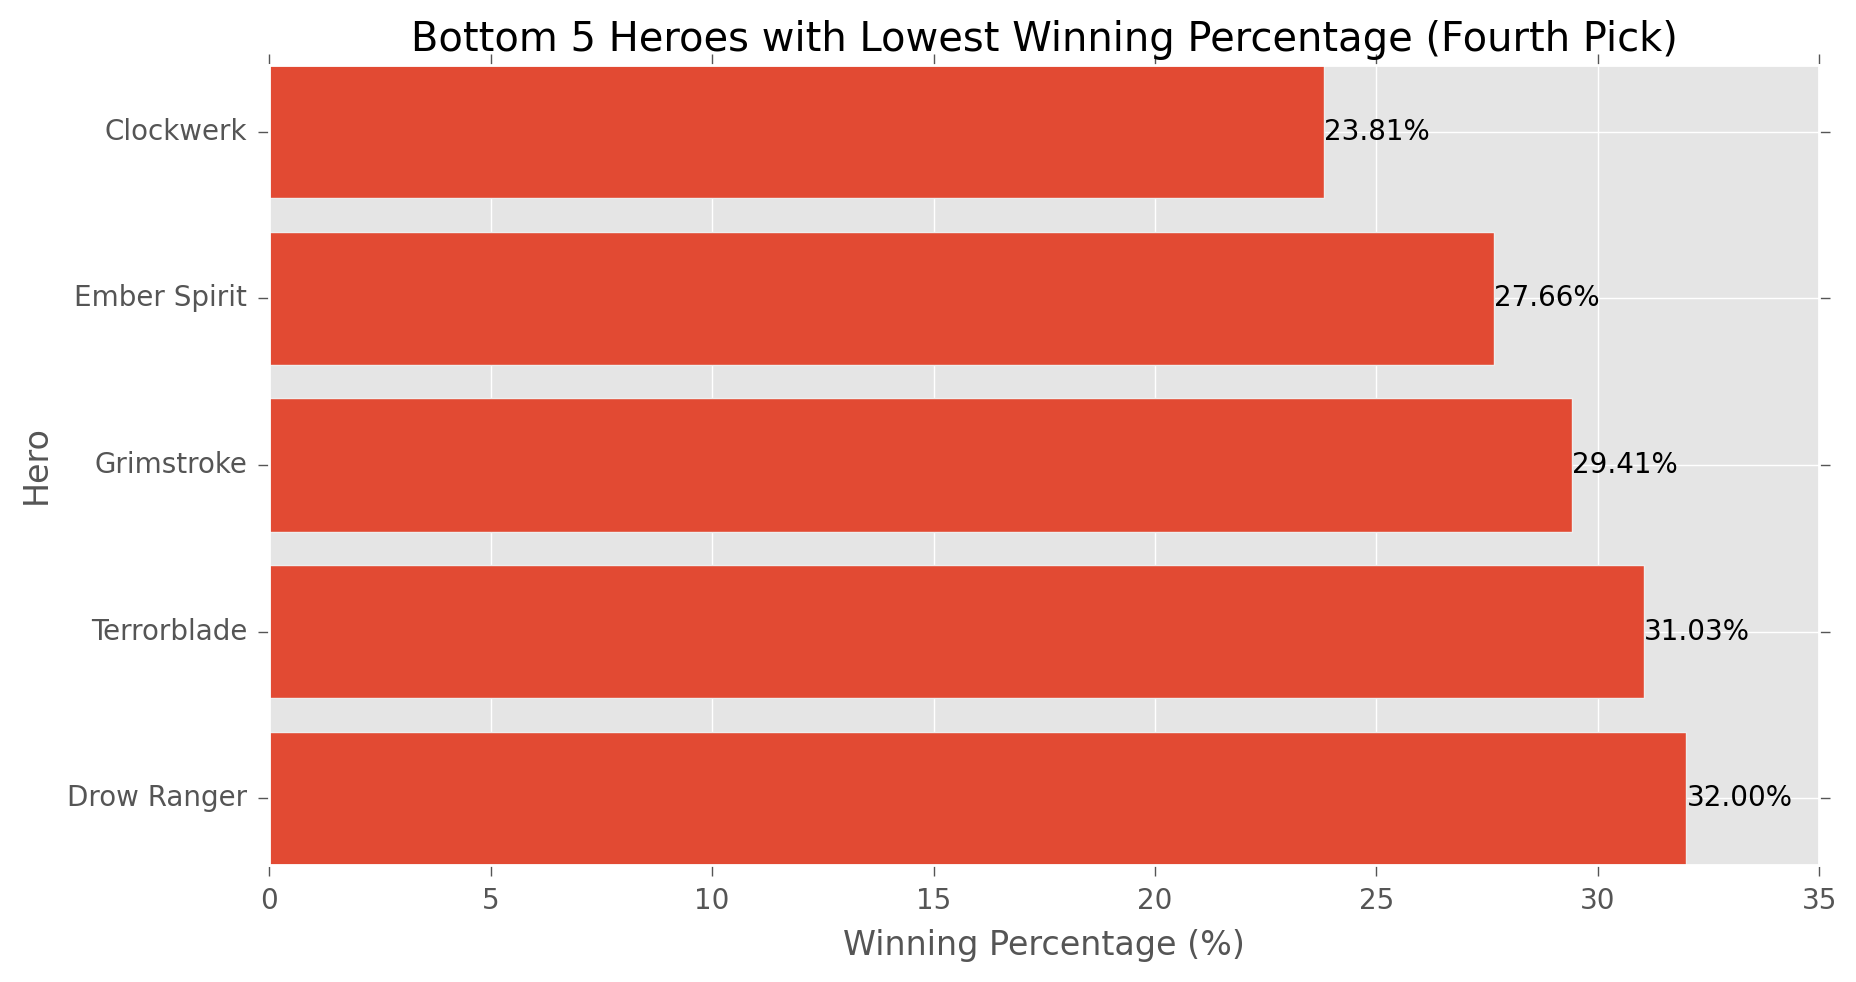

In [111]:
# Filter the data where PICK is 4
fourth_pick_heroes = pick[pick['PICK'] == 4]

# Count the number of times each hero is picked fourth
fourth_pick_counts = fourth_pick_heroes['HERO'].value_counts()

# Filter the heroes that have been picked fourth at least 20 times
picked_heroes = fourth_pick_counts[fourth_pick_counts >= 20]

# Filter the data where WIN is true
winning_heroes = fourth_pick_heroes[(fourth_pick_heroes['HERO'].isin(picked_heroes.index)) & (fourth_pick_heroes['WIN'] == 1)]

# Count the number of times each hero wins when picked fourth
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the bottom 5
sorted_heroes = win_percentages.sort_values(ascending=True)[:5]

# Plot the heroes with the lowest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Bottom 5 Heroes with Lowest Winning Percentage (Fourth Pick)')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the lowest percentage at the top
plt.show()

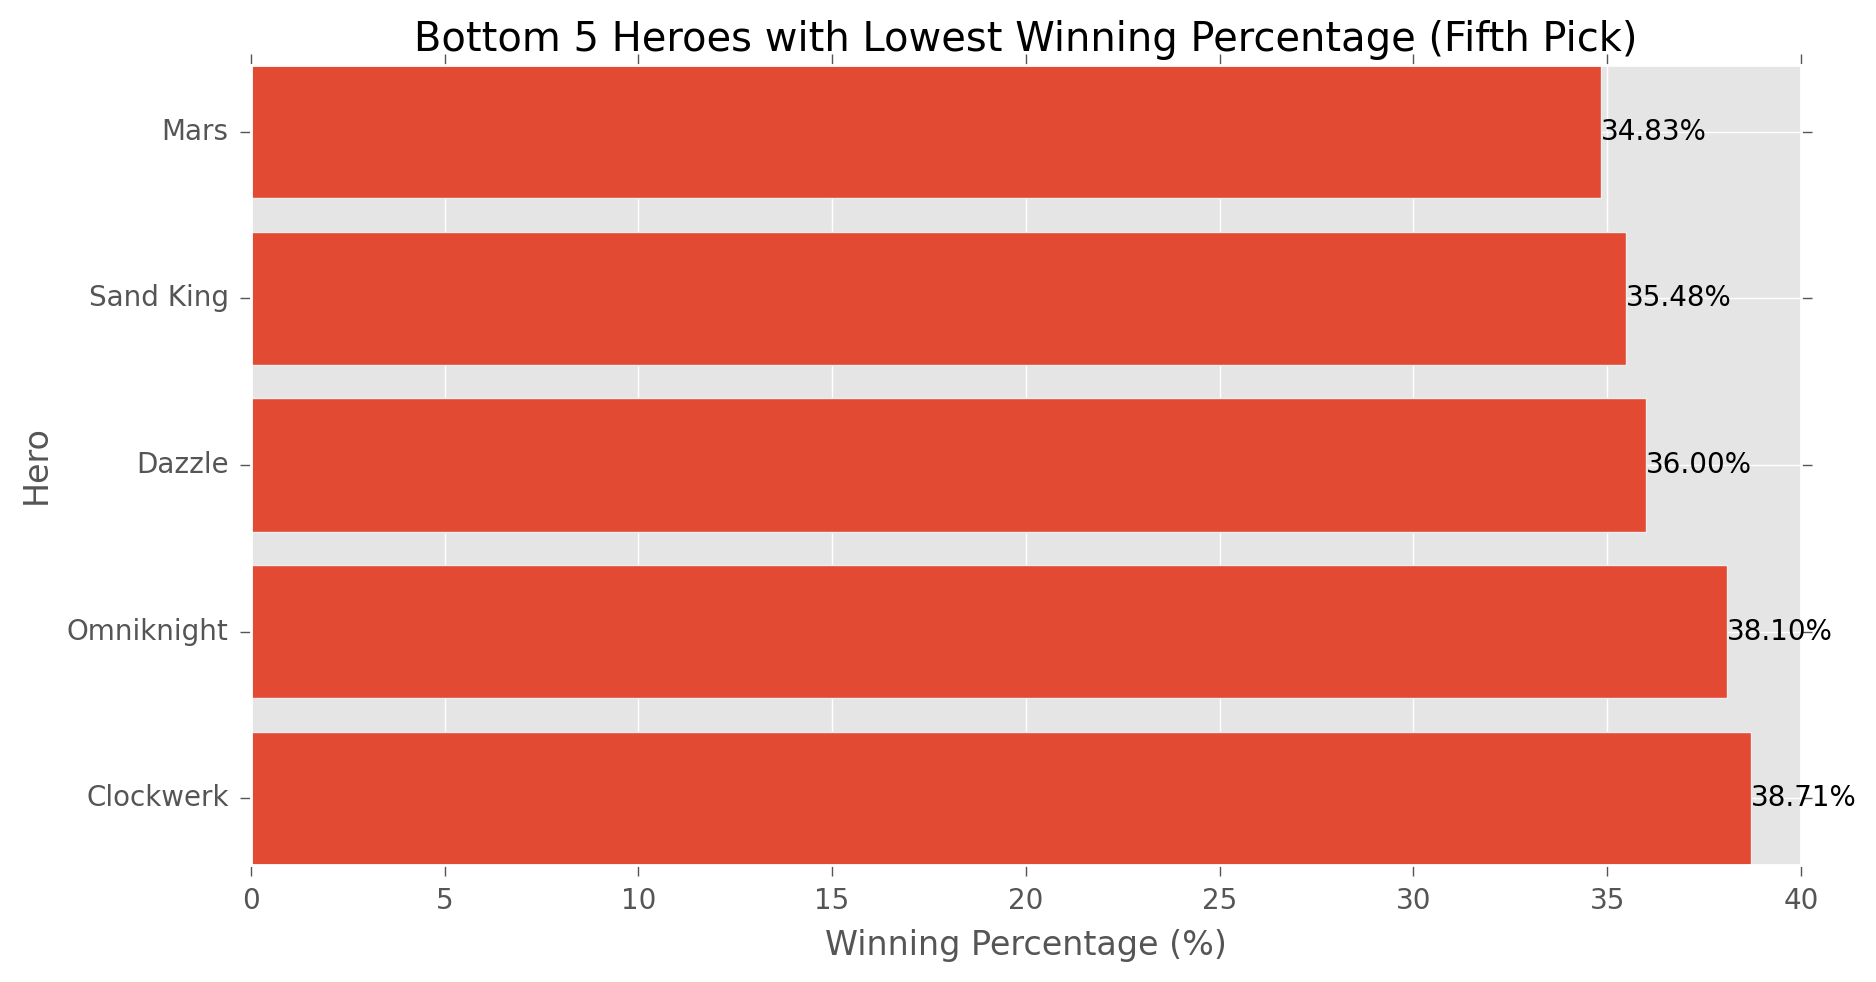

In [112]:
# Filter the data where PICK is 5
fifth_pick_heroes = pick[pick['PICK'] == 5]

# Count the number of times each hero is picked fifth
fifth_pick_counts = fifth_pick_heroes['HERO'].value_counts()

# Filter the heroes that have been picked fifth at least 20 times
picked_heroes = fifth_pick_counts[fifth_pick_counts >= 20]

# Filter the data where WIN is true
winning_heroes = fifth_pick_heroes[(fifth_pick_heroes['HERO'].isin(picked_heroes.index)) & (fifth_pick_heroes['WIN'] == 1)]

# Count the number of times each hero wins when picked fifth
win_counts = winning_heroes['HERO'].value_counts()

# Calculate the winning percentage for each hero
win_percentages = (win_counts / picked_heroes) * 100

# Sort the heroes by winning percentage and get the bottom 5
sorted_heroes = win_percentages.sort_values(ascending=True)[:5]

# Plot the heroes with the lowest winning percentage
plt.figure(figsize=(10,5))
bars = plt.barh(sorted_heroes.index, sorted_heroes.values)
plt.title('Bottom 5 Heroes with Lowest Winning Percentage (Fifth Pick)')
plt.xlabel('Winning Percentage (%)')
plt.ylabel('Hero')

# Label the bars with their corresponding percentages
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to have the hero with the lowest percentage at the top
plt.show()